# Initialization

In [ ]:
import sys
runningOnColab = 'google.colab' in sys.modules
if runningOnColab:
  from google.colab import drive
  drive.mount('/content/drive')
  %cd '/content/drive/Shareddrives/ECE219/Project 4/Twitter'

Mounted at /content/drive
/content/drive/Shareddrives/ECE219/Project 4/Twitter


#Question 27
Report the following statistics for each hashtag, i.e. each file: 

* Average number of tweets per hour
* Average number of followers of users posting the tweets per tweet (to make it simple, we average over the number of tweets; if a users posted twice, we count the user and the user’s followers twice as well)
* Average number of retweets per tweet

In [ ]:
import json
import numpy as np

def report_statistics(filename):
    with open(filename, 'r') as file:
        lines = file.readlines()
        max_time = 0
        min_time = np.inf
        total_followers = 0
        total_retweets = 0
        total_tweets = len(lines)
        for line in lines:
            json_obj = json.loads(line)
            if json_obj['citation_date'] > max_time:
                max_time = json_obj['citation_date']
            if json_obj['citation_date'] < min_time:
                min_time = json_obj['citation_date']
            total_followers += json_obj['author']['followers']
            total_retweets += json_obj['metrics']['citations']['total']
        avg_tweets_per_h = total_tweets * 3600 / (max_time - min_time)
        avg_followers_per_tweet = total_followers / total_tweets
        avg_retweets_per_tweet = total_retweets / total_tweets
        print(filename)
        print('Average number of tweets per hour: ', avg_tweets_per_h)
        print('Average number of followers of users posting the tweets per tweet: ', avg_followers_per_tweet)
        print('Average number of retweets per tweet: ', avg_retweets_per_tweet)
        print('-' * 50)

In [ ]:
files = ['tweets_#gohawks.txt', 'tweets_#gopatriots.txt', 'tweets_#nfl.txt', 'tweets_#patriots.txt', 'tweets_#sb49.txt', 'tweets_#superbowl.txt']

for file in files:
    report_statistics(file)

tweets_#gohawks.txt
Average number of tweets per hour:  292.48785062173687
Average number of followers of users posting the tweets per tweet:  2217.9237355281984
Average number of retweets per tweet:  2.0132093991319877
--------------------------------------------------
tweets_#gopatriots.txt
Average number of tweets per hour:  40.954698006061946
Average number of followers of users posting the tweets per tweet:  1427.2526051635405
Average number of retweets per tweet:  1.4081919101697078
--------------------------------------------------
tweets_#nfl.txt
Average number of tweets per hour:  397.0213901819841
Average number of followers of users posting the tweets per tweet:  4662.37544523693
Average number of retweets per tweet:  1.5344602655543254
--------------------------------------------------
tweets_#patriots.txt
Average number of tweets per hour:  750.8942646068899
Average number of followers of users posting the tweets per tweet:  3280.4635616550277
Average number of retweets pe

# Question 28
Plot “number of tweets in hour” over time for #SuperBowl and #NFL (a bar plot with 1-hour bins). The tweets are stored in separate files for different hashtags and files are  named as tweet_[#hashtag].txt.

In [ ]:
import math 
import matplotlib.pyplot as plt
import datetime
import pytz

pst_tz = pytz.timezone('America/Los_Angeles')

def report_tweets(filename):
    with open(filename, 'r') as file:
        lines = file.readlines()
        max_time = 0
        min_time = np.inf
        total_tweets = len(lines)
        for line in lines:
            json_obj = json.loads(line)
            if json_obj['citation_date'] > max_time:
                max_time = json_obj['citation_date']
            if json_obj['citation_date'] < min_time:
                min_time = json_obj['citation_date']
        
        total_hours = math.ceil((max_time - min_time) / 3600)
        n_tweets = [0] * total_hours
        for line in lines:
            json_obj = json.loads(line)
            index = math.floor((json_obj['citation_date'] - min_time) / 3600)
            n_tweets[index] += 1
        return n_tweets

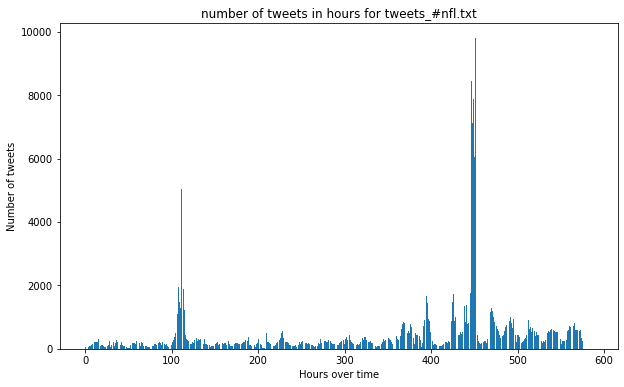

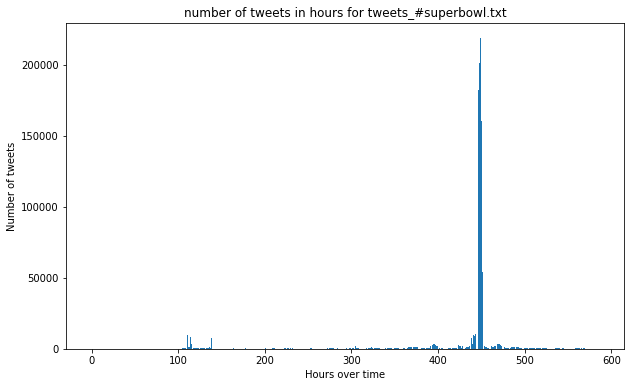

In [ ]:
q2_files = ['tweets_#nfl.txt','tweets_#superbowl.txt']

for file in q2_files:
    n_tweets = report_tweets(file)
    plt.figure(figsize=(10,6))
    plt.bar(range(len(n_tweets)),n_tweets)
    plt.xlabel('Hours over time')
    plt.ylabel('Number of tweets')
    plt.title('number of tweets in hours for '+file)

# Question 29
Follow the steps outlined below: (Question 29) 
* Describe your task.
* Explore the data and any metadata (you can even incorporate additional datasets if you choose).
* Describe the feature engineering process. Implement it with reason: Why are you extracting features this way - why not in any other way?
* Generate baselines for your final ML model. • A thorough evaluation is necessary. 
* Be creative in your task design - use things you have learned in other classes too if you are excited about them!

## Word Cloud Solution – Mentions in aggregated tweet data and trend of overall themes across all hashtags.

In [ ]:
!pip install sumy
!pip install scipy
!pip install pandas
!pip install nltk
!pip install collections
!pip install textblob

     |████████████████████████████████| 87 kB 2.6 MB/s 
     |████████████████████████████████| 10.1 MB 17.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for breadability: filename=breadability-0.1.20-py2.py3-none-any.whl size=21712 sha256=107ce34ac6c219e1595288770175705d0a50a2223fea28dd417f9a56d3744311
  Stored in directory: /root/.cache/pip/wheels/d4/bf/51/81d27ad638e1a6dca4f362ecc33d1e2c764b8ea7ec751b8fc1
  Created wheel for pycountry: filename=pycountry-22.3.5-py2.py3-none-any.whl size=10681845 sha256=8ec2be0060b30b56b7fd6d3d2f6e9e5a8a73961880d3bcf608f5c33d4ea92961
  Stored in directory: /root/.cache/pip/wheels/0e/06/e8/7ee176e95ea9a8a8c3b3afcb1869f20adbd42413d4611c6eb4
Successfully built breadability pycountry
ERROR: Could not find a version that satisfies the requirement collections (from versions: none)
ERROR: No matching distribution found for collections


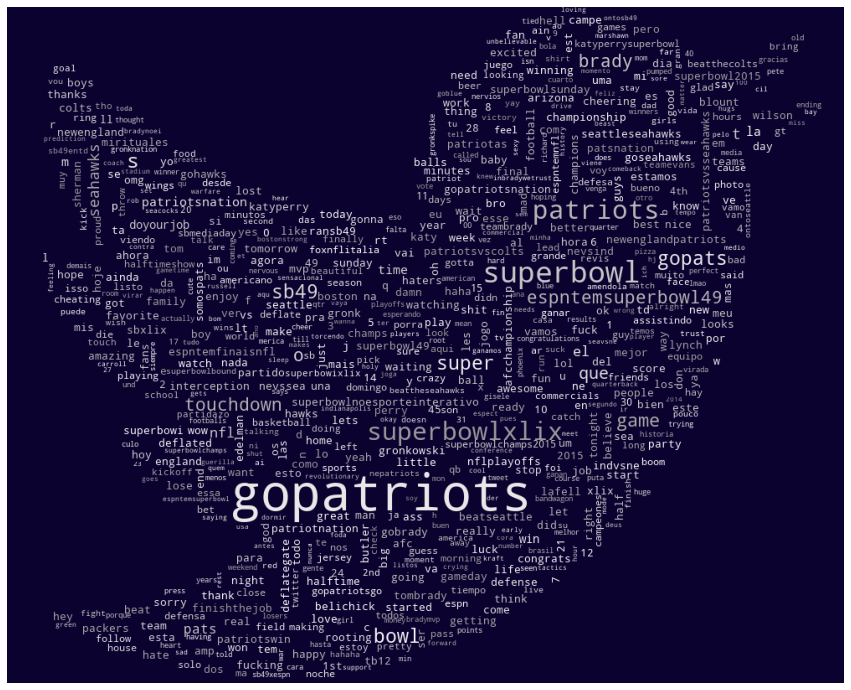

[('gopatriots', 23581), ('superbowl', 3685), ('patriots', 2769), ('superbowlxlix', 2662), ('s', 1789), ('super', 1543), ('bowl', 1512), ('gopats', 1463), ('sb49', 1423), ('game', 1283)]


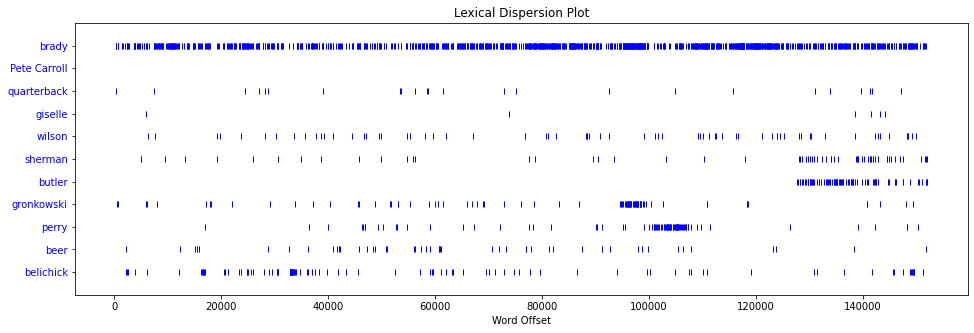

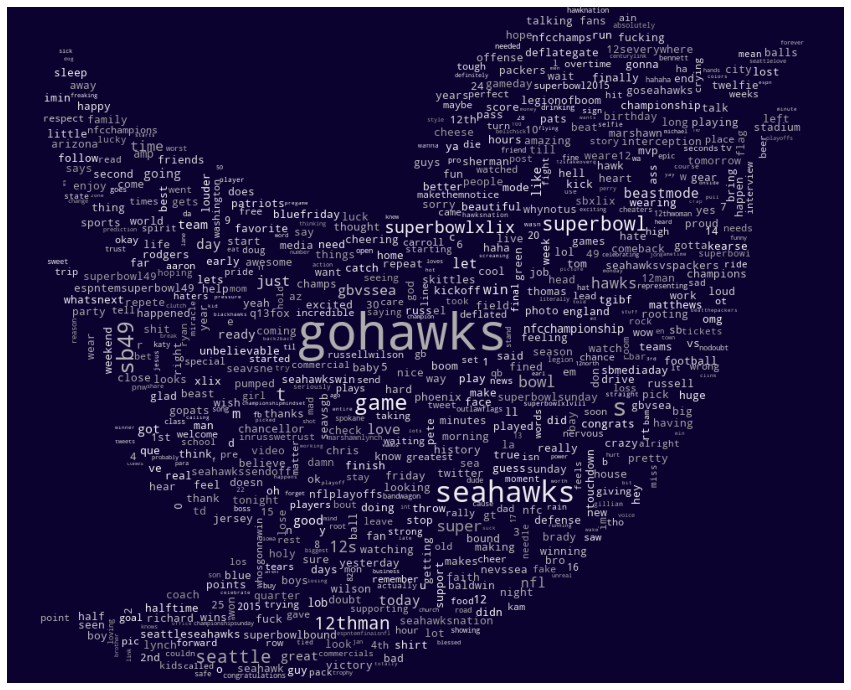

[('gohawks', 171263), ('seahawks', 27006), ('s', 20035), ('sb49', 15935), ('game', 15011), ('superbowl', 12111), ('t', 10330), ('seattle', 9937), ('12thman', 9485), ('superbowlxlix', 8524)]


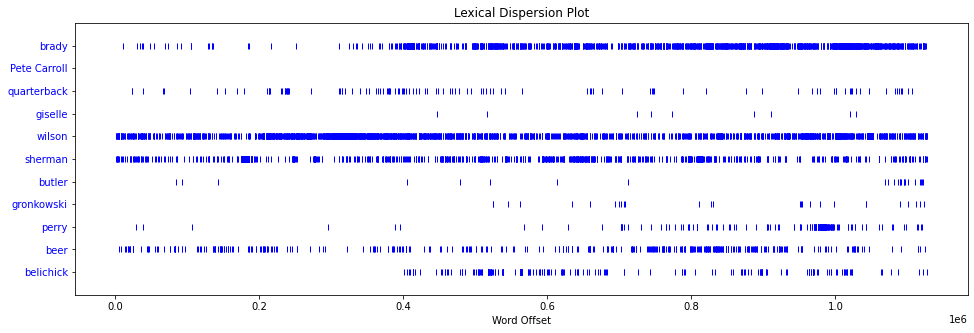

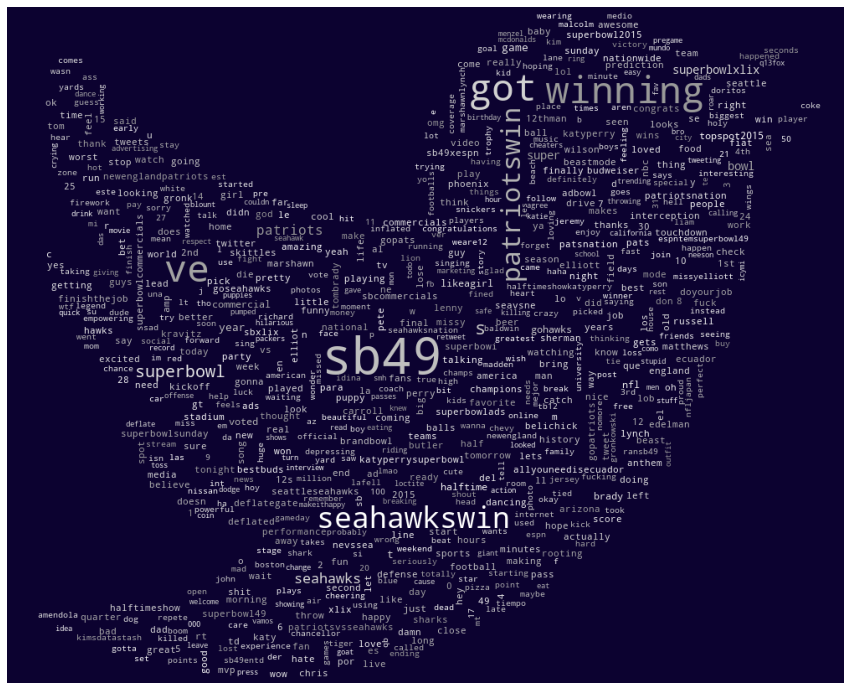

[('sb49', 742175), ('got', 367153), ('ve', 364663), ('winning', 363160), ('seahawkswin', 195618), ('patriotswin', 167265), ('s', 62372), ('superbowl', 51845), ('seahawks', 37744), ('patriots', 31837)]


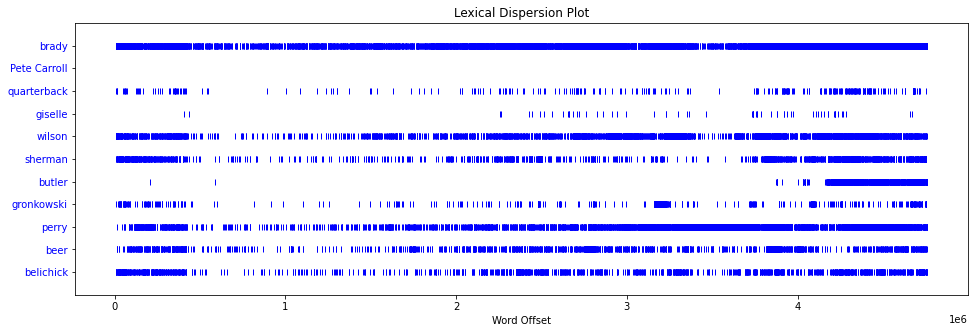

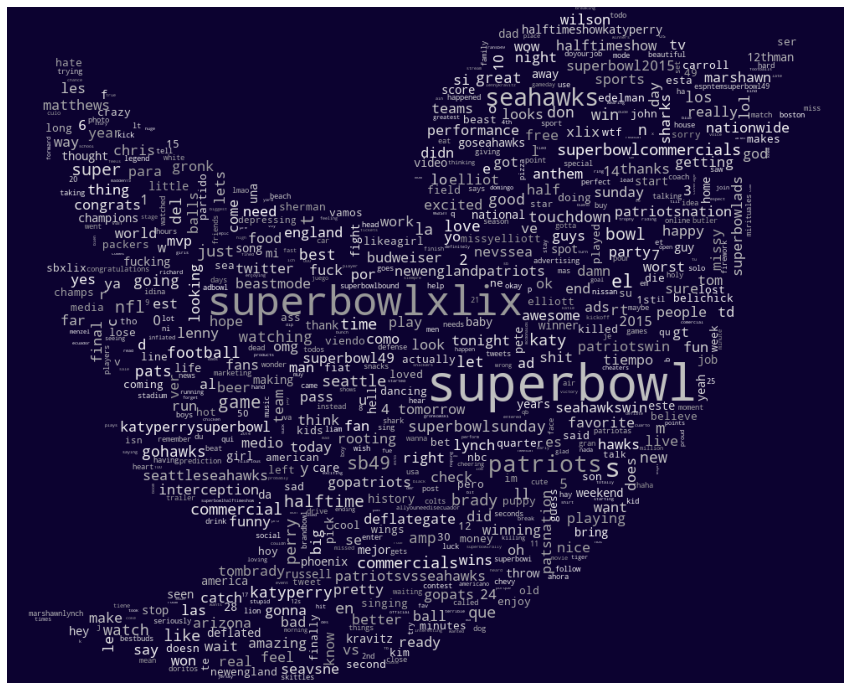

[('superbowl', 749704), ('superbowlxlix', 468806), ('s', 144426), ('seahawks', 121821), ('patriots', 116917), ('sb49', 70440), ('t', 69898), ('el', 69745), ('game', 61952), ('super', 56730)]


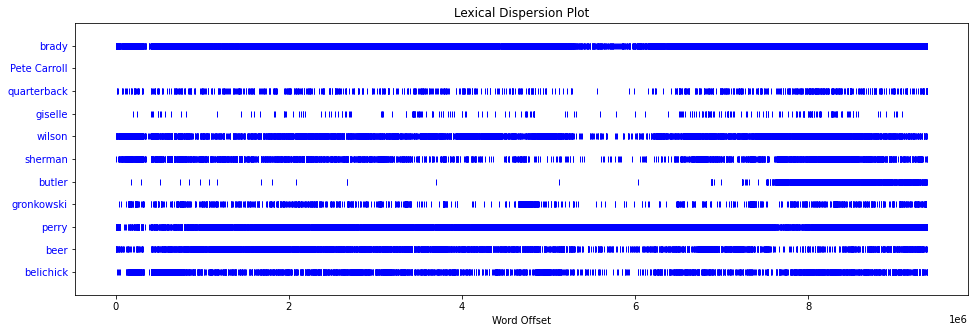

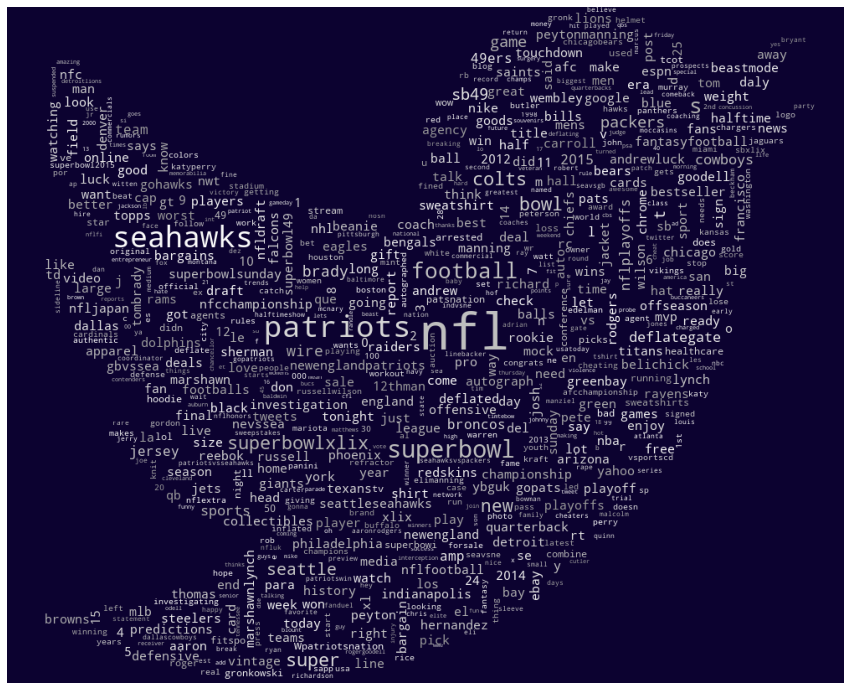

[('nfl', 262661), ('patriots', 50814), ('seahawks', 47533), ('superbowl', 32519), ('s', 26734), ('football', 26250), ('superbowlxlix', 18109), ('bowl', 18093), ('colts', 17668), ('super', 16963)]


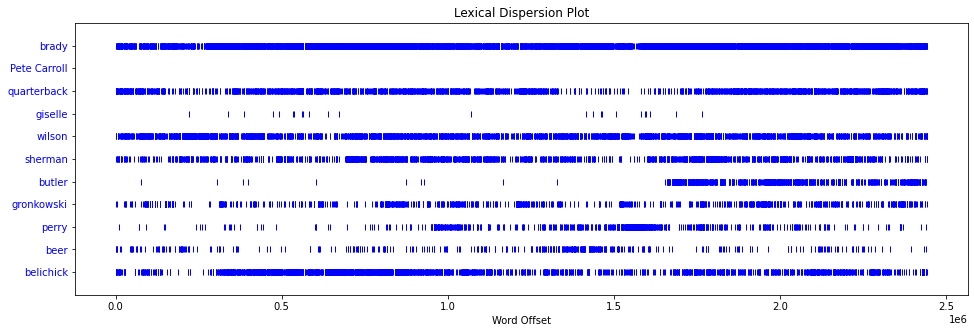

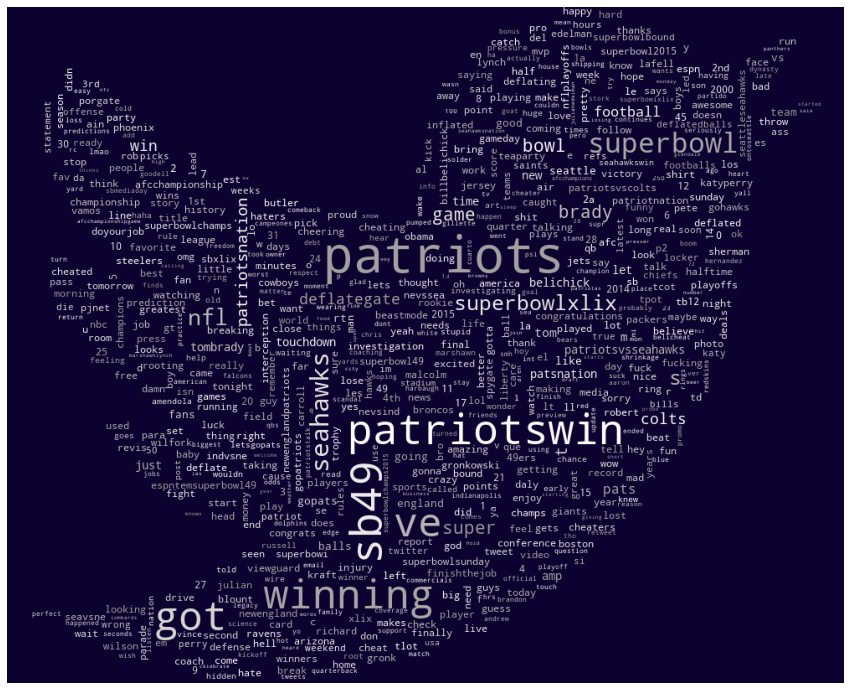

[('patriots', 267968), ('sb49', 187849), ('patriotswin', 179573), ('got', 168507), ('winning', 166352), ('ve', 166261), ('superbowl', 60223), ('seahawks', 50220), ('nfl', 39638), ('superbowlxlix', 32671)]


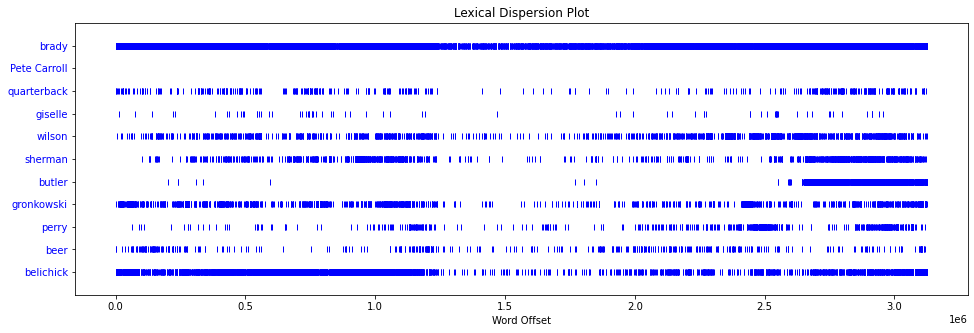

In [ ]:
from wordcloud import WordCloud
from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer
from sumy.summarizers.lex_rank import LexRankSummarizer
from PIL import Image, ImageDraw
import random
import pandas as pd
import numpy as np
import re, json, datetime, pytz
import matplotlib.pyplot as plt
from sklearn.feature_extraction import text
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from textblob import TextBlob
from sklearn.ensemble import RandomForestClassifier
from collections import Counter
from collections import Counter
import nltk
import cv2


def get_data(text,return_day_count=False,return_hour_count=False):
    with open(text+'.txt', 'r',encoding="utf8") as f:
        retweet_count, month, day, hour, followers, place, title, time = [], [], [], [], [], [], [], []
        #pst_tz = pytz.timezone('US/Pacific') 
        pst_tz = pytz.timezone('America/Los_Angeles')
        for line in f:
            tweet = json.loads(line)
            retweet_count.append(tweet['metrics']['citations']['total']) 
            month.append(datetime.datetime.fromtimestamp(tweet['citation_date']).month)
            day.append(datetime.datetime.fromtimestamp(tweet['citation_date']).day)
            hour.append(datetime.datetime.fromtimestamp(tweet['citation_date']).hour)
            followers.append(tweet['author']['followers'])
            time.append(datetime.datetime.fromtimestamp(tweet['citation_date']))
            place.append(tweet['tweet']['user']['location'])
            title.append(tweet['title'])
    d = {'retweet_count':retweet_count,'month':month,'day':day,'hour':hour,
    'followers':followers,'time':time,'place':place,'title':title}
    df = pd.DataFrame(d)
    day_count = np.array(month)*31 + np.array(day) - 44
    hour_count = (day_count-1)*24 + np.array(hour)
    if return_day_count:
        df['day_count'] = day_count
    if return_hour_count:
        df['hour_count'] = hour_count
    return df   

def grey_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return "hsl(0, 0%%, %d%%)" % random.randint(60, 100)

logomask = cv2.imread('twitter.png')
fontcolor='#06031c'
bgcolor = '#000000'

def full_clean(tweets):
    from sklearn.feature_extraction import text
    stop_words = text.ENGLISH_STOP_WORDS
    corpus = []
    for tweet in tweets:
        clean_tweet = re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).lower().split()
        text = [word for word in clean_tweet if not word in stop_words]
        text = ' '.join(text)
        corpus.append(text)
    return corpus
    
def get_wordcloud(text):
    df = get_data(text)
    tweets = df['title'].tolist()
    cleaned_tweets = full_clean(tweets)
    full_text = ' '.join(cleaned_tweets)
    cleaned_tweets = full_text.split()
    wordcloud = WordCloud(background_color='#0c0230',max_font_size=60,
                          mask = logomask,
                          max_words=700,
                          width=1800,
                          height=1400).generate_from_frequencies(Counter(cleaned_tweets))
        
    plt.figure(figsize=(15,20))
    plt.imshow(wordcloud.recolor(color_func=grey_color_func, random_state=3))
    plt.axis('off')
    plt.show()
   
    counts=Counter(cleaned_tweets)
    most_occur = counts.most_common(10)
    print(most_occur)
    
    # do the work; create a dispersion chart of the MAXIMUM most frequent pos words
    plt.figure(figsize=(16,5))
    topics = ['brady', 'Pete Carroll', 'quarterback','giselle','wilson','sherman','butler','gronkowski','perry','beer','belichick']
    myText = nltk.Text(cleaned_tweets)
    myText.dispersion_plot(topics)

get_wordcloud('tweets_#gopatriots')
get_wordcloud('tweets_#gohawks') 
get_wordcloud('tweets_#sb49')
get_wordcloud('tweets_#superbowl')
get_wordcloud('tweets_#nfl')
get_wordcloud('tweets_#patriots')

## To what extent do highly influential tweets (measured by number of tweets, number of followers, number of retweets and number of impressions) introduce a change in the general Twitter sentiment level?

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


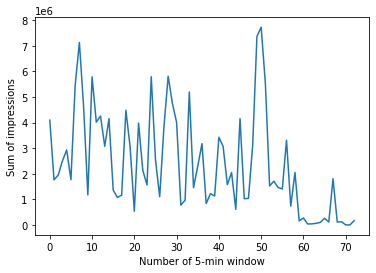

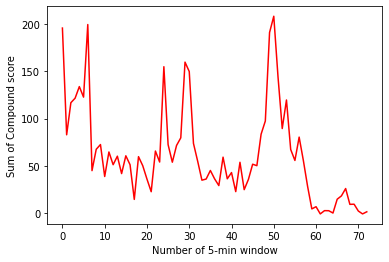

In [ ]:
import nltk
nltk.downloader.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import mean_squared_error
import pandas as pd
import random
import numpy as np
import re, json, datetime, pytz
import matplotlib.pyplot as plt
from sklearn.feature_extraction import text
from nltk.stem.porter import PorterStemmer
from textblob import TextBlob
from sklearn.ensemble import RandomForestClassifier
import nltk
import cv2
import datetime
import pytz


sid = SentimentIntensityAnalyzer()

tweetfile = 'tweets_#nfl.txt'
q2_files = 'tweets_#nfl.txt','tweets_#superbowl.txt'

file = []
with open(tweetfile,encoding="utf8") as f:
    for line in f:
        file.append(line)

pst_tz = pytz.timezone('America/Los_Angeles')

date, time, num_tweets, num_follow, num_retweets, num_mentions, rank_score, num_hashtags = [], [], [], [], [], [], [], []
time_5 = []
pos, neu, neg, imp = [], [], [], []

for n,line in enumerate(file):
    tw = json.loads(line)
    timestamp = tw['citation_date']
    timestamp = str(datetime.datetime.fromtimestamp(int(timestamp), pst_tz))
    time_split = ''.join(timestamp[0:10].split('-'))
    date.append(int(time_split))
    time.append(int(timestamp[11:13]))
    title = tw['title']
    pos.append(sid.polarity_scores(title)['compound'])
    #neu.append(sid.polarity_scores(title)['neu'])
    #neg.append(sid.polarity_scores(title)['neg'])
    imp.append(tw['metrics']['impressions'])
    a,b,c,_ = timestamp.split(':')
    rounded = str(int((int(b)/5))*5).zfill(2)
    time_mins = timestamp[11:13] + rounded
    time_5.append(int(time_mins))
    num_tweets.append(1)
    num_follow.append(tw['author']['followers'])
    num_retweets.append(tw['metrics']['citations']['total'])
    num_mentions.append(len(tw['tweet']['entities']['user_mentions']))
    rank_score.append(tw['metrics']['ranking_score'])
    num_hashtags.append(tw['title'].count('#'))

sp = pd.DataFrame({'date':date,'time':time_5,'tweets':num_tweets,'followers':num_follow,'retweets':num_retweets,'imp':imp,'pos':pos},
                  columns=['date','time','tweets', 'followers', 'retweets','imp','pos'])

sp = sp.groupby(['date', 'time']).agg({'time' : np.max, 'tweets' : np.sum, 'followers' : np.sum, 'retweets' : np.sum,'imp':np.sum,'pos':np.sum})
t2 = sp.query('date == 20150201 and (time >= 1500 and time <= 2100)')

plt.figure()
plt.plot(t2['imp'].values)
plt.xlabel('Number of 5-min window');plt.ylabel('Sum of impressions'); 
plt.show()
plt.figure()
plt.plot(t2['pos'].values,'r')
plt.xlabel('Number of 5-min window');plt.ylabel('Sum of Compound score'); 
plt.show()

In [ ]:
def clean(title):
    title = nltk.word_tokenize(title)
    title = [i.lower() for i in title if i not in stopwords.words('english')]
    for n,i in enumerate(title):
        try:            
            if i == '#':
                title[n] = ""
                title[n+1] = ""
            elif i == 'https':
                title[n] = ""
                title[n+1] = ""
                title[n+2] = ""
        except IndexError:
            title[n] = ""
    title = " ".join(title)
    return title


sid = SentimentIntensityAnalyzer()
tweetfile = 'tweets_#nfl.txt'

file = []
with open(tweetfile,encoding="utf8") as f:
    for line in f:
        file.append(line)

pst_tz = pytz.timezone('America/Los_Angeles')

date, time, num_tweets, num_follow, num_retweets, num_mentions, rank_score, num_hashtags = [], [], [], [], [], [], [], []
time_5 = []
pos, neu, neg, imp = [], [], [], []

for n,line in enumerate(file):
    tw = json.loads(line)
    timestamp = tw['citation_date']
    timestamp = str(datetime.datetime.fromtimestamp(int(timestamp), pst_tz))
    time_split = ''.join(timestamp[0:10].split('-'))
    date.append(int(time_split))
    time.append(int(timestamp[11:13]))
    title = tw['title']
    pos.append(sid.polarity_scores(title)['compound'])
    #neu.append(sid.polarity_scores(title)['neu'])
    #neg.append(sid.polarity_scores(title)['neg'])
    imp.append(tw['metrics']['impressions'])
    a,b,c,_ = timestamp.split(':')
    rounded = str(int((int(b)/5))*5).zfill(2)
    time_mins = timestamp[11:13] + rounded
    time_5.append(int(time_mins))
    num_tweets.append(1)
    num_follow.append(tw['author']['followers'])
    num_retweets.append(tw['metrics']['citations']['total'])
    num_mentions.append(len(tw['tweet']['entities']['user_mentions']))
    rank_score.append(tw['metrics']['ranking_score'])
    num_hashtags.append(tw['title'].count('#'))

sp = pd.DataFrame({'date':date,'time':time_5,'tweets':num_tweets,'followers':num_follow,'retweets':num_retweets,'imp':imp,'pos':pos},
                  columns=['date','time','tweets', 'followers', 'retweets','imp','pos'])
sp = sp.groupby(['date', 'time']).agg({'time' : np.max, 'tweets' : np.sum,  'followers' : np.sum, 'retweets' : np.sum,'imp':np.sum,'pos':np.sum})
t2 = sp.query('date == 20150201 and (time >= 1500 and time <= 2100)')
X = t2.loc[:,'tweets':'imp'].values

ss = StandardScaler()
X = ss.fit_transform(X)
y = t2['pos'].values

param = {'hidden_layer_sizes':[(100,), (200,200,), (300,300,300,), (400,400,400,400,),
                               (500,500,500,500,500,), (600,600,600,600,600,600,),
                               (700,700,700,700,700,700,700,), (800,800,800,800,800,800,800,800,),
                               (900,900,900,900,900,900,900,900,900,)],
    'alpha': [10.0 ** x for x in np.arange(-2, 2)],
    'activation': ['logistic', 'tanh', 'relu'] }

nn = MLPRegressor()
clf = GridSearchCV(nn, param, cv=KFold(n_splits=10, shuffle=True), verbose = 3, scoring = 'neg_root_mean_squared_error', return_train_score = True).fit(X,y)
#clf = GridSearchCV(nn, param, cv = 10, verbose = 3, scoring = 'neg_root_mean_squared_error', return_train_score = True).fit(X,y)
print("Best estimator for Neural Network: \n", clf.best_estimator_)
print("Best estimator for Neural Network: \n", clf.best_estimator_)
print("Best score for Neural Network: ", -1*clf.best_score_)
print("Best parameters for Neural Network: ", clf.best_params_)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits
[CV 1/10] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100,);, score=(train=-68.290, test=-95.883) total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 2/10] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100,);, score=(train=-70.400, test=-79.465) total time=   0.1s
[CV 3/10] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100,);, score=(train=-68.728, test=-91.362) total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 4/10] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100,);, score=(train=-72.973, test=-50.226) total time=   0.1s
[CV 5/10] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100,);, score=(train=-73.550, test=-44.778) total time=   0.1s
[CV 6/10] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100,);, score=(train=-70.901, test=-69.370) total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 7/10] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100,);, score=(train=-73.190, test=-40.507) total time=   0.1s
[CV 8/10] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100,);, score=(train=-71.684, test=-70.993) total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 9/10] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100,);, score=(train=-69.190, test=-89.134) total time=   0.1s
[CV 10/10] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100,);, score=(train=-73.948, test=-44.094) total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 1/10] END activation=logistic, alpha=0.01, hidden_layer_sizes=(200, 200);, score=(train=-57.706, test=-82.627) total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 2/10] END activation=logistic, alpha=0.01, hidden_layer_sizes=(200, 200);, score=(train=-58.180, test=-68.689) total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 3/10] END activation=logistic, alpha=0.01, hidden_layer_sizes=(200, 200);, score=(train=-57.688, test=-78.820) total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 4/10] END activation=logistic, alpha=0.01, hidden_layer_sizes=(200, 200);, score=(train=-60.163, test=-45.546) total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 5/10] END activation=logistic, alpha=0.01, hidden_layer_sizes=(200, 200);, score=(train=-62.723, test=-28.704) total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 6/10] END activation=logistic, alpha=0.01, hidden_layer_sizes=(200, 200);, score=(train=-58.089, test=-60.711) total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 7/10] END activation=logistic, alpha=0.01, hidden_layer_sizes=(200, 200);, score=(train=-62.222, test=-26.306) total time=   0.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 8/10] END activation=logistic, alpha=0.01, hidden_layer_sizes=(200, 200);, score=(train=-60.453, test=-55.356) total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 9/10] END activation=logistic, alpha=0.01, hidden_layer_sizes=(200, 200);, score=(train=-58.390, test=-78.273) total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 10/10] END activation=logistic, alpha=0.01, hidden_layer_sizes=(200, 200);, score=(train=-62.764, test=-31.585) total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 1/10] END activation=logistic, alpha=0.01, hidden_layer_sizes=(300, 300, 300);, score=(train=-54.087, test=-77.015) total time=   2.4s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 2/10] END activation=logistic, alpha=0.01, hidden_layer_sizes=(300, 300, 300);, score=(train=-55.178, test=-66.367) total time=   2.3s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 3/10] END activation=logistic, alpha=0.01, hidden_layer_sizes=(300, 300, 300);, score=(train=-53.965, test=-73.682) total time=   2.3s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 4/10] END activation=logistic, alpha=0.01, hidden_layer_sizes=(300, 300, 300);, score=(train=-56.675, test=-45.818) total time=   2.3s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 5/10] END activation=logistic, alpha=0.01, hidden_layer_sizes=(300, 300, 300);, score=(train=-57.348, test=-21.004) total time=   2.3s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 6/10] END activation=logistic, alpha=0.01, hidden_layer_sizes=(300, 300, 300);, score=(train=-57.611, test=-60.377) total time=   2.3s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 7/10] END activation=logistic, alpha=0.01, hidden_layer_sizes=(300, 300, 300);, score=(train=-58.761, test=-23.314) total time=   2.3s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 8/10] END activation=logistic, alpha=0.01, hidden_layer_sizes=(300, 300, 300);, score=(train=-56.936, test=-50.055) total time=   2.3s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 9/10] END activation=logistic, alpha=0.01, hidden_layer_sizes=(300, 300, 300);, score=(train=-53.936, test=-72.645) total time=   2.3s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 10/10] END activation=logistic, alpha=0.01, hidden_layer_sizes=(300, 300, 300);, score=(train=-58.145, test=-28.247) total time=   2.3s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 1/10] END activation=logistic, alpha=0.01, hidden_layer_sizes=(400, 400, 400, 400);, score=(train=-51.554, test=-72.218) total time=   8.0s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 2/10] END activation=logistic, alpha=0.01, hidden_layer_sizes=(400, 400, 400, 400);, score=(train=-51.499, test=-63.670) total time=   7.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 3/10] END activation=logistic, alpha=0.01, hidden_layer_sizes=(400, 400, 400, 400);, score=(train=-51.749, test=-70.102) total time=   5.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 4/10] END activation=logistic, alpha=0.01, hidden_layer_sizes=(400, 400, 400, 400);, score=(train=-54.457, test=-46.644) total time=   4.2s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 5/10] END activation=logistic, alpha=0.01, hidden_layer_sizes=(400, 400, 400, 400);, score=(train=-55.302, test=-18.684) total time=   4.3s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 6/10] END activation=logistic, alpha=0.01, hidden_layer_sizes=(400, 400, 400, 400);, score=(train=-52.880, test=-57.257) total time=   4.3s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 7/10] END activation=logistic, alpha=0.01, hidden_layer_sizes=(400, 400, 400, 400);, score=(train=-56.452, test=-22.279) total time=   4.2s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 8/10] END activation=logistic, alpha=0.01, hidden_layer_sizes=(400, 400, 400, 400);, score=(train=-54.704, test=-46.276) total time=   4.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 9/10] END activation=logistic, alpha=0.01, hidden_layer_sizes=(400, 400, 400, 400);, score=(train=-51.694, test=-69.327) total time=   4.2s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 10/10] END activation=logistic, alpha=0.01, hidden_layer_sizes=(400, 400, 400, 400);, score=(train=-55.144, test=-27.615) total time=   4.2s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 1/10] END activation=logistic, alpha=0.01, hidden_layer_sizes=(500, 500, 500, 500, 500);, score=(train=-50.005, test=-68.204) total time=   7.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 2/10] END activation=logistic, alpha=0.01, hidden_layer_sizes=(500, 500, 500, 500, 500);, score=(train=-50.518, test=-63.005) total time=   7.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 3/10] END activation=logistic, alpha=0.01, hidden_layer_sizes=(500, 500, 500, 500, 500);, score=(train=-50.159, test=-66.829) total time=   7.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 4/10] END activation=logistic, alpha=0.01, hidden_layer_sizes=(500, 500, 500, 500, 500);, score=(train=-51.990, test=-48.911) total time=   7.9s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 5/10] END activation=logistic, alpha=0.01, hidden_layer_sizes=(500, 500, 500, 500, 500);, score=(train=-54.063, test=-18.121) total time=   8.0s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 6/10] END activation=logistic, alpha=0.01, hidden_layer_sizes=(500, 500, 500, 500, 500);, score=(train=-51.958, test=-56.782) total time=   8.0s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 7/10] END activation=logistic, alpha=0.01, hidden_layer_sizes=(500, 500, 500, 500, 500);, score=(train=-54.360, test=-22.880) total time=   7.9s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 8/10] END activation=logistic, alpha=0.01, hidden_layer_sizes=(500, 500, 500, 500, 500);, score=(train=-52.974, test=-42.788) total time=   8.3s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 9/10] END activation=logistic, alpha=0.01, hidden_layer_sizes=(500, 500, 500, 500, 500);, score=(train=-50.111, test=-66.349) total time=   7.8s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 10/10] END activation=logistic, alpha=0.01, hidden_layer_sizes=(500, 500, 500, 500, 500);, score=(train=-53.979, test=-28.170) total time=   8.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 1/10] END activation=logistic, alpha=0.01, hidden_layer_sizes=(600, 600, 600, 600, 600, 600);, score=(train=-49.333, test=-65.309) total time=  12.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 2/10] END activation=logistic, alpha=0.01, hidden_layer_sizes=(600, 600, 600, 600, 600, 600);, score=(train=-49.733, test=-62.518) total time=  12.9s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 3/10] END activation=logistic, alpha=0.01, hidden_layer_sizes=(600, 600, 600, 600, 600, 600);, score=(train=-49.463, test=-64.704) total time=  12.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 4/10] END activation=logistic, alpha=0.01, hidden_layer_sizes=(600, 600, 600, 600, 600, 600);, score=(train=-51.145, test=-50.522) total time=  13.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 5/10] END activation=logistic, alpha=0.01, hidden_layer_sizes=(600, 600, 600, 600, 600, 600);, score=(train=-53.459, test=-18.544) total time=  13.0s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 6/10] END activation=logistic, alpha=0.01, hidden_layer_sizes=(600, 600, 600, 600, 600, 600);, score=(train=-50.683, test=-56.350) total time=  12.9s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 7/10] END activation=logistic, alpha=0.01, hidden_layer_sizes=(600, 600, 600, 600, 600, 600);, score=(train=-53.510, test=-24.066) total time=  12.9s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 8/10] END activation=logistic, alpha=0.01, hidden_layer_sizes=(600, 600, 600, 600, 600, 600);, score=(train=-52.350, test=-41.182) total time=  12.8s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 9/10] END activation=logistic, alpha=0.01, hidden_layer_sizes=(600, 600, 600, 600, 600, 600);, score=(train=-49.846, test=-65.693) total time=  12.8s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 10/10] END activation=logistic, alpha=0.01, hidden_layer_sizes=(600, 600, 600, 600, 600, 600);, score=(train=-52.929, test=-29.676) total time=  12.9s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 1/10] END activation=logistic, alpha=0.01, hidden_layer_sizes=(700, 700, 700, 700, 700, 700, 700);, score=(train=-49.268, test=-64.832) total time=  20.4s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 2/10] END activation=logistic, alpha=0.01, hidden_layer_sizes=(700, 700, 700, 700, 700, 700, 700);, score=(train=-49.345, test=-62.320) total time=  20.2s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 3/10] END activation=logistic, alpha=0.01, hidden_layer_sizes=(700, 700, 700, 700, 700, 700, 700);, score=(train=-49.336, test=-64.122) total time=  20.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 4/10] END activation=logistic, alpha=0.01, hidden_layer_sizes=(700, 700, 700, 700, 700, 700, 700);, score=(train=-50.672, test=-52.097) total time=  20.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 5/10] END activation=logistic, alpha=0.01, hidden_layer_sizes=(700, 700, 700, 700, 700, 700, 700);, score=(train=-53.043, test=-19.819) total time=  20.4s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 6/10] END activation=logistic, alpha=0.01, hidden_layer_sizes=(700, 700, 700, 700, 700, 700, 700);, score=(train=-50.247, test=-56.406) total time=  20.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 7/10] END activation=logistic, alpha=0.01, hidden_layer_sizes=(700, 700, 700, 700, 700, 700, 700);, score=(train=-52.857, test=-26.060) total time=  20.8s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 8/10] END activation=logistic, alpha=0.01, hidden_layer_sizes=(700, 700, 700, 700, 700, 700, 700);, score=(train=-52.020, test=-40.041) total time=  20.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 9/10] END activation=logistic, alpha=0.01, hidden_layer_sizes=(700, 700, 700, 700, 700, 700, 700);, score=(train=-49.523, test=-64.695) total time=  20.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 10/10] END activation=logistic, alpha=0.01, hidden_layer_sizes=(700, 700, 700, 700, 700, 700, 700);, score=(train=-52.709, test=-30.285) total time=  20.8s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 1/10] END activation=logistic, alpha=0.01, hidden_layer_sizes=(800, 800, 800, 800, 800, 800, 800, 800);, score=(train=-49.174, test=-63.727) total time=  29.2s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 2/10] END activation=logistic, alpha=0.01, hidden_layer_sizes=(800, 800, 800, 800, 800, 800, 800, 800);, score=(train=-49.173, test=-62.281) total time=  30.2s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 3/10] END activation=logistic, alpha=0.01, hidden_layer_sizes=(800, 800, 800, 800, 800, 800, 800, 800);, score=(train=-49.222, test=-63.364) total time=  29.2s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 4/10] END activation=logistic, alpha=0.01, hidden_layer_sizes=(800, 800, 800, 800, 800, 800, 800, 800);, score=(train=-50.484, test=-53.255) total time=  29.3s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 5/10] END activation=logistic, alpha=0.01, hidden_layer_sizes=(800, 800, 800, 800, 800, 800, 800, 800);, score=(train=-53.012, test=-20.037) total time=  29.2s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 6/10] END activation=logistic, alpha=0.01, hidden_layer_sizes=(800, 800, 800, 800, 800, 800, 800, 800);, score=(train=-50.139, test=-56.512) total time=  29.0s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 7/10] END activation=logistic, alpha=0.01, hidden_layer_sizes=(800, 800, 800, 800, 800, 800, 800, 800);, score=(train=-52.584, test=-28.193) total time=  29.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 8/10] END activation=logistic, alpha=0.01, hidden_layer_sizes=(800, 800, 800, 800, 800, 800, 800, 800);, score=(train=-51.911, test=-39.470) total time=  28.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 9/10] END activation=logistic, alpha=0.01, hidden_layer_sizes=(800, 800, 800, 800, 800, 800, 800, 800);, score=(train=-49.333, test=-63.739) total time=  28.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 10/10] END activation=logistic, alpha=0.01, hidden_layer_sizes=(800, 800, 800, 800, 800, 800, 800, 800);, score=(train=-52.378, test=-31.898) total time=  28.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 1/10] END activation=logistic, alpha=0.01, hidden_layer_sizes=(900, 900, 900, 900, 900, 900, 900, 900, 900);, score=(train=-49.166, test=-63.542) total time=  41.0s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 2/10] END activation=logistic, alpha=0.01, hidden_layer_sizes=(900, 900, 900, 900, 900, 900, 900, 900, 900);, score=(train=-49.159, test=-62.287) total time=  41.8s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 3/10] END activation=logistic, alpha=0.01, hidden_layer_sizes=(900, 900, 900, 900, 900, 900, 900, 900, 900);, score=(train=-49.180, test=-62.727) total time=  41.8s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 4/10] END activation=logistic, alpha=0.01, hidden_layer_sizes=(900, 900, 900, 900, 900, 900, 900, 900, 900);, score=(train=-50.411, test=-54.182) total time=  41.8s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 5/10] END activation=logistic, alpha=0.01, hidden_layer_sizes=(900, 900, 900, 900, 900, 900, 900, 900, 900);, score=(train=-52.953, test=-20.700) total time=  41.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 6/10] END activation=logistic, alpha=0.01, hidden_layer_sizes=(900, 900, 900, 900, 900, 900, 900, 900, 900);, score=(train=-50.101, test=-56.604) total time=  41.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 7/10] END activation=logistic, alpha=0.01, hidden_layer_sizes=(900, 900, 900, 900, 900, 900, 900, 900, 900);, score=(train=-52.564, test=-28.585) total time=  41.8s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 8/10] END activation=logistic, alpha=0.01, hidden_layer_sizes=(900, 900, 900, 900, 900, 900, 900, 900, 900);, score=(train=-51.874, test=-39.121) total time=  41.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 9/10] END activation=logistic, alpha=0.01, hidden_layer_sizes=(900, 900, 900, 900, 900, 900, 900, 900, 900);, score=(train=-49.299, test=-63.329) total time=  43.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 10/10] END activation=logistic, alpha=0.01, hidden_layer_sizes=(900, 900, 900, 900, 900, 900, 900, 900, 900);, score=(train=-52.298, test=-32.862) total time=  41.5s
[CV 1/10] END activation=logistic, alpha=0.1, hidden_layer_sizes=(100,);, score=(train=-67.983, test=-95.553) total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 2/10] END activation=logistic, alpha=0.1, hidden_layer_sizes=(100,);, score=(train=-69.514, test=-78.772) total time=   0.1s
[CV 3/10] END activation=logistic, alpha=0.1, hidden_layer_sizes=(100,);, score=(train=-68.086, test=-90.641) total time=   0.1s
[CV 4/10] END activation=logistic, alpha=0.1, hidden_layer_sizes=(100,);, score=(train=-73.627, test=-50.724) total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 5/10] END activation=logistic, alpha=0.1, hidden_layer_sizes=(100,);, score=(train=-73.426, test=-44.635) total time=   0.1s
[CV 6/10] END activation=logistic, alpha=0.1, hidden_layer_sizes=(100,);, score=(train=-71.903, test=-70.542) total time=   0.1s
[CV 7/10] END activation=logistic, alpha=0.1, hidden_layer_sizes=(100,);, score=(train=-72.892, test=-40.207) total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 8/10] END activation=logistic, alpha=0.1, hidden_layer_sizes=(100,);, score=(train=-70.402, test=-69.699) total time=   0.1s
[CV 9/10] END activation=logistic, alpha=0.1, hidden_layer_sizes=(100,);, score=(train=-68.969, test=-88.821) total time=   0.1s
[CV 10/10] END activation=logistic, alpha=0.1, hidden_layer_sizes=(100,);, score=(train=-73.110, test=-43.331) total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 1/10] END activation=logistic, alpha=0.1, hidden_layer_sizes=(200, 200);, score=(train=-56.870, test=-81.418) total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 2/10] END activation=logistic, alpha=0.1, hidden_layer_sizes=(200, 200);, score=(train=-58.424, test=-68.880) total time=   0.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 3/10] END activation=logistic, alpha=0.1, hidden_layer_sizes=(200, 200);, score=(train=-58.634, test=-80.020) total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 4/10] END activation=logistic, alpha=0.1, hidden_layer_sizes=(200, 200);, score=(train=-61.101, test=-45.685) total time=   0.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 5/10] END activation=logistic, alpha=0.1, hidden_layer_sizes=(200, 200);, score=(train=-62.556, test=-28.475) total time=   0.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 6/10] END activation=logistic, alpha=0.1, hidden_layer_sizes=(200, 200);, score=(train=-58.751, test=-61.203) total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 7/10] END activation=logistic, alpha=0.1, hidden_layer_sizes=(200, 200);, score=(train=-62.888, test=-26.983) total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 8/10] END activation=logistic, alpha=0.1, hidden_layer_sizes=(200, 200);, score=(train=-60.348, test=-55.212) total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 9/10] END activation=logistic, alpha=0.1, hidden_layer_sizes=(200, 200);, score=(train=-56.531, test=-76.029) total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 10/10] END activation=logistic, alpha=0.1, hidden_layer_sizes=(200, 200);, score=(train=-62.449, test=-31.305) total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 1/10] END activation=logistic, alpha=0.1, hidden_layer_sizes=(300, 300, 300);, score=(train=-53.637, test=-76.240) total time=   2.0s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 2/10] END activation=logistic, alpha=0.1, hidden_layer_sizes=(300, 300, 300);, score=(train=-55.429, test=-66.559) total time=   2.0s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 3/10] END activation=logistic, alpha=0.1, hidden_layer_sizes=(300, 300, 300);, score=(train=-53.349, test=-72.749) total time=   1.9s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 4/10] END activation=logistic, alpha=0.1, hidden_layer_sizes=(300, 300, 300);, score=(train=-55.526, test=-46.152) total time=   1.9s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 5/10] END activation=logistic, alpha=0.1, hidden_layer_sizes=(300, 300, 300);, score=(train=-58.071, test=-21.979) total time=   2.0s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 6/10] END activation=logistic, alpha=0.1, hidden_layer_sizes=(300, 300, 300);, score=(train=-55.558, test=-58.932) total time=   2.0s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 7/10] END activation=logistic, alpha=0.1, hidden_layer_sizes=(300, 300, 300);, score=(train=-59.005, test=-23.483) total time=   2.0s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 8/10] END activation=logistic, alpha=0.1, hidden_layer_sizes=(300, 300, 300);, score=(train=-57.922, test=-51.594) total time=   1.9s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 9/10] END activation=logistic, alpha=0.1, hidden_layer_sizes=(300, 300, 300);, score=(train=-54.737, test=-73.722) total time=   2.0s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 10/10] END activation=logistic, alpha=0.1, hidden_layer_sizes=(300, 300, 300);, score=(train=-58.528, test=-28.448) total time=   2.0s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 1/10] END activation=logistic, alpha=0.1, hidden_layer_sizes=(400, 400, 400, 400);, score=(train=-51.346, test=-71.756) total time=   3.8s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 2/10] END activation=logistic, alpha=0.1, hidden_layer_sizes=(400, 400, 400, 400);, score=(train=-52.457, test=-64.349) total time=   3.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 3/10] END activation=logistic, alpha=0.1, hidden_layer_sizes=(400, 400, 400, 400);, score=(train=-51.470, test=-69.593) total time=   3.8s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 4/10] END activation=logistic, alpha=0.1, hidden_layer_sizes=(400, 400, 400, 400);, score=(train=-54.090, test=-46.863) total time=   3.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 5/10] END activation=logistic, alpha=0.1, hidden_layer_sizes=(400, 400, 400, 400);, score=(train=-55.760, test=-19.112) total time=   3.8s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 6/10] END activation=logistic, alpha=0.1, hidden_layer_sizes=(400, 400, 400, 400);, score=(train=-52.949, test=-57.296) total time=   3.8s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 7/10] END activation=logistic, alpha=0.1, hidden_layer_sizes=(400, 400, 400, 400);, score=(train=-55.763, test=-22.248) total time=   3.8s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 8/10] END activation=logistic, alpha=0.1, hidden_layer_sizes=(400, 400, 400, 400);, score=(train=-55.063, test=-46.922) total time=   3.8s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 9/10] END activation=logistic, alpha=0.1, hidden_layer_sizes=(400, 400, 400, 400);, score=(train=-51.774, test=-69.456) total time=   3.8s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 10/10] END activation=logistic, alpha=0.1, hidden_layer_sizes=(400, 400, 400, 400);, score=(train=-55.678, test=-27.561) total time=   3.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 1/10] END activation=logistic, alpha=0.1, hidden_layer_sizes=(500, 500, 500, 500, 500);, score=(train=-50.074, test=-68.428) total time=   7.2s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 2/10] END activation=logistic, alpha=0.1, hidden_layer_sizes=(500, 500, 500, 500, 500);, score=(train=-50.302, test=-62.866) total time=   7.2s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 3/10] END activation=logistic, alpha=0.1, hidden_layer_sizes=(500, 500, 500, 500, 500);, score=(train=-49.920, test=-66.199) total time=   7.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 4/10] END activation=logistic, alpha=0.1, hidden_layer_sizes=(500, 500, 500, 500, 500);, score=(train=-52.376, test=-48.391) total time=   7.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 5/10] END activation=logistic, alpha=0.1, hidden_layer_sizes=(500, 500, 500, 500, 500);, score=(train=-54.453, test=-18.165) total time=   7.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 6/10] END activation=logistic, alpha=0.1, hidden_layer_sizes=(500, 500, 500, 500, 500);, score=(train=-51.421, test=-56.552) total time=   8.0s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 7/10] END activation=logistic, alpha=0.1, hidden_layer_sizes=(500, 500, 500, 500, 500);, score=(train=-54.123, test=-23.123) total time=   7.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 8/10] END activation=logistic, alpha=0.1, hidden_layer_sizes=(500, 500, 500, 500, 500);, score=(train=-53.014, test=-42.881) total time=   7.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 9/10] END activation=logistic, alpha=0.1, hidden_layer_sizes=(500, 500, 500, 500, 500);, score=(train=-50.339, test=-66.852) total time=   7.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 10/10] END activation=logistic, alpha=0.1, hidden_layer_sizes=(500, 500, 500, 500, 500);, score=(train=-54.421, test=-27.871) total time=   7.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 1/10] END activation=logistic, alpha=0.1, hidden_layer_sizes=(600, 600, 600, 600, 600, 600);, score=(train=-49.544, test=-66.445) total time=  12.9s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 2/10] END activation=logistic, alpha=0.1, hidden_layer_sizes=(600, 600, 600, 600, 600, 600);, score=(train=-49.867, test=-62.596) total time=  13.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 3/10] END activation=logistic, alpha=0.1, hidden_layer_sizes=(600, 600, 600, 600, 600, 600);, score=(train=-49.477, test=-64.763) total time=  12.8s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 4/10] END activation=logistic, alpha=0.1, hidden_layer_sizes=(600, 600, 600, 600, 600, 600);, score=(train=-51.491, test=-49.754) total time=  13.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 5/10] END activation=logistic, alpha=0.1, hidden_layer_sizes=(600, 600, 600, 600, 600, 600);, score=(train=-53.458, test=-18.547) total time=  12.8s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 6/10] END activation=logistic, alpha=0.1, hidden_layer_sizes=(600, 600, 600, 600, 600, 600);, score=(train=-50.900, test=-56.388) total time=  13.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 7/10] END activation=logistic, alpha=0.1, hidden_layer_sizes=(600, 600, 600, 600, 600, 600);, score=(train=-53.102, test=-25.104) total time=  13.2s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 8/10] END activation=logistic, alpha=0.1, hidden_layer_sizes=(600, 600, 600, 600, 600, 600);, score=(train=-52.314, test=-41.077) total time=  13.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 9/10] END activation=logistic, alpha=0.1, hidden_layer_sizes=(600, 600, 600, 600, 600, 600);, score=(train=-49.689, test=-65.250) total time=  12.9s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 10/10] END activation=logistic, alpha=0.1, hidden_layer_sizes=(600, 600, 600, 600, 600, 600);, score=(train=-52.847, test=-29.880) total time=  12.9s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 1/10] END activation=logistic, alpha=0.1, hidden_layer_sizes=(700, 700, 700, 700, 700, 700, 700);, score=(train=-49.239, test=-64.581) total time=  22.3s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 2/10] END activation=logistic, alpha=0.1, hidden_layer_sizes=(700, 700, 700, 700, 700, 700, 700);, score=(train=-49.287, test=-62.298) total time=  22.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 3/10] END activation=logistic, alpha=0.1, hidden_layer_sizes=(700, 700, 700, 700, 700, 700, 700);, score=(train=-49.278, test=-63.794) total time=  22.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 4/10] END activation=logistic, alpha=0.1, hidden_layer_sizes=(700, 700, 700, 700, 700, 700, 700);, score=(train=-50.703, test=-51.958) total time=  22.9s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 5/10] END activation=logistic, alpha=0.1, hidden_layer_sizes=(700, 700, 700, 700, 700, 700, 700);, score=(train=-53.032, test=-19.893) total time=  22.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 6/10] END activation=logistic, alpha=0.1, hidden_layer_sizes=(700, 700, 700, 700, 700, 700, 700);, score=(train=-50.222, test=-56.422) total time=  22.4s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 7/10] END activation=logistic, alpha=0.1, hidden_layer_sizes=(700, 700, 700, 700, 700, 700, 700);, score=(train=-52.826, test=-26.214) total time=  22.4s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 8/10] END activation=logistic, alpha=0.1, hidden_layer_sizes=(700, 700, 700, 700, 700, 700, 700);, score=(train=-52.043, test=-40.137) total time=  22.3s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 9/10] END activation=logistic, alpha=0.1, hidden_layer_sizes=(700, 700, 700, 700, 700, 700, 700);, score=(train=-49.402, test=-64.175) total time=  22.3s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 10/10] END activation=logistic, alpha=0.1, hidden_layer_sizes=(700, 700, 700, 700, 700, 700, 700);, score=(train=-52.447, test=-31.418) total time=  22.2s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 1/10] END activation=logistic, alpha=0.1, hidden_layer_sizes=(800, 800, 800, 800, 800, 800, 800, 800);, score=(train=-49.176, test=-63.779) total time=  30.9s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 2/10] END activation=logistic, alpha=0.1, hidden_layer_sizes=(800, 800, 800, 800, 800, 800, 800, 800);, score=(train=-49.196, test=-62.278) total time=  30.9s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 3/10] END activation=logistic, alpha=0.1, hidden_layer_sizes=(800, 800, 800, 800, 800, 800, 800, 800);, score=(train=-49.192, test=-63.007) total time=  30.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 4/10] END activation=logistic, alpha=0.1, hidden_layer_sizes=(800, 800, 800, 800, 800, 800, 800, 800);, score=(train=-50.497, test=-53.142) total time=  30.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 5/10] END activation=logistic, alpha=0.1, hidden_layer_sizes=(800, 800, 800, 800, 800, 800, 800, 800);, score=(train=-52.980, test=-20.336) total time=  30.2s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 6/10] END activation=logistic, alpha=0.1, hidden_layer_sizes=(800, 800, 800, 800, 800, 800, 800, 800);, score=(train=-50.111, test=-56.572) total time=  29.9s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 7/10] END activation=logistic, alpha=0.1, hidden_layer_sizes=(800, 800, 800, 800, 800, 800, 800, 800);, score=(train=-52.653, test=-27.381) total time=  29.3s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 8/10] END activation=logistic, alpha=0.1, hidden_layer_sizes=(800, 800, 800, 800, 800, 800, 800, 800);, score=(train=-51.887, test=-39.277) total time=  29.2s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 9/10] END activation=logistic, alpha=0.1, hidden_layer_sizes=(800, 800, 800, 800, 800, 800, 800, 800);, score=(train=-49.368, test=-63.986) total time=  29.2s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 10/10] END activation=logistic, alpha=0.1, hidden_layer_sizes=(800, 800, 800, 800, 800, 800, 800, 800);, score=(train=-52.365, test=-32.017) total time=  29.2s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 1/10] END activation=logistic, alpha=0.1, hidden_layer_sizes=(900, 900, 900, 900, 900, 900, 900, 900, 900);, score=(train=-49.162, test=-63.380) total time=  41.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 2/10] END activation=logistic, alpha=0.1, hidden_layer_sizes=(900, 900, 900, 900, 900, 900, 900, 900, 900);, score=(train=-49.156, test=-62.290) total time=  41.8s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 3/10] END activation=logistic, alpha=0.1, hidden_layer_sizes=(900, 900, 900, 900, 900, 900, 900, 900, 900);, score=(train=-49.186, test=-62.915) total time=  41.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 4/10] END activation=logistic, alpha=0.1, hidden_layer_sizes=(900, 900, 900, 900, 900, 900, 900, 900, 900);, score=(train=-50.450, test=-53.591) total time=  42.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 5/10] END activation=logistic, alpha=0.1, hidden_layer_sizes=(900, 900, 900, 900, 900, 900, 900, 900, 900);, score=(train=-52.987, test=-20.258) total time=  42.0s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 6/10] END activation=logistic, alpha=0.1, hidden_layer_sizes=(900, 900, 900, 900, 900, 900, 900, 900, 900);, score=(train=-50.105, test=-56.590) total time=  42.3s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 7/10] END activation=logistic, alpha=0.1, hidden_layer_sizes=(900, 900, 900, 900, 900, 900, 900, 900, 900);, score=(train=-52.554, test=-28.923) total time=  42.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 8/10] END activation=logistic, alpha=0.1, hidden_layer_sizes=(900, 900, 900, 900, 900, 900, 900, 900, 900);, score=(train=-51.868, test=-39.022) total time=  42.9s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 9/10] END activation=logistic, alpha=0.1, hidden_layer_sizes=(900, 900, 900, 900, 900, 900, 900, 900, 900);, score=(train=-49.299, test=-63.330) total time=  42.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 10/10] END activation=logistic, alpha=0.1, hidden_layer_sizes=(900, 900, 900, 900, 900, 900, 900, 900, 900);, score=(train=-52.293, test=-32.977) total time=  42.7s
[CV 1/10] END activation=logistic, alpha=1.0, hidden_layer_sizes=(100,);, score=(train=-67.385, test=-94.827) total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 2/10] END activation=logistic, alpha=1.0, hidden_layer_sizes=(100,);, score=(train=-70.135, test=-79.278) total time=   0.1s
[CV 3/10] END activation=logistic, alpha=1.0, hidden_layer_sizes=(100,);, score=(train=-68.174, test=-90.730) total time=   0.1s
[CV 4/10] END activation=logistic, alpha=1.0, hidden_layer_sizes=(100,);, score=(train=-73.062, test=-50.300) total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 5/10] END activation=logistic, alpha=1.0, hidden_layer_sizes=(100,);, score=(train=-72.781, test=-43.979) total time=   0.1s
[CV 6/10] END activation=logistic, alpha=1.0, hidden_layer_sizes=(100,);, score=(train=-72.137, test=-70.857) total time=   0.1s
[CV 7/10] END activation=logistic, alpha=1.0, hidden_layer_sizes=(100,);, score=(train=-73.587, test=-40.862) total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 8/10] END activation=logistic, alpha=1.0, hidden_layer_sizes=(100,);, score=(train=-71.715, test=-70.981) total time=   0.1s
[CV 9/10] END activation=logistic, alpha=1.0, hidden_layer_sizes=(100,);, score=(train=-68.905, test=-88.794) total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 10/10] END activation=logistic, alpha=1.0, hidden_layer_sizes=(100,);, score=(train=-72.779, test=-42.983) total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 1/10] END activation=logistic, alpha=1.0, hidden_layer_sizes=(200, 200);, score=(train=-57.101, test=-81.756) total time=   0.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 2/10] END activation=logistic, alpha=1.0, hidden_layer_sizes=(200, 200);, score=(train=-58.545, test=-68.977) total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 3/10] END activation=logistic, alpha=1.0, hidden_layer_sizes=(200, 200);, score=(train=-56.904, test=-77.809) total time=   0.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 4/10] END activation=logistic, alpha=1.0, hidden_layer_sizes=(200, 200);, score=(train=-60.958, test=-45.654) total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 5/10] END activation=logistic, alpha=1.0, hidden_layer_sizes=(200, 200);, score=(train=-62.852, test=-28.896) total time=   0.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 6/10] END activation=logistic, alpha=1.0, hidden_layer_sizes=(200, 200);, score=(train=-59.769, test=-61.972) total time=   0.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 7/10] END activation=logistic, alpha=1.0, hidden_layer_sizes=(200, 200);, score=(train=-62.500, test=-26.586) total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 8/10] END activation=logistic, alpha=1.0, hidden_layer_sizes=(200, 200);, score=(train=-60.864, test=-55.941) total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 9/10] END activation=logistic, alpha=1.0, hidden_layer_sizes=(200, 200);, score=(train=-58.661, test=-78.593) total time=   0.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 10/10] END activation=logistic, alpha=1.0, hidden_layer_sizes=(200, 200);, score=(train=-61.829, test=-30.767) total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 1/10] END activation=logistic, alpha=1.0, hidden_layer_sizes=(300, 300, 300);, score=(train=-53.632, test=-76.230) total time=   2.0s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 2/10] END activation=logistic, alpha=1.0, hidden_layer_sizes=(300, 300, 300);, score=(train=-56.247, test=-67.187) total time=   2.0s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 3/10] END activation=logistic, alpha=1.0, hidden_layer_sizes=(300, 300, 300);, score=(train=-55.629, test=-76.060) total time=   2.0s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 4/10] END activation=logistic, alpha=1.0, hidden_layer_sizes=(300, 300, 300);, score=(train=-57.370, test=-45.694) total time=   2.0s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 5/10] END activation=logistic, alpha=1.0, hidden_layer_sizes=(300, 300, 300);, score=(train=-58.166, test=-22.109) total time=   2.0s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 6/10] END activation=logistic, alpha=1.0, hidden_layer_sizes=(300, 300, 300);, score=(train=-56.346, test=-59.474) total time=   2.0s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 7/10] END activation=logistic, alpha=1.0, hidden_layer_sizes=(300, 300, 300);, score=(train=-58.562, test=-23.184) total time=   2.0s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 8/10] END activation=logistic, alpha=1.0, hidden_layer_sizes=(300, 300, 300);, score=(train=-57.749, test=-51.329) total time=   2.0s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 9/10] END activation=logistic, alpha=1.0, hidden_layer_sizes=(300, 300, 300);, score=(train=-54.367, test=-73.229) total time=   2.0s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 10/10] END activation=logistic, alpha=1.0, hidden_layer_sizes=(300, 300, 300);, score=(train=-57.845, test=-28.103) total time=   2.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 1/10] END activation=logistic, alpha=1.0, hidden_layer_sizes=(400, 400, 400, 400);, score=(train=-51.101, test=-71.192) total time=   4.0s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 2/10] END activation=logistic, alpha=1.0, hidden_layer_sizes=(400, 400, 400, 400);, score=(train=-52.814, test=-64.607) total time=   3.9s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 3/10] END activation=logistic, alpha=1.0, hidden_layer_sizes=(400, 400, 400, 400);, score=(train=-51.194, test=-69.071) total time=   3.9s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 4/10] END activation=logistic, alpha=1.0, hidden_layer_sizes=(400, 400, 400, 400);, score=(train=-53.960, test=-46.948) total time=   4.0s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 5/10] END activation=logistic, alpha=1.0, hidden_layer_sizes=(400, 400, 400, 400);, score=(train=-56.151, test=-19.530) total time=   4.0s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 6/10] END activation=logistic, alpha=1.0, hidden_layer_sizes=(400, 400, 400, 400);, score=(train=-53.638, test=-57.697) total time=   3.9s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 7/10] END activation=logistic, alpha=1.0, hidden_layer_sizes=(400, 400, 400, 400);, score=(train=-55.884, test=-22.241) total time=   4.0s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 8/10] END activation=logistic, alpha=1.0, hidden_layer_sizes=(400, 400, 400, 400);, score=(train=-54.487, test=-45.878) total time=   4.0s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 9/10] END activation=logistic, alpha=1.0, hidden_layer_sizes=(400, 400, 400, 400);, score=(train=-51.066, test=-68.257) total time=   4.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 10/10] END activation=logistic, alpha=1.0, hidden_layer_sizes=(400, 400, 400, 400);, score=(train=-55.083, test=-27.627) total time=   3.9s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 1/10] END activation=logistic, alpha=1.0, hidden_layer_sizes=(500, 500, 500, 500, 500);, score=(train=-49.828, test=-67.596) total time=   7.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 2/10] END activation=logistic, alpha=1.0, hidden_layer_sizes=(500, 500, 500, 500, 500);, score=(train=-50.790, test=-63.186) total time=   7.3s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 3/10] END activation=logistic, alpha=1.0, hidden_layer_sizes=(500, 500, 500, 500, 500);, score=(train=-50.489, test=-67.607) total time=   7.4s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 4/10] END activation=logistic, alpha=1.0, hidden_layer_sizes=(500, 500, 500, 500, 500);, score=(train=-52.236, test=-48.569) total time=   7.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 5/10] END activation=logistic, alpha=1.0, hidden_layer_sizes=(500, 500, 500, 500, 500);, score=(train=-54.624, test=-18.231) total time=   7.8s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 6/10] END activation=logistic, alpha=1.0, hidden_layer_sizes=(500, 500, 500, 500, 500);, score=(train=-52.174, test=-56.885) total time=   8.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 7/10] END activation=logistic, alpha=1.0, hidden_layer_sizes=(500, 500, 500, 500, 500);, score=(train=-54.058, test=-23.201) total time=   7.9s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 8/10] END activation=logistic, alpha=1.0, hidden_layer_sizes=(500, 500, 500, 500, 500);, score=(train=-53.022, test=-42.899) total time=   7.9s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 9/10] END activation=logistic, alpha=1.0, hidden_layer_sizes=(500, 500, 500, 500, 500);, score=(train=-50.549, test=-67.282) total time=   7.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 10/10] END activation=logistic, alpha=1.0, hidden_layer_sizes=(500, 500, 500, 500, 500);, score=(train=-53.989, test=-28.162) total time=   7.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 1/10] END activation=logistic, alpha=1.0, hidden_layer_sizes=(600, 600, 600, 600, 600, 600);, score=(train=-49.422, test=-65.836) total time=  12.8s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 2/10] END activation=logistic, alpha=1.0, hidden_layer_sizes=(600, 600, 600, 600, 600, 600);, score=(train=-49.514, test=-62.399) total time=  12.9s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 3/10] END activation=logistic, alpha=1.0, hidden_layer_sizes=(600, 600, 600, 600, 600, 600);, score=(train=-49.720, test=-65.613) total time=  12.8s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 4/10] END activation=logistic, alpha=1.0, hidden_layer_sizes=(600, 600, 600, 600, 600, 600);, score=(train=-51.140, test=-50.534) total time=  13.0s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 5/10] END activation=logistic, alpha=1.0, hidden_layer_sizes=(600, 600, 600, 600, 600, 600);, score=(train=-53.360, test=-18.718) total time=  12.9s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 6/10] END activation=logistic, alpha=1.0, hidden_layer_sizes=(600, 600, 600, 600, 600, 600);, score=(train=-50.613, test=-56.343) total time=  12.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 7/10] END activation=logistic, alpha=1.0, hidden_layer_sizes=(600, 600, 600, 600, 600, 600);, score=(train=-52.993, test=-25.484) total time=  12.9s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 8/10] END activation=logistic, alpha=1.0, hidden_layer_sizes=(600, 600, 600, 600, 600, 600);, score=(train=-52.260, test=-40.909) total time=  12.8s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 9/10] END activation=logistic, alpha=1.0, hidden_layer_sizes=(600, 600, 600, 600, 600, 600);, score=(train=-49.594, test=-64.949) total time=  13.0s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 10/10] END activation=logistic, alpha=1.0, hidden_layer_sizes=(600, 600, 600, 600, 600, 600);, score=(train=-52.723, test=-30.238) total time=  12.8s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 1/10] END activation=logistic, alpha=1.0, hidden_layer_sizes=(700, 700, 700, 700, 700, 700, 700);, score=(train=-49.254, test=-64.714) total time=  21.9s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 2/10] END activation=logistic, alpha=1.0, hidden_layer_sizes=(700, 700, 700, 700, 700, 700, 700);, score=(train=-49.235, test=-62.283) total time=  21.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 3/10] END activation=logistic, alpha=1.0, hidden_layer_sizes=(700, 700, 700, 700, 700, 700, 700);, score=(train=-49.258, test=-63.655) total time=  22.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 4/10] END activation=logistic, alpha=1.0, hidden_layer_sizes=(700, 700, 700, 700, 700, 700, 700);, score=(train=-50.551, test=-52.753) total time=  21.8s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 5/10] END activation=logistic, alpha=1.0, hidden_layer_sizes=(700, 700, 700, 700, 700, 700, 700);, score=(train=-53.172, test=-19.220) total time=  21.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 6/10] END activation=logistic, alpha=1.0, hidden_layer_sizes=(700, 700, 700, 700, 700, 700, 700);, score=(train=-50.233, test=-56.415) total time=  21.9s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 7/10] END activation=logistic, alpha=1.0, hidden_layer_sizes=(700, 700, 700, 700, 700, 700, 700);, score=(train=-52.712, test=-26.900) total time=  21.9s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 8/10] END activation=logistic, alpha=1.0, hidden_layer_sizes=(700, 700, 700, 700, 700, 700, 700);, score=(train=-52.008, test=-39.987) total time=  21.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 9/10] END activation=logistic, alpha=1.0, hidden_layer_sizes=(700, 700, 700, 700, 700, 700, 700);, score=(train=-49.363, test=-63.951) total time=  21.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 10/10] END activation=logistic, alpha=1.0, hidden_layer_sizes=(700, 700, 700, 700, 700, 700, 700);, score=(train=-52.471, test=-31.282) total time=  21.9s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 1/10] END activation=logistic, alpha=1.0, hidden_layer_sizes=(800, 800, 800, 800, 800, 800, 800, 800);, score=(train=-49.163, test=-63.441) total time=  32.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 2/10] END activation=logistic, alpha=1.0, hidden_layer_sizes=(800, 800, 800, 800, 800, 800, 800, 800);, score=(train=-49.181, test=-62.279) total time=  32.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 3/10] END activation=logistic, alpha=1.0, hidden_layer_sizes=(800, 800, 800, 800, 800, 800, 800, 800);, score=(train=-49.213, test=-63.280) total time=  32.9s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 4/10] END activation=logistic, alpha=1.0, hidden_layer_sizes=(800, 800, 800, 800, 800, 800, 800, 800);, score=(train=-50.533, test=-52.870) total time=  31.9s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 5/10] END activation=logistic, alpha=1.0, hidden_layer_sizes=(800, 800, 800, 800, 800, 800, 800, 800);, score=(train=-53.014, test=-20.023) total time=  32.0s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 6/10] END activation=logistic, alpha=1.0, hidden_layer_sizes=(800, 800, 800, 800, 800, 800, 800, 800);, score=(train=-50.168, test=-56.472) total time=  32.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 7/10] END activation=logistic, alpha=1.0, hidden_layer_sizes=(800, 800, 800, 800, 800, 800, 800, 800);, score=(train=-52.624, test=-27.664) total time=  31.4s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 8/10] END activation=logistic, alpha=1.0, hidden_layer_sizes=(800, 800, 800, 800, 800, 800, 800, 800);, score=(train=-51.896, test=-39.354) total time=  31.8s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 9/10] END activation=logistic, alpha=1.0, hidden_layer_sizes=(800, 800, 800, 800, 800, 800, 800, 800);, score=(train=-49.318, test=-63.602) total time=  30.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 10/10] END activation=logistic, alpha=1.0, hidden_layer_sizes=(800, 800, 800, 800, 800, 800, 800, 800);, score=(train=-52.341, test=-32.250) total time=  31.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 1/10] END activation=logistic, alpha=1.0, hidden_layer_sizes=(900, 900, 900, 900, 900, 900, 900, 900, 900);, score=(train=-49.163, test=-63.409) total time=  44.0s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 2/10] END activation=logistic, alpha=1.0, hidden_layer_sizes=(900, 900, 900, 900, 900, 900, 900, 900, 900);, score=(train=-49.151, test=-62.295) total time=  43.8s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 3/10] END activation=logistic, alpha=1.0, hidden_layer_sizes=(900, 900, 900, 900, 900, 900, 900, 900, 900);, score=(train=-49.180, test=-62.736) total time=  43.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 4/10] END activation=logistic, alpha=1.0, hidden_layer_sizes=(900, 900, 900, 900, 900, 900, 900, 900, 900);, score=(train=-50.408, test=-54.269) total time=  44.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 5/10] END activation=logistic, alpha=1.0, hidden_layer_sizes=(900, 900, 900, 900, 900, 900, 900, 900, 900);, score=(train=-52.944, test=-20.897) total time=  43.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 6/10] END activation=logistic, alpha=1.0, hidden_layer_sizes=(900, 900, 900, 900, 900, 900, 900, 900, 900);, score=(train=-50.087, test=-56.673) total time=  42.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 7/10] END activation=logistic, alpha=1.0, hidden_layer_sizes=(900, 900, 900, 900, 900, 900, 900, 900, 900);, score=(train=-52.558, test=-28.750) total time=  42.4s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 8/10] END activation=logistic, alpha=1.0, hidden_layer_sizes=(900, 900, 900, 900, 900, 900, 900, 900, 900);, score=(train=-51.868, test=-39.018) total time=  42.0s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 9/10] END activation=logistic, alpha=1.0, hidden_layer_sizes=(900, 900, 900, 900, 900, 900, 900, 900, 900);, score=(train=-49.299, test=-63.339) total time=  42.0s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 10/10] END activation=logistic, alpha=1.0, hidden_layer_sizes=(900, 900, 900, 900, 900, 900, 900, 900, 900);, score=(train=-52.293, test=-32.996) total time=  42.1s
[CV 1/10] END activation=logistic, alpha=10.0, hidden_layer_sizes=(100,);, score=(train=-67.494, test=-94.941) total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 2/10] END activation=logistic, alpha=10.0, hidden_layer_sizes=(100,);, score=(train=-69.893, test=-79.070) total time=   0.1s
[CV 3/10] END activation=logistic, alpha=10.0, hidden_layer_sizes=(100,);, score=(train=-68.748, test=-91.391) total time=   0.1s
[CV 4/10] END activation=logistic, alpha=10.0, hidden_layer_sizes=(100,);, score=(train=-73.162, test=-50.369) total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 5/10] END activation=logistic, alpha=10.0, hidden_layer_sizes=(100,);, score=(train=-73.725, test=-44.988) total time=   0.1s
[CV 6/10] END activation=logistic, alpha=10.0, hidden_layer_sizes=(100,);, score=(train=-71.517, test=-70.130) total time=   0.1s
[CV 7/10] END activation=logistic, alpha=10.0, hidden_layer_sizes=(100,);, score=(train=-73.157, test=-40.442) total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 8/10] END activation=logistic, alpha=10.0, hidden_layer_sizes=(100,);, score=(train=-71.441, test=-70.715) total time=   0.1s
[CV 9/10] END activation=logistic, alpha=10.0, hidden_layer_sizes=(100,);, score=(train=-68.714, test=-88.537) total time=   0.1s
[CV 10/10] END activation=logistic, alpha=10.0, hidden_layer_sizes=(100,);, score=(train=-73.464, test=-43.641) total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 1/10] END activation=logistic, alpha=10.0, hidden_layer_sizes=(200, 200);, score=(train=-57.756, test=-82.704) total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 2/10] END activation=logistic, alpha=10.0, hidden_layer_sizes=(200, 200);, score=(train=-59.135, test=-69.449) total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 3/10] END activation=logistic, alpha=10.0, hidden_layer_sizes=(200, 200);, score=(train=-57.677, test=-78.809) total time=   0.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 4/10] END activation=logistic, alpha=10.0, hidden_layer_sizes=(200, 200);, score=(train=-61.490, test=-45.742) total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 5/10] END activation=logistic, alpha=10.0, hidden_layer_sizes=(200, 200);, score=(train=-63.941, test=-30.468) total time=   0.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 6/10] END activation=logistic, alpha=10.0, hidden_layer_sizes=(200, 200);, score=(train=-58.978, test=-61.363) total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 7/10] END activation=logistic, alpha=10.0, hidden_layer_sizes=(200, 200);, score=(train=-62.666, test=-26.764) total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 8/10] END activation=logistic, alpha=10.0, hidden_layer_sizes=(200, 200);, score=(train=-61.423, test=-56.732) total time=   0.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 9/10] END activation=logistic, alpha=10.0, hidden_layer_sizes=(200, 200);, score=(train=-56.987, test=-76.585) total time=   0.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 10/10] END activation=logistic, alpha=10.0, hidden_layer_sizes=(200, 200);, score=(train=-61.198, test=-30.243) total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 1/10] END activation=logistic, alpha=10.0, hidden_layer_sizes=(300, 300, 300);, score=(train=-53.439, test=-75.892) total time=   1.9s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 2/10] END activation=logistic, alpha=10.0, hidden_layer_sizes=(300, 300, 300);, score=(train=-53.919, test=-65.420) total time=   1.9s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 3/10] END activation=logistic, alpha=10.0, hidden_layer_sizes=(300, 300, 300);, score=(train=-54.221, test=-74.062) total time=   1.9s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 4/10] END activation=logistic, alpha=10.0, hidden_layer_sizes=(300, 300, 300);, score=(train=-57.586, test=-45.665) total time=   1.9s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 5/10] END activation=logistic, alpha=10.0, hidden_layer_sizes=(300, 300, 300);, score=(train=-59.484, test=-23.974) total time=   2.0s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 6/10] END activation=logistic, alpha=10.0, hidden_layer_sizes=(300, 300, 300);, score=(train=-55.371, test=-58.803) total time=   1.9s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 7/10] END activation=logistic, alpha=10.0, hidden_layer_sizes=(300, 300, 300);, score=(train=-57.878, test=-22.786) total time=   2.0s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 8/10] END activation=logistic, alpha=10.0, hidden_layer_sizes=(300, 300, 300);, score=(train=-55.753, test=-48.117) total time=   1.9s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 9/10] END activation=logistic, alpha=10.0, hidden_layer_sizes=(300, 300, 300);, score=(train=-54.594, test=-73.532) total time=   1.9s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 10/10] END activation=logistic, alpha=10.0, hidden_layer_sizes=(300, 300, 300);, score=(train=-58.235, test=-28.292) total time=   1.9s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 1/10] END activation=logistic, alpha=10.0, hidden_layer_sizes=(400, 400, 400, 400);, score=(train=-50.580, test=-69.892) total time=   3.9s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 2/10] END activation=logistic, alpha=10.0, hidden_layer_sizes=(400, 400, 400, 400);, score=(train=-51.684, test=-63.799) total time=   3.9s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 3/10] END activation=logistic, alpha=10.0, hidden_layer_sizes=(400, 400, 400, 400);, score=(train=-51.435, test=-69.529) total time=   4.0s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 4/10] END activation=logistic, alpha=10.0, hidden_layer_sizes=(400, 400, 400, 400);, score=(train=-53.771, test=-47.077) total time=   4.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 5/10] END activation=logistic, alpha=10.0, hidden_layer_sizes=(400, 400, 400, 400);, score=(train=-55.752, test=-19.104) total time=   3.9s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 6/10] END activation=logistic, alpha=10.0, hidden_layer_sizes=(400, 400, 400, 400);, score=(train=-52.898, test=-57.267) total time=   4.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 7/10] END activation=logistic, alpha=10.0, hidden_layer_sizes=(400, 400, 400, 400);, score=(train=-54.767, test=-22.573) total time=   4.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 8/10] END activation=logistic, alpha=10.0, hidden_layer_sizes=(400, 400, 400, 400);, score=(train=-53.374, test=-43.676) total time=   3.9s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 9/10] END activation=logistic, alpha=10.0, hidden_layer_sizes=(400, 400, 400, 400);, score=(train=-50.982, test=-68.105) total time=   3.9s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 10/10] END activation=logistic, alpha=10.0, hidden_layer_sizes=(400, 400, 400, 400);, score=(train=-54.474, test=-27.843) total time=   3.9s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 1/10] END activation=logistic, alpha=10.0, hidden_layer_sizes=(500, 500, 500, 500, 500);, score=(train=-49.557, test=-66.505) total time=   7.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 2/10] END activation=logistic, alpha=10.0, hidden_layer_sizes=(500, 500, 500, 500, 500);, score=(train=-49.793, test=-62.553) total time=   7.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 3/10] END activation=logistic, alpha=10.0, hidden_layer_sizes=(500, 500, 500, 500, 500);, score=(train=-49.665, test=-65.436) total time=   7.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 4/10] END activation=logistic, alpha=10.0, hidden_layer_sizes=(500, 500, 500, 500, 500);, score=(train=-51.828, test=-49.160) total time=   7.8s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 5/10] END activation=logistic, alpha=10.0, hidden_layer_sizes=(500, 500, 500, 500, 500);, score=(train=-53.758, test=-18.233) total time=   7.8s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 6/10] END activation=logistic, alpha=10.0, hidden_layer_sizes=(500, 500, 500, 500, 500);, score=(train=-51.003, test=-56.414) total time=   7.9s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 7/10] END activation=logistic, alpha=10.0, hidden_layer_sizes=(500, 500, 500, 500, 500);, score=(train=-53.400, test=-24.301) total time=   7.8s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 8/10] END activation=logistic, alpha=10.0, hidden_layer_sizes=(500, 500, 500, 500, 500);, score=(train=-52.427, test=-41.405) total time=   7.9s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 9/10] END activation=logistic, alpha=10.0, hidden_layer_sizes=(500, 500, 500, 500, 500);, score=(train=-49.702, test=-65.288) total time=   7.9s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 10/10] END activation=logistic, alpha=10.0, hidden_layer_sizes=(500, 500, 500, 500, 500);, score=(train=-53.163, test=-29.189) total time=   7.8s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 1/10] END activation=logistic, alpha=10.0, hidden_layer_sizes=(600, 600, 600, 600, 600, 600);, score=(train=-49.300, test=-65.079) total time=  12.8s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 2/10] END activation=logistic, alpha=10.0, hidden_layer_sizes=(600, 600, 600, 600, 600, 600);, score=(train=-49.411, test=-62.349) total time=  13.0s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 3/10] END activation=logistic, alpha=10.0, hidden_layer_sizes=(600, 600, 600, 600, 600, 600);, score=(train=-49.274, test=-63.763) total time=  13.0s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 4/10] END activation=logistic, alpha=10.0, hidden_layer_sizes=(600, 600, 600, 600, 600, 600);, score=(train=-50.640, test=-52.253) total time=  12.9s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 5/10] END activation=logistic, alpha=10.0, hidden_layer_sizes=(600, 600, 600, 600, 600, 600);, score=(train=-53.150, test=-19.300) total time=  13.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 6/10] END activation=logistic, alpha=10.0, hidden_layer_sizes=(600, 600, 600, 600, 600, 600);, score=(train=-50.226, test=-56.419) total time=  13.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 7/10] END activation=logistic, alpha=10.0, hidden_layer_sizes=(600, 600, 600, 600, 600, 600);, score=(train=-52.882, test=-25.945) total time=  13.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 8/10] END activation=logistic, alpha=10.0, hidden_layer_sizes=(600, 600, 600, 600, 600, 600);, score=(train=-52.041, test=-40.132) total time=  13.0s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 9/10] END activation=logistic, alpha=10.0, hidden_layer_sizes=(600, 600, 600, 600, 600, 600);, score=(train=-49.405, test=-64.186) total time=  13.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 10/10] END activation=logistic, alpha=10.0, hidden_layer_sizes=(600, 600, 600, 600, 600, 600);, score=(train=-52.635, test=-30.544) total time=  13.0s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 1/10] END activation=logistic, alpha=10.0, hidden_layer_sizes=(700, 700, 700, 700, 700, 700, 700);, score=(train=-49.173, test=-63.716) total time=  21.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 2/10] END activation=logistic, alpha=10.0, hidden_layer_sizes=(700, 700, 700, 700, 700, 700, 700);, score=(train=-49.199, test=-62.278) total time=  22.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 3/10] END activation=logistic, alpha=10.0, hidden_layer_sizes=(700, 700, 700, 700, 700, 700, 700);, score=(train=-49.217, test=-63.319) total time=  22.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 4/10] END activation=logistic, alpha=10.0, hidden_layer_sizes=(700, 700, 700, 700, 700, 700, 700);, score=(train=-50.466, test=-53.422) total time=  22.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 5/10] END activation=logistic, alpha=10.0, hidden_layer_sizes=(700, 700, 700, 700, 700, 700, 700);, score=(train=-52.982, test=-20.316) total time=  22.4s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 6/10] END activation=logistic, alpha=10.0, hidden_layer_sizes=(700, 700, 700, 700, 700, 700, 700);, score=(train=-50.118, test=-56.554) total time=  22.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 7/10] END activation=logistic, alpha=10.0, hidden_layer_sizes=(700, 700, 700, 700, 700, 700, 700);, score=(train=-52.592, test=-28.078) total time=  22.4s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 8/10] END activation=logistic, alpha=10.0, hidden_layer_sizes=(700, 700, 700, 700, 700, 700, 700);, score=(train=-51.871, test=-39.077) total time=  22.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 9/10] END activation=logistic, alpha=10.0, hidden_layer_sizes=(700, 700, 700, 700, 700, 700, 700);, score=(train=-49.303, test=-63.404) total time=  22.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 10/10] END activation=logistic, alpha=10.0, hidden_layer_sizes=(700, 700, 700, 700, 700, 700, 700);, score=(train=-52.336, test=-32.304) total time=  22.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 1/10] END activation=logistic, alpha=10.0, hidden_layer_sizes=(800, 800, 800, 800, 800, 800, 800, 800);, score=(train=-49.162, test=-63.368) total time=  31.2s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 2/10] END activation=logistic, alpha=10.0, hidden_layer_sizes=(800, 800, 800, 800, 800, 800, 800, 800);, score=(train=-49.156, test=-62.289) total time=  31.3s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 3/10] END activation=logistic, alpha=10.0, hidden_layer_sizes=(800, 800, 800, 800, 800, 800, 800, 800);, score=(train=-49.180, test=-62.752) total time=  30.8s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 4/10] END activation=logistic, alpha=10.0, hidden_layer_sizes=(800, 800, 800, 800, 800, 800, 800, 800);, score=(train=-50.404, test=-54.375) total time=  30.8s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 5/10] END activation=logistic, alpha=10.0, hidden_layer_sizes=(800, 800, 800, 800, 800, 800, 800, 800);, score=(train=-52.939, test=-21.061) total time=  30.4s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 6/10] END activation=logistic, alpha=10.0, hidden_layer_sizes=(800, 800, 800, 800, 800, 800, 800, 800);, score=(train=-50.098, test=-56.613) total time=  29.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 7/10] END activation=logistic, alpha=10.0, hidden_layer_sizes=(800, 800, 800, 800, 800, 800, 800, 800);, score=(train=-52.556, test=-28.812) total time=  29.8s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 8/10] END activation=logistic, alpha=10.0, hidden_layer_sizes=(800, 800, 800, 800, 800, 800, 800, 800);, score=(train=-51.874, test=-39.126) total time=  29.9s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 9/10] END activation=logistic, alpha=10.0, hidden_layer_sizes=(800, 800, 800, 800, 800, 800, 800, 800);, score=(train=-49.299, test=-63.328) total time=  29.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 10/10] END activation=logistic, alpha=10.0, hidden_layer_sizes=(800, 800, 800, 800, 800, 800, 800, 800);, score=(train=-52.285, test=-33.234) total time=  29.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 1/10] END activation=logistic, alpha=10.0, hidden_layer_sizes=(900, 900, 900, 900, 900, 900, 900, 900, 900);, score=(train=-49.161, test=-63.339) total time=  43.0s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 2/10] END activation=logistic, alpha=10.0, hidden_layer_sizes=(900, 900, 900, 900, 900, 900, 900, 900, 900);, score=(train=-49.149, test=-62.300) total time=  43.0s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 3/10] END activation=logistic, alpha=10.0, hidden_layer_sizes=(900, 900, 900, 900, 900, 900, 900, 900, 900);, score=(train=-49.179, test=-62.717) total time=  42.9s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 4/10] END activation=logistic, alpha=10.0, hidden_layer_sizes=(900, 900, 900, 900, 900, 900, 900, 900, 900);, score=(train=-50.399, test=-54.578) total time=  43.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 5/10] END activation=logistic, alpha=10.0, hidden_layer_sizes=(900, 900, 900, 900, 900, 900, 900, 900, 900);, score=(train=-52.937, test=-21.159) total time=  43.4s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 6/10] END activation=logistic, alpha=10.0, hidden_layer_sizes=(900, 900, 900, 900, 900, 900, 900, 900, 900);, score=(train=-50.085, test=-56.698) total time=  43.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 7/10] END activation=logistic, alpha=10.0, hidden_layer_sizes=(900, 900, 900, 900, 900, 900, 900, 900, 900);, score=(train=-52.550, test=-29.111) total time=  43.3s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 8/10] END activation=logistic, alpha=10.0, hidden_layer_sizes=(900, 900, 900, 900, 900, 900, 900, 900, 900);, score=(train=-51.867, test=-38.990) total time=  43.4s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 9/10] END activation=logistic, alpha=10.0, hidden_layer_sizes=(900, 900, 900, 900, 900, 900, 900, 900, 900);, score=(train=-49.297, test=-63.264) total time=  43.2s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 10/10] END activation=logistic, alpha=10.0, hidden_layer_sizes=(900, 900, 900, 900, 900, 900, 900, 900, 900);, score=(train=-52.283, test=-33.346) total time=  43.2s
[CV 1/10] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,);, score=(train=-67.360, test=-92.655) total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 2/10] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,);, score=(train=-69.232, test=-80.367) total time=   0.1s
[CV 3/10] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,);, score=(train=-67.796, test=-88.736) total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 4/10] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,);, score=(train=-72.486, test=-50.264) total time=   0.1s
[CV 5/10] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,);, score=(train=-73.098, test=-46.744) total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 6/10] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,);, score=(train=-70.513, test=-65.951) total time=   0.1s
[CV 7/10] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,);, score=(train=-73.362, test=-46.129) total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 8/10] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,);, score=(train=-70.268, test=-72.349) total time=   0.1s
[CV 9/10] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,);, score=(train=-68.756, test=-85.447) total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 10/10] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,);, score=(train=-72.653, test=-46.748) total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 1/10] END activation=tanh, alpha=0.01, hidden_layer_sizes=(200, 200);, score=(train=-43.417, test=-64.472) total time=   0.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 2/10] END activation=tanh, alpha=0.01, hidden_layer_sizes=(200, 200);, score=(train=-45.224, test=-55.861) total time=   0.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 3/10] END activation=tanh, alpha=0.01, hidden_layer_sizes=(200, 200);, score=(train=-43.956, test=-64.153) total time=   0.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 4/10] END activation=tanh, alpha=0.01, hidden_layer_sizes=(200, 200);, score=(train=-47.772, test=-27.050) total time=   0.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 5/10] END activation=tanh, alpha=0.01, hidden_layer_sizes=(200, 200);, score=(train=-48.256, test=-18.041) total time=   0.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 6/10] END activation=tanh, alpha=0.01, hidden_layer_sizes=(200, 200);, score=(train=-45.021, test=-53.175) total time=   0.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 7/10] END activation=tanh, alpha=0.01, hidden_layer_sizes=(200, 200);, score=(train=-48.720, test=-13.387) total time=   0.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 8/10] END activation=tanh, alpha=0.01, hidden_layer_sizes=(200, 200);, score=(train=-47.697, test=-36.659) total time=   0.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 9/10] END activation=tanh, alpha=0.01, hidden_layer_sizes=(200, 200);, score=(train=-44.348, test=-63.656) total time=   0.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 10/10] END activation=tanh, alpha=0.01, hidden_layer_sizes=(200, 200);, score=(train=-48.656, test=-10.621) total time=   0.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 1/10] END activation=tanh, alpha=0.01, hidden_layer_sizes=(300, 300, 300);, score=(train=-39.358, test=-57.587) total time=   2.2s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 2/10] END activation=tanh, alpha=0.01, hidden_layer_sizes=(300, 300, 300);, score=(train=-40.622, test=-49.838) total time=   2.2s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 3/10] END activation=tanh, alpha=0.01, hidden_layer_sizes=(300, 300, 300);, score=(train=-39.236, test=-57.233) total time=   2.3s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 4/10] END activation=tanh, alpha=0.01, hidden_layer_sizes=(300, 300, 300);, score=(train=-42.858, test=-21.168) total time=   2.3s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 5/10] END activation=tanh, alpha=0.01, hidden_layer_sizes=(300, 300, 300);, score=(train=-42.242, test=-24.033) total time=   2.3s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 6/10] END activation=tanh, alpha=0.01, hidden_layer_sizes=(300, 300, 300);, score=(train=-40.296, test=-51.034) total time=   2.2s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 7/10] END activation=tanh, alpha=0.01, hidden_layer_sizes=(300, 300, 300);, score=(train=-42.954, test=-14.218) total time=   2.2s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 8/10] END activation=tanh, alpha=0.01, hidden_layer_sizes=(300, 300, 300);, score=(train=-42.114, test=-29.255) total time=   2.2s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 9/10] END activation=tanh, alpha=0.01, hidden_layer_sizes=(300, 300, 300);, score=(train=-38.777, test=-58.509) total time=   2.3s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 10/10] END activation=tanh, alpha=0.01, hidden_layer_sizes=(300, 300, 300);, score=(train=-42.816, test=-6.683) total time=   2.3s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 1/10] END activation=tanh, alpha=0.01, hidden_layer_sizes=(400, 400, 400, 400);, score=(train=-34.965, test=-52.034) total time=   4.2s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 2/10] END activation=tanh, alpha=0.01, hidden_layer_sizes=(400, 400, 400, 400);, score=(train=-35.854, test=-42.844) total time=   4.2s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 3/10] END activation=tanh, alpha=0.01, hidden_layer_sizes=(400, 400, 400, 400);, score=(train=-35.142, test=-51.784) total time=   4.2s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 4/10] END activation=tanh, alpha=0.01, hidden_layer_sizes=(400, 400, 400, 400);, score=(train=-38.105, test=-15.627) total time=   4.2s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 5/10] END activation=tanh, alpha=0.01, hidden_layer_sizes=(400, 400, 400, 400);, score=(train=-37.299, test=-24.480) total time=   4.2s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 6/10] END activation=tanh, alpha=0.01, hidden_layer_sizes=(400, 400, 400, 400);, score=(train=-34.942, test=-47.443) total time=   4.2s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 7/10] END activation=tanh, alpha=0.01, hidden_layer_sizes=(400, 400, 400, 400);, score=(train=-37.460, test=-17.520) total time=   4.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 8/10] END activation=tanh, alpha=0.01, hidden_layer_sizes=(400, 400, 400, 400);, score=(train=-37.095, test=-24.424) total time=   4.2s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 9/10] END activation=tanh, alpha=0.01, hidden_layer_sizes=(400, 400, 400, 400);, score=(train=-33.907, test=-54.100) total time=   4.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 10/10] END activation=tanh, alpha=0.01, hidden_layer_sizes=(400, 400, 400, 400);, score=(train=-37.888, test=-7.493) total time=   4.2s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 1/10] END activation=tanh, alpha=0.01, hidden_layer_sizes=(500, 500, 500, 500, 500);, score=(train=-31.713, test=-48.176) total time=   8.0s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 2/10] END activation=tanh, alpha=0.01, hidden_layer_sizes=(500, 500, 500, 500, 500);, score=(train=-32.509, test=-47.796) total time=   7.9s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 3/10] END activation=tanh, alpha=0.01, hidden_layer_sizes=(500, 500, 500, 500, 500);, score=(train=-31.590, test=-48.460) total time=   8.0s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 4/10] END activation=tanh, alpha=0.01, hidden_layer_sizes=(500, 500, 500, 500, 500);, score=(train=-50.397, test=-54.840) total time=   8.2s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 5/10] END activation=tanh, alpha=0.01, hidden_layer_sizes=(500, 500, 500, 500, 500);, score=(train=-33.147, test=-24.339) total time=   8.0s
[CV 6/10] END activation=tanh, alpha=0.01, hidden_layer_sizes=(500, 500, 500, 500, 500);, score=(train=-50.083, test=-56.746) total time=   7.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 7/10] END activation=tanh, alpha=0.01, hidden_layer_sizes=(500, 500, 500, 500, 500);, score=(train=-32.915, test=-21.813) total time=   8.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 8/10] END activation=tanh, alpha=0.01, hidden_layer_sizes=(500, 500, 500, 500, 500);, score=(train=-33.414, test=-21.293) total time=   8.2s
[CV 9/10] END activation=tanh, alpha=0.01, hidden_layer_sizes=(500, 500, 500, 500, 500);, score=(train=-49.295, test=-63.140) total time=   6.8s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 10/10] END activation=tanh, alpha=0.01, hidden_layer_sizes=(500, 500, 500, 500, 500);, score=(train=-33.588, test=-11.319) total time=   8.0s
[CV 1/10] END activation=tanh, alpha=0.01, hidden_layer_sizes=(600, 600, 600, 600, 600, 600);, score=(train=-49.160, test=-62.986) total time=   6.6s
[CV 2/10] END activation=tanh, alpha=0.01, hidden_layer_sizes=(600, 600, 600, 600, 600, 600);, score=(train=-49.146, test=-62.319) total time=   8.2s
[CV 3/10] END activation=tanh, alpha=0.01, hidden_layer_sizes=(600, 600, 600, 600, 600, 600);, score=(train=-49.178, test=-62.499) total time=   7.0s
[CV 4/10] END activation=tanh, alpha=0.01, hidden_layer_sizes=(600, 600, 600, 600, 600, 600);, score=(train=-34.698, test=-11.735) total time=  11.9s
[CV 5/10] END activation=tanh, alpha=0.01, hidden_layer_sizes=(600, 600, 600, 600, 600, 600);, score=(train=-52.934, test=-21.471) total time=   8.8s
[CV 6/10] END activation=tanh, alpha=0.01, hidden_layer_sizes=(600, 600, 600, 600, 600, 600);, score=(tr

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 9/10] END activation=tanh, alpha=0.01, hidden_layer_sizes=(700, 700, 700, 700, 700, 700, 700);, score=(train=-52.165, test=-68.536) total time=  24.5s
[CV 10/10] END activation=tanh, alpha=0.01, hidden_layer_sizes=(700, 700, 700, 700, 700, 700, 700);, score=(train=-52.282, test=-33.841) total time=  10.9s
[CV 1/10] END activation=tanh, alpha=0.01, hidden_layer_sizes=(800, 800, 800, 800, 800, 800, 800, 800);, score=(train=-51.975, test=-66.463) total time=   5.4s
[CV 2/10] END activation=tanh, alpha=0.01, hidden_layer_sizes=(800, 800, 800, 800, 800, 800, 800, 800);, score=(train=-49.157, test=-62.358) total time=  10.9s
[CV 3/10] END activation=tanh, alpha=0.01, hidden_layer_sizes=(800, 800, 800, 800, 800, 800, 800, 800);, score=(train=-49.192, test=-62.146) total time=  10.0s
[CV 4/10] END activation=tanh, alpha=0.01, hidden_layer_sizes=(800, 800, 800, 800, 800, 800, 800, 800);, score=(train=-50.404, test=-55.311) total time=  12.3s
[CV 5/10] END activation=tanh, alpha=0.01, hidden

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 2/10] END activation=tanh, alpha=0.1, hidden_layer_sizes=(100,);, score=(train=-69.595, test=-80.871) total time=   0.1s
[CV 3/10] END activation=tanh, alpha=0.1, hidden_layer_sizes=(100,);, score=(train=-67.784, test=-88.784) total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 4/10] END activation=tanh, alpha=0.1, hidden_layer_sizes=(100,);, score=(train=-72.948, test=-50.416) total time=   0.1s
[CV 5/10] END activation=tanh, alpha=0.1, hidden_layer_sizes=(100,);, score=(train=-72.021, test=-45.993) total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 6/10] END activation=tanh, alpha=0.1, hidden_layer_sizes=(100,);, score=(train=-70.493, test=-65.921) total time=   0.1s
[CV 7/10] END activation=tanh, alpha=0.1, hidden_layer_sizes=(100,);, score=(train=-73.269, test=-46.189) total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 8/10] END activation=tanh, alpha=0.1, hidden_layer_sizes=(100,);, score=(train=-70.481, test=-72.216) total time=   0.1s
[CV 9/10] END activation=tanh, alpha=0.1, hidden_layer_sizes=(100,);, score=(train=-68.779, test=-85.398) total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 10/10] END activation=tanh, alpha=0.1, hidden_layer_sizes=(100,);, score=(train=-73.826, test=-47.966) total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 1/10] END activation=tanh, alpha=0.1, hidden_layer_sizes=(200, 200);, score=(train=-44.056, test=-65.539) total time=   0.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 2/10] END activation=tanh, alpha=0.1, hidden_layer_sizes=(200, 200);, score=(train=-45.311, test=-56.114) total time=   0.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 3/10] END activation=tanh, alpha=0.1, hidden_layer_sizes=(200, 200);, score=(train=-44.224, test=-64.526) total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 4/10] END activation=tanh, alpha=0.1, hidden_layer_sizes=(200, 200);, score=(train=-47.671, test=-26.954) total time=   0.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 5/10] END activation=tanh, alpha=0.1, hidden_layer_sizes=(200, 200);, score=(train=-48.076, test=-18.124) total time=   0.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 6/10] END activation=tanh, alpha=0.1, hidden_layer_sizes=(200, 200);, score=(train=-45.952, test=-53.569) total time=   0.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 7/10] END activation=tanh, alpha=0.1, hidden_layer_sizes=(200, 200);, score=(train=-48.485, test=-13.302) total time=   0.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 8/10] END activation=tanh, alpha=0.1, hidden_layer_sizes=(200, 200);, score=(train=-47.665, test=-36.605) total time=   0.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 9/10] END activation=tanh, alpha=0.1, hidden_layer_sizes=(200, 200);, score=(train=-43.926, test=-63.139) total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 10/10] END activation=tanh, alpha=0.1, hidden_layer_sizes=(200, 200);, score=(train=-48.596, test=-10.588) total time=   0.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 1/10] END activation=tanh, alpha=0.1, hidden_layer_sizes=(300, 300, 300);, score=(train=-39.359, test=-57.336) total time=   2.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 2/10] END activation=tanh, alpha=0.1, hidden_layer_sizes=(300, 300, 300);, score=(train=-40.569, test=-49.714) total time=   2.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 3/10] END activation=tanh, alpha=0.1, hidden_layer_sizes=(300, 300, 300);, score=(train=-39.325, test=-57.336) total time=   2.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 4/10] END activation=tanh, alpha=0.1, hidden_layer_sizes=(300, 300, 300);, score=(train=-42.677, test=-20.976) total time=   2.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 5/10] END activation=tanh, alpha=0.1, hidden_layer_sizes=(300, 300, 300);, score=(train=-41.773, test=-24.526) total time=   2.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 6/10] END activation=tanh, alpha=0.1, hidden_layer_sizes=(300, 300, 300);, score=(train=-40.226, test=-51.099) total time=   2.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 7/10] END activation=tanh, alpha=0.1, hidden_layer_sizes=(300, 300, 300);, score=(train=-43.005, test=-14.413) total time=   2.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 8/10] END activation=tanh, alpha=0.1, hidden_layer_sizes=(300, 300, 300);, score=(train=-42.206, test=-29.501) total time=   2.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 9/10] END activation=tanh, alpha=0.1, hidden_layer_sizes=(300, 300, 300);, score=(train=-38.854, test=-58.556) total time=   2.4s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 10/10] END activation=tanh, alpha=0.1, hidden_layer_sizes=(300, 300, 300);, score=(train=-43.147, test=-7.363) total time=   2.4s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 1/10] END activation=tanh, alpha=0.1, hidden_layer_sizes=(400, 400, 400, 400);, score=(train=-34.382, test=-51.697) total time=   4.3s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 2/10] END activation=tanh, alpha=0.1, hidden_layer_sizes=(400, 400, 400, 400);, score=(train=-36.241, test=-43.403) total time=   4.2s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 3/10] END activation=tanh, alpha=0.1, hidden_layer_sizes=(400, 400, 400, 400);, score=(train=-34.665, test=-51.182) total time=   4.3s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 4/10] END activation=tanh, alpha=0.1, hidden_layer_sizes=(400, 400, 400, 400);, score=(train=-37.666, test=-15.309) total time=   4.3s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 5/10] END activation=tanh, alpha=0.1, hidden_layer_sizes=(400, 400, 400, 400);, score=(train=-37.017, test=-25.704) total time=   4.4s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 6/10] END activation=tanh, alpha=0.1, hidden_layer_sizes=(400, 400, 400, 400);, score=(train=-35.209, test=-47.508) total time=   4.3s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 7/10] END activation=tanh, alpha=0.1, hidden_layer_sizes=(400, 400, 400, 400);, score=(train=-37.053, test=-17.626) total time=   4.3s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 8/10] END activation=tanh, alpha=0.1, hidden_layer_sizes=(400, 400, 400, 400);, score=(train=-37.481, test=-25.175) total time=   4.3s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 9/10] END activation=tanh, alpha=0.1, hidden_layer_sizes=(400, 400, 400, 400);, score=(train=-34.198, test=-54.191) total time=   4.4s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 10/10] END activation=tanh, alpha=0.1, hidden_layer_sizes=(400, 400, 400, 400);, score=(train=-37.493, test=-7.750) total time=   4.4s
[CV 1/10] END activation=tanh, alpha=0.1, hidden_layer_sizes=(500, 500, 500, 500, 500);, score=(train=-52.731, test=-65.530) total time=   3.2s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 2/10] END activation=tanh, alpha=0.1, hidden_layer_sizes=(500, 500, 500, 500, 500);, score=(train=-32.195, test=-48.549) total time=   8.4s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 3/10] END activation=tanh, alpha=0.1, hidden_layer_sizes=(500, 500, 500, 500, 500);, score=(train=-31.701, test=-47.365) total time=   8.4s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 4/10] END activation=tanh, alpha=0.1, hidden_layer_sizes=(500, 500, 500, 500, 500);, score=(train=-33.483, test=-12.050) total time=   8.4s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 5/10] END activation=tanh, alpha=0.1, hidden_layer_sizes=(500, 500, 500, 500, 500);, score=(train=-52.934, test=-21.430) total time=   8.2s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 6/10] END activation=tanh, alpha=0.1, hidden_layer_sizes=(500, 500, 500, 500, 500);, score=(train=-31.096, test=-44.887) total time=   8.2s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 7/10] END activation=tanh, alpha=0.1, hidden_layer_sizes=(500, 500, 500, 500, 500);, score=(train=-33.171, test=-22.011) total time=   8.2s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 8/10] END activation=tanh, alpha=0.1, hidden_layer_sizes=(500, 500, 500, 500, 500);, score=(train=-51.865, test=-38.877) total time=   8.0s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 9/10] END activation=tanh, alpha=0.1, hidden_layer_sizes=(500, 500, 500, 500, 500);, score=(train=-49.295, test=-63.142) total time=   8.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 10/10] END activation=tanh, alpha=0.1, hidden_layer_sizes=(500, 500, 500, 500, 500);, score=(train=-52.281, test=-33.627) total time=   8.1s
[CV 1/10] END activation=tanh, alpha=0.1, hidden_layer_sizes=(600, 600, 600, 600, 600, 600);, score=(train=-49.160, test=-62.990) total time=   6.6s
[CV 2/10] END activation=tanh, alpha=0.1, hidden_layer_sizes=(600, 600, 600, 600, 600, 600);, score=(train=-49.147, test=-62.320) total time=   7.9s
[CV 3/10] END activation=tanh, alpha=0.1, hidden_layer_sizes=(600, 600, 600, 600, 600, 600);, score=(train=-49.178, test=-62.503) total time=   7.1s
[CV 4/10] END activation=tanh, alpha=0.1, hidden_layer_sizes=(600, 600, 600, 600, 600, 600);, score=(train=-50.397, test=-54.889) total time=   9.0s
[CV 5/10] END activation=tanh, alpha=0.1, hidden_layer_sizes=(600, 600, 600, 600, 600, 600);, score=(train=-52.934, test=-21.475) total time=   8.7s
[CV 6/10] END activation=tanh, alpha=0.1, hidden_layer_sizes=(600, 600, 600, 600, 600, 600);, score=(train=-50

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 2/10] END activation=tanh, alpha=1.0, hidden_layer_sizes=(100,);, score=(train=-69.719, test=-80.677) total time=   0.1s
[CV 3/10] END activation=tanh, alpha=1.0, hidden_layer_sizes=(100,);, score=(train=-68.290, test=-89.289) total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 4/10] END activation=tanh, alpha=1.0, hidden_layer_sizes=(100,);, score=(train=-71.951, test=-49.762) total time=   0.1s
[CV 5/10] END activation=tanh, alpha=1.0, hidden_layer_sizes=(100,);, score=(train=-72.951, test=-46.488) total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 6/10] END activation=tanh, alpha=1.0, hidden_layer_sizes=(100,);, score=(train=-71.114, test=-66.640) total time=   0.1s
[CV 7/10] END activation=tanh, alpha=1.0, hidden_layer_sizes=(100,);, score=(train=-72.608, test=-45.508) total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 8/10] END activation=tanh, alpha=1.0, hidden_layer_sizes=(100,);, score=(train=-70.786, test=-72.633) total time=   0.1s
[CV 9/10] END activation=tanh, alpha=1.0, hidden_layer_sizes=(100,);, score=(train=-68.669, test=-85.495) total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 10/10] END activation=tanh, alpha=1.0, hidden_layer_sizes=(100,);, score=(train=-72.238, test=-46.554) total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 1/10] END activation=tanh, alpha=1.0, hidden_layer_sizes=(200, 200);, score=(train=-43.918, test=-65.292) total time=   0.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 2/10] END activation=tanh, alpha=1.0, hidden_layer_sizes=(200, 200);, score=(train=-45.343, test=-55.906) total time=   0.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 3/10] END activation=tanh, alpha=1.0, hidden_layer_sizes=(200, 200);, score=(train=-43.822, test=-63.957) total time=   0.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 4/10] END activation=tanh, alpha=1.0, hidden_layer_sizes=(200, 200);, score=(train=-48.141, test=-27.462) total time=   0.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 5/10] END activation=tanh, alpha=1.0, hidden_layer_sizes=(200, 200);, score=(train=-48.390, test=-18.020) total time=   0.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 6/10] END activation=tanh, alpha=1.0, hidden_layer_sizes=(200, 200);, score=(train=-45.666, test=-53.450) total time=   0.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 7/10] END activation=tanh, alpha=1.0, hidden_layer_sizes=(200, 200);, score=(train=-48.122, test=-13.249) total time=   0.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 8/10] END activation=tanh, alpha=1.0, hidden_layer_sizes=(200, 200);, score=(train=-46.953, test=-35.383) total time=   0.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 9/10] END activation=tanh, alpha=1.0, hidden_layer_sizes=(200, 200);, score=(train=-44.015, test=-63.250) total time=   0.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 10/10] END activation=tanh, alpha=1.0, hidden_layer_sizes=(200, 200);, score=(train=-48.488, test=-10.510) total time=   0.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 1/10] END activation=tanh, alpha=1.0, hidden_layer_sizes=(300, 300, 300);, score=(train=-39.326, test=-57.494) total time=   1.8s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 2/10] END activation=tanh, alpha=1.0, hidden_layer_sizes=(300, 300, 300);, score=(train=-40.656, test=-49.905) total time=   1.8s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 3/10] END activation=tanh, alpha=1.0, hidden_layer_sizes=(300, 300, 300);, score=(train=-39.332, test=-57.325) total time=   1.8s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 4/10] END activation=tanh, alpha=1.0, hidden_layer_sizes=(300, 300, 300);, score=(train=-42.692, test=-20.986) total time=   1.8s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 5/10] END activation=tanh, alpha=1.0, hidden_layer_sizes=(300, 300, 300);, score=(train=-42.066, test=-23.976) total time=   1.8s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 6/10] END activation=tanh, alpha=1.0, hidden_layer_sizes=(300, 300, 300);, score=(train=-39.854, test=-50.471) total time=   1.8s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 7/10] END activation=tanh, alpha=1.0, hidden_layer_sizes=(300, 300, 300);, score=(train=-42.989, test=-14.478) total time=   1.8s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 8/10] END activation=tanh, alpha=1.0, hidden_layer_sizes=(300, 300, 300);, score=(train=-42.165, test=-29.403) total time=   1.9s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 9/10] END activation=tanh, alpha=1.0, hidden_layer_sizes=(300, 300, 300);, score=(train=-39.253, test=-58.875) total time=   1.8s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 10/10] END activation=tanh, alpha=1.0, hidden_layer_sizes=(300, 300, 300);, score=(train=-42.637, test=-6.049) total time=   1.8s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 1/10] END activation=tanh, alpha=1.0, hidden_layer_sizes=(400, 400, 400, 400);, score=(train=-35.142, test=-52.419) total time=   4.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 2/10] END activation=tanh, alpha=1.0, hidden_layer_sizes=(400, 400, 400, 400);, score=(train=-35.810, test=-42.709) total time=   4.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 3/10] END activation=tanh, alpha=1.0, hidden_layer_sizes=(400, 400, 400, 400);, score=(train=-35.471, test=-52.128) total time=   4.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 4/10] END activation=tanh, alpha=1.0, hidden_layer_sizes=(400, 400, 400, 400);, score=(train=-37.956, test=-15.627) total time=   4.2s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 5/10] END activation=tanh, alpha=1.0, hidden_layer_sizes=(400, 400, 400, 400);, score=(train=-37.340, test=-23.798) total time=   4.2s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 6/10] END activation=tanh, alpha=1.0, hidden_layer_sizes=(400, 400, 400, 400);, score=(train=-35.334, test=-47.551) total time=   4.3s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 7/10] END activation=tanh, alpha=1.0, hidden_layer_sizes=(400, 400, 400, 400);, score=(train=-37.385, test=-17.505) total time=   4.2s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 8/10] END activation=tanh, alpha=1.0, hidden_layer_sizes=(400, 400, 400, 400);, score=(train=-37.466, test=-24.741) total time=   4.2s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 9/10] END activation=tanh, alpha=1.0, hidden_layer_sizes=(400, 400, 400, 400);, score=(train=-33.789, test=-53.868) total time=   4.3s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 10/10] END activation=tanh, alpha=1.0, hidden_layer_sizes=(400, 400, 400, 400);, score=(train=-38.228, test=-7.385) total time=   4.2s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 1/10] END activation=tanh, alpha=1.0, hidden_layer_sizes=(500, 500, 500, 500, 500);, score=(train=-31.785, test=-48.458) total time=   7.9s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 2/10] END activation=tanh, alpha=1.0, hidden_layer_sizes=(500, 500, 500, 500, 500);, score=(train=-34.147, test=-38.717) total time=   7.8s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 3/10] END activation=tanh, alpha=1.0, hidden_layer_sizes=(500, 500, 500, 500, 500);, score=(train=-30.662, test=-46.247) total time=   7.8s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 4/10] END activation=tanh, alpha=1.0, hidden_layer_sizes=(500, 500, 500, 500, 500);, score=(train=-33.371, test=-11.958) total time=   8.0s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 5/10] END activation=tanh, alpha=1.0, hidden_layer_sizes=(500, 500, 500, 500, 500);, score=(train=-33.368, test=-23.996) total time=   8.4s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 6/10] END activation=tanh, alpha=1.0, hidden_layer_sizes=(500, 500, 500, 500, 500);, score=(train=-49.527, test=-56.416) total time=   8.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 7/10] END activation=tanh, alpha=1.0, hidden_layer_sizes=(500, 500, 500, 500, 500);, score=(train=-32.785, test=-21.512) total time=   8.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 8/10] END activation=tanh, alpha=1.0, hidden_layer_sizes=(500, 500, 500, 500, 500);, score=(train=-33.424, test=-21.075) total time=   8.0s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 9/10] END activation=tanh, alpha=1.0, hidden_layer_sizes=(500, 500, 500, 500, 500);, score=(train=-30.398, test=-51.910) total time=   8.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 10/10] END activation=tanh, alpha=1.0, hidden_layer_sizes=(500, 500, 500, 500, 500);, score=(train=-34.083, test=-10.643) total time=   8.0s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 1/10] END activation=tanh, alpha=1.0, hidden_layer_sizes=(600, 600, 600, 600, 600, 600);, score=(train=-48.870, test=-62.735) total time=  13.5s
[CV 2/10] END activation=tanh, alpha=1.0, hidden_layer_sizes=(600, 600, 600, 600, 600, 600);, score=(train=-49.230, test=-62.282) total time=   4.9s
[CV 3/10] END activation=tanh, alpha=1.0, hidden_layer_sizes=(600, 600, 600, 600, 600, 600);, score=(train=-52.779, test=-63.760) total time=   4.3s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 4/10] END activation=tanh, alpha=1.0, hidden_layer_sizes=(600, 600, 600, 600, 600, 600);, score=(train=-48.901, test=-52.233) total time=  13.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 5/10] END activation=tanh, alpha=1.0, hidden_layer_sizes=(600, 600, 600, 600, 600, 600);, score=(train=-51.722, test=-20.193) total time=  13.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 6/10] END activation=tanh, alpha=1.0, hidden_layer_sizes=(600, 600, 600, 600, 600, 600);, score=(train=-50.071, test=-56.695) total time=  13.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 7/10] END activation=tanh, alpha=1.0, hidden_layer_sizes=(600, 600, 600, 600, 600, 600);, score=(train=-52.095, test=-28.880) total time=  13.5s
[CV 8/10] END activation=tanh, alpha=1.0, hidden_layer_sizes=(600, 600, 600, 600, 600, 600);, score=(train=-34.802, test=-20.176) total time=   9.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 9/10] END activation=tanh, alpha=1.0, hidden_layer_sizes=(600, 600, 600, 600, 600, 600);, score=(train=-48.797, test=-62.746) total time=  13.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 10/10] END activation=tanh, alpha=1.0, hidden_layer_sizes=(600, 600, 600, 600, 600, 600);, score=(train=-52.021, test=-33.419) total time=  13.3s
[CV 1/10] END activation=tanh, alpha=1.0, hidden_layer_sizes=(700, 700, 700, 700, 700, 700, 700);, score=(train=-49.166, test=-62.713) total time=   8.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 2/10] END activation=tanh, alpha=1.0, hidden_layer_sizes=(700, 700, 700, 700, 700, 700, 700);, score=(train=-48.438, test=-61.407) total time=  23.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 3/10] END activation=tanh, alpha=1.0, hidden_layer_sizes=(700, 700, 700, 700, 700, 700, 700);, score=(train=-48.522, test=-61.879) total time=  23.0s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 4/10] END activation=tanh, alpha=1.0, hidden_layer_sizes=(700, 700, 700, 700, 700, 700, 700);, score=(train=-50.041, test=-54.024) total time=  22.8s
[CV 5/10] END activation=tanh, alpha=1.0, hidden_layer_sizes=(700, 700, 700, 700, 700, 700, 700);, score=(train=-63.406, test=-38.536) total time=   4.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 6/10] END activation=tanh, alpha=1.0, hidden_layer_sizes=(700, 700, 700, 700, 700, 700, 700);, score=(train=-49.529, test=-100.034) total time=  22.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 7/10] END activation=tanh, alpha=1.0, hidden_layer_sizes=(700, 700, 700, 700, 700, 700, 700);, score=(train=-52.172, test=-29.082) total time=  22.9s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 8/10] END activation=tanh, alpha=1.0, hidden_layer_sizes=(700, 700, 700, 700, 700, 700, 700);, score=(train=-51.365, test=-38.410) total time=  22.8s
[CV 9/10] END activation=tanh, alpha=1.0, hidden_layer_sizes=(700, 700, 700, 700, 700, 700, 700);, score=(train=-57.111, test=-102.442) total time=   4.0s
[CV 10/10] END activation=tanh, alpha=1.0, hidden_layer_sizes=(700, 700, 700, 700, 700, 700, 700);, score=(train=-54.825, test=-33.314) total time=   4.9s
[CV 1/10] END activation=tanh, alpha=1.0, hidden_layer_sizes=(800, 800, 800, 800, 800, 800, 800, 800);, score=(train=-51.864, test=-67.221) total time=   4.6s
[CV 2/10] END activation=tanh, alpha=1.0, hidden_layer_sizes=(800, 800, 800, 800, 800, 800, 800, 800);, score=(train=-51.060, test=-68.109) total time=   7.3s
[CV 3/10] END activation=tanh, alpha=1.0, hidden_layer_sizes=(800, 800, 800, 800, 800, 800, 800, 800);, score=(train=-53.193, test=-66.744) total time=   4.2s
[CV 4/10] END activation=tanh, alpha=1.0, hidden_layer_size

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 5/10] END activation=tanh, alpha=1.0, hidden_layer_sizes=(800, 800, 800, 800, 800, 800, 800, 800);, score=(train=-52.930, test=-21.375) total time=  32.0s
[CV 6/10] END activation=tanh, alpha=1.0, hidden_layer_sizes=(800, 800, 800, 800, 800, 800, 800, 800);, score=(train=-60.896, test=-59.166) total time=   6.2s
[CV 7/10] END activation=tanh, alpha=1.0, hidden_layer_sizes=(800, 800, 800, 800, 800, 800, 800, 800);, score=(train=-55.814, test=-44.929) total time=  24.8s
[CV 8/10] END activation=tanh, alpha=1.0, hidden_layer_sizes=(800, 800, 800, 800, 800, 800, 800, 800);, score=(train=-51.879, test=-38.609) total time=   9.9s
[CV 9/10] END activation=tanh, alpha=1.0, hidden_layer_sizes=(800, 800, 800, 800, 800, 800, 800, 800);, score=(train=-49.308, test=-62.822) total time=   9.8s
[CV 10/10] END activation=tanh, alpha=1.0, hidden_layer_sizes=(800, 800, 800, 800, 800, 800, 800, 800);, score=(train=-52.289, test=-34.170) total time=  10.6s
[CV 1/10] END activation=tanh, alpha=1.0, hid

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 2/10] END activation=tanh, alpha=10.0, hidden_layer_sizes=(100,);, score=(train=-69.550, test=-80.574) total time=   0.1s
[CV 3/10] END activation=tanh, alpha=10.0, hidden_layer_sizes=(100,);, score=(train=-68.238, test=-89.164) total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 4/10] END activation=tanh, alpha=10.0, hidden_layer_sizes=(100,);, score=(train=-72.254, test=-50.150) total time=   0.1s
[CV 5/10] END activation=tanh, alpha=10.0, hidden_layer_sizes=(100,);, score=(train=-72.632, test=-46.266) total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 6/10] END activation=tanh, alpha=10.0, hidden_layer_sizes=(100,);, score=(train=-71.011, test=-66.829) total time=   0.1s
[CV 7/10] END activation=tanh, alpha=10.0, hidden_layer_sizes=(100,);, score=(train=-72.663, test=-45.453) total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 8/10] END activation=tanh, alpha=10.0, hidden_layer_sizes=(100,);, score=(train=-70.523, test=-72.599) total time=   0.1s
[CV 9/10] END activation=tanh, alpha=10.0, hidden_layer_sizes=(100,);, score=(train=-68.832, test=-85.794) total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 10/10] END activation=tanh, alpha=10.0, hidden_layer_sizes=(100,);, score=(train=-73.811, test=-47.851) total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 1/10] END activation=tanh, alpha=10.0, hidden_layer_sizes=(200, 200);, score=(train=-44.091, test=-65.572) total time=   0.8s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 2/10] END activation=tanh, alpha=10.0, hidden_layer_sizes=(200, 200);, score=(train=-45.285, test=-55.976) total time=   0.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 3/10] END activation=tanh, alpha=10.0, hidden_layer_sizes=(200, 200);, score=(train=-43.120, test=-62.951) total time=   0.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 4/10] END activation=tanh, alpha=10.0, hidden_layer_sizes=(200, 200);, score=(train=-47.617, test=-26.903) total time=   0.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 5/10] END activation=tanh, alpha=10.0, hidden_layer_sizes=(200, 200);, score=(train=-48.413, test=-17.963) total time=   0.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 6/10] END activation=tanh, alpha=10.0, hidden_layer_sizes=(200, 200);, score=(train=-45.358, test=-53.263) total time=   0.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 7/10] END activation=tanh, alpha=10.0, hidden_layer_sizes=(200, 200);, score=(train=-48.936, test=-13.560) total time=   0.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 8/10] END activation=tanh, alpha=10.0, hidden_layer_sizes=(200, 200);, score=(train=-47.813, test=-36.969) total time=   0.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 9/10] END activation=tanh, alpha=10.0, hidden_layer_sizes=(200, 200);, score=(train=-44.144, test=-63.434) total time=   0.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 10/10] END activation=tanh, alpha=10.0, hidden_layer_sizes=(200, 200);, score=(train=-48.075, test=-10.292) total time=   0.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 1/10] END activation=tanh, alpha=10.0, hidden_layer_sizes=(300, 300, 300);, score=(train=-39.414, test=-57.439) total time=   1.8s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 2/10] END activation=tanh, alpha=10.0, hidden_layer_sizes=(300, 300, 300);, score=(train=-40.790, test=-50.251) total time=   1.8s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 3/10] END activation=tanh, alpha=10.0, hidden_layer_sizes=(300, 300, 300);, score=(train=-39.188, test=-57.023) total time=   1.8s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 4/10] END activation=tanh, alpha=10.0, hidden_layer_sizes=(300, 300, 300);, score=(train=-43.299, test=-21.721) total time=   1.8s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 5/10] END activation=tanh, alpha=10.0, hidden_layer_sizes=(300, 300, 300);, score=(train=-42.281, test=-23.413) total time=   1.8s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 6/10] END activation=tanh, alpha=10.0, hidden_layer_sizes=(300, 300, 300);, score=(train=-40.346, test=-50.902) total time=   1.8s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 7/10] END activation=tanh, alpha=10.0, hidden_layer_sizes=(300, 300, 300);, score=(train=-43.215, test=-14.115) total time=   1.9s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 8/10] END activation=tanh, alpha=10.0, hidden_layer_sizes=(300, 300, 300);, score=(train=-42.363, test=-29.435) total time=   1.8s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 9/10] END activation=tanh, alpha=10.0, hidden_layer_sizes=(300, 300, 300);, score=(train=-38.722, test=-58.229) total time=   1.8s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 10/10] END activation=tanh, alpha=10.0, hidden_layer_sizes=(300, 300, 300);, score=(train=-43.001, test=-6.562) total time=   1.8s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 1/10] END activation=tanh, alpha=10.0, hidden_layer_sizes=(400, 400, 400, 400);, score=(train=-35.016, test=-51.958) total time=   4.4s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 2/10] END activation=tanh, alpha=10.0, hidden_layer_sizes=(400, 400, 400, 400);, score=(train=-36.011, test=-43.453) total time=   4.3s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 3/10] END activation=tanh, alpha=10.0, hidden_layer_sizes=(400, 400, 400, 400);, score=(train=-35.109, test=-51.745) total time=   4.2s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 4/10] END activation=tanh, alpha=10.0, hidden_layer_sizes=(400, 400, 400, 400);, score=(train=-37.999, test=-15.649) total time=   4.3s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 5/10] END activation=tanh, alpha=10.0, hidden_layer_sizes=(400, 400, 400, 400);, score=(train=-37.038, test=-25.005) total time=   4.4s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 6/10] END activation=tanh, alpha=10.0, hidden_layer_sizes=(400, 400, 400, 400);, score=(train=-35.188, test=-47.153) total time=   4.3s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 7/10] END activation=tanh, alpha=10.0, hidden_layer_sizes=(400, 400, 400, 400);, score=(train=-37.523, test=-17.901) total time=   4.4s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 8/10] END activation=tanh, alpha=10.0, hidden_layer_sizes=(400, 400, 400, 400);, score=(train=-37.085, test=-24.719) total time=   4.3s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 9/10] END activation=tanh, alpha=10.0, hidden_layer_sizes=(400, 400, 400, 400);, score=(train=-34.288, test=-54.144) total time=   4.3s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 10/10] END activation=tanh, alpha=10.0, hidden_layer_sizes=(400, 400, 400, 400);, score=(train=-37.509, test=-7.938) total time=   4.3s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 1/10] END activation=tanh, alpha=10.0, hidden_layer_sizes=(500, 500, 500, 500, 500);, score=(train=-30.652, test=-48.060) total time=   8.0s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 2/10] END activation=tanh, alpha=10.0, hidden_layer_sizes=(500, 500, 500, 500, 500);, score=(train=-32.585, test=-37.442) total time=   8.1s
[CV 3/10] END activation=tanh, alpha=10.0, hidden_layer_sizes=(500, 500, 500, 500, 500);, score=(train=-51.097, test=-62.696) total time=   5.3s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 4/10] END activation=tanh, alpha=10.0, hidden_layer_sizes=(500, 500, 500, 500, 500);, score=(train=-35.897, test=-13.586) total time=   8.4s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 5/10] END activation=tanh, alpha=10.0, hidden_layer_sizes=(500, 500, 500, 500, 500);, score=(train=-33.181, test=-25.045) total time=   8.4s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 6/10] END activation=tanh, alpha=10.0, hidden_layer_sizes=(500, 500, 500, 500, 500);, score=(train=-31.199, test=-44.845) total time=   8.4s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 7/10] END activation=tanh, alpha=10.0, hidden_layer_sizes=(500, 500, 500, 500, 500);, score=(train=-33.154, test=-22.133) total time=   8.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 8/10] END activation=tanh, alpha=10.0, hidden_layer_sizes=(500, 500, 500, 500, 500);, score=(train=-33.408, test=-21.019) total time=   8.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 9/10] END activation=tanh, alpha=10.0, hidden_layer_sizes=(500, 500, 500, 500, 500);, score=(train=-30.972, test=-51.979) total time=   8.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 10/10] END activation=tanh, alpha=10.0, hidden_layer_sizes=(500, 500, 500, 500, 500);, score=(train=-33.579, test=-11.325) total time=   8.4s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 1/10] END activation=tanh, alpha=10.0, hidden_layer_sizes=(600, 600, 600, 600, 600, 600);, score=(train=-29.820, test=-48.844) total time=  13.4s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 2/10] END activation=tanh, alpha=10.0, hidden_layer_sizes=(600, 600, 600, 600, 600, 600);, score=(train=-39.311, test=-47.477) total time=  13.4s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 3/10] END activation=tanh, alpha=10.0, hidden_layer_sizes=(600, 600, 600, 600, 600, 600);, score=(train=-35.769, test=-52.000) total time=  13.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 4/10] END activation=tanh, alpha=10.0, hidden_layer_sizes=(600, 600, 600, 600, 600, 600);, score=(train=-53.240, test=-62.011) total time=  13.3s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 5/10] END activation=tanh, alpha=10.0, hidden_layer_sizes=(600, 600, 600, 600, 600, 600);, score=(train=-38.075, test=-28.985) total time=  13.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 6/10] END activation=tanh, alpha=10.0, hidden_layer_sizes=(600, 600, 600, 600, 600, 600);, score=(train=-36.641, test=-44.551) total time=  13.2s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 7/10] END activation=tanh, alpha=10.0, hidden_layer_sizes=(600, 600, 600, 600, 600, 600);, score=(train=-41.522, test=-25.252) total time=  13.0s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 8/10] END activation=tanh, alpha=10.0, hidden_layer_sizes=(600, 600, 600, 600, 600, 600);, score=(train=-38.073, test=-25.752) total time=  12.9s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 9/10] END activation=tanh, alpha=10.0, hidden_layer_sizes=(600, 600, 600, 600, 600, 600);, score=(train=-38.700, test=-56.316) total time=  13.0s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 10/10] END activation=tanh, alpha=10.0, hidden_layer_sizes=(600, 600, 600, 600, 600, 600);, score=(train=-43.293, test=-29.536) total time=  12.9s
[CV 1/10] END activation=tanh, alpha=10.0, hidden_layer_sizes=(700, 700, 700, 700, 700, 700, 700);, score=(train=-59.383, test=-79.806) total time=  16.7s
[CV 2/10] END activation=tanh, alpha=10.0, hidden_layer_sizes=(700, 700, 700, 700, 700, 700, 700);, score=(train=-55.971, test=-62.279) total time=   7.7s
[CV 3/10] END activation=tanh, alpha=10.0, hidden_layer_sizes=(700, 700, 700, 700, 700, 700, 700);, score=(train=-61.868, test=-91.736) total time=  13.2s
[CV 4/10] END activation=tanh, alpha=10.0, hidden_layer_sizes=(700, 700, 700, 700, 700, 700, 700);, score=(train=-47.627, test=-21.480) total time=  19.3s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 5/10] END activation=tanh, alpha=10.0, hidden_layer_sizes=(700, 700, 700, 700, 700, 700, 700);, score=(train=-41.186, test=-37.658) total time=  23.3s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 6/10] END activation=tanh, alpha=10.0, hidden_layer_sizes=(700, 700, 700, 700, 700, 700, 700);, score=(train=-41.093, test=-54.133) total time=  23.1s
[CV 7/10] END activation=tanh, alpha=10.0, hidden_layer_sizes=(700, 700, 700, 700, 700, 700, 700);, score=(train=-56.334, test=-58.098) total time=  18.5s
[CV 8/10] END activation=tanh, alpha=10.0, hidden_layer_sizes=(700, 700, 700, 700, 700, 700, 700);, score=(train=-51.956, test=-39.736) total time=  14.2s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 9/10] END activation=tanh, alpha=10.0, hidden_layer_sizes=(700, 700, 700, 700, 700, 700, 700);, score=(train=-33.865, test=-51.867) total time=  22.4s
[CV 10/10] END activation=tanh, alpha=10.0, hidden_layer_sizes=(700, 700, 700, 700, 700, 700, 700);, score=(train=-64.375, test=-35.019) total time=   5.9s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 1/10] END activation=tanh, alpha=10.0, hidden_layer_sizes=(800, 800, 800, 800, 800, 800, 800, 800);, score=(train=-42.492, test=-60.717) total time=  31.7s
[CV 2/10] END activation=tanh, alpha=10.0, hidden_layer_sizes=(800, 800, 800, 800, 800, 800, 800, 800);, score=(train=-51.020, test=-62.895) total time=  24.2s
[CV 3/10] END activation=tanh, alpha=10.0, hidden_layer_sizes=(800, 800, 800, 800, 800, 800, 800, 800);, score=(train=-55.861, test=-62.763) total time=  15.6s
[CV 4/10] END activation=tanh, alpha=10.0, hidden_layer_sizes=(800, 800, 800, 800, 800, 800, 800, 800);, score=(train=-51.013, test=-57.582) total time=  22.2s
[CV 5/10] END activation=tanh, alpha=10.0, hidden_layer_sizes=(800, 800, 800, 800, 800, 800, 800, 800);, score=(train=-64.985, test=-18.901) total time=   3.5s
[CV 6/10] END activation=tanh, alpha=10.0, hidden_layer_sizes=(800, 800, 800, 800, 800, 800, 800, 800);, score=(train=-61.623, test=-58.992) total time=   5.2s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 7/10] END activation=tanh, alpha=10.0, hidden_layer_sizes=(800, 800, 800, 800, 800, 800, 800, 800);, score=(train=-52.547, test=-29.429) total time=  31.0s
[CV 8/10] END activation=tanh, alpha=10.0, hidden_layer_sizes=(800, 800, 800, 800, 800, 800, 800, 800);, score=(train=-62.484, test=-59.292) total time=   6.2s
[CV 9/10] END activation=tanh, alpha=10.0, hidden_layer_sizes=(800, 800, 800, 800, 800, 800, 800, 800);, score=(train=-58.214, test=-68.682) total time=   6.3s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 10/10] END activation=tanh, alpha=10.0, hidden_layer_sizes=(800, 800, 800, 800, 800, 800, 800, 800);, score=(train=-46.330, test=-25.385) total time=  31.2s
[CV 1/10] END activation=tanh, alpha=10.0, hidden_layer_sizes=(900, 900, 900, 900, 900, 900, 900, 900, 900);, score=(train=-58.160, test=-78.903) total time=  10.4s
[CV 2/10] END activation=tanh, alpha=10.0, hidden_layer_sizes=(900, 900, 900, 900, 900, 900, 900, 900, 900);, score=(train=-65.963, test=-66.745) total time=  33.6s
[CV 3/10] END activation=tanh, alpha=10.0, hidden_layer_sizes=(900, 900, 900, 900, 900, 900, 900, 900, 900);, score=(train=-52.515, test=-71.417) total time=   4.0s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 4/10] END activation=tanh, alpha=10.0, hidden_layer_sizes=(900, 900, 900, 900, 900, 900, 900, 900, 900);, score=(train=-50.397, test=-54.745) total time=  42.7s
[CV 5/10] END activation=tanh, alpha=10.0, hidden_layer_sizes=(900, 900, 900, 900, 900, 900, 900, 900, 900);, score=(train=-54.149, test=-18.116) total time=   5.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 6/10] END activation=tanh, alpha=10.0, hidden_layer_sizes=(900, 900, 900, 900, 900, 900, 900, 900, 900);, score=(train=-50.083, test=-56.744) total time=  42.1s
[CV 7/10] END activation=tanh, alpha=10.0, hidden_layer_sizes=(900, 900, 900, 900, 900, 900, 900, 900, 900);, score=(train=-64.947, test=-24.694) total time=   6.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 8/10] END activation=tanh, alpha=10.0, hidden_layer_sizes=(900, 900, 900, 900, 900, 900, 900, 900, 900);, score=(train=-51.864, test=-38.887) total time=  42.3s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 9/10] END activation=tanh, alpha=10.0, hidden_layer_sizes=(900, 900, 900, 900, 900, 900, 900, 900, 900);, score=(train=-49.295, test=-63.147) total time=  42.0s
[CV 10/10] END activation=tanh, alpha=10.0, hidden_layer_sizes=(900, 900, 900, 900, 900, 900, 900, 900, 900);, score=(train=-78.881, test=-71.778) total time=  25.2s
[CV 1/10] END activation=relu, alpha=0.01, hidden_layer_sizes=(100,);, score=(train=-64.381, test=-91.448) total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 2/10] END activation=relu, alpha=0.01, hidden_layer_sizes=(100,);, score=(train=-67.137, test=-80.137) total time=   0.1s
[CV 3/10] END activation=relu, alpha=0.01, hidden_layer_sizes=(100,);, score=(train=-64.833, test=-83.723) total time=   0.1s
[CV 4/10] END activation=relu, alpha=0.01, hidden_layer_sizes=(100,);, score=(train=-70.287, test=-50.399) total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 5/10] END activation=relu, alpha=0.01, hidden_layer_sizes=(100,);, score=(train=-68.102, test=-45.626) total time=   0.1s
[CV 6/10] END activation=relu, alpha=0.01, hidden_layer_sizes=(100,);, score=(train=-69.579, test=-55.913) total time=   0.1s
[CV 7/10] END activation=relu, alpha=0.01, hidden_layer_sizes=(100,);, score=(train=-67.441, test=-42.906) total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 8/10] END activation=relu, alpha=0.01, hidden_layer_sizes=(100,);, score=(train=-68.263, test=-71.822) total time=   0.1s
[CV 9/10] END activation=relu, alpha=0.01, hidden_layer_sizes=(100,);, score=(train=-65.745, test=-77.794) total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 10/10] END activation=relu, alpha=0.01, hidden_layer_sizes=(100,);, score=(train=-69.259, test=-45.361) total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 1/10] END activation=relu, alpha=0.01, hidden_layer_sizes=(200, 200);, score=(train=-27.648, test=-44.215) total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 2/10] END activation=relu, alpha=0.01, hidden_layer_sizes=(200, 200);, score=(train=-27.589, test=-43.702) total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 3/10] END activation=relu, alpha=0.01, hidden_layer_sizes=(200, 200);, score=(train=-27.630, test=-41.188) total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 4/10] END activation=relu, alpha=0.01, hidden_layer_sizes=(200, 200);, score=(train=-30.962, test=-14.863) total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 5/10] END activation=relu, alpha=0.01, hidden_layer_sizes=(200, 200);, score=(train=-30.323, test=-23.710) total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 6/10] END activation=relu, alpha=0.01, hidden_layer_sizes=(200, 200);, score=(train=-29.642, test=-43.150) total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 7/10] END activation=relu, alpha=0.01, hidden_layer_sizes=(200, 200);, score=(train=-30.618, test=-21.994) total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 8/10] END activation=relu, alpha=0.01, hidden_layer_sizes=(200, 200);, score=(train=-29.981, test=-28.365) total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 9/10] END activation=relu, alpha=0.01, hidden_layer_sizes=(200, 200);, score=(train=-30.031, test=-27.418) total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 10/10] END activation=relu, alpha=0.01, hidden_layer_sizes=(200, 200);, score=(train=-30.396, test=-23.782) total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 1/10] END activation=relu, alpha=0.01, hidden_layer_sizes=(300, 300, 300);, score=(train=-23.232, test=-33.553) total time=   1.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 2/10] END activation=relu, alpha=0.01, hidden_layer_sizes=(300, 300, 300);, score=(train=-23.848, test=-36.960) total time=   1.4s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 3/10] END activation=relu, alpha=0.01, hidden_layer_sizes=(300, 300, 300);, score=(train=-18.767, test=-49.419) total time=   1.4s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 4/10] END activation=relu, alpha=0.01, hidden_layer_sizes=(300, 300, 300);, score=(train=-23.936, test=-16.108) total time=   1.4s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 5/10] END activation=relu, alpha=0.01, hidden_layer_sizes=(300, 300, 300);, score=(train=-21.942, test=-36.130) total time=   1.4s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 6/10] END activation=relu, alpha=0.01, hidden_layer_sizes=(300, 300, 300);, score=(train=-25.069, test=-36.104) total time=   1.4s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 7/10] END activation=relu, alpha=0.01, hidden_layer_sizes=(300, 300, 300);, score=(train=-24.096, test=-22.027) total time=   1.4s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 8/10] END activation=relu, alpha=0.01, hidden_layer_sizes=(300, 300, 300);, score=(train=-23.727, test=-23.616) total time=   1.4s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 9/10] END activation=relu, alpha=0.01, hidden_layer_sizes=(300, 300, 300);, score=(train=-22.382, test=-31.423) total time=   1.4s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 10/10] END activation=relu, alpha=0.01, hidden_layer_sizes=(300, 300, 300);, score=(train=-23.875, test=-11.196) total time=   1.4s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 1/10] END activation=relu, alpha=0.01, hidden_layer_sizes=(400, 400, 400, 400);, score=(train=-18.213, test=-35.188) total time=   3.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 2/10] END activation=relu, alpha=0.01, hidden_layer_sizes=(400, 400, 400, 400);, score=(train=-18.478, test=-29.965) total time=   3.4s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 3/10] END activation=relu, alpha=0.01, hidden_layer_sizes=(400, 400, 400, 400);, score=(train=-14.580, test=-55.437) total time=   3.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 4/10] END activation=relu, alpha=0.01, hidden_layer_sizes=(400, 400, 400, 400);, score=(train=-19.268, test=-26.652) total time=   3.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 5/10] END activation=relu, alpha=0.01, hidden_layer_sizes=(400, 400, 400, 400);, score=(train=-14.692, test=-46.367) total time=   3.4s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 6/10] END activation=relu, alpha=0.01, hidden_layer_sizes=(400, 400, 400, 400);, score=(train=-19.454, test=-25.253) total time=   3.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 7/10] END activation=relu, alpha=0.01, hidden_layer_sizes=(400, 400, 400, 400);, score=(train=-16.836, test=-14.937) total time=   3.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 8/10] END activation=relu, alpha=0.01, hidden_layer_sizes=(400, 400, 400, 400);, score=(train=-17.591, test=-29.008) total time=   3.4s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 9/10] END activation=relu, alpha=0.01, hidden_layer_sizes=(400, 400, 400, 400);, score=(train=-14.427, test=-34.176) total time=   3.4s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 10/10] END activation=relu, alpha=0.01, hidden_layer_sizes=(400, 400, 400, 400);, score=(train=-16.876, test=-13.704) total time=   3.4s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 1/10] END activation=relu, alpha=0.01, hidden_layer_sizes=(500, 500, 500, 500, 500);, score=(train=-7.228, test=-56.878) total time=   6.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 2/10] END activation=relu, alpha=0.01, hidden_layer_sizes=(500, 500, 500, 500, 500);, score=(train=-11.236, test=-26.105) total time=   6.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 3/10] END activation=relu, alpha=0.01, hidden_layer_sizes=(500, 500, 500, 500, 500);, score=(train=-6.628, test=-55.610) total time=   6.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 4/10] END activation=relu, alpha=0.01, hidden_layer_sizes=(500, 500, 500, 500, 500);, score=(train=-7.079, test=-50.242) total time=   7.0s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 5/10] END activation=relu, alpha=0.01, hidden_layer_sizes=(500, 500, 500, 500, 500);, score=(train=-7.563, test=-37.681) total time=   7.0s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 6/10] END activation=relu, alpha=0.01, hidden_layer_sizes=(500, 500, 500, 500, 500);, score=(train=-9.638, test=-18.648) total time=   7.0s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 7/10] END activation=relu, alpha=0.01, hidden_layer_sizes=(500, 500, 500, 500, 500);, score=(train=-7.215, test=-19.657) total time=   6.8s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 8/10] END activation=relu, alpha=0.01, hidden_layer_sizes=(500, 500, 500, 500, 500);, score=(train=-6.159, test=-25.742) total time=   6.8s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 9/10] END activation=relu, alpha=0.01, hidden_layer_sizes=(500, 500, 500, 500, 500);, score=(train=-5.986, test=-35.776) total time=   6.8s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 10/10] END activation=relu, alpha=0.01, hidden_layer_sizes=(500, 500, 500, 500, 500);, score=(train=-7.201, test=-16.135) total time=   6.9s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 1/10] END activation=relu, alpha=0.01, hidden_layer_sizes=(600, 600, 600, 600, 600, 600);, score=(train=-4.672, test=-82.809) total time=  11.8s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 2/10] END activation=relu, alpha=0.01, hidden_layer_sizes=(600, 600, 600, 600, 600, 600);, score=(train=-5.409, test=-26.880) total time=  11.9s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 3/10] END activation=relu, alpha=0.01, hidden_layer_sizes=(600, 600, 600, 600, 600, 600);, score=(train=-5.183, test=-53.961) total time=  11.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 4/10] END activation=relu, alpha=0.01, hidden_layer_sizes=(600, 600, 600, 600, 600, 600);, score=(train=-5.736, test=-56.111) total time=  11.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 5/10] END activation=relu, alpha=0.01, hidden_layer_sizes=(600, 600, 600, 600, 600, 600);, score=(train=-6.347, test=-38.469) total time=  11.7s
[CV 6/10] END activation=relu, alpha=0.01, hidden_layer_sizes=(600, 600, 600, 600, 600, 600);, score=(train=-6.838, test=-17.029) total time=  11.4s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 7/10] END activation=relu, alpha=0.01, hidden_layer_sizes=(600, 600, 600, 600, 600, 600);, score=(train=-5.605, test=-18.614) total time=  11.8s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 8/10] END activation=relu, alpha=0.01, hidden_layer_sizes=(600, 600, 600, 600, 600, 600);, score=(train=-4.658, test=-22.169) total time=  11.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 9/10] END activation=relu, alpha=0.01, hidden_layer_sizes=(600, 600, 600, 600, 600, 600);, score=(train=-3.874, test=-34.196) total time=  11.8s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 10/10] END activation=relu, alpha=0.01, hidden_layer_sizes=(600, 600, 600, 600, 600, 600);, score=(train=-10.704, test=-11.242) total time=  11.8s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 1/10] END activation=relu, alpha=0.01, hidden_layer_sizes=(700, 700, 700, 700, 700, 700, 700);, score=(train=-3.819, test=-84.797) total time=  20.3s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 2/10] END activation=relu, alpha=0.01, hidden_layer_sizes=(700, 700, 700, 700, 700, 700, 700);, score=(train=-4.337, test=-25.300) total time=  20.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 3/10] END activation=relu, alpha=0.01, hidden_layer_sizes=(700, 700, 700, 700, 700, 700, 700);, score=(train=-5.099, test=-54.213) total time=  20.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 4/10] END activation=relu, alpha=0.01, hidden_layer_sizes=(700, 700, 700, 700, 700, 700, 700);, score=(train=-5.064, test=-61.198) total time=  20.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 5/10] END activation=relu, alpha=0.01, hidden_layer_sizes=(700, 700, 700, 700, 700, 700, 700);, score=(train=-5.693, test=-32.728) total time=  20.0s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 6/10] END activation=relu, alpha=0.01, hidden_layer_sizes=(700, 700, 700, 700, 700, 700, 700);, score=(train=-6.058, test=-23.049) total time=  20.0s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 7/10] END activation=relu, alpha=0.01, hidden_layer_sizes=(700, 700, 700, 700, 700, 700, 700);, score=(train=-4.178, test=-20.051) total time=  19.9s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 8/10] END activation=relu, alpha=0.01, hidden_layer_sizes=(700, 700, 700, 700, 700, 700, 700);, score=(train=-3.509, test=-24.082) total time=  19.9s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 9/10] END activation=relu, alpha=0.01, hidden_layer_sizes=(700, 700, 700, 700, 700, 700, 700);, score=(train=-3.862, test=-31.864) total time=  20.0s
[CV 10/10] END activation=relu, alpha=0.01, hidden_layer_sizes=(700, 700, 700, 700, 700, 700, 700);, score=(train=-7.980, test=-13.816) total time=  14.1s
[CV 1/10] END activation=relu, alpha=0.01, hidden_layer_sizes=(800, 800, 800, 800, 800, 800, 800, 800);, score=(train=-17.384, test=-78.386) total time=  21.4s
[CV 2/10] END activation=relu, alpha=0.01, hidden_layer_sizes=(800, 800, 800, 800, 800, 800, 800, 800);, score=(train=-11.412, test=-20.309) total time=  21.2s
[CV 3/10] END activation=relu, alpha=0.01, hidden_layer_sizes=(800, 800, 800, 800, 800, 800, 800, 800);, score=(train=-3.892, test=-54.148) total time=  26.3s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 4/10] END activation=relu, alpha=0.01, hidden_layer_sizes=(800, 800, 800, 800, 800, 800, 800, 800);, score=(train=-4.375, test=-55.852) total time=  28.4s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 5/10] END activation=relu, alpha=0.01, hidden_layer_sizes=(800, 800, 800, 800, 800, 800, 800, 800);, score=(train=-8.251, test=-43.269) total time=  27.9s
[CV 6/10] END activation=relu, alpha=0.01, hidden_layer_sizes=(800, 800, 800, 800, 800, 800, 800, 800);, score=(train=-10.269, test=-22.787) total time=  23.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 7/10] END activation=relu, alpha=0.01, hidden_layer_sizes=(800, 800, 800, 800, 800, 800, 800, 800);, score=(train=-4.762, test=-18.355) total time=  27.3s
[CV 8/10] END activation=relu, alpha=0.01, hidden_layer_sizes=(800, 800, 800, 800, 800, 800, 800, 800);, score=(train=-4.321, test=-23.789) total time=  24.9s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 9/10] END activation=relu, alpha=0.01, hidden_layer_sizes=(800, 800, 800, 800, 800, 800, 800, 800);, score=(train=-4.004, test=-29.987) total time=  27.2s
[CV 10/10] END activation=relu, alpha=0.01, hidden_layer_sizes=(800, 800, 800, 800, 800, 800, 800, 800);, score=(train=-9.346, test=-19.855) total time=  19.7s
[CV 1/10] END activation=relu, alpha=0.01, hidden_layer_sizes=(900, 900, 900, 900, 900, 900, 900, 900, 900);, score=(train=-7.317, test=-75.782) total time=  28.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 2/10] END activation=relu, alpha=0.01, hidden_layer_sizes=(900, 900, 900, 900, 900, 900, 900, 900, 900);, score=(train=-3.380, test=-27.713) total time=  38.4s
[CV 3/10] END activation=relu, alpha=0.01, hidden_layer_sizes=(900, 900, 900, 900, 900, 900, 900, 900, 900);, score=(train=-5.292, test=-50.716) total time=  35.7s
[CV 4/10] END activation=relu, alpha=0.01, hidden_layer_sizes=(900, 900, 900, 900, 900, 900, 900, 900, 900);, score=(train=-17.889, test=-26.878) total time=  18.3s
[CV 5/10] END activation=relu, alpha=0.01, hidden_layer_sizes=(900, 900, 900, 900, 900, 900, 900, 900, 900);, score=(train=-6.320, test=-38.665) total time=  33.3s
[CV 6/10] END activation=relu, alpha=0.01, hidden_layer_sizes=(900, 900, 900, 900, 900, 900, 900, 900, 900);, score=(train=-22.948, test=-30.250) total time=  20.3s
[CV 7/10] END activation=relu, alpha=0.01, hidden_layer_sizes=(900, 900, 900, 900, 900, 900, 900, 900, 900);, score=(train=-12.317, test=-21.105) total time=  21.0s
[CV 8/10] END

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 2/10] END activation=relu, alpha=0.1, hidden_layer_sizes=(100,);, score=(train=-68.094, test=-80.413) total time=   0.1s
[CV 3/10] END activation=relu, alpha=0.1, hidden_layer_sizes=(100,);, score=(train=-66.074, test=-85.638) total time=   0.1s
[CV 4/10] END activation=relu, alpha=0.1, hidden_layer_sizes=(100,);, score=(train=-72.190, test=-51.320) total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 5/10] END activation=relu, alpha=0.1, hidden_layer_sizes=(100,);, score=(train=-71.265, test=-47.788) total time=   0.1s
[CV 6/10] END activation=relu, alpha=0.1, hidden_layer_sizes=(100,);, score=(train=-71.036, test=-59.848) total time=   0.1s
[CV 7/10] END activation=relu, alpha=0.1, hidden_layer_sizes=(100,);, score=(train=-70.289, test=-44.463) total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 8/10] END activation=relu, alpha=0.1, hidden_layer_sizes=(100,);, score=(train=-67.476, test=-70.222) total time=   0.1s
[CV 9/10] END activation=relu, alpha=0.1, hidden_layer_sizes=(100,);, score=(train=-64.450, test=-75.977) total time=   0.1s
[CV 10/10] END activation=relu, alpha=0.1, hidden_layer_sizes=(100,);, score=(train=-69.639, test=-45.579) total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 1/10] END activation=relu, alpha=0.1, hidden_layer_sizes=(200, 200);, score=(train=-27.668, test=-44.473) total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 2/10] END activation=relu, alpha=0.1, hidden_layer_sizes=(200, 200);, score=(train=-27.471, test=-44.221) total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 3/10] END activation=relu, alpha=0.1, hidden_layer_sizes=(200, 200);, score=(train=-27.824, test=-42.043) total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 4/10] END activation=relu, alpha=0.1, hidden_layer_sizes=(200, 200);, score=(train=-31.158, test=-17.519) total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 5/10] END activation=relu, alpha=0.1, hidden_layer_sizes=(200, 200);, score=(train=-30.475, test=-23.535) total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 6/10] END activation=relu, alpha=0.1, hidden_layer_sizes=(200, 200);, score=(train=-28.892, test=-42.090) total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 7/10] END activation=relu, alpha=0.1, hidden_layer_sizes=(200, 200);, score=(train=-30.351, test=-21.500) total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 8/10] END activation=relu, alpha=0.1, hidden_layer_sizes=(200, 200);, score=(train=-29.889, test=-28.676) total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 9/10] END activation=relu, alpha=0.1, hidden_layer_sizes=(200, 200);, score=(train=-29.594, test=-28.340) total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 10/10] END activation=relu, alpha=0.1, hidden_layer_sizes=(200, 200);, score=(train=-30.510, test=-23.962) total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 1/10] END activation=relu, alpha=0.1, hidden_layer_sizes=(300, 300, 300);, score=(train=-23.723, test=-34.184) total time=   1.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 2/10] END activation=relu, alpha=0.1, hidden_layer_sizes=(300, 300, 300);, score=(train=-22.517, test=-34.063) total time=   1.4s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 3/10] END activation=relu, alpha=0.1, hidden_layer_sizes=(300, 300, 300);, score=(train=-19.025, test=-48.625) total time=   1.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 4/10] END activation=relu, alpha=0.1, hidden_layer_sizes=(300, 300, 300);, score=(train=-24.801, test=-14.794) total time=   1.4s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 5/10] END activation=relu, alpha=0.1, hidden_layer_sizes=(300, 300, 300);, score=(train=-21.689, test=-36.650) total time=   1.4s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 6/10] END activation=relu, alpha=0.1, hidden_layer_sizes=(300, 300, 300);, score=(train=-23.496, test=-29.806) total time=   1.4s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 7/10] END activation=relu, alpha=0.1, hidden_layer_sizes=(300, 300, 300);, score=(train=-23.956, test=-22.988) total time=   1.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 8/10] END activation=relu, alpha=0.1, hidden_layer_sizes=(300, 300, 300);, score=(train=-23.966, test=-25.505) total time=   1.4s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 9/10] END activation=relu, alpha=0.1, hidden_layer_sizes=(300, 300, 300);, score=(train=-22.180, test=-31.108) total time=   1.4s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 10/10] END activation=relu, alpha=0.1, hidden_layer_sizes=(300, 300, 300);, score=(train=-24.669, test=-11.470) total time=   1.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 1/10] END activation=relu, alpha=0.1, hidden_layer_sizes=(400, 400, 400, 400);, score=(train=-13.129, test=-47.666) total time=   3.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 2/10] END activation=relu, alpha=0.1, hidden_layer_sizes=(400, 400, 400, 400);, score=(train=-18.290, test=-29.828) total time=   3.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 3/10] END activation=relu, alpha=0.1, hidden_layer_sizes=(400, 400, 400, 400);, score=(train=-13.063, test=-54.687) total time=   3.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 4/10] END activation=relu, alpha=0.1, hidden_layer_sizes=(400, 400, 400, 400);, score=(train=-17.016, test=-26.752) total time=   3.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 5/10] END activation=relu, alpha=0.1, hidden_layer_sizes=(400, 400, 400, 400);, score=(train=-14.943, test=-49.344) total time=   3.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 6/10] END activation=relu, alpha=0.1, hidden_layer_sizes=(400, 400, 400, 400);, score=(train=-19.984, test=-23.547) total time=   3.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 7/10] END activation=relu, alpha=0.1, hidden_layer_sizes=(400, 400, 400, 400);, score=(train=-19.323, test=-19.771) total time=   3.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 8/10] END activation=relu, alpha=0.1, hidden_layer_sizes=(400, 400, 400, 400);, score=(train=-13.833, test=-21.357) total time=   3.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 9/10] END activation=relu, alpha=0.1, hidden_layer_sizes=(400, 400, 400, 400);, score=(train=-12.203, test=-36.125) total time=   3.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 10/10] END activation=relu, alpha=0.1, hidden_layer_sizes=(400, 400, 400, 400);, score=(train=-13.749, test=-15.955) total time=   3.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 1/10] END activation=relu, alpha=0.1, hidden_layer_sizes=(500, 500, 500, 500, 500);, score=(train=-6.713, test=-61.915) total time=   7.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 2/10] END activation=relu, alpha=0.1, hidden_layer_sizes=(500, 500, 500, 500, 500);, score=(train=-8.103, test=-21.715) total time=   7.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 3/10] END activation=relu, alpha=0.1, hidden_layer_sizes=(500, 500, 500, 500, 500);, score=(train=-8.277, test=-54.662) total time=   7.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 4/10] END activation=relu, alpha=0.1, hidden_layer_sizes=(500, 500, 500, 500, 500);, score=(train=-7.970, test=-44.284) total time=   7.2s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 5/10] END activation=relu, alpha=0.1, hidden_layer_sizes=(500, 500, 500, 500, 500);, score=(train=-7.622, test=-43.668) total time=   7.2s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 6/10] END activation=relu, alpha=0.1, hidden_layer_sizes=(500, 500, 500, 500, 500);, score=(train=-7.830, test=-20.348) total time=   7.3s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 7/10] END activation=relu, alpha=0.1, hidden_layer_sizes=(500, 500, 500, 500, 500);, score=(train=-7.454, test=-20.312) total time=   7.2s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 8/10] END activation=relu, alpha=0.1, hidden_layer_sizes=(500, 500, 500, 500, 500);, score=(train=-7.487, test=-25.818) total time=   7.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 9/10] END activation=relu, alpha=0.1, hidden_layer_sizes=(500, 500, 500, 500, 500);, score=(train=-6.053, test=-35.307) total time=   7.2s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 10/10] END activation=relu, alpha=0.1, hidden_layer_sizes=(500, 500, 500, 500, 500);, score=(train=-6.361, test=-16.019) total time=   7.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 1/10] END activation=relu, alpha=0.1, hidden_layer_sizes=(600, 600, 600, 600, 600, 600);, score=(train=-4.869, test=-73.903) total time=  11.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 2/10] END activation=relu, alpha=0.1, hidden_layer_sizes=(600, 600, 600, 600, 600, 600);, score=(train=-5.723, test=-25.387) total time=  11.9s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 3/10] END activation=relu, alpha=0.1, hidden_layer_sizes=(600, 600, 600, 600, 600, 600);, score=(train=-4.556, test=-53.157) total time=  11.8s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 4/10] END activation=relu, alpha=0.1, hidden_layer_sizes=(600, 600, 600, 600, 600, 600);, score=(train=-5.781, test=-55.641) total time=  11.8s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 5/10] END activation=relu, alpha=0.1, hidden_layer_sizes=(600, 600, 600, 600, 600, 600);, score=(train=-5.872, test=-44.883) total time=  12.0s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 6/10] END activation=relu, alpha=0.1, hidden_layer_sizes=(600, 600, 600, 600, 600, 600);, score=(train=-6.679, test=-20.826) total time=  12.0s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 7/10] END activation=relu, alpha=0.1, hidden_layer_sizes=(600, 600, 600, 600, 600, 600);, score=(train=-5.740, test=-17.348) total time=  11.8s
[CV 8/10] END activation=relu, alpha=0.1, hidden_layer_sizes=(600, 600, 600, 600, 600, 600);, score=(train=-12.122, test=-21.765) total time=   8.9s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 9/10] END activation=relu, alpha=0.1, hidden_layer_sizes=(600, 600, 600, 600, 600, 600);, score=(train=-4.806, test=-33.403) total time=  12.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 10/10] END activation=relu, alpha=0.1, hidden_layer_sizes=(600, 600, 600, 600, 600, 600);, score=(train=-5.619, test=-15.667) total time=  12.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 1/10] END activation=relu, alpha=0.1, hidden_layer_sizes=(700, 700, 700, 700, 700, 700, 700);, score=(train=-4.962, test=-69.650) total time=  21.3s
[CV 2/10] END activation=relu, alpha=0.1, hidden_layer_sizes=(700, 700, 700, 700, 700, 700, 700);, score=(train=-7.751, test=-21.309) total time=  16.0s
[CV 3/10] END activation=relu, alpha=0.1, hidden_layer_sizes=(700, 700, 700, 700, 700, 700, 700);, score=(train=-6.063, test=-56.408) total time=  19.9s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 4/10] END activation=relu, alpha=0.1, hidden_layer_sizes=(700, 700, 700, 700, 700, 700, 700);, score=(train=-4.897, test=-46.294) total time=  21.3s
[CV 5/10] END activation=relu, alpha=0.1, hidden_layer_sizes=(700, 700, 700, 700, 700, 700, 700);, score=(train=-8.491, test=-41.283) total time=  15.2s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 6/10] END activation=relu, alpha=0.1, hidden_layer_sizes=(700, 700, 700, 700, 700, 700, 700);, score=(train=-5.394, test=-19.484) total time=  20.9s
[CV 7/10] END activation=relu, alpha=0.1, hidden_layer_sizes=(700, 700, 700, 700, 700, 700, 700);, score=(train=-10.173, test=-22.857) total time=  13.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 8/10] END activation=relu, alpha=0.1, hidden_layer_sizes=(700, 700, 700, 700, 700, 700, 700);, score=(train=-4.877, test=-21.345) total time=  20.4s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 9/10] END activation=relu, alpha=0.1, hidden_layer_sizes=(700, 700, 700, 700, 700, 700, 700);, score=(train=-4.142, test=-30.218) total time=  20.4s
[CV 10/10] END activation=relu, alpha=0.1, hidden_layer_sizes=(700, 700, 700, 700, 700, 700, 700);, score=(train=-8.637, test=-13.780) total time=  13.4s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 1/10] END activation=relu, alpha=0.1, hidden_layer_sizes=(800, 800, 800, 800, 800, 800, 800, 800);, score=(train=-4.287, test=-69.602) total time=  29.1s
[CV 2/10] END activation=relu, alpha=0.1, hidden_layer_sizes=(800, 800, 800, 800, 800, 800, 800, 800);, score=(train=-49.525, test=-67.911) total time=   2.7s
[CV 3/10] END activation=relu, alpha=0.1, hidden_layer_sizes=(800, 800, 800, 800, 800, 800, 800, 800);, score=(train=-8.338, test=-53.076) total time=  21.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 4/10] END activation=relu, alpha=0.1, hidden_layer_sizes=(800, 800, 800, 800, 800, 800, 800, 800);, score=(train=-6.330, test=-57.918) total time=  29.0s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 5/10] END activation=relu, alpha=0.1, hidden_layer_sizes=(800, 800, 800, 800, 800, 800, 800, 800);, score=(train=-5.695, test=-42.896) total time=  29.0s
[CV 6/10] END activation=relu, alpha=0.1, hidden_layer_sizes=(800, 800, 800, 800, 800, 800, 800, 800);, score=(train=-21.800, test=-15.862) total time=  19.1s
[CV 7/10] END activation=relu, alpha=0.1, hidden_layer_sizes=(800, 800, 800, 800, 800, 800, 800, 800);, score=(train=-8.669, test=-21.379) total time=  24.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 8/10] END activation=relu, alpha=0.1, hidden_layer_sizes=(800, 800, 800, 800, 800, 800, 800, 800);, score=(train=-3.777, test=-21.219) total time=  29.2s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 9/10] END activation=relu, alpha=0.1, hidden_layer_sizes=(800, 800, 800, 800, 800, 800, 800, 800);, score=(train=-3.879, test=-34.234) total time=  28.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 10/10] END activation=relu, alpha=0.1, hidden_layer_sizes=(800, 800, 800, 800, 800, 800, 800, 800);, score=(train=-5.556, test=-17.382) total time=  28.9s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 1/10] END activation=relu, alpha=0.1, hidden_layer_sizes=(900, 900, 900, 900, 900, 900, 900, 900, 900);, score=(train=-3.774, test=-75.320) total time=  39.1s
[CV 2/10] END activation=relu, alpha=0.1, hidden_layer_sizes=(900, 900, 900, 900, 900, 900, 900, 900, 900);, score=(train=-17.774, test=-31.505) total time=  18.3s
[CV 3/10] END activation=relu, alpha=0.1, hidden_layer_sizes=(900, 900, 900, 900, 900, 900, 900, 900, 900);, score=(train=-14.618, test=-58.835) total time=  23.9s
[CV 4/10] END activation=relu, alpha=0.1, hidden_layer_sizes=(900, 900, 900, 900, 900, 900, 900, 900, 900);, score=(train=-9.423, test=-52.324) total time=  28.3s
[CV 5/10] END activation=relu, alpha=0.1, hidden_layer_sizes=(900, 900, 900, 900, 900, 900, 900, 900, 900);, score=(train=-5.518, test=-41.620) total time=  32.0s
[CV 6/10] END activation=relu, alpha=0.1, hidden_layer_sizes=(900, 900, 900, 900, 900, 900, 900, 900, 900);, score=(train=-24.606, test=-36.035) total time=  23.4s
[CV 7/10] END activ

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 2/10] END activation=relu, alpha=1.0, hidden_layer_sizes=(100,);, score=(train=-65.282, test=-79.218) total time=   0.1s
[CV 3/10] END activation=relu, alpha=1.0, hidden_layer_sizes=(100,);, score=(train=-64.759, test=-83.616) total time=   0.1s
[CV 4/10] END activation=relu, alpha=1.0, hidden_layer_sizes=(100,);, score=(train=-69.413, test=-49.803) total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 5/10] END activation=relu, alpha=1.0, hidden_layer_sizes=(100,);, score=(train=-67.530, test=-45.104) total time=   0.1s
[CV 6/10] END activation=relu, alpha=1.0, hidden_layer_sizes=(100,);, score=(train=-68.421, test=-53.366) total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 7/10] END activation=relu, alpha=1.0, hidden_layer_sizes=(100,);, score=(train=-69.652, test=-44.412) total time=   0.1s
[CV 8/10] END activation=relu, alpha=1.0, hidden_layer_sizes=(100,);, score=(train=-68.391, test=-70.998) total time=   0.1s
[CV 9/10] END activation=relu, alpha=1.0, hidden_layer_sizes=(100,);, score=(train=-67.404, test=-80.468) total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 10/10] END activation=relu, alpha=1.0, hidden_layer_sizes=(100,);, score=(train=-70.866, test=-46.565) total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 1/10] END activation=relu, alpha=1.0, hidden_layer_sizes=(200, 200);, score=(train=-27.755, test=-44.669) total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 2/10] END activation=relu, alpha=1.0, hidden_layer_sizes=(200, 200);, score=(train=-27.846, test=-44.616) total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 3/10] END activation=relu, alpha=1.0, hidden_layer_sizes=(200, 200);, score=(train=-28.105, test=-40.465) total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 4/10] END activation=relu, alpha=1.0, hidden_layer_sizes=(200, 200);, score=(train=-31.052, test=-15.088) total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 5/10] END activation=relu, alpha=1.0, hidden_layer_sizes=(200, 200);, score=(train=-30.274, test=-23.818) total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 6/10] END activation=relu, alpha=1.0, hidden_layer_sizes=(200, 200);, score=(train=-29.165, test=-43.034) total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 7/10] END activation=relu, alpha=1.0, hidden_layer_sizes=(200, 200);, score=(train=-30.597, test=-22.174) total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 8/10] END activation=relu, alpha=1.0, hidden_layer_sizes=(200, 200);, score=(train=-29.867, test=-27.908) total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 9/10] END activation=relu, alpha=1.0, hidden_layer_sizes=(200, 200);, score=(train=-29.682, test=-28.365) total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 10/10] END activation=relu, alpha=1.0, hidden_layer_sizes=(200, 200);, score=(train=-30.338, test=-23.965) total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 1/10] END activation=relu, alpha=1.0, hidden_layer_sizes=(300, 300, 300);, score=(train=-22.558, test=-30.683) total time=   1.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 2/10] END activation=relu, alpha=1.0, hidden_layer_sizes=(300, 300, 300);, score=(train=-22.584, test=-34.966) total time=   1.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 3/10] END activation=relu, alpha=1.0, hidden_layer_sizes=(300, 300, 300);, score=(train=-18.519, test=-51.434) total time=   1.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 4/10] END activation=relu, alpha=1.0, hidden_layer_sizes=(300, 300, 300);, score=(train=-24.040, test=-16.021) total time=   1.4s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 5/10] END activation=relu, alpha=1.0, hidden_layer_sizes=(300, 300, 300);, score=(train=-22.225, test=-35.552) total time=   1.4s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 6/10] END activation=relu, alpha=1.0, hidden_layer_sizes=(300, 300, 300);, score=(train=-23.265, test=-27.280) total time=   1.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 7/10] END activation=relu, alpha=1.0, hidden_layer_sizes=(300, 300, 300);, score=(train=-23.475, test=-22.615) total time=   1.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 8/10] END activation=relu, alpha=1.0, hidden_layer_sizes=(300, 300, 300);, score=(train=-23.652, test=-22.366) total time=   1.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 9/10] END activation=relu, alpha=1.0, hidden_layer_sizes=(300, 300, 300);, score=(train=-22.273, test=-31.314) total time=   1.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 10/10] END activation=relu, alpha=1.0, hidden_layer_sizes=(300, 300, 300);, score=(train=-23.995, test=-9.350) total time=   1.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 1/10] END activation=relu, alpha=1.0, hidden_layer_sizes=(400, 400, 400, 400);, score=(train=-16.239, test=-36.723) total time=   3.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 2/10] END activation=relu, alpha=1.0, hidden_layer_sizes=(400, 400, 400, 400);, score=(train=-19.380, test=-31.693) total time=   3.4s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 3/10] END activation=relu, alpha=1.0, hidden_layer_sizes=(400, 400, 400, 400);, score=(train=-13.276, test=-57.569) total time=   3.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 4/10] END activation=relu, alpha=1.0, hidden_layer_sizes=(400, 400, 400, 400);, score=(train=-14.794, test=-28.390) total time=   3.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 5/10] END activation=relu, alpha=1.0, hidden_layer_sizes=(400, 400, 400, 400);, score=(train=-13.646, test=-45.187) total time=   3.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 6/10] END activation=relu, alpha=1.0, hidden_layer_sizes=(400, 400, 400, 400);, score=(train=-16.754, test=-22.865) total time=   3.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 7/10] END activation=relu, alpha=1.0, hidden_layer_sizes=(400, 400, 400, 400);, score=(train=-18.996, test=-18.196) total time=   3.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 8/10] END activation=relu, alpha=1.0, hidden_layer_sizes=(400, 400, 400, 400);, score=(train=-13.614, test=-24.041) total time=   3.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 9/10] END activation=relu, alpha=1.0, hidden_layer_sizes=(400, 400, 400, 400);, score=(train=-15.149, test=-32.960) total time=   3.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 10/10] END activation=relu, alpha=1.0, hidden_layer_sizes=(400, 400, 400, 400);, score=(train=-14.707, test=-14.915) total time=   3.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 1/10] END activation=relu, alpha=1.0, hidden_layer_sizes=(500, 500, 500, 500, 500);, score=(train=-7.206, test=-67.556) total time=   6.9s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 2/10] END activation=relu, alpha=1.0, hidden_layer_sizes=(500, 500, 500, 500, 500);, score=(train=-7.485, test=-20.139) total time=   7.0s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 3/10] END activation=relu, alpha=1.0, hidden_layer_sizes=(500, 500, 500, 500, 500);, score=(train=-6.403, test=-52.553) total time=   7.0s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 4/10] END activation=relu, alpha=1.0, hidden_layer_sizes=(500, 500, 500, 500, 500);, score=(train=-7.396, test=-41.665) total time=   7.2s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 5/10] END activation=relu, alpha=1.0, hidden_layer_sizes=(500, 500, 500, 500, 500);, score=(train=-7.996, test=-39.664) total time=   7.2s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 6/10] END activation=relu, alpha=1.0, hidden_layer_sizes=(500, 500, 500, 500, 500);, score=(train=-7.827, test=-13.385) total time=   7.3s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 7/10] END activation=relu, alpha=1.0, hidden_layer_sizes=(500, 500, 500, 500, 500);, score=(train=-7.151, test=-22.013) total time=   7.2s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 8/10] END activation=relu, alpha=1.0, hidden_layer_sizes=(500, 500, 500, 500, 500);, score=(train=-5.641, test=-22.350) total time=   7.2s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 9/10] END activation=relu, alpha=1.0, hidden_layer_sizes=(500, 500, 500, 500, 500);, score=(train=-6.631, test=-38.383) total time=   7.2s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 10/10] END activation=relu, alpha=1.0, hidden_layer_sizes=(500, 500, 500, 500, 500);, score=(train=-8.185, test=-15.874) total time=   7.2s
[CV 1/10] END activation=relu, alpha=1.0, hidden_layer_sizes=(600, 600, 600, 600, 600, 600);, score=(train=-9.504, test=-64.609) total time=  11.8s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 2/10] END activation=relu, alpha=1.0, hidden_layer_sizes=(600, 600, 600, 600, 600, 600);, score=(train=-4.683, test=-24.845) total time=  11.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 3/10] END activation=relu, alpha=1.0, hidden_layer_sizes=(600, 600, 600, 600, 600, 600);, score=(train=-4.819, test=-53.019) total time=  11.8s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 4/10] END activation=relu, alpha=1.0, hidden_layer_sizes=(600, 600, 600, 600, 600, 600);, score=(train=-5.332, test=-46.489) total time=  11.8s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 5/10] END activation=relu, alpha=1.0, hidden_layer_sizes=(600, 600, 600, 600, 600, 600);, score=(train=-6.469, test=-40.439) total time=  11.8s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 6/10] END activation=relu, alpha=1.0, hidden_layer_sizes=(600, 600, 600, 600, 600, 600);, score=(train=-6.350, test=-16.535) total time=  11.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 7/10] END activation=relu, alpha=1.0, hidden_layer_sizes=(600, 600, 600, 600, 600, 600);, score=(train=-5.617, test=-17.661) total time=  11.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 8/10] END activation=relu, alpha=1.0, hidden_layer_sizes=(600, 600, 600, 600, 600, 600);, score=(train=-4.944, test=-24.827) total time=  11.5s
[CV 9/10] END activation=relu, alpha=1.0, hidden_layer_sizes=(600, 600, 600, 600, 600, 600);, score=(train=-4.575, test=-35.991) total time=  11.2s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 10/10] END activation=relu, alpha=1.0, hidden_layer_sizes=(600, 600, 600, 600, 600, 600);, score=(train=-5.404, test=-17.704) total time=  11.8s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 1/10] END activation=relu, alpha=1.0, hidden_layer_sizes=(700, 700, 700, 700, 700, 700, 700);, score=(train=-4.600, test=-62.982) total time=  20.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 2/10] END activation=relu, alpha=1.0, hidden_layer_sizes=(700, 700, 700, 700, 700, 700, 700);, score=(train=-3.683, test=-24.736) total time=  20.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 3/10] END activation=relu, alpha=1.0, hidden_layer_sizes=(700, 700, 700, 700, 700, 700, 700);, score=(train=-4.117, test=-54.530) total time=  20.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 4/10] END activation=relu, alpha=1.0, hidden_layer_sizes=(700, 700, 700, 700, 700, 700, 700);, score=(train=-4.267, test=-63.049) total time=  21.1s
[CV 5/10] END activation=relu, alpha=1.0, hidden_layer_sizes=(700, 700, 700, 700, 700, 700, 700);, score=(train=-9.421, test=-39.395) total time=  15.4s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 6/10] END activation=relu, alpha=1.0, hidden_layer_sizes=(700, 700, 700, 700, 700, 700, 700);, score=(train=-11.304, test=-22.738) total time=  20.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 7/10] END activation=relu, alpha=1.0, hidden_layer_sizes=(700, 700, 700, 700, 700, 700, 700);, score=(train=-6.993, test=-18.963) total time=  20.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 8/10] END activation=relu, alpha=1.0, hidden_layer_sizes=(700, 700, 700, 700, 700, 700, 700);, score=(train=-3.938, test=-22.971) total time=  20.4s
[CV 9/10] END activation=relu, alpha=1.0, hidden_layer_sizes=(700, 700, 700, 700, 700, 700, 700);, score=(train=-9.804, test=-37.420) total time=  14.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 10/10] END activation=relu, alpha=1.0, hidden_layer_sizes=(700, 700, 700, 700, 700, 700, 700);, score=(train=-4.440, test=-17.832) total time=  20.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 1/10] END activation=relu, alpha=1.0, hidden_layer_sizes=(800, 800, 800, 800, 800, 800, 800, 800);, score=(train=-4.672, test=-75.079) total time=  28.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 2/10] END activation=relu, alpha=1.0, hidden_layer_sizes=(800, 800, 800, 800, 800, 800, 800, 800);, score=(train=-3.589, test=-24.975) total time=  28.7s
[CV 3/10] END activation=relu, alpha=1.0, hidden_layer_sizes=(800, 800, 800, 800, 800, 800, 800, 800);, score=(train=-21.014, test=-56.245) total time=  14.9s
[CV 4/10] END activation=relu, alpha=1.0, hidden_layer_sizes=(800, 800, 800, 800, 800, 800, 800, 800);, score=(train=-8.610, test=-49.777) total time=  20.0s
[CV 5/10] END activation=relu, alpha=1.0, hidden_layer_sizes=(800, 800, 800, 800, 800, 800, 800, 800);, score=(train=-8.492, test=-33.463) total time=  28.8s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 6/10] END activation=relu, alpha=1.0, hidden_layer_sizes=(800, 800, 800, 800, 800, 800, 800, 800);, score=(train=-4.429, test=-20.738) total time=  28.8s
[CV 7/10] END activation=relu, alpha=1.0, hidden_layer_sizes=(800, 800, 800, 800, 800, 800, 800, 800);, score=(train=-10.891, test=-17.778) total time=  20.5s
[CV 8/10] END activation=relu, alpha=1.0, hidden_layer_sizes=(800, 800, 800, 800, 800, 800, 800, 800);, score=(train=-15.365, test=-31.099) total time=  22.0s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 9/10] END activation=relu, alpha=1.0, hidden_layer_sizes=(800, 800, 800, 800, 800, 800, 800, 800);, score=(train=-4.640, test=-29.069) total time=  28.2s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 10/10] END activation=relu, alpha=1.0, hidden_layer_sizes=(800, 800, 800, 800, 800, 800, 800, 800);, score=(train=-4.740, test=-21.274) total time=  28.2s
[CV 1/10] END activation=relu, alpha=1.0, hidden_layer_sizes=(900, 900, 900, 900, 900, 900, 900, 900, 900);, score=(train=-73.152, test=-102.013) total time=   3.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 2/10] END activation=relu, alpha=1.0, hidden_layer_sizes=(900, 900, 900, 900, 900, 900, 900, 900, 900);, score=(train=-2.502, test=-30.561) total time=  38.5s
[CV 3/10] END activation=relu, alpha=1.0, hidden_layer_sizes=(900, 900, 900, 900, 900, 900, 900, 900, 900);, score=(train=-73.221, test=-96.153) total time=   3.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 4/10] END activation=relu, alpha=1.0, hidden_layer_sizes=(900, 900, 900, 900, 900, 900, 900, 900, 900);, score=(train=-3.412, test=-44.058) total time=  38.8s
[CV 5/10] END activation=relu, alpha=1.0, hidden_layer_sizes=(900, 900, 900, 900, 900, 900, 900, 900, 900);, score=(train=-30.103, test=-67.069) total time=  24.7s
[CV 6/10] END activation=relu, alpha=1.0, hidden_layer_sizes=(900, 900, 900, 900, 900, 900, 900, 900, 900);, score=(train=-72.873, test=-67.119) total time=   3.7s
[CV 7/10] END activation=relu, alpha=1.0, hidden_layer_sizes=(900, 900, 900, 900, 900, 900, 900, 900, 900);, score=(train=-13.395, test=-23.723) total time=  30.2s
[CV 8/10] END activation=relu, alpha=1.0, hidden_layer_sizes=(900, 900, 900, 900, 900, 900, 900, 900, 900);, score=(train=-18.348, test=-28.931) total time=  23.4s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 9/10] END activation=relu, alpha=1.0, hidden_layer_sizes=(900, 900, 900, 900, 900, 900, 900, 900, 900);, score=(train=-4.050, test=-30.279) total time=  38.0s
[CV 10/10] END activation=relu, alpha=1.0, hidden_layer_sizes=(900, 900, 900, 900, 900, 900, 900, 900, 900);, score=(train=-72.125, test=-44.374) total time=   3.7s
[CV 1/10] END activation=relu, alpha=10.0, hidden_layer_sizes=(100,);, score=(train=-64.527, test=-91.536) total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 2/10] END activation=relu, alpha=10.0, hidden_layer_sizes=(100,);, score=(train=-65.325, test=-79.506) total time=   0.1s
[CV 3/10] END activation=relu, alpha=10.0, hidden_layer_sizes=(100,);, score=(train=-64.990, test=-84.029) total time=   0.1s
[CV 4/10] END activation=relu, alpha=10.0, hidden_layer_sizes=(100,);, score=(train=-67.974, test=-49.056) total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 5/10] END activation=relu, alpha=10.0, hidden_layer_sizes=(100,);, score=(train=-70.699, test=-47.256) total time=   0.1s
[CV 6/10] END activation=relu, alpha=10.0, hidden_layer_sizes=(100,);, score=(train=-67.631, test=-51.597) total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 7/10] END activation=relu, alpha=10.0, hidden_layer_sizes=(100,);, score=(train=-69.324, test=-44.299) total time=   0.1s
[CV 8/10] END activation=relu, alpha=10.0, hidden_layer_sizes=(100,);, score=(train=-70.385, test=-72.234) total time=   0.1s
[CV 9/10] END activation=relu, alpha=10.0, hidden_layer_sizes=(100,);, score=(train=-67.802, test=-81.716) total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 10/10] END activation=relu, alpha=10.0, hidden_layer_sizes=(100,);, score=(train=-70.346, test=-46.072) total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 1/10] END activation=relu, alpha=10.0, hidden_layer_sizes=(200, 200);, score=(train=-27.725, test=-44.460) total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 2/10] END activation=relu, alpha=10.0, hidden_layer_sizes=(200, 200);, score=(train=-27.538, test=-44.066) total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 3/10] END activation=relu, alpha=10.0, hidden_layer_sizes=(200, 200);, score=(train=-27.750, test=-41.709) total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 4/10] END activation=relu, alpha=10.0, hidden_layer_sizes=(200, 200);, score=(train=-30.740, test=-15.081) total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 5/10] END activation=relu, alpha=10.0, hidden_layer_sizes=(200, 200);, score=(train=-30.004, test=-23.867) total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 6/10] END activation=relu, alpha=10.0, hidden_layer_sizes=(200, 200);, score=(train=-28.954, test=-41.895) total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 7/10] END activation=relu, alpha=10.0, hidden_layer_sizes=(200, 200);, score=(train=-30.604, test=-21.713) total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 8/10] END activation=relu, alpha=10.0, hidden_layer_sizes=(200, 200);, score=(train=-29.871, test=-27.384) total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 9/10] END activation=relu, alpha=10.0, hidden_layer_sizes=(200, 200);, score=(train=-29.588, test=-28.225) total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 10/10] END activation=relu, alpha=10.0, hidden_layer_sizes=(200, 200);, score=(train=-30.576, test=-24.264) total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 1/10] END activation=relu, alpha=10.0, hidden_layer_sizes=(300, 300, 300);, score=(train=-22.255, test=-31.191) total time=   1.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 2/10] END activation=relu, alpha=10.0, hidden_layer_sizes=(300, 300, 300);, score=(train=-21.673, test=-34.316) total time=   1.4s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 3/10] END activation=relu, alpha=10.0, hidden_layer_sizes=(300, 300, 300);, score=(train=-18.428, test=-50.562) total time=   1.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 4/10] END activation=relu, alpha=10.0, hidden_layer_sizes=(300, 300, 300);, score=(train=-22.868, test=-17.630) total time=   1.4s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 5/10] END activation=relu, alpha=10.0, hidden_layer_sizes=(300, 300, 300);, score=(train=-21.330, test=-36.067) total time=   1.4s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 6/10] END activation=relu, alpha=10.0, hidden_layer_sizes=(300, 300, 300);, score=(train=-23.350, test=-27.297) total time=   1.4s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 7/10] END activation=relu, alpha=10.0, hidden_layer_sizes=(300, 300, 300);, score=(train=-23.480, test=-22.419) total time=   1.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 8/10] END activation=relu, alpha=10.0, hidden_layer_sizes=(300, 300, 300);, score=(train=-23.149, test=-22.946) total time=   1.4s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 9/10] END activation=relu, alpha=10.0, hidden_layer_sizes=(300, 300, 300);, score=(train=-22.076, test=-30.876) total time=   1.4s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 10/10] END activation=relu, alpha=10.0, hidden_layer_sizes=(300, 300, 300);, score=(train=-23.417, test=-10.020) total time=   1.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 1/10] END activation=relu, alpha=10.0, hidden_layer_sizes=(400, 400, 400, 400);, score=(train=-12.903, test=-43.490) total time=   3.4s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 2/10] END activation=relu, alpha=10.0, hidden_layer_sizes=(400, 400, 400, 400);, score=(train=-13.957, test=-30.773) total time=   3.3s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 3/10] END activation=relu, alpha=10.0, hidden_layer_sizes=(400, 400, 400, 400);, score=(train=-11.958, test=-58.177) total time=   3.4s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 4/10] END activation=relu, alpha=10.0, hidden_layer_sizes=(400, 400, 400, 400);, score=(train=-11.944, test=-35.170) total time=   3.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 5/10] END activation=relu, alpha=10.0, hidden_layer_sizes=(400, 400, 400, 400);, score=(train=-13.527, test=-40.260) total time=   3.4s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 6/10] END activation=relu, alpha=10.0, hidden_layer_sizes=(400, 400, 400, 400);, score=(train=-16.603, test=-23.415) total time=   3.4s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 7/10] END activation=relu, alpha=10.0, hidden_layer_sizes=(400, 400, 400, 400);, score=(train=-14.507, test=-19.272) total time=   3.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 8/10] END activation=relu, alpha=10.0, hidden_layer_sizes=(400, 400, 400, 400);, score=(train=-11.815, test=-22.520) total time=   3.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 9/10] END activation=relu, alpha=10.0, hidden_layer_sizes=(400, 400, 400, 400);, score=(train=-10.825, test=-37.340) total time=   3.4s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 10/10] END activation=relu, alpha=10.0, hidden_layer_sizes=(400, 400, 400, 400);, score=(train=-14.374, test=-18.199) total time=   3.3s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 1/10] END activation=relu, alpha=10.0, hidden_layer_sizes=(500, 500, 500, 500, 500);, score=(train=-6.583, test=-73.875) total time=   6.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 2/10] END activation=relu, alpha=10.0, hidden_layer_sizes=(500, 500, 500, 500, 500);, score=(train=-7.104, test=-25.453) total time=   6.9s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 3/10] END activation=relu, alpha=10.0, hidden_layer_sizes=(500, 500, 500, 500, 500);, score=(train=-6.912, test=-55.013) total time=   6.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 4/10] END activation=relu, alpha=10.0, hidden_layer_sizes=(500, 500, 500, 500, 500);, score=(train=-6.983, test=-38.229) total time=   7.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 5/10] END activation=relu, alpha=10.0, hidden_layer_sizes=(500, 500, 500, 500, 500);, score=(train=-6.639, test=-45.601) total time=   7.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 6/10] END activation=relu, alpha=10.0, hidden_layer_sizes=(500, 500, 500, 500, 500);, score=(train=-7.652, test=-23.489) total time=   7.1s
[CV 7/10] END activation=relu, alpha=10.0, hidden_layer_sizes=(500, 500, 500, 500, 500);, score=(train=-9.335, test=-16.163) total time=   5.9s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 8/10] END activation=relu, alpha=10.0, hidden_layer_sizes=(500, 500, 500, 500, 500);, score=(train=-5.712, test=-19.660) total time=   7.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 9/10] END activation=relu, alpha=10.0, hidden_layer_sizes=(500, 500, 500, 500, 500);, score=(train=-6.326, test=-38.401) total time=   7.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 10/10] END activation=relu, alpha=10.0, hidden_layer_sizes=(500, 500, 500, 500, 500);, score=(train=-7.500, test=-18.404) total time=   7.1s
[CV 1/10] END activation=relu, alpha=10.0, hidden_layer_sizes=(600, 600, 600, 600, 600, 600);, score=(train=-5.406, test=-50.337) total time=  10.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 2/10] END activation=relu, alpha=10.0, hidden_layer_sizes=(600, 600, 600, 600, 600, 600);, score=(train=-5.309, test=-27.082) total time=  11.5s
[CV 3/10] END activation=relu, alpha=10.0, hidden_layer_sizes=(600, 600, 600, 600, 600, 600);, score=(train=-12.686, test=-56.081) total time=   8.3s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 4/10] END activation=relu, alpha=10.0, hidden_layer_sizes=(600, 600, 600, 600, 600, 600);, score=(train=-6.459, test=-52.486) total time=  11.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 5/10] END activation=relu, alpha=10.0, hidden_layer_sizes=(600, 600, 600, 600, 600, 600);, score=(train=-6.600, test=-35.992) total time=  11.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 6/10] END activation=relu, alpha=10.0, hidden_layer_sizes=(600, 600, 600, 600, 600, 600);, score=(train=-7.517, test=-18.269) total time=  11.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 7/10] END activation=relu, alpha=10.0, hidden_layer_sizes=(600, 600, 600, 600, 600, 600);, score=(train=-6.127, test=-19.271) total time=  11.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 8/10] END activation=relu, alpha=10.0, hidden_layer_sizes=(600, 600, 600, 600, 600, 600);, score=(train=-5.570, test=-24.618) total time=  11.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 9/10] END activation=relu, alpha=10.0, hidden_layer_sizes=(600, 600, 600, 600, 600, 600);, score=(train=-4.853, test=-36.850) total time=  11.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 10/10] END activation=relu, alpha=10.0, hidden_layer_sizes=(600, 600, 600, 600, 600, 600);, score=(train=-6.610, test=-15.154) total time=  11.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 1/10] END activation=relu, alpha=10.0, hidden_layer_sizes=(700, 700, 700, 700, 700, 700, 700);, score=(train=-4.251, test=-62.657) total time=  20.8s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 2/10] END activation=relu, alpha=10.0, hidden_layer_sizes=(700, 700, 700, 700, 700, 700, 700);, score=(train=-3.805, test=-23.878) total time=  20.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 3/10] END activation=relu, alpha=10.0, hidden_layer_sizes=(700, 700, 700, 700, 700, 700, 700);, score=(train=-5.225, test=-54.659) total time=  20.3s
[CV 4/10] END activation=relu, alpha=10.0, hidden_layer_sizes=(700, 700, 700, 700, 700, 700, 700);, score=(train=-10.863, test=-53.834) total time=  12.4s
[CV 5/10] END activation=relu, alpha=10.0, hidden_layer_sizes=(700, 700, 700, 700, 700, 700, 700);, score=(train=-5.811, test=-41.730) total time=  19.6s
[CV 6/10] END activation=relu, alpha=10.0, hidden_layer_sizes=(700, 700, 700, 700, 700, 700, 700);, score=(train=-9.306, test=-25.878) total time=  19.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 7/10] END activation=relu, alpha=10.0, hidden_layer_sizes=(700, 700, 700, 700, 700, 700, 700);, score=(train=-5.174, test=-15.829) total time=  20.0s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 8/10] END activation=relu, alpha=10.0, hidden_layer_sizes=(700, 700, 700, 700, 700, 700, 700);, score=(train=-4.332, test=-25.391) total time=  19.9s
[CV 9/10] END activation=relu, alpha=10.0, hidden_layer_sizes=(700, 700, 700, 700, 700, 700, 700);, score=(train=-4.713, test=-34.073) total time=  19.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 10/10] END activation=relu, alpha=10.0, hidden_layer_sizes=(700, 700, 700, 700, 700, 700, 700);, score=(train=-5.631, test=-18.327) total time=  20.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 1/10] END activation=relu, alpha=10.0, hidden_layer_sizes=(800, 800, 800, 800, 800, 800, 800, 800);, score=(train=-4.669, test=-72.175) total time=  28.9s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 2/10] END activation=relu, alpha=10.0, hidden_layer_sizes=(800, 800, 800, 800, 800, 800, 800, 800);, score=(train=-10.735, test=-37.895) total time=  29.1s
[CV 3/10] END activation=relu, alpha=10.0, hidden_layer_sizes=(800, 800, 800, 800, 800, 800, 800, 800);, score=(train=-53.322, test=-69.888) total time=   2.9s
[CV 4/10] END activation=relu, alpha=10.0, hidden_layer_sizes=(800, 800, 800, 800, 800, 800, 800, 800);, score=(train=-52.840, test=-37.782) total time=   2.9s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 5/10] END activation=relu, alpha=10.0, hidden_layer_sizes=(800, 800, 800, 800, 800, 800, 800, 800);, score=(train=-4.999, test=-35.093) total time=  28.8s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 6/10] END activation=relu, alpha=10.0, hidden_layer_sizes=(800, 800, 800, 800, 800, 800, 800, 800);, score=(train=-9.328, test=-32.239) total time=  28.5s
[CV 7/10] END activation=relu, alpha=10.0, hidden_layer_sizes=(800, 800, 800, 800, 800, 800, 800, 800);, score=(train=-11.854, test=-15.952) total time=  16.1s
[CV 8/10] END activation=relu, alpha=10.0, hidden_layer_sizes=(800, 800, 800, 800, 800, 800, 800, 800);, score=(train=-54.879, test=-56.567) total time=   2.8s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 9/10] END activation=relu, alpha=10.0, hidden_layer_sizes=(800, 800, 800, 800, 800, 800, 800, 800);, score=(train=-3.807, test=-34.647) total time=  28.4s
[CV 10/10] END activation=relu, alpha=10.0, hidden_layer_sizes=(800, 800, 800, 800, 800, 800, 800, 800);, score=(train=-10.655, test=-13.493) total time=  15.9s
[CV 1/10] END activation=relu, alpha=10.0, hidden_layer_sizes=(900, 900, 900, 900, 900, 900, 900, 900, 900);, score=(train=-75.143, test=-104.151) total time=   3.3s
[CV 2/10] END activation=relu, alpha=10.0, hidden_layer_sizes=(900, 900, 900, 900, 900, 900, 900, 900, 900);, score=(train=-77.888, test=-85.469) total time=   3.3s
[CV 3/10] END activation=relu, alpha=10.0, hidden_layer_sizes=(900, 900, 900, 900, 900, 900, 900, 900, 900);, score=(train=-73.146, test=-96.131) total time=   3.6s
[CV 4/10] END activation=relu, alpha=10.0, hidden_layer_sizes=(900, 900, 900, 900, 900, 900, 900, 900, 900);, score=(train=-80.693, test=-56.081) total time=   3.3s
[CV 5/10] END activ

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Test MSE for tweets_#gopatriots.txt using Neural Network: 223.368376


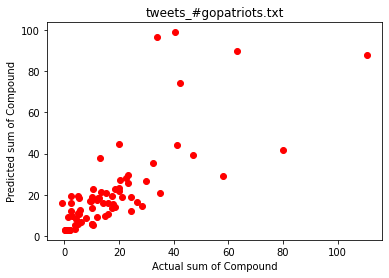

In [ ]:
sid = SentimentIntensityAnalyzer()

tweetfile = 'tweets_#gopatriots.txt'
file = []

with open(tweetfile,encoding="utf8") as f:
    for line in f:
        file.append(line)

pst_tz = pytz.timezone('America/Los_Angeles')

date, time, num_tweets, num_follow, num_retweets, num_mentions, rank_score, num_hashtags = [], [], [], [], [], [], [], []
time_5 = []
pos, neu, neg, imp = [], [], [], []

for n,line in enumerate(file):
    tw = json.loads(line)
    timestamp = tw['citation_date']
    timestamp = str(datetime.datetime.fromtimestamp(int(timestamp), pst_tz))
    time_split = ''.join(timestamp[0:10].split('-'))
    date.append(int(time_split))
    time.append(int(timestamp[11:13]))
    title = tw['title']
    pos.append(sid.polarity_scores(title)['compound'])
    #neu.append(sid.polarity_scores(title)['neu'])
    #neg.append(sid.polarity_scores(title)['neg'])
    imp.append(tw['metrics']['impressions'])
    a,b,c,_ = timestamp.split(':')
    rounded = str(int((int(b)/5))*5).zfill(2)
    time_mins = timestamp[11:13] + rounded
    time_5.append(int(time_mins))
    num_tweets.append(1)
    num_follow.append(tw['author']['followers'])
    num_retweets.append(tw['metrics']['citations']['total'])
    num_mentions.append(len(tw['tweet']['entities']['user_mentions']))
    rank_score.append(tw['metrics']['ranking_score'])
    num_hashtags.append(tw['title'].count('#'))

sp = pd.DataFrame({'date':date,'time':time_5,'tweets':num_tweets,'followers':num_follow,'retweets':num_retweets,'imp':imp,'pos':pos},
                  columns=['date','time','tweets', 'followers', 'retweets','imp','pos'])

sp = sp.groupby(['date', 'time']).agg({'time' : np.max, 'tweets' : np.sum,  'followers' : np.sum, 'retweets' : np.sum,'imp':np.sum,'pos':np.sum})
sp = sp.query('date == 20150201 and (time >= 1500 and time <= 2100)')

X_test = sp.loc[:,'tweets':'imp'].values
X_test = ss.transform(X_test)
y_test = sp['pos'].values
y_pred = clf.best_estimator_.predict(X_test)
print("Test MSE for %s using Neural Network: %.6f" % (tweetfile, mean_squared_error(y_test,y_pred)))

plt.figure()
plt.tight_layout()
plt.plot(y_test,y_pred,'ro')
plt.xlabel('Actual sum of Compound');plt.ylabel('Predicted sum of Compound'); plt.title(tweetfile)
plt.show()

Test MSE for tweets_#gohawks.txt using Neural Network: 1143.255968


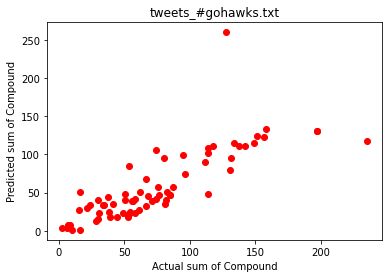

In [ ]:
sid = SentimentIntensityAnalyzer()

tweetfile = 'tweets_#gohawks.txt'

file = []

with open(tweetfile,encoding="utf8") as f:
    for line in f:
        file.append(line)

pst_tz = pytz.timezone('America/Los_Angeles')

date, time, num_tweets, num_follow, num_retweets, num_mentions, rank_score, num_hashtags = [], [], [], [], [], [], [], []
time_5 = []
pos, neu, neg, imp = [], [], [], []

for n,line in enumerate(file):
    tw = json.loads(line)
    timestamp = tw['citation_date']
    timestamp = str(datetime.datetime.fromtimestamp(int(timestamp), pst_tz))
    time_split = ''.join(timestamp[0:10].split('-'))
    date.append(int(time_split))
    time.append(int(timestamp[11:13]))
    title = tw['title']
    pos.append(sid.polarity_scores(title)['compound'])
    #neu.append(sid.polarity_scores(title)['neu'])
    #neg.append(sid.polarity_scores(title)['neg'])
    imp.append(tw['metrics']['impressions'])
    a,b,c,_ = timestamp.split(':')
    rounded = str(int((int(b)/5))*5).zfill(2)
    time_mins = timestamp[11:13] + rounded
    time_5.append(int(time_mins))
    num_tweets.append(1)
    num_follow.append(tw['author']['followers'])
    num_retweets.append(tw['metrics']['citations']['total'])
    num_mentions.append(len(tw['tweet']['entities']['user_mentions']))
    rank_score.append(tw['metrics']['ranking_score'])
    num_hashtags.append(tw['title'].count('#'))

sp = pd.DataFrame({'date':date,'time':time_5,'tweets':num_tweets,'followers':num_follow,'retweets':num_retweets,'imp':imp,'pos':pos},
                  columns=['date','time','tweets', 'followers', 'retweets','imp','pos'])

sp = sp.groupby(['date', 'time']).agg({'time' : np.max, 'tweets' : np.sum,  'followers' : np.sum, 'retweets' : np.sum,'imp':np.sum,'pos':np.sum})
sp = sp.query('date == 20150201 and (time >= 1500 and time <= 2100)')

X_test = sp.loc[:,'tweets':'imp'].values
X_test = ss.transform(X_test)
y_test = sp['pos'].values
y_pred = clf.best_estimator_.predict(X_test)
print("Test MSE for %s using Neural Network: %.6f" % (tweetfile, mean_squared_error(y_test,y_pred)))

plt.figure()
plt.tight_layout()
plt.plot(y_test,y_pred,'ro')
plt.xlabel('Actual sum of Compound');plt.ylabel('Predicted sum of Compound'); plt.title(tweetfile)
plt.show()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


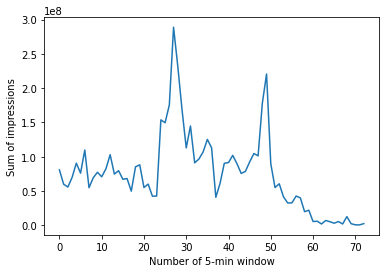

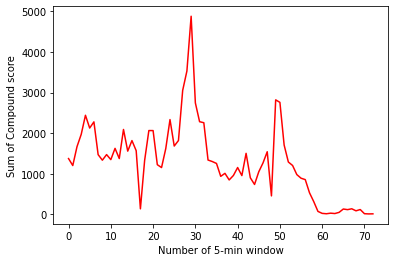

In [ ]:
import nltk
nltk.downloader.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import mean_squared_error
import pandas as pd
import random
import numpy as np
import re, json, datetime, pytz
import matplotlib.pyplot as plt
from sklearn.feature_extraction import text
from nltk.stem.porter import PorterStemmer
from textblob import TextBlob
from sklearn.ensemble import RandomForestClassifier
import nltk
import cv2
import datetime
import pytz


sid = SentimentIntensityAnalyzer()

tweetfile = 'tweets_#superbowl.txt'

file = []
with open(tweetfile,encoding="utf8") as f:
    for line in f:
        file.append(line)

pst_tz = pytz.timezone('America/Los_Angeles')

date, time, num_tweets, num_follow, num_retweets, num_mentions, rank_score, num_hashtags = [], [], [], [], [], [], [], []
time_5 = []
pos, neu, neg, imp = [], [], [], []

for n,line in enumerate(file):
    tw = json.loads(line)
    timestamp = tw['citation_date']
    timestamp = str(datetime.datetime.fromtimestamp(int(timestamp), pst_tz))
    time_split = ''.join(timestamp[0:10].split('-'))
    date.append(int(time_split))
    time.append(int(timestamp[11:13]))
    title = tw['title']
    pos.append(sid.polarity_scores(title)['compound'])
    #neu.append(sid.polarity_scores(title)['neu'])
    #neg.append(sid.polarity_scores(title)['neg'])
    imp.append(tw['metrics']['impressions'])
    a,b,c,_ = timestamp.split(':')
    rounded = str(int((int(b)/5))*5).zfill(2)
    time_mins = timestamp[11:13] + rounded
    time_5.append(int(time_mins))
    num_tweets.append(1)
    num_follow.append(tw['author']['followers'])
    num_retweets.append(tw['metrics']['citations']['total'])
    num_mentions.append(len(tw['tweet']['entities']['user_mentions']))
    rank_score.append(tw['metrics']['ranking_score'])
    num_hashtags.append(tw['title'].count('#'))

sp = pd.DataFrame({'date':date,'time':time_5,'tweets':num_tweets,'followers':num_follow,'retweets':num_retweets,'imp':imp,'pos':pos},
                  columns=['date','time','tweets', 'followers', 'retweets','imp','pos'])

sp = sp.groupby(['date', 'time']).agg({'time' : np.max, 'tweets' : np.sum, 'followers' : np.sum, 'retweets' : np.sum,'imp':np.sum,'pos':np.sum})
t2 = sp.query('date == 20150201 and (time >= 1500 and time <= 2100)')

plt.figure()
plt.plot(t2['imp'].values)
plt.xlabel('Number of 5-min window');plt.ylabel('Sum of impressions'); 
plt.show()
plt.figure()
plt.plot(t2['pos'].values,'r')
plt.xlabel('Number of 5-min window');plt.ylabel('Sum of Compound score'); 
plt.show()

In [ ]:
def clean(title):
    title = nltk.word_tokenize(title)
    title = [i.lower() for i in title if i not in stopwords.words('english')]
    for n,i in enumerate(title):
        try:            
            if i == '#':
                title[n] = ""
                title[n+1] = ""
            elif i == 'https':
                title[n] = ""
                title[n+1] = ""
                title[n+2] = ""
        except IndexError:
            title[n] = ""
    title = " ".join(title)
    return title


sid = SentimentIntensityAnalyzer()
tweetfile = 'tweets_#superbowl.txt'

file = []
with open(tweetfile,encoding="utf8") as f:
    for line in f:
        file.append(line)

pst_tz = pytz.timezone('America/Los_Angeles')

date, time, num_tweets, num_follow, num_retweets, num_mentions, rank_score, num_hashtags = [], [], [], [], [], [], [], []
time_5 = []
pos, neu, neg, imp = [], [], [], []

for n,line in enumerate(file):
    tw = json.loads(line)
    timestamp = tw['citation_date']
    timestamp = str(datetime.datetime.fromtimestamp(int(timestamp), pst_tz))
    time_split = ''.join(timestamp[0:10].split('-'))
    date.append(int(time_split))
    time.append(int(timestamp[11:13]))
    title = tw['title']
    pos.append(sid.polarity_scores(title)['compound'])
    #neu.append(sid.polarity_scores(title)['neu'])
    #neg.append(sid.polarity_scores(title)['neg'])
    imp.append(tw['metrics']['impressions'])
    a,b,c,_ = timestamp.split(':')
    rounded = str(int((int(b)/5))*5).zfill(2)
    time_mins = timestamp[11:13] + rounded
    time_5.append(int(time_mins))
    num_tweets.append(1)
    num_follow.append(tw['author']['followers'])
    num_retweets.append(tw['metrics']['citations']['total'])
    num_mentions.append(len(tw['tweet']['entities']['user_mentions']))
    rank_score.append(tw['metrics']['ranking_score'])
    num_hashtags.append(tw['title'].count('#'))

sp = pd.DataFrame({'date':date,'time':time_5,'tweets':num_tweets,'followers':num_follow,'retweets':num_retweets,'imp':imp,'pos':pos},
                  columns=['date','time','tweets', 'followers', 'retweets','imp','pos'])
sp = sp.groupby(['date', 'time']).agg({'time' : np.max, 'tweets' : np.sum,  'followers' : np.sum, 'retweets' : np.sum,'imp':np.sum,'pos':np.sum})
t2 = sp.query('date == 20150201 and (time >= 1500 and time <= 2100)')
X = t2.loc[:,'tweets':'imp'].values

ss = StandardScaler()
X = ss.fit_transform(X)
y = t2['pos'].values

param = {'hidden_layer_sizes':[(100,), (200,200,), (300,300,300,), (400,400,400,400,),
                               (500,500,500,500,500,), (600,600,600,600,600,600,),
                               (700,700,700,700,700,700,700,), (800,800,800,800,800,800,800,800,),
                               (900,900,900,900,900,900,900,900,900,)],
    'alpha': [10.0 ** x for x in np.arange(-2, 2)],
    'activation': ['logistic', 'tanh', 'relu'] }

nn = MLPRegressor()
clf2 = GridSearchCV(nn, param, cv=KFold(n_splits=10, shuffle=True), verbose = 3, scoring = 'neg_root_mean_squared_error', return_train_score = True).fit(X,y)
#clf = GridSearchCV(nn, param, cv = 10, verbose = 3, scoring = 'neg_root_mean_squared_error', return_train_score = True).fit(X,y)
print("Best estimator for Neural Network: \n", clf2.best_estimator_)
print("Best estimator for Neural Network: \n", clf2.best_estimator_)
print("Best score for Neural Network: ", -1*clf2.best_score_)
print("Best parameters for Neural Network: ", clf2.best_params_)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits
[CV 1/10] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100,);, score=(train=-1607.398, test=-1386.313) total time=   0.1s
[CV 2/10] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100,);, score=(train=-1479.717, test=-2262.719) total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 3/10] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100,);, score=(train=-1639.438, test=-1027.425) total time=   0.1s
[CV 4/10] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100,);, score=(train=-1613.028, test=-1294.505) total time=   0.1s
[CV 5/10] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100,);, score=(train=-1566.238, test=-1759.001) total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 6/10] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100,);, score=(train=-1515.441, test=-2122.594) total time=   0.1s
[CV 7/10] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100,);, score=(train=-1574.431, test=-1684.525) total time=   0.1s
[CV 8/10] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100,);, score=(train=-1597.247, test=-1455.545) total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 9/10] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100,);, score=(train=-1629.088, test=-1087.969) total time=   0.1s
[CV 10/10] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100,);, score=(train=-1617.629, test=-1232.830) total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 1/10] END activation=logistic, alpha=0.01, hidden_layer_sizes=(200, 200);, score=(train=-1589.883, test=-1371.082) total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 2/10] END activation=logistic, alpha=0.01, hidden_layer_sizes=(200, 200);, score=(train=-1460.520, test=-2246.513) total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 3/10] END activation=logistic, alpha=0.01, hidden_layer_sizes=(200, 200);, score=(train=-1621.888, test=-1009.939) total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 4/10] END activation=logistic, alpha=0.01, hidden_layer_sizes=(200, 200);, score=(train=-1596.857, test=-1279.059) total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 5/10] END activation=logistic, alpha=0.01, hidden_layer_sizes=(200, 200);, score=(train=-1545.876, test=-1735.739) total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 6/10] END activation=logistic, alpha=0.01, hidden_layer_sizes=(200, 200);, score=(train=-1499.858, test=-2105.315) total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 7/10] END activation=logistic, alpha=0.01, hidden_layer_sizes=(200, 200);, score=(train=-1557.222, test=-1663.277) total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 8/10] END activation=logistic, alpha=0.01, hidden_layer_sizes=(200, 200);, score=(train=-1582.107, test=-1439.576) total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 9/10] END activation=logistic, alpha=0.01, hidden_layer_sizes=(200, 200);, score=(train=-1610.282, test=-1070.673) total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 10/10] END activation=logistic, alpha=0.01, hidden_layer_sizes=(200, 200);, score=(train=-1599.763, test=-1210.138) total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 1/10] END activation=logistic, alpha=0.01, hidden_layer_sizes=(300, 300, 300);, score=(train=-1584.193, test=-1365.885) total time=   1.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 2/10] END activation=logistic, alpha=0.01, hidden_layer_sizes=(300, 300, 300);, score=(train=-1454.662, test=-2241.105) total time=   1.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 3/10] END activation=logistic, alpha=0.01, hidden_layer_sizes=(300, 300, 300);, score=(train=-1616.075, test=-1004.740) total time=   1.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 4/10] END activation=logistic, alpha=0.01, hidden_layer_sizes=(300, 300, 300);, score=(train=-1587.533, test=-1270.395) total time=   1.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 5/10] END activation=logistic, alpha=0.01, hidden_layer_sizes=(300, 300, 300);, score=(train=-1540.359, test=-1729.477) total time=   1.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 6/10] END activation=logistic, alpha=0.01, hidden_layer_sizes=(300, 300, 300);, score=(train=-1491.518, test=-2095.610) total time=   1.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 7/10] END activation=logistic, alpha=0.01, hidden_layer_sizes=(300, 300, 300);, score=(train=-1550.721, test=-1655.435) total time=   1.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 8/10] END activation=logistic, alpha=0.01, hidden_layer_sizes=(300, 300, 300);, score=(train=-1572.257, test=-1429.017) total time=   1.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 9/10] END activation=logistic, alpha=0.01, hidden_layer_sizes=(300, 300, 300);, score=(train=-1603.028, test=-1064.377) total time=   1.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 10/10] END activation=logistic, alpha=0.01, hidden_layer_sizes=(300, 300, 300);, score=(train=-1591.692, test=-1200.514) total time=   1.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 1/10] END activation=logistic, alpha=0.01, hidden_layer_sizes=(400, 400, 400, 400);, score=(train=-1572.256, test=-1354.994) total time=   3.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 2/10] END activation=logistic, alpha=0.01, hidden_layer_sizes=(400, 400, 400, 400);, score=(train=-1443.304, test=-2230.590) total time=   3.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 3/10] END activation=logistic, alpha=0.01, hidden_layer_sizes=(400, 400, 400, 400);, score=(train=-1605.602, test=-995.441) total time=   3.4s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 4/10] END activation=logistic, alpha=0.01, hidden_layer_sizes=(400, 400, 400, 400);, score=(train=-1580.135, test=-1263.534) total time=   3.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 5/10] END activation=logistic, alpha=0.01, hidden_layer_sizes=(400, 400, 400, 400);, score=(train=-1530.838, test=-1718.653) total time=   3.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 6/10] END activation=logistic, alpha=0.01, hidden_layer_sizes=(400, 400, 400, 400);, score=(train=-1483.487, test=-2086.232) total time=   3.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 7/10] END activation=logistic, alpha=0.01, hidden_layer_sizes=(400, 400, 400, 400);, score=(train=-1541.248, test=-1643.984) total time=   3.8s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 8/10] END activation=logistic, alpha=0.01, hidden_layer_sizes=(400, 400, 400, 400);, score=(train=-1560.440, test=-1416.338) total time=   3.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 9/10] END activation=logistic, alpha=0.01, hidden_layer_sizes=(400, 400, 400, 400);, score=(train=-1597.401, test=-1059.517) total time=   3.8s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 10/10] END activation=logistic, alpha=0.01, hidden_layer_sizes=(400, 400, 400, 400);, score=(train=-1585.792, test=-1193.476) total time=   3.8s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 1/10] END activation=logistic, alpha=0.01, hidden_layer_sizes=(500, 500, 500, 500, 500);, score=(train=-1568.678, test=-1351.735) total time=  10.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 2/10] END activation=logistic, alpha=0.01, hidden_layer_sizes=(500, 500, 500, 500, 500);, score=(train=-1433.891, test=-2221.873) total time=  10.8s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 3/10] END activation=logistic, alpha=0.01, hidden_layer_sizes=(500, 500, 500, 500, 500);, score=(train=-1595.439, test=-986.466) total time=  10.3s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 4/10] END activation=logistic, alpha=0.01, hidden_layer_sizes=(500, 500, 500, 500, 500);, score=(train=-1562.461, test=-1247.196) total time=   9.4s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 5/10] END activation=logistic, alpha=0.01, hidden_layer_sizes=(500, 500, 500, 500, 500);, score=(train=-1522.871, test=-1709.576) total time=   9.4s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 6/10] END activation=logistic, alpha=0.01, hidden_layer_sizes=(500, 500, 500, 500, 500);, score=(train=-1472.553, test=-2073.427) total time=   9.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 7/10] END activation=logistic, alpha=0.01, hidden_layer_sizes=(500, 500, 500, 500, 500);, score=(train=-1531.378, test=-1632.015) total time=   9.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 8/10] END activation=logistic, alpha=0.01, hidden_layer_sizes=(500, 500, 500, 500, 500);, score=(train=-1554.636, test=-1410.107) total time=   9.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 9/10] END activation=logistic, alpha=0.01, hidden_layer_sizes=(500, 500, 500, 500, 500);, score=(train=-1582.888, test=-1047.049) total time=   9.4s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 10/10] END activation=logistic, alpha=0.01, hidden_layer_sizes=(500, 500, 500, 500, 500);, score=(train=-1574.755, test=-1180.284) total time=   9.4s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 1/10] END activation=logistic, alpha=0.01, hidden_layer_sizes=(600, 600, 600, 600, 600, 600);, score=(train=-1555.316, test=-1339.588) total time=  15.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 2/10] END activation=logistic, alpha=0.01, hidden_layer_sizes=(600, 600, 600, 600, 600, 600);, score=(train=-1426.212, test=-2214.759) total time=  15.8s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 3/10] END activation=logistic, alpha=0.01, hidden_layer_sizes=(600, 600, 600, 600, 600, 600);, score=(train=-1590.813, test=-982.396) total time=  15.8s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 4/10] END activation=logistic, alpha=0.01, hidden_layer_sizes=(600, 600, 600, 600, 600, 600);, score=(train=-1564.584, test=-1249.155) total time=  22.8s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 5/10] END activation=logistic, alpha=0.01, hidden_layer_sizes=(600, 600, 600, 600, 600, 600);, score=(train=-1515.152, test=-1700.764) total time=  16.0s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 6/10] END activation=logistic, alpha=0.01, hidden_layer_sizes=(600, 600, 600, 600, 600, 600);, score=(train=-1468.425, test=-2068.582) total time=  15.9s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 7/10] END activation=logistic, alpha=0.01, hidden_layer_sizes=(600, 600, 600, 600, 600, 600);, score=(train=-1523.109, test=-1621.957) total time=  15.9s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 8/10] END activation=logistic, alpha=0.01, hidden_layer_sizes=(600, 600, 600, 600, 600, 600);, score=(train=-1545.885, test=-1400.704) total time=  17.2s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 9/10] END activation=logistic, alpha=0.01, hidden_layer_sizes=(600, 600, 600, 600, 600, 600);, score=(train=-1574.968, test=-1040.288) total time=  16.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 10/10] END activation=logistic, alpha=0.01, hidden_layer_sizes=(600, 600, 600, 600, 600, 600);, score=(train=-1564.912, test=-1168.487) total time=  16.0s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 1/10] END activation=logistic, alpha=0.01, hidden_layer_sizes=(700, 700, 700, 700, 700, 700, 700);, score=(train=-1548.146, test=-1333.087) total time=  23.0s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 2/10] END activation=logistic, alpha=0.01, hidden_layer_sizes=(700, 700, 700, 700, 700, 700, 700);, score=(train=-1416.935, test=-2206.163) total time=  22.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 3/10] END activation=logistic, alpha=0.01, hidden_layer_sizes=(700, 700, 700, 700, 700, 700, 700);, score=(train=-1576.299, test=-969.697) total time=  22.2s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 4/10] END activation=logistic, alpha=0.01, hidden_layer_sizes=(700, 700, 700, 700, 700, 700, 700);, score=(train=-1550.604, test=-1236.277) total time=  22.4s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 5/10] END activation=logistic, alpha=0.01, hidden_layer_sizes=(700, 700, 700, 700, 700, 700, 700);, score=(train=-1506.729, test=-1691.130) total time=  22.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 6/10] END activation=logistic, alpha=0.01, hidden_layer_sizes=(700, 700, 700, 700, 700, 700, 700);, score=(train=-1456.956, test=-2055.082) total time=  22.3s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 7/10] END activation=logistic, alpha=0.01, hidden_layer_sizes=(700, 700, 700, 700, 700, 700, 700);, score=(train=-1514.510, test=-1611.468) total time=  22.3s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 8/10] END activation=logistic, alpha=0.01, hidden_layer_sizes=(700, 700, 700, 700, 700, 700, 700);, score=(train=-1541.525, test=-1396.016) total time=  22.2s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 9/10] END activation=logistic, alpha=0.01, hidden_layer_sizes=(700, 700, 700, 700, 700, 700, 700);, score=(train=-1565.824, test=-1032.520) total time=  22.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 10/10] END activation=logistic, alpha=0.01, hidden_layer_sizes=(700, 700, 700, 700, 700, 700, 700);, score=(train=-1556.859, test=-1158.811) total time=  22.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 1/10] END activation=logistic, alpha=0.01, hidden_layer_sizes=(800, 800, 800, 800, 800, 800, 800, 800);, score=(train=-1537.226, test=-1323.208) total time=  31.8s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 2/10] END activation=logistic, alpha=0.01, hidden_layer_sizes=(800, 800, 800, 800, 800, 800, 800, 800);, score=(train=-1410.515, test=-2200.211) total time=  31.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 3/10] END activation=logistic, alpha=0.01, hidden_layer_sizes=(800, 800, 800, 800, 800, 800, 800, 800);, score=(train=-1572.831, test=-966.677) total time=  31.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 4/10] END activation=logistic, alpha=0.01, hidden_layer_sizes=(800, 800, 800, 800, 800, 800, 800, 800);, score=(train=-1547.756, test=-1233.659) total time=  31.2s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 5/10] END activation=logistic, alpha=0.01, hidden_layer_sizes=(800, 800, 800, 800, 800, 800, 800, 800);, score=(train=-1493.692, test=-1676.177) total time=  31.2s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 6/10] END activation=logistic, alpha=0.01, hidden_layer_sizes=(800, 800, 800, 800, 800, 800, 800, 800);, score=(train=-1448.426, test=-2045.008) total time=  31.2s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 7/10] END activation=logistic, alpha=0.01, hidden_layer_sizes=(800, 800, 800, 800, 800, 800, 800, 800);, score=(train=-1504.523, test=-1599.245) total time=  30.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 8/10] END activation=logistic, alpha=0.01, hidden_layer_sizes=(800, 800, 800, 800, 800, 800, 800, 800);, score=(train=-1527.682, test=-1381.120) total time=  30.8s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 9/10] END activation=logistic, alpha=0.01, hidden_layer_sizes=(800, 800, 800, 800, 800, 800, 800, 800);, score=(train=-1555.296, test=-1023.629) total time=  30.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 10/10] END activation=logistic, alpha=0.01, hidden_layer_sizes=(800, 800, 800, 800, 800, 800, 800, 800);, score=(train=-1549.245, test=-1149.645) total time=  30.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 1/10] END activation=logistic, alpha=0.01, hidden_layer_sizes=(900, 900, 900, 900, 900, 900, 900, 900, 900);, score=(train=-1529.644, test=-1316.366) total time=  42.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 2/10] END activation=logistic, alpha=0.01, hidden_layer_sizes=(900, 900, 900, 900, 900, 900, 900, 900, 900);, score=(train=-1402.368, test=-2192.656) total time=  42.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 3/10] END activation=logistic, alpha=0.01, hidden_layer_sizes=(900, 900, 900, 900, 900, 900, 900, 900, 900);, score=(train=-1561.682, test=-957.016) total time=  42.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 4/10] END activation=logistic, alpha=0.01, hidden_layer_sizes=(900, 900, 900, 900, 900, 900, 900, 900, 900);, score=(train=-1530.944, test=-1218.249) total time=  43.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 5/10] END activation=logistic, alpha=0.01, hidden_layer_sizes=(900, 900, 900, 900, 900, 900, 900, 900, 900);, score=(train=-1491.983, test=-1674.212) total time=  42.3s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 6/10] END activation=logistic, alpha=0.01, hidden_layer_sizes=(900, 900, 900, 900, 900, 900, 900, 900, 900);, score=(train=-1444.411, test=-2040.256) total time=  41.3s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 7/10] END activation=logistic, alpha=0.01, hidden_layer_sizes=(900, 900, 900, 900, 900, 900, 900, 900, 900);, score=(train=-1498.586, test=-1591.957) total time=  41.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 8/10] END activation=logistic, alpha=0.01, hidden_layer_sizes=(900, 900, 900, 900, 900, 900, 900, 900, 900);, score=(train=-1520.896, test=-1373.811) total time=  41.0s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 9/10] END activation=logistic, alpha=0.01, hidden_layer_sizes=(900, 900, 900, 900, 900, 900, 900, 900, 900);, score=(train=-1552.263, test=-1021.078) total time=  40.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 10/10] END activation=logistic, alpha=0.01, hidden_layer_sizes=(900, 900, 900, 900, 900, 900, 900, 900, 900);, score=(train=-1539.836, test=-1138.289) total time=  40.6s
[CV 1/10] END activation=logistic, alpha=0.1, hidden_layer_sizes=(100,);, score=(train=-1607.303, test=-1386.229) total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 2/10] END activation=logistic, alpha=0.1, hidden_layer_sizes=(100,);, score=(train=-1480.133, test=-2263.102) total time=   0.1s
[CV 3/10] END activation=logistic, alpha=0.1, hidden_layer_sizes=(100,);, score=(train=-1640.082, test=-1027.820) total time=   0.1s
[CV 4/10] END activation=logistic, alpha=0.1, hidden_layer_sizes=(100,);, score=(train=-1612.496, test=-1294.014) total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 5/10] END activation=logistic, alpha=0.1, hidden_layer_sizes=(100,);, score=(train=-1564.774, test=-1757.393) total time=   0.1s
[CV 6/10] END activation=logistic, alpha=0.1, hidden_layer_sizes=(100,);, score=(train=-1516.163, test=-2123.527) total time=   0.1s
[CV 7/10] END activation=logistic, alpha=0.1, hidden_layer_sizes=(100,);, score=(train=-1574.442, test=-1684.527) total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 8/10] END activation=logistic, alpha=0.1, hidden_layer_sizes=(100,);, score=(train=-1597.038, test=-1455.307) total time=   0.1s
[CV 9/10] END activation=logistic, alpha=0.1, hidden_layer_sizes=(100,);, score=(train=-1628.491, test=-1087.448) total time=   0.1s
[CV 10/10] END activation=logistic, alpha=0.1, hidden_layer_sizes=(100,);, score=(train=-1617.673, test=-1232.839) total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 1/10] END activation=logistic, alpha=0.1, hidden_layer_sizes=(200, 200);, score=(train=-1587.292, test=-1368.711) total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 2/10] END activation=logistic, alpha=0.1, hidden_layer_sizes=(200, 200);, score=(train=-1460.830, test=-2246.798) total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 3/10] END activation=logistic, alpha=0.1, hidden_layer_sizes=(200, 200);, score=(train=-1620.677, test=-1008.858) total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 4/10] END activation=logistic, alpha=0.1, hidden_layer_sizes=(200, 200);, score=(train=-1593.988, test=-1276.391) total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 5/10] END activation=logistic, alpha=0.1, hidden_layer_sizes=(200, 200);, score=(train=-1547.805, test=-1737.926) total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 6/10] END activation=logistic, alpha=0.1, hidden_layer_sizes=(200, 200);, score=(train=-1498.045, test=-2103.206) total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 7/10] END activation=logistic, alpha=0.1, hidden_layer_sizes=(200, 200);, score=(train=-1557.135, test=-1663.171) total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 8/10] END activation=logistic, alpha=0.1, hidden_layer_sizes=(200, 200);, score=(train=-1578.412, test=-1435.616) total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 9/10] END activation=logistic, alpha=0.1, hidden_layer_sizes=(200, 200);, score=(train=-1611.896, test=-1072.074) total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 10/10] END activation=logistic, alpha=0.1, hidden_layer_sizes=(200, 200);, score=(train=-1600.731, test=-1211.289) total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 1/10] END activation=logistic, alpha=0.1, hidden_layer_sizes=(300, 300, 300);, score=(train=-1583.500, test=-1365.252) total time=   1.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 2/10] END activation=logistic, alpha=0.1, hidden_layer_sizes=(300, 300, 300);, score=(train=-1454.143, test=-2240.624) total time=   1.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 3/10] END activation=logistic, alpha=0.1, hidden_layer_sizes=(300, 300, 300);, score=(train=-1613.862, test=-1002.771) total time=   1.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 4/10] END activation=logistic, alpha=0.1, hidden_layer_sizes=(300, 300, 300);, score=(train=-1586.260, test=-1269.214) total time=   1.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 5/10] END activation=logistic, alpha=0.1, hidden_layer_sizes=(300, 300, 300);, score=(train=-1540.172, test=-1729.265) total time=   1.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 6/10] END activation=logistic, alpha=0.1, hidden_layer_sizes=(300, 300, 300);, score=(train=-1493.591, test=-2098.026) total time=   1.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 7/10] END activation=logistic, alpha=0.1, hidden_layer_sizes=(300, 300, 300);, score=(train=-1550.117, test=-1654.706) total time=   1.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 8/10] END activation=logistic, alpha=0.1, hidden_layer_sizes=(300, 300, 300);, score=(train=-1572.021, test=-1428.764) total time=   1.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 9/10] END activation=logistic, alpha=0.1, hidden_layer_sizes=(300, 300, 300);, score=(train=-1603.559, test=-1064.837) total time=   1.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 10/10] END activation=logistic, alpha=0.1, hidden_layer_sizes=(300, 300, 300);, score=(train=-1593.322, test=-1202.457) total time=   1.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 1/10] END activation=logistic, alpha=0.1, hidden_layer_sizes=(400, 400, 400, 400);, score=(train=-1569.735, test=-1352.697) total time=   3.4s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 2/10] END activation=logistic, alpha=0.1, hidden_layer_sizes=(400, 400, 400, 400);, score=(train=-1443.730, test=-2230.984) total time=   3.3s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 3/10] END activation=logistic, alpha=0.1, hidden_layer_sizes=(400, 400, 400, 400);, score=(train=-1607.149, test=-996.812) total time=   3.4s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 4/10] END activation=logistic, alpha=0.1, hidden_layer_sizes=(400, 400, 400, 400);, score=(train=-1578.173, test=-1261.717) total time=   3.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 5/10] END activation=logistic, alpha=0.1, hidden_layer_sizes=(400, 400, 400, 400);, score=(train=-1532.217, test=-1720.222) total time=   3.4s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 6/10] END activation=logistic, alpha=0.1, hidden_layer_sizes=(400, 400, 400, 400);, score=(train=-1484.062, test=-2086.904) total time=   3.4s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 7/10] END activation=logistic, alpha=0.1, hidden_layer_sizes=(400, 400, 400, 400);, score=(train=-1538.194, test=-1640.285) total time=   3.4s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 8/10] END activation=logistic, alpha=0.1, hidden_layer_sizes=(400, 400, 400, 400);, score=(train=-1562.791, test=-1418.862) total time=   3.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 9/10] END activation=logistic, alpha=0.1, hidden_layer_sizes=(400, 400, 400, 400);, score=(train=-1597.279, test=-1059.412) total time=   3.4s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 10/10] END activation=logistic, alpha=0.1, hidden_layer_sizes=(400, 400, 400, 400);, score=(train=-1584.600, test=-1192.054) total time=   3.4s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 1/10] END activation=logistic, alpha=0.1, hidden_layer_sizes=(500, 500, 500, 500, 500);, score=(train=-1564.926, test=-1348.320) total time=   8.9s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 2/10] END activation=logistic, alpha=0.1, hidden_layer_sizes=(500, 500, 500, 500, 500);, score=(train=-1437.672, test=-2225.374) total time=   9.0s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 3/10] END activation=logistic, alpha=0.1, hidden_layer_sizes=(500, 500, 500, 500, 500);, score=(train=-1596.162, test=-987.103) total time=   8.9s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 4/10] END activation=logistic, alpha=0.1, hidden_layer_sizes=(500, 500, 500, 500, 500);, score=(train=-1567.881, test=-1252.199) total time=   9.8s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 5/10] END activation=logistic, alpha=0.1, hidden_layer_sizes=(500, 500, 500, 500, 500);, score=(train=-1519.499, test=-1705.728) total time=   9.8s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 6/10] END activation=logistic, alpha=0.1, hidden_layer_sizes=(500, 500, 500, 500, 500);, score=(train=-1474.618, test=-2075.850) total time=   9.8s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 7/10] END activation=logistic, alpha=0.1, hidden_layer_sizes=(500, 500, 500, 500, 500);, score=(train=-1532.598, test=-1633.497) total time=   9.8s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 8/10] END activation=logistic, alpha=0.1, hidden_layer_sizes=(500, 500, 500, 500, 500);, score=(train=-1554.468, test=-1409.926) total time=   9.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 9/10] END activation=logistic, alpha=0.1, hidden_layer_sizes=(500, 500, 500, 500, 500);, score=(train=-1585.618, test=-1049.387) total time=   9.9s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 10/10] END activation=logistic, alpha=0.1, hidden_layer_sizes=(500, 500, 500, 500, 500);, score=(train=-1577.409, test=-1183.460) total time=   9.9s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 1/10] END activation=logistic, alpha=0.1, hidden_layer_sizes=(600, 600, 600, 600, 600, 600);, score=(train=-1555.406, test=-1339.670) total time=  14.3s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 2/10] END activation=logistic, alpha=0.1, hidden_layer_sizes=(600, 600, 600, 600, 600, 600);, score=(train=-1427.404, test=-2215.864) total time=  14.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 3/10] END activation=logistic, alpha=0.1, hidden_layer_sizes=(600, 600, 600, 600, 600, 600);, score=(train=-1585.163, test=-977.440) total time=  14.2s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 4/10] END activation=logistic, alpha=0.1, hidden_layer_sizes=(600, 600, 600, 600, 600, 600);, score=(train=-1561.719, test=-1246.512) total time=  14.4s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 5/10] END activation=logistic, alpha=0.1, hidden_layer_sizes=(600, 600, 600, 600, 600, 600);, score=(train=-1514.735, test=-1700.288) total time=  14.4s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 6/10] END activation=logistic, alpha=0.1, hidden_layer_sizes=(600, 600, 600, 600, 600, 600);, score=(train=-1464.954, test=-2064.502) total time=  14.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 7/10] END activation=logistic, alpha=0.1, hidden_layer_sizes=(600, 600, 600, 600, 600, 600);, score=(train=-1526.154, test=-1625.664) total time=  14.4s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 8/10] END activation=logistic, alpha=0.1, hidden_layer_sizes=(600, 600, 600, 600, 600, 600);, score=(train=-1548.625, test=-1403.649) total time=  14.3s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 9/10] END activation=logistic, alpha=0.1, hidden_layer_sizes=(600, 600, 600, 600, 600, 600);, score=(train=-1578.771, test=-1043.531) total time=  14.4s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 10/10] END activation=logistic, alpha=0.1, hidden_layer_sizes=(600, 600, 600, 600, 600, 600);, score=(train=-1565.531, test=-1169.230) total time=  14.3s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 1/10] END activation=logistic, alpha=0.1, hidden_layer_sizes=(700, 700, 700, 700, 700, 700, 700);, score=(train=-1548.590, test=-1333.490) total time=  21.3s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 2/10] END activation=logistic, alpha=0.1, hidden_layer_sizes=(700, 700, 700, 700, 700, 700, 700);, score=(train=-1413.866, test=-2203.317) total time=  21.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 3/10] END activation=logistic, alpha=0.1, hidden_layer_sizes=(700, 700, 700, 700, 700, 700, 700);, score=(train=-1579.946, test=-972.878) total time=  21.0s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 4/10] END activation=logistic, alpha=0.1, hidden_layer_sizes=(700, 700, 700, 700, 700, 700, 700);, score=(train=-1556.148, test=-1241.378) total time=  21.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 5/10] END activation=logistic, alpha=0.1, hidden_layer_sizes=(700, 700, 700, 700, 700, 700, 700);, score=(train=-1505.971, test=-1690.261) total time=  21.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 6/10] END activation=logistic, alpha=0.1, hidden_layer_sizes=(700, 700, 700, 700, 700, 700, 700);, score=(train=-1456.582, test=-2054.641) total time=  21.3s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 7/10] END activation=logistic, alpha=0.1, hidden_layer_sizes=(700, 700, 700, 700, 700, 700, 700);, score=(train=-1515.840, test=-1613.092) total time=  21.3s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 8/10] END activation=logistic, alpha=0.1, hidden_layer_sizes=(700, 700, 700, 700, 700, 700, 700);, score=(train=-1537.952, test=-1392.173) total time=  21.4s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 9/10] END activation=logistic, alpha=0.1, hidden_layer_sizes=(700, 700, 700, 700, 700, 700, 700);, score=(train=-1567.108, test=-1033.608) total time=  21.3s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 10/10] END activation=logistic, alpha=0.1, hidden_layer_sizes=(700, 700, 700, 700, 700, 700, 700);, score=(train=-1556.231, test=-1158.056) total time=  21.3s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 1/10] END activation=logistic, alpha=0.1, hidden_layer_sizes=(800, 800, 800, 800, 800, 800, 800, 800);, score=(train=-1535.366, test=-1321.528) total time=  30.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 2/10] END activation=logistic, alpha=0.1, hidden_layer_sizes=(800, 800, 800, 800, 800, 800, 800, 800);, score=(train=-1408.225, test=-2198.088) total time=  31.0s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 3/10] END activation=logistic, alpha=0.1, hidden_layer_sizes=(800, 800, 800, 800, 800, 800, 800, 800);, score=(train=-1570.690, test=-964.817) total time=  30.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 4/10] END activation=logistic, alpha=0.1, hidden_layer_sizes=(800, 800, 800, 800, 800, 800, 800, 800);, score=(train=-1543.694, test=-1229.929) total time=  31.0s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 5/10] END activation=logistic, alpha=0.1, hidden_layer_sizes=(800, 800, 800, 800, 800, 800, 800, 800);, score=(train=-1495.798, test=-1678.595) total time=  30.8s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 6/10] END activation=logistic, alpha=0.1, hidden_layer_sizes=(800, 800, 800, 800, 800, 800, 800, 800);, score=(train=-1448.940, test=-2045.616) total time=  30.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 7/10] END activation=logistic, alpha=0.1, hidden_layer_sizes=(800, 800, 800, 800, 800, 800, 800, 800);, score=(train=-1505.683, test=-1600.667) total time=  30.9s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 8/10] END activation=logistic, alpha=0.1, hidden_layer_sizes=(800, 800, 800, 800, 800, 800, 800, 800);, score=(train=-1530.888, test=-1384.571) total time=  30.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 9/10] END activation=logistic, alpha=0.1, hidden_layer_sizes=(800, 800, 800, 800, 800, 800, 800, 800);, score=(train=-1562.909, test=-1030.053) total time=  30.9s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 10/10] END activation=logistic, alpha=0.1, hidden_layer_sizes=(800, 800, 800, 800, 800, 800, 800, 800);, score=(train=-1549.087, test=-1149.454) total time=  30.9s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 1/10] END activation=logistic, alpha=0.1, hidden_layer_sizes=(900, 900, 900, 900, 900, 900, 900, 900, 900);, score=(train=-1530.793, test=-1317.402) total time=  41.8s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 2/10] END activation=logistic, alpha=0.1, hidden_layer_sizes=(900, 900, 900, 900, 900, 900, 900, 900, 900);, score=(train=-1405.230, test=-2195.311) total time=  42.0s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 3/10] END activation=logistic, alpha=0.1, hidden_layer_sizes=(900, 900, 900, 900, 900, 900, 900, 900, 900);, score=(train=-1558.157, test=-953.975) total time=  42.4s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 4/10] END activation=logistic, alpha=0.1, hidden_layer_sizes=(900, 900, 900, 900, 900, 900, 900, 900, 900);, score=(train=-1532.800, test=-1219.947) total time=  42.2s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 5/10] END activation=logistic, alpha=0.1, hidden_layer_sizes=(900, 900, 900, 900, 900, 900, 900, 900, 900);, score=(train=-1487.209, test=-1668.720) total time=  41.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 6/10] END activation=logistic, alpha=0.1, hidden_layer_sizes=(900, 900, 900, 900, 900, 900, 900, 900, 900);, score=(train=-1439.862, test=-2034.863) total time=  40.2s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 7/10] END activation=logistic, alpha=0.1, hidden_layer_sizes=(900, 900, 900, 900, 900, 900, 900, 900, 900);, score=(train=-1497.486, test=-1590.605) total time=  38.9s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 8/10] END activation=logistic, alpha=0.1, hidden_layer_sizes=(900, 900, 900, 900, 900, 900, 900, 900, 900);, score=(train=-1517.114, test=-1369.735) total time=  38.9s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 9/10] END activation=logistic, alpha=0.1, hidden_layer_sizes=(900, 900, 900, 900, 900, 900, 900, 900, 900);, score=(train=-1553.326, test=-1021.971) total time=  39.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 10/10] END activation=logistic, alpha=0.1, hidden_layer_sizes=(900, 900, 900, 900, 900, 900, 900, 900, 900);, score=(train=-1540.738, test=-1139.379) total time=  39.1s
[CV 1/10] END activation=logistic, alpha=1.0, hidden_layer_sizes=(100,);, score=(train=-1607.077, test=-1386.010) total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 2/10] END activation=logistic, alpha=1.0, hidden_layer_sizes=(100,);, score=(train=-1479.828, test=-2262.799) total time=   0.1s
[CV 3/10] END activation=logistic, alpha=1.0, hidden_layer_sizes=(100,);, score=(train=-1640.583, test=-1028.263) total time=   0.1s
[CV 4/10] END activation=logistic, alpha=1.0, hidden_layer_sizes=(100,);, score=(train=-1612.031, test=-1293.621) total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 5/10] END activation=logistic, alpha=1.0, hidden_layer_sizes=(100,);, score=(train=-1563.922, test=-1756.458) total time=   0.1s
[CV 6/10] END activation=logistic, alpha=1.0, hidden_layer_sizes=(100,);, score=(train=-1516.127, test=-2123.461) total time=   0.1s
[CV 7/10] END activation=logistic, alpha=1.0, hidden_layer_sizes=(100,);, score=(train=-1572.733, test=-1682.644) total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 8/10] END activation=logistic, alpha=1.0, hidden_layer_sizes=(100,);, score=(train=-1597.280, test=-1455.582) total time=   0.1s
[CV 9/10] END activation=logistic, alpha=1.0, hidden_layer_sizes=(100,);, score=(train=-1628.870, test=-1087.776) total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 10/10] END activation=logistic, alpha=1.0, hidden_layer_sizes=(100,);, score=(train=-1617.285, test=-1232.512) total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 1/10] END activation=logistic, alpha=1.0, hidden_layer_sizes=(200, 200);, score=(train=-1587.998, test=-1369.356) total time=   0.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 2/10] END activation=logistic, alpha=1.0, hidden_layer_sizes=(200, 200);, score=(train=-1460.019, test=-2246.050) total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 3/10] END activation=logistic, alpha=1.0, hidden_layer_sizes=(200, 200);, score=(train=-1622.589, test=-1010.564) total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 4/10] END activation=logistic, alpha=1.0, hidden_layer_sizes=(200, 200);, score=(train=-1595.870, test=-1278.141) total time=   0.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 5/10] END activation=logistic, alpha=1.0, hidden_layer_sizes=(200, 200);, score=(train=-1549.283, test=-1739.601) total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 6/10] END activation=logistic, alpha=1.0, hidden_layer_sizes=(200, 200);, score=(train=-1497.570, test=-2102.655) total time=   0.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 7/10] END activation=logistic, alpha=1.0, hidden_layer_sizes=(200, 200);, score=(train=-1557.079, test=-1663.105) total time=   0.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 8/10] END activation=logistic, alpha=1.0, hidden_layer_sizes=(200, 200);, score=(train=-1581.880, test=-1439.333) total time=   0.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 9/10] END activation=logistic, alpha=1.0, hidden_layer_sizes=(200, 200);, score=(train=-1611.556, test=-1071.778) total time=   0.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 10/10] END activation=logistic, alpha=1.0, hidden_layer_sizes=(200, 200);, score=(train=-1599.608, test=-1209.955) total time=   0.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 1/10] END activation=logistic, alpha=1.0, hidden_layer_sizes=(300, 300, 300);, score=(train=-1583.430, test=-1365.189) total time=   1.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 2/10] END activation=logistic, alpha=1.0, hidden_layer_sizes=(300, 300, 300);, score=(train=-1453.715, test=-2240.227) total time=   1.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 3/10] END activation=logistic, alpha=1.0, hidden_layer_sizes=(300, 300, 300);, score=(train=-1615.076, test=-1003.851) total time=   1.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 4/10] END activation=logistic, alpha=1.0, hidden_layer_sizes=(300, 300, 300);, score=(train=-1590.871, test=-1273.494) total time=   1.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 5/10] END activation=logistic, alpha=1.0, hidden_layer_sizes=(300, 300, 300);, score=(train=-1541.355, test=-1730.608) total time=   1.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 6/10] END activation=logistic, alpha=1.0, hidden_layer_sizes=(300, 300, 300);, score=(train=-1490.788, test=-2094.758) total time=   1.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 7/10] END activation=logistic, alpha=1.0, hidden_layer_sizes=(300, 300, 300);, score=(train=-1551.249, test=-1656.073) total time=   1.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 8/10] END activation=logistic, alpha=1.0, hidden_layer_sizes=(300, 300, 300);, score=(train=-1572.914, test=-1429.722) total time=   1.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 9/10] END activation=logistic, alpha=1.0, hidden_layer_sizes=(300, 300, 300);, score=(train=-1599.100, test=-1060.983) total time=   1.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 10/10] END activation=logistic, alpha=1.0, hidden_layer_sizes=(300, 300, 300);, score=(train=-1590.634, test=-1199.253) total time=   1.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 1/10] END activation=logistic, alpha=1.0, hidden_layer_sizes=(400, 400, 400, 400);, score=(train=-1571.124, test=-1353.962) total time=   3.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 2/10] END activation=logistic, alpha=1.0, hidden_layer_sizes=(400, 400, 400, 400);, score=(train=-1445.852, test=-2232.949) total time=   3.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 3/10] END activation=logistic, alpha=1.0, hidden_layer_sizes=(400, 400, 400, 400);, score=(train=-1603.887, test=-993.923) total time=   3.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 4/10] END activation=logistic, alpha=1.0, hidden_layer_sizes=(400, 400, 400, 400);, score=(train=-1579.326, test=-1262.785) total time=   3.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 5/10] END activation=logistic, alpha=1.0, hidden_layer_sizes=(400, 400, 400, 400);, score=(train=-1532.029, test=-1720.007) total time=   3.8s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 6/10] END activation=logistic, alpha=1.0, hidden_layer_sizes=(400, 400, 400, 400);, score=(train=-1480.151, test=-2082.331) total time=   3.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 7/10] END activation=logistic, alpha=1.0, hidden_layer_sizes=(400, 400, 400, 400);, score=(train=-1543.524, test=-1646.739) total time=   3.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 8/10] END activation=logistic, alpha=1.0, hidden_layer_sizes=(400, 400, 400, 400);, score=(train=-1566.463, test=-1422.802) total time=   4.0s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 9/10] END activation=logistic, alpha=1.0, hidden_layer_sizes=(400, 400, 400, 400);, score=(train=-1596.018, test=-1058.325) total time=   3.9s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 10/10] END activation=logistic, alpha=1.0, hidden_layer_sizes=(400, 400, 400, 400);, score=(train=-1585.063, test=-1192.607) total time=   3.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 1/10] END activation=logistic, alpha=1.0, hidden_layer_sizes=(500, 500, 500, 500, 500);, score=(train=-1559.054, test=-1342.982) total time=   9.0s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 2/10] END activation=logistic, alpha=1.0, hidden_layer_sizes=(500, 500, 500, 500, 500);, score=(train=-1432.535, test=-2220.617) total time=   9.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 3/10] END activation=logistic, alpha=1.0, hidden_layer_sizes=(500, 500, 500, 500, 500);, score=(train=-1593.713, test=-984.946) total time=   9.4s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 4/10] END activation=logistic, alpha=1.0, hidden_layer_sizes=(500, 500, 500, 500, 500);, score=(train=-1568.199, test=-1252.493) total time=   9.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 5/10] END activation=logistic, alpha=1.0, hidden_layer_sizes=(500, 500, 500, 500, 500);, score=(train=-1519.437, test=-1705.657) total time=   9.2s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 6/10] END activation=logistic, alpha=1.0, hidden_layer_sizes=(500, 500, 500, 500, 500);, score=(train=-1473.788, test=-2074.877) total time=   8.8s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 7/10] END activation=logistic, alpha=1.0, hidden_layer_sizes=(500, 500, 500, 500, 500);, score=(train=-1533.510, test=-1634.604) total time=   8.9s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 8/10] END activation=logistic, alpha=1.0, hidden_layer_sizes=(500, 500, 500, 500, 500);, score=(train=-1554.560, test=-1410.024) total time=   9.0s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 9/10] END activation=logistic, alpha=1.0, hidden_layer_sizes=(500, 500, 500, 500, 500);, score=(train=-1586.044, test=-1049.753) total time=   8.9s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 10/10] END activation=logistic, alpha=1.0, hidden_layer_sizes=(500, 500, 500, 500, 500);, score=(train=-1574.975, test=-1180.547) total time=   9.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 1/10] END activation=logistic, alpha=1.0, hidden_layer_sizes=(600, 600, 600, 600, 600, 600);, score=(train=-1552.359, test=-1336.905) total time=  14.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 2/10] END activation=logistic, alpha=1.0, hidden_layer_sizes=(600, 600, 600, 600, 600, 600);, score=(train=-1428.101, test=-2216.510) total time=  14.2s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 3/10] END activation=logistic, alpha=1.0, hidden_layer_sizes=(600, 600, 600, 600, 600, 600);, score=(train=-1586.217, test=-978.364) total time=  14.4s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 4/10] END activation=logistic, alpha=1.0, hidden_layer_sizes=(600, 600, 600, 600, 600, 600);, score=(train=-1559.385, test=-1244.360) total time=  14.0s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 5/10] END activation=logistic, alpha=1.0, hidden_layer_sizes=(600, 600, 600, 600, 600, 600);, score=(train=-1513.825, test=-1699.247) total time=  13.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 6/10] END activation=logistic, alpha=1.0, hidden_layer_sizes=(600, 600, 600, 600, 600, 600);, score=(train=-1469.321, test=-2069.634) total time=  13.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 7/10] END activation=logistic, alpha=1.0, hidden_layer_sizes=(600, 600, 600, 600, 600, 600);, score=(train=-1523.188, test=-1622.054) total time=  13.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 8/10] END activation=logistic, alpha=1.0, hidden_layer_sizes=(600, 600, 600, 600, 600, 600);, score=(train=-1544.443, test=-1399.153) total time=  13.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 9/10] END activation=logistic, alpha=1.0, hidden_layer_sizes=(600, 600, 600, 600, 600, 600);, score=(train=-1574.130, test=-1039.574) total time=  13.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 10/10] END activation=logistic, alpha=1.0, hidden_layer_sizes=(600, 600, 600, 600, 600, 600);, score=(train=-1561.016, test=-1163.808) total time=  13.4s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 1/10] END activation=logistic, alpha=1.0, hidden_layer_sizes=(700, 700, 700, 700, 700, 700, 700);, score=(train=-1545.550, test=-1330.736) total time=  20.8s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 2/10] END activation=logistic, alpha=1.0, hidden_layer_sizes=(700, 700, 700, 700, 700, 700, 700);, score=(train=-1423.187, test=-2211.957) total time=  20.8s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 3/10] END activation=logistic, alpha=1.0, hidden_layer_sizes=(700, 700, 700, 700, 700, 700, 700);, score=(train=-1576.794, test=-970.128) total time=  20.8s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 4/10] END activation=logistic, alpha=1.0, hidden_layer_sizes=(700, 700, 700, 700, 700, 700, 700);, score=(train=-1556.302, test=-1241.520) total time=  21.0s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 5/10] END activation=logistic, alpha=1.0, hidden_layer_sizes=(700, 700, 700, 700, 700, 700, 700);, score=(train=-1504.752, test=-1688.865) total time=  21.2s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 6/10] END activation=logistic, alpha=1.0, hidden_layer_sizes=(700, 700, 700, 700, 700, 700, 700);, score=(train=-1454.073, test=-2051.681) total time=  21.2s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 7/10] END activation=logistic, alpha=1.0, hidden_layer_sizes=(700, 700, 700, 700, 700, 700, 700);, score=(train=-1516.413, test=-1613.792) total time=  21.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 8/10] END activation=logistic, alpha=1.0, hidden_layer_sizes=(700, 700, 700, 700, 700, 700, 700);, score=(train=-1534.289, test=-1388.232) total time=  21.3s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 9/10] END activation=logistic, alpha=1.0, hidden_layer_sizes=(700, 700, 700, 700, 700, 700, 700);, score=(train=-1568.880, test=-1035.112) total time=  21.3s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 10/10] END activation=logistic, alpha=1.0, hidden_layer_sizes=(700, 700, 700, 700, 700, 700, 700);, score=(train=-1556.770, test=-1158.704) total time=  21.3s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 1/10] END activation=logistic, alpha=1.0, hidden_layer_sizes=(800, 800, 800, 800, 800, 800, 800, 800);, score=(train=-1535.871, test=-1321.984) total time=  30.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 2/10] END activation=logistic, alpha=1.0, hidden_layer_sizes=(800, 800, 800, 800, 800, 800, 800, 800);, score=(train=-1407.317, test=-2197.246) total time=  30.3s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 3/10] END activation=logistic, alpha=1.0, hidden_layer_sizes=(800, 800, 800, 800, 800, 800, 800, 800);, score=(train=-1569.030, test=-963.376) total time=  30.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 4/10] END activation=logistic, alpha=1.0, hidden_layer_sizes=(800, 800, 800, 800, 800, 800, 800, 800);, score=(train=-1542.725, test=-1229.040) total time=  30.3s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 5/10] END activation=logistic, alpha=1.0, hidden_layer_sizes=(800, 800, 800, 800, 800, 800, 800, 800);, score=(train=-1500.796, test=-1684.331) total time=  30.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 6/10] END activation=logistic, alpha=1.0, hidden_layer_sizes=(800, 800, 800, 800, 800, 800, 800, 800);, score=(train=-1444.940, test=-2040.883) total time=  30.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 7/10] END activation=logistic, alpha=1.0, hidden_layer_sizes=(800, 800, 800, 800, 800, 800, 800, 800);, score=(train=-1502.721, test=-1597.035) total time=  30.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 8/10] END activation=logistic, alpha=1.0, hidden_layer_sizes=(800, 800, 800, 800, 800, 800, 800, 800);, score=(train=-1529.964, test=-1383.577) total time=  30.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 9/10] END activation=logistic, alpha=1.0, hidden_layer_sizes=(800, 800, 800, 800, 800, 800, 800, 800);, score=(train=-1557.758, test=-1025.703) total time=  30.4s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 10/10] END activation=logistic, alpha=1.0, hidden_layer_sizes=(800, 800, 800, 800, 800, 800, 800, 800);, score=(train=-1544.775, test=-1144.253) total time=  30.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 1/10] END activation=logistic, alpha=1.0, hidden_layer_sizes=(900, 900, 900, 900, 900, 900, 900, 900, 900);, score=(train=-1528.056, test=-1314.934) total time=  40.8s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 2/10] END activation=logistic, alpha=1.0, hidden_layer_sizes=(900, 900, 900, 900, 900, 900, 900, 900, 900);, score=(train=-1398.399, test=-2188.974) total time=  40.9s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 3/10] END activation=logistic, alpha=1.0, hidden_layer_sizes=(900, 900, 900, 900, 900, 900, 900, 900, 900);, score=(train=-1561.954, test=-957.250) total time=  40.9s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 4/10] END activation=logistic, alpha=1.0, hidden_layer_sizes=(900, 900, 900, 900, 900, 900, 900, 900, 900);, score=(train=-1533.339, test=-1220.440) total time=  40.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 5/10] END activation=logistic, alpha=1.0, hidden_layer_sizes=(900, 900, 900, 900, 900, 900, 900, 900, 900);, score=(train=-1489.420, test=-1671.265) total time=  39.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 6/10] END activation=logistic, alpha=1.0, hidden_layer_sizes=(900, 900, 900, 900, 900, 900, 900, 900, 900);, score=(train=-1434.671, test=-2028.700) total time=  38.9s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 7/10] END activation=logistic, alpha=1.0, hidden_layer_sizes=(900, 900, 900, 900, 900, 900, 900, 900, 900);, score=(train=-1493.566, test=-1585.783) total time=  38.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 8/10] END activation=logistic, alpha=1.0, hidden_layer_sizes=(900, 900, 900, 900, 900, 900, 900, 900, 900);, score=(train=-1520.633, test=-1373.527) total time=  38.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 9/10] END activation=logistic, alpha=1.0, hidden_layer_sizes=(900, 900, 900, 900, 900, 900, 900, 900, 900);, score=(train=-1553.810, test=-1022.379) total time=  38.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 10/10] END activation=logistic, alpha=1.0, hidden_layer_sizes=(900, 900, 900, 900, 900, 900, 900, 900, 900);, score=(train=-1544.647, test=-1144.099) total time=  38.5s
[CV 1/10] END activation=logistic, alpha=10.0, hidden_layer_sizes=(100,);, score=(train=-1606.809, test=-1385.741) total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 2/10] END activation=logistic, alpha=10.0, hidden_layer_sizes=(100,);, score=(train=-1478.441, test=-2261.245) total time=   0.1s
[CV 3/10] END activation=logistic, alpha=10.0, hidden_layer_sizes=(100,);, score=(train=-1639.878, test=-1027.726) total time=   0.1s
[CV 4/10] END activation=logistic, alpha=10.0, hidden_layer_sizes=(100,);, score=(train=-1612.159, test=-1293.737) total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 5/10] END activation=logistic, alpha=10.0, hidden_layer_sizes=(100,);, score=(train=-1564.870, test=-1757.490) total time=   0.1s
[CV 6/10] END activation=logistic, alpha=10.0, hidden_layer_sizes=(100,);, score=(train=-1516.164, test=-2123.521) total time=   0.1s
[CV 7/10] END activation=logistic, alpha=10.0, hidden_layer_sizes=(100,);, score=(train=-1573.141, test=-1683.080) total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 8/10] END activation=logistic, alpha=10.0, hidden_layer_sizes=(100,);, score=(train=-1598.166, test=-1456.536) total time=   0.1s
[CV 9/10] END activation=logistic, alpha=10.0, hidden_layer_sizes=(100,);, score=(train=-1627.917, test=-1087.068) total time=   0.1s
[CV 10/10] END activation=logistic, alpha=10.0, hidden_layer_sizes=(100,);, score=(train=-1617.213, test=-1232.423) total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 1/10] END activation=logistic, alpha=10.0, hidden_layer_sizes=(200, 200);, score=(train=-1590.782, test=-1371.904) total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 2/10] END activation=logistic, alpha=10.0, hidden_layer_sizes=(200, 200);, score=(train=-1461.179, test=-2247.125) total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 3/10] END activation=logistic, alpha=10.0, hidden_layer_sizes=(200, 200);, score=(train=-1623.794, test=-1011.641) total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 4/10] END activation=logistic, alpha=10.0, hidden_layer_sizes=(200, 200);, score=(train=-1595.107, test=-1277.432) total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 5/10] END activation=logistic, alpha=10.0, hidden_layer_sizes=(200, 200);, score=(train=-1547.880, test=-1738.011) total time=   0.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 6/10] END activation=logistic, alpha=10.0, hidden_layer_sizes=(200, 200);, score=(train=-1501.699, test=-2107.457) total time=   0.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 7/10] END activation=logistic, alpha=10.0, hidden_layer_sizes=(200, 200);, score=(train=-1557.403, test=-1663.495) total time=   0.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 8/10] END activation=logistic, alpha=10.0, hidden_layer_sizes=(200, 200);, score=(train=-1580.254, test=-1437.590) total time=   0.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 9/10] END activation=logistic, alpha=10.0, hidden_layer_sizes=(200, 200);, score=(train=-1611.585, test=-1071.805) total time=   0.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 10/10] END activation=logistic, alpha=10.0, hidden_layer_sizes=(200, 200);, score=(train=-1599.169, test=-1209.434) total time=   0.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 1/10] END activation=logistic, alpha=10.0, hidden_layer_sizes=(300, 300, 300);, score=(train=-1583.856, test=-1365.577) total time=   1.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 2/10] END activation=logistic, alpha=10.0, hidden_layer_sizes=(300, 300, 300);, score=(train=-1454.334, test=-2240.801) total time=   1.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 3/10] END activation=logistic, alpha=10.0, hidden_layer_sizes=(300, 300, 300);, score=(train=-1615.555, test=-1004.277) total time=   1.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 4/10] END activation=logistic, alpha=10.0, hidden_layer_sizes=(300, 300, 300);, score=(train=-1587.893, test=-1270.728) total time=   1.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 5/10] END activation=logistic, alpha=10.0, hidden_layer_sizes=(300, 300, 300);, score=(train=-1539.037, test=-1727.975) total time=   1.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 6/10] END activation=logistic, alpha=10.0, hidden_layer_sizes=(300, 300, 300);, score=(train=-1491.093, test=-2095.114) total time=   1.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 7/10] END activation=logistic, alpha=10.0, hidden_layer_sizes=(300, 300, 300);, score=(train=-1547.732, test=-1651.826) total time=   1.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 8/10] END activation=logistic, alpha=10.0, hidden_layer_sizes=(300, 300, 300);, score=(train=-1572.618, test=-1429.404) total time=   1.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 9/10] END activation=logistic, alpha=10.0, hidden_layer_sizes=(300, 300, 300);, score=(train=-1599.650, test=-1061.458) total time=   1.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 10/10] END activation=logistic, alpha=10.0, hidden_layer_sizes=(300, 300, 300);, score=(train=-1593.391, test=-1202.538) total time=   1.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 1/10] END activation=logistic, alpha=10.0, hidden_layer_sizes=(400, 400, 400, 400);, score=(train=-1572.874, test=-1355.556) total time=   3.4s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 2/10] END activation=logistic, alpha=10.0, hidden_layer_sizes=(400, 400, 400, 400);, score=(train=-1444.339, test=-2231.548) total time=   3.4s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 3/10] END activation=logistic, alpha=10.0, hidden_layer_sizes=(400, 400, 400, 400);, score=(train=-1602.827, test=-992.986) total time=   3.4s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 4/10] END activation=logistic, alpha=10.0, hidden_layer_sizes=(400, 400, 400, 400);, score=(train=-1577.887, test=-1261.452) total time=   3.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 5/10] END activation=logistic, alpha=10.0, hidden_layer_sizes=(400, 400, 400, 400);, score=(train=-1527.823, test=-1715.219) total time=   3.4s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 6/10] END activation=logistic, alpha=10.0, hidden_layer_sizes=(400, 400, 400, 400);, score=(train=-1481.570, test=-2083.991) total time=   3.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 7/10] END activation=logistic, alpha=10.0, hidden_layer_sizes=(400, 400, 400, 400);, score=(train=-1543.135, test=-1646.268) total time=   3.4s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 8/10] END activation=logistic, alpha=10.0, hidden_layer_sizes=(400, 400, 400, 400);, score=(train=-1563.399, test=-1419.514) total time=   3.4s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 9/10] END activation=logistic, alpha=10.0, hidden_layer_sizes=(400, 400, 400, 400);, score=(train=-1597.313, test=-1059.442) total time=   3.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 10/10] END activation=logistic, alpha=10.0, hidden_layer_sizes=(400, 400, 400, 400);, score=(train=-1581.449, test=-1188.290) total time=   3.4s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 1/10] END activation=logistic, alpha=10.0, hidden_layer_sizes=(500, 500, 500, 500, 500);, score=(train=-1563.754, test=-1347.254) total time=   8.4s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 2/10] END activation=logistic, alpha=10.0, hidden_layer_sizes=(500, 500, 500, 500, 500);, score=(train=-1436.644, test=-2224.422) total time=   8.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 3/10] END activation=logistic, alpha=10.0, hidden_layer_sizes=(500, 500, 500, 500, 500);, score=(train=-1598.054, test=-988.770) total time=   8.4s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 4/10] END activation=logistic, alpha=10.0, hidden_layer_sizes=(500, 500, 500, 500, 500);, score=(train=-1570.614, test=-1254.724) total time=   8.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 5/10] END activation=logistic, alpha=10.0, hidden_layer_sizes=(500, 500, 500, 500, 500);, score=(train=-1524.820, test=-1711.797) total time=   8.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 6/10] END activation=logistic, alpha=10.0, hidden_layer_sizes=(500, 500, 500, 500, 500);, score=(train=-1476.154, test=-2077.650) total time=   8.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 7/10] END activation=logistic, alpha=10.0, hidden_layer_sizes=(500, 500, 500, 500, 500);, score=(train=-1529.900, test=-1630.219) total time=   8.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 8/10] END activation=logistic, alpha=10.0, hidden_layer_sizes=(500, 500, 500, 500, 500);, score=(train=-1553.156, test=-1408.516) total time=   8.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 9/10] END activation=logistic, alpha=10.0, hidden_layer_sizes=(500, 500, 500, 500, 500);, score=(train=-1588.015, test=-1051.443) total time=   8.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 10/10] END activation=logistic, alpha=10.0, hidden_layer_sizes=(500, 500, 500, 500, 500);, score=(train=-1574.460, test=-1179.931) total time=   8.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 1/10] END activation=logistic, alpha=10.0, hidden_layer_sizes=(600, 600, 600, 600, 600, 600);, score=(train=-1554.914, test=-1339.223) total time=  13.2s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 2/10] END activation=logistic, alpha=10.0, hidden_layer_sizes=(600, 600, 600, 600, 600, 600);, score=(train=-1428.214, test=-2216.614) total time=  13.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 3/10] END activation=logistic, alpha=10.0, hidden_layer_sizes=(600, 600, 600, 600, 600, 600);, score=(train=-1588.149, test=-980.057) total time=  13.2s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 4/10] END activation=logistic, alpha=10.0, hidden_layer_sizes=(600, 600, 600, 600, 600, 600);, score=(train=-1558.297, test=-1243.357) total time=  13.4s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 5/10] END activation=logistic, alpha=10.0, hidden_layer_sizes=(600, 600, 600, 600, 600, 600);, score=(train=-1514.436, test=-1699.946) total time=  13.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 6/10] END activation=logistic, alpha=10.0, hidden_layer_sizes=(600, 600, 600, 600, 600, 600);, score=(train=-1468.735, test=-2068.946) total time=  13.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 7/10] END activation=logistic, alpha=10.0, hidden_layer_sizes=(600, 600, 600, 600, 600, 600);, score=(train=-1529.753, test=-1630.041) total time=  13.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 8/10] END activation=logistic, alpha=10.0, hidden_layer_sizes=(600, 600, 600, 600, 600, 600);, score=(train=-1546.104, test=-1400.939) total time=  13.4s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 9/10] END activation=logistic, alpha=10.0, hidden_layer_sizes=(600, 600, 600, 600, 600, 600);, score=(train=-1573.697, test=-1039.206) total time=  13.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 10/10] END activation=logistic, alpha=10.0, hidden_layer_sizes=(600, 600, 600, 600, 600, 600);, score=(train=-1570.167, test=-1174.789) total time=  13.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 1/10] END activation=logistic, alpha=10.0, hidden_layer_sizes=(700, 700, 700, 700, 700, 700, 700);, score=(train=-1546.883, test=-1331.943) total time=  21.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 2/10] END activation=logistic, alpha=10.0, hidden_layer_sizes=(700, 700, 700, 700, 700, 700, 700);, score=(train=-1416.132, test=-2205.418) total time=  21.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 3/10] END activation=logistic, alpha=10.0, hidden_layer_sizes=(700, 700, 700, 700, 700, 700, 700);, score=(train=-1576.731, test=-970.073) total time=  20.9s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 4/10] END activation=logistic, alpha=10.0, hidden_layer_sizes=(700, 700, 700, 700, 700, 700, 700);, score=(train=-1550.291, test=-1235.989) total time=  21.2s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 5/10] END activation=logistic, alpha=10.0, hidden_layer_sizes=(700, 700, 700, 700, 700, 700, 700);, score=(train=-1503.842, test=-1687.823) total time=  21.2s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 6/10] END activation=logistic, alpha=10.0, hidden_layer_sizes=(700, 700, 700, 700, 700, 700, 700);, score=(train=-1455.845, test=-2053.772) total time=  20.8s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 7/10] END activation=logistic, alpha=10.0, hidden_layer_sizes=(700, 700, 700, 700, 700, 700, 700);, score=(train=-1517.040, test=-1614.557) total time=  20.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 8/10] END activation=logistic, alpha=10.0, hidden_layer_sizes=(700, 700, 700, 700, 700, 700, 700);, score=(train=-1537.032, test=-1391.183) total time=  20.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 9/10] END activation=logistic, alpha=10.0, hidden_layer_sizes=(700, 700, 700, 700, 700, 700, 700);, score=(train=-1565.789, test=-1032.490) total time=  20.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 10/10] END activation=logistic, alpha=10.0, hidden_layer_sizes=(700, 700, 700, 700, 700, 700, 700);, score=(train=-1557.371, test=-1159.427) total time=  20.4s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 1/10] END activation=logistic, alpha=10.0, hidden_layer_sizes=(800, 800, 800, 800, 800, 800, 800, 800);, score=(train=-1542.146, test=-1327.655) total time=  30.2s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 2/10] END activation=logistic, alpha=10.0, hidden_layer_sizes=(800, 800, 800, 800, 800, 800, 800, 800);, score=(train=-1408.036, test=-2197.913) total time=  30.4s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 3/10] END activation=logistic, alpha=10.0, hidden_layer_sizes=(800, 800, 800, 800, 800, 800, 800, 800);, score=(train=-1568.179, test=-962.638) total time=  30.3s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 4/10] END activation=logistic, alpha=10.0, hidden_layer_sizes=(800, 800, 800, 800, 800, 800, 800, 800);, score=(train=-1539.858, test=-1226.410) total time=  30.3s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 5/10] END activation=logistic, alpha=10.0, hidden_layer_sizes=(800, 800, 800, 800, 800, 800, 800, 800);, score=(train=-1499.069, test=-1682.349) total time=  30.4s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 6/10] END activation=logistic, alpha=10.0, hidden_layer_sizes=(800, 800, 800, 800, 800, 800, 800, 800);, score=(train=-1445.402, test=-2041.430) total time=  30.3s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 7/10] END activation=logistic, alpha=10.0, hidden_layer_sizes=(800, 800, 800, 800, 800, 800, 800, 800);, score=(train=-1505.259, test=-1600.147) total time=  30.4s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 8/10] END activation=logistic, alpha=10.0, hidden_layer_sizes=(800, 800, 800, 800, 800, 800, 800, 800);, score=(train=-1524.829, test=-1378.047) total time=  30.4s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 9/10] END activation=logistic, alpha=10.0, hidden_layer_sizes=(800, 800, 800, 800, 800, 800, 800, 800);, score=(train=-1557.517, test=-1025.499) total time=  30.3s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 10/10] END activation=logistic, alpha=10.0, hidden_layer_sizes=(800, 800, 800, 800, 800, 800, 800, 800);, score=(train=-1551.934, test=-1152.883) total time=  30.3s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 1/10] END activation=logistic, alpha=10.0, hidden_layer_sizes=(900, 900, 900, 900, 900, 900, 900, 900, 900);, score=(train=-1526.547, test=-1313.575) total time=  41.0s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 2/10] END activation=logistic, alpha=10.0, hidden_layer_sizes=(900, 900, 900, 900, 900, 900, 900, 900, 900);, score=(train=-1401.175, test=-2191.549) total time=  40.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 3/10] END activation=logistic, alpha=10.0, hidden_layer_sizes=(900, 900, 900, 900, 900, 900, 900, 900, 900);, score=(train=-1558.732, test=-954.470) total time=  40.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 4/10] END activation=logistic, alpha=10.0, hidden_layer_sizes=(900, 900, 900, 900, 900, 900, 900, 900, 900);, score=(train=-1540.070, test=-1226.605) total time=  40.9s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 5/10] END activation=logistic, alpha=10.0, hidden_layer_sizes=(900, 900, 900, 900, 900, 900, 900, 900, 900);, score=(train=-1489.964, test=-1671.890) total time=  40.9s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 6/10] END activation=logistic, alpha=10.0, hidden_layer_sizes=(900, 900, 900, 900, 900, 900, 900, 900, 900);, score=(train=-1441.215, test=-2036.469) total time=  41.2s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 7/10] END activation=logistic, alpha=10.0, hidden_layer_sizes=(900, 900, 900, 900, 900, 900, 900, 900, 900);, score=(train=-1499.997, test=-1593.691) total time=  40.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 8/10] END activation=logistic, alpha=10.0, hidden_layer_sizes=(900, 900, 900, 900, 900, 900, 900, 900, 900);, score=(train=-1522.177, test=-1375.191) total time=  40.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 9/10] END activation=logistic, alpha=10.0, hidden_layer_sizes=(900, 900, 900, 900, 900, 900, 900, 900, 900);, score=(train=-1550.089, test=-1019.254) total time=  39.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 10/10] END activation=logistic, alpha=10.0, hidden_layer_sizes=(900, 900, 900, 900, 900, 900, 900, 900, 900);, score=(train=-1542.800, test=-1141.869) total time=  39.0s
[CV 1/10] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,);, score=(train=-1606.627, test=-1384.058) total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 2/10] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,);, score=(train=-1479.531, test=-2258.667) total time=   0.1s
[CV 3/10] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,);, score=(train=-1638.256, test=-1032.272) total time=   0.1s
[CV 4/10] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,);, score=(train=-1612.254, test=-1294.000) total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 5/10] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,);, score=(train=-1563.979, test=-1756.379) total time=   0.1s
[CV 6/10] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,);, score=(train=-1515.859, test=-2120.718) total time=   0.1s
[CV 7/10] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,);, score=(train=-1572.309, test=-1682.849) total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 8/10] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,);, score=(train=-1597.247, test=-1455.724) total time=   0.1s
[CV 9/10] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,);, score=(train=-1627.353, test=-1089.398) total time=   0.1s
[CV 10/10] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,);, score=(train=-1616.194, test=-1235.958) total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 1/10] END activation=tanh, alpha=0.01, hidden_layer_sizes=(200, 200);, score=(train=-1566.601, test=-1356.567) total time=   0.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 2/10] END activation=tanh, alpha=0.01, hidden_layer_sizes=(200, 200);, score=(train=-1437.161, test=-2224.858) total time=   0.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 3/10] END activation=tanh, alpha=0.01, hidden_layer_sizes=(200, 200);, score=(train=-1599.163, test=-989.816) total time=   0.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 4/10] END activation=tanh, alpha=0.01, hidden_layer_sizes=(200, 200);, score=(train=-1572.037, test=-1256.061) total time=   0.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 5/10] END activation=tanh, alpha=0.01, hidden_layer_sizes=(200, 200);, score=(train=-1525.447, test=-1712.493) total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 6/10] END activation=tanh, alpha=0.01, hidden_layer_sizes=(200, 200);, score=(train=-1477.198, test=-2078.821) total time=   0.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 7/10] END activation=tanh, alpha=0.01, hidden_layer_sizes=(200, 200);, score=(train=-1533.959, test=-1635.124) total time=   0.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 8/10] END activation=tanh, alpha=0.01, hidden_layer_sizes=(200, 200);, score=(train=-1558.123, test=-1413.929) total time=   0.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 9/10] END activation=tanh, alpha=0.01, hidden_layer_sizes=(200, 200);, score=(train=-1587.841, test=-1051.330) total time=   0.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 10/10] END activation=tanh, alpha=0.01, hidden_layer_sizes=(200, 200);, score=(train=-1577.607, test=-1183.876) total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 1/10] END activation=tanh, alpha=0.01, hidden_layer_sizes=(300, 300, 300);, score=(train=-1551.336, test=-1336.142) total time=   1.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 2/10] END activation=tanh, alpha=0.01, hidden_layer_sizes=(300, 300, 300);, score=(train=-1422.493, test=-2211.312) total time=   1.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 3/10] END activation=tanh, alpha=0.01, hidden_layer_sizes=(300, 300, 300);, score=(train=-1583.534, test=-976.015) total time=   1.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 4/10] END activation=tanh, alpha=0.01, hidden_layer_sizes=(300, 300, 300);, score=(train=-1556.727, test=-1241.911) total time=   1.8s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 5/10] END activation=tanh, alpha=0.01, hidden_layer_sizes=(300, 300, 300);, score=(train=-1510.308, test=-1695.225) total time=   1.8s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 6/10] END activation=tanh, alpha=0.01, hidden_layer_sizes=(300, 300, 300);, score=(train=-1461.386, test=-2060.302) total time=   1.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 7/10] END activation=tanh, alpha=0.01, hidden_layer_sizes=(300, 300, 300);, score=(train=-1519.224, test=-1617.221) total time=   1.8s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 8/10] END activation=tanh, alpha=0.01, hidden_layer_sizes=(300, 300, 300);, score=(train=-1541.112, test=-1395.574) total time=   1.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 9/10] END activation=tanh, alpha=0.01, hidden_layer_sizes=(300, 300, 300);, score=(train=-1570.255, test=-1036.279) total time=   1.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 10/10] END activation=tanh, alpha=0.01, hidden_layer_sizes=(300, 300, 300);, score=(train=-1561.858, test=-1164.823) total time=   1.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 1/10] END activation=tanh, alpha=0.01, hidden_layer_sizes=(400, 400, 400, 400);, score=(train=-1532.806, test=-1319.218) total time=   3.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 2/10] END activation=tanh, alpha=0.01, hidden_layer_sizes=(400, 400, 400, 400);, score=(train=-1404.008, test=-2194.177) total time=   3.8s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 3/10] END activation=tanh, alpha=0.01, hidden_layer_sizes=(400, 400, 400, 400);, score=(train=-1565.720, test=-960.507) total time=   3.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 4/10] END activation=tanh, alpha=0.01, hidden_layer_sizes=(400, 400, 400, 400);, score=(train=-1538.574, test=-1225.233) total time=   3.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 5/10] END activation=tanh, alpha=0.01, hidden_layer_sizes=(400, 400, 400, 400);, score=(train=-1492.910, test=-1675.278) total time=   3.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 6/10] END activation=tanh, alpha=0.01, hidden_layer_sizes=(400, 400, 400, 400);, score=(train=-1443.185, test=-2038.804) total time=   3.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 7/10] END activation=tanh, alpha=0.01, hidden_layer_sizes=(400, 400, 400, 400);, score=(train=-1502.020, test=-1596.174) total time=   3.8s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 8/10] END activation=tanh, alpha=0.01, hidden_layer_sizes=(400, 400, 400, 400);, score=(train=-1524.717, test=-1377.927) total time=   3.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 9/10] END activation=tanh, alpha=0.01, hidden_layer_sizes=(400, 400, 400, 400);, score=(train=-1554.472, test=-1022.935) total time=   3.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 10/10] END activation=tanh, alpha=0.01, hidden_layer_sizes=(400, 400, 400, 400);, score=(train=-1545.015, test=-1144.543) total time=   3.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 1/10] END activation=tanh, alpha=0.01, hidden_layer_sizes=(500, 500, 500, 500, 500);, score=(train=-1516.759, test=-1304.769) total time=   8.9s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 2/10] END activation=tanh, alpha=0.01, hidden_layer_sizes=(500, 500, 500, 500, 500);, score=(train=-1387.841, test=-2179.177) total time=   8.9s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 3/10] END activation=tanh, alpha=0.01, hidden_layer_sizes=(500, 500, 500, 500, 500);, score=(train=-1548.848, test=-945.977) total time=   8.8s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 4/10] END activation=tanh, alpha=0.01, hidden_layer_sizes=(500, 500, 500, 500, 500);, score=(train=-1522.474, test=-1210.514) total time=   9.0s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 5/10] END activation=tanh, alpha=0.01, hidden_layer_sizes=(500, 500, 500, 500, 500);, score=(train=-1476.212, test=-1656.044) total time=   8.9s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 6/10] END activation=tanh, alpha=0.01, hidden_layer_sizes=(500, 500, 500, 500, 500);, score=(train=-1427.667, test=-2020.364) total time=   9.0s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 7/10] END activation=tanh, alpha=0.01, hidden_layer_sizes=(500, 500, 500, 500, 500);, score=(train=-1485.968, test=-1576.416) total time=   9.0s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 8/10] END activation=tanh, alpha=0.01, hidden_layer_sizes=(500, 500, 500, 500, 500);, score=(train=-1508.138, test=-1360.056) total time=   9.0s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 9/10] END activation=tanh, alpha=0.01, hidden_layer_sizes=(500, 500, 500, 500, 500);, score=(train=-1536.927, test=-1008.259) total time=   9.0s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 10/10] END activation=tanh, alpha=0.01, hidden_layer_sizes=(500, 500, 500, 500, 500);, score=(train=-1527.949, test=-1123.899) total time=   9.0s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 1/10] END activation=tanh, alpha=0.01, hidden_layer_sizes=(600, 600, 600, 600, 600, 600);, score=(train=-1498.856, test=-1288.727) total time=  13.8s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 2/10] END activation=tanh, alpha=0.01, hidden_layer_sizes=(600, 600, 600, 600, 600, 600);, score=(train=-1370.191, test=-2162.784) total time=  13.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 3/10] END activation=tanh, alpha=0.01, hidden_layer_sizes=(600, 600, 600, 600, 600, 600);, score=(train=-1531.976, test=-931.611) total time=  13.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 4/10] END activation=tanh, alpha=0.01, hidden_layer_sizes=(600, 600, 600, 600, 600, 600);, score=(train=-1504.998, test=-1194.618) total time=  13.8s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 5/10] END activation=tanh, alpha=0.01, hidden_layer_sizes=(600, 600, 600, 600, 600, 600);, score=(train=-1460.174, test=-1637.487) total time=  13.8s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 6/10] END activation=tanh, alpha=0.01, hidden_layer_sizes=(600, 600, 600, 600, 600, 600);, score=(train=-1410.993, test=-2000.430) total time=  13.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 7/10] END activation=tanh, alpha=0.01, hidden_layer_sizes=(600, 600, 600, 600, 600, 600);, score=(train=-1469.191, test=-1555.634) total time=  13.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 8/10] END activation=tanh, alpha=0.01, hidden_layer_sizes=(600, 600, 600, 600, 600, 600);, score=(train=-1491.306, test=-1341.882) total time=  13.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 9/10] END activation=tanh, alpha=0.01, hidden_layer_sizes=(600, 600, 600, 600, 600, 600);, score=(train=-1519.047, test=-993.483) total time=  13.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 10/10] END activation=tanh, alpha=0.01, hidden_layer_sizes=(600, 600, 600, 600, 600, 600);, score=(train=-1511.515, test=-1103.924) total time=  13.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 1/10] END activation=tanh, alpha=0.01, hidden_layer_sizes=(700, 700, 700, 700, 700, 700, 700);, score=(train=-1482.839, test=-1274.448) total time=  21.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 2/10] END activation=tanh, alpha=0.01, hidden_layer_sizes=(700, 700, 700, 700, 700, 700, 700);, score=(train=-1353.866, test=-2147.604) total time=  21.8s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 3/10] END activation=tanh, alpha=0.01, hidden_layer_sizes=(700, 700, 700, 700, 700, 700, 700);, score=(train=-1514.632, test=-917.028) total time=  21.8s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 4/10] END activation=tanh, alpha=0.01, hidden_layer_sizes=(700, 700, 700, 700, 700, 700, 700);, score=(train=-1488.886, test=-1180.044) total time=  22.0s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 5/10] END activation=tanh, alpha=0.01, hidden_layer_sizes=(700, 700, 700, 700, 700, 700, 700);, score=(train=-1443.106, test=-1617.640) total time=  21.9s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 6/10] END activation=tanh, alpha=0.01, hidden_layer_sizes=(700, 700, 700, 700, 700, 700, 700);, score=(train=-1394.725, test=-1980.855) total time=  21.8s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 7/10] END activation=tanh, alpha=0.01, hidden_layer_sizes=(700, 700, 700, 700, 700, 700, 700);, score=(train=-1452.590, test=-1534.932) total time=  21.8s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 8/10] END activation=tanh, alpha=0.01, hidden_layer_sizes=(700, 700, 700, 700, 700, 700, 700);, score=(train=-1474.754, test=-1323.979) total time=  22.0s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 9/10] END activation=tanh, alpha=0.01, hidden_layer_sizes=(700, 700, 700, 700, 700, 700, 700);, score=(train=-1502.676, test=-980.127) total time=  21.9s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 10/10] END activation=tanh, alpha=0.01, hidden_layer_sizes=(700, 700, 700, 700, 700, 700, 700);, score=(train=-1495.607, test=-1084.493) total time=  21.8s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 1/10] END activation=tanh, alpha=0.01, hidden_layer_sizes=(800, 800, 800, 800, 800, 800, 800, 800);, score=(train=-1465.770, test=-1259.311) total time=  32.2s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 2/10] END activation=tanh, alpha=0.01, hidden_layer_sizes=(800, 800, 800, 800, 800, 800, 800, 800);, score=(train=-1336.498, test=-2131.434) total time=  31.8s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 3/10] END activation=tanh, alpha=0.01, hidden_layer_sizes=(800, 800, 800, 800, 800, 800, 800, 800);, score=(train=-1498.023, test=-903.250) total time=  31.8s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 4/10] END activation=tanh, alpha=0.01, hidden_layer_sizes=(800, 800, 800, 800, 800, 800, 800, 800);, score=(train=-1471.687, test=-1164.577) total time=  31.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 5/10] END activation=tanh, alpha=0.01, hidden_layer_sizes=(800, 800, 800, 800, 800, 800, 800, 800);, score=(train=-1426.563, test=-1598.302) total time=  31.3s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 6/10] END activation=tanh, alpha=0.01, hidden_layer_sizes=(800, 800, 800, 800, 800, 800, 800, 800);, score=(train=-1378.758, test=-1961.511) total time=  31.3s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 7/10] END activation=tanh, alpha=0.01, hidden_layer_sizes=(800, 800, 800, 800, 800, 800, 800, 800);, score=(train=-1436.656, test=-1514.923) total time=  31.4s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 8/10] END activation=tanh, alpha=0.01, hidden_layer_sizes=(800, 800, 800, 800, 800, 800, 800, 800);, score=(train=-1459.409, test=-1307.355) total time=  31.2s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 9/10] END activation=tanh, alpha=0.01, hidden_layer_sizes=(800, 800, 800, 800, 800, 800, 800, 800);, score=(train=-1486.829, test=-967.365) total time=  31.2s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 10/10] END activation=tanh, alpha=0.01, hidden_layer_sizes=(800, 800, 800, 800, 800, 800, 800, 800);, score=(train=-1479.143, test=-1064.280) total time=  31.4s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 1/10] END activation=tanh, alpha=0.01, hidden_layer_sizes=(900, 900, 900, 900, 900, 900, 900, 900, 900);, score=(train=-1450.008, test=-1245.413) total time=  42.8s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 2/10] END activation=tanh, alpha=0.01, hidden_layer_sizes=(900, 900, 900, 900, 900, 900, 900, 900, 900);, score=(train=-1318.801, test=-2114.932) total time=  42.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 3/10] END activation=tanh, alpha=0.01, hidden_layer_sizes=(900, 900, 900, 900, 900, 900, 900, 900, 900);, score=(train=-1481.498, test=-889.739) total time=  41.4s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 4/10] END activation=tanh, alpha=0.01, hidden_layer_sizes=(900, 900, 900, 900, 900, 900, 900, 900, 900);, score=(train=-1455.783, test=-1150.364) total time=  41.0s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 5/10] END activation=tanh, alpha=0.01, hidden_layer_sizes=(900, 900, 900, 900, 900, 900, 900, 900, 900);, score=(train=-1412.392, test=-1581.653) total time=  41.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 6/10] END activation=tanh, alpha=0.01, hidden_layer_sizes=(900, 900, 900, 900, 900, 900, 900, 900, 900);, score=(train=-1363.482, test=-1942.876) total time=  40.9s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 7/10] END activation=tanh, alpha=0.01, hidden_layer_sizes=(900, 900, 900, 900, 900, 900, 900, 900, 900);, score=(train=-1422.903, test=-1497.539) total time=  40.8s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 8/10] END activation=tanh, alpha=0.01, hidden_layer_sizes=(900, 900, 900, 900, 900, 900, 900, 900, 900);, score=(train=-1442.623, test=-1289.137) total time=  40.3s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 9/10] END activation=tanh, alpha=0.01, hidden_layer_sizes=(900, 900, 900, 900, 900, 900, 900, 900, 900);, score=(train=-1470.649, test=-954.516) total time=  40.3s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 10/10] END activation=tanh, alpha=0.01, hidden_layer_sizes=(900, 900, 900, 900, 900, 900, 900, 900, 900);, score=(train=-1463.139, test=-1044.529) total time=  40.4s
[CV 1/10] END activation=tanh, alpha=0.1, hidden_layer_sizes=(100,);, score=(train=-1605.974, test=-1383.227) total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 2/10] END activation=tanh, alpha=0.1, hidden_layer_sizes=(100,);, score=(train=-1479.436, test=-2258.478) total time=   0.1s
[CV 3/10] END activation=tanh, alpha=0.1, hidden_layer_sizes=(100,);, score=(train=-1638.438, test=-1032.123) total time=   0.1s
[CV 4/10] END activation=tanh, alpha=0.1, hidden_layer_sizes=(100,);, score=(train=-1611.845, test=-1293.750) total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 5/10] END activation=tanh, alpha=0.1, hidden_layer_sizes=(100,);, score=(train=-1563.372, test=-1755.688) total time=   0.1s
[CV 6/10] END activation=tanh, alpha=0.1, hidden_layer_sizes=(100,);, score=(train=-1516.016, test=-2120.906) total time=   0.1s
[CV 7/10] END activation=tanh, alpha=0.1, hidden_layer_sizes=(100,);, score=(train=-1572.907, test=-1683.748) total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 8/10] END activation=tanh, alpha=0.1, hidden_layer_sizes=(100,);, score=(train=-1597.175, test=-1455.721) total time=   0.1s
[CV 9/10] END activation=tanh, alpha=0.1, hidden_layer_sizes=(100,);, score=(train=-1626.789, test=-1088.954) total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 10/10] END activation=tanh, alpha=0.1, hidden_layer_sizes=(100,);, score=(train=-1615.889, test=-1235.942) total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 1/10] END activation=tanh, alpha=0.1, hidden_layer_sizes=(200, 200);, score=(train=-1566.405, test=-1354.701) total time=   0.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 2/10] END activation=tanh, alpha=0.1, hidden_layer_sizes=(200, 200);, score=(train=-1438.973, test=-2226.542) total time=   0.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 3/10] END activation=tanh, alpha=0.1, hidden_layer_sizes=(200, 200);, score=(train=-1599.011, test=-989.684) total time=   0.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 4/10] END activation=tanh, alpha=0.1, hidden_layer_sizes=(200, 200);, score=(train=-1571.988, test=-1256.017) total time=   0.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 5/10] END activation=tanh, alpha=0.1, hidden_layer_sizes=(200, 200);, score=(train=-1524.860, test=-1711.824) total time=   0.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 6/10] END activation=tanh, alpha=0.1, hidden_layer_sizes=(200, 200);, score=(train=-1475.896, test=-2077.297) total time=   0.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 7/10] END activation=tanh, alpha=0.1, hidden_layer_sizes=(200, 200);, score=(train=-1535.118, test=-1636.533) total time=   0.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 8/10] END activation=tanh, alpha=0.1, hidden_layer_sizes=(200, 200);, score=(train=-1557.341, test=-1413.087) total time=   0.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 9/10] END activation=tanh, alpha=0.1, hidden_layer_sizes=(200, 200);, score=(train=-1588.039, test=-1051.499) total time=   0.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 10/10] END activation=tanh, alpha=0.1, hidden_layer_sizes=(200, 200);, score=(train=-1578.220, test=-1184.582) total time=   0.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 1/10] END activation=tanh, alpha=0.1, hidden_layer_sizes=(300, 300, 300);, score=(train=-1550.582, test=-1335.494) total time=   1.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 2/10] END activation=tanh, alpha=0.1, hidden_layer_sizes=(300, 300, 300);, score=(train=-1422.460, test=-2211.282) total time=   1.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 3/10] END activation=tanh, alpha=0.1, hidden_layer_sizes=(300, 300, 300);, score=(train=-1583.577, test=-976.052) total time=   1.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 4/10] END activation=tanh, alpha=0.1, hidden_layer_sizes=(300, 300, 300);, score=(train=-1556.029, test=-1241.269) total time=   1.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 5/10] END activation=tanh, alpha=0.1, hidden_layer_sizes=(300, 300, 300);, score=(train=-1509.340, test=-1694.118) total time=   1.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 6/10] END activation=tanh, alpha=0.1, hidden_layer_sizes=(300, 300, 300);, score=(train=-1460.039, test=-2058.715) total time=   1.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 7/10] END activation=tanh, alpha=0.1, hidden_layer_sizes=(300, 300, 300);, score=(train=-1518.544, test=-1616.392) total time=   1.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 8/10] END activation=tanh, alpha=0.1, hidden_layer_sizes=(300, 300, 300);, score=(train=-1542.578, test=-1397.149) total time=   1.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 9/10] END activation=tanh, alpha=0.1, hidden_layer_sizes=(300, 300, 300);, score=(train=-1571.249, test=-1037.124) total time=   1.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 10/10] END activation=tanh, alpha=0.1, hidden_layer_sizes=(300, 300, 300);, score=(train=-1561.555, test=-1164.460) total time=   1.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 1/10] END activation=tanh, alpha=0.1, hidden_layer_sizes=(400, 400, 400, 400);, score=(train=-1533.428, test=-1319.781) total time=   3.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 2/10] END activation=tanh, alpha=0.1, hidden_layer_sizes=(400, 400, 400, 400);, score=(train=-1404.677, test=-2194.798) total time=   3.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 3/10] END activation=tanh, alpha=0.1, hidden_layer_sizes=(400, 400, 400, 400);, score=(train=-1565.367, test=-960.201) total time=   3.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 4/10] END activation=tanh, alpha=0.1, hidden_layer_sizes=(400, 400, 400, 400);, score=(train=-1538.371, test=-1225.048) total time=   3.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 5/10] END activation=tanh, alpha=0.1, hidden_layer_sizes=(400, 400, 400, 400);, score=(train=-1493.296, test=-1675.721) total time=   3.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 6/10] END activation=tanh, alpha=0.1, hidden_layer_sizes=(400, 400, 400, 400);, score=(train=-1444.266, test=-2040.084) total time=   3.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 7/10] END activation=tanh, alpha=0.1, hidden_layer_sizes=(400, 400, 400, 400);, score=(train=-1501.561, test=-1595.611) total time=   3.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 8/10] END activation=tanh, alpha=0.1, hidden_layer_sizes=(400, 400, 400, 400);, score=(train=-1524.143, test=-1377.308) total time=   3.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 9/10] END activation=tanh, alpha=0.1, hidden_layer_sizes=(400, 400, 400, 400);, score=(train=-1554.732, test=-1023.154) total time=   3.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 10/10] END activation=tanh, alpha=0.1, hidden_layer_sizes=(400, 400, 400, 400);, score=(train=-1546.281, test=-1146.070) total time=   3.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 1/10] END activation=tanh, alpha=0.1, hidden_layer_sizes=(500, 500, 500, 500, 500);, score=(train=-1516.488, test=-1304.526) total time=   8.9s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 2/10] END activation=tanh, alpha=0.1, hidden_layer_sizes=(500, 500, 500, 500, 500);, score=(train=-1386.741, test=-2178.155) total time=   8.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 3/10] END activation=tanh, alpha=0.1, hidden_layer_sizes=(500, 500, 500, 500, 500);, score=(train=-1547.945, test=-945.204) total time=   8.9s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 4/10] END activation=tanh, alpha=0.1, hidden_layer_sizes=(500, 500, 500, 500, 500);, score=(train=-1520.941, test=-1209.116) total time=   8.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 5/10] END activation=tanh, alpha=0.1, hidden_layer_sizes=(500, 500, 500, 500, 500);, score=(train=-1476.761, test=-1656.678) total time=   8.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 6/10] END activation=tanh, alpha=0.1, hidden_layer_sizes=(500, 500, 500, 500, 500);, score=(train=-1427.319, test=-2019.949) total time=   8.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 7/10] END activation=tanh, alpha=0.1, hidden_layer_sizes=(500, 500, 500, 500, 500);, score=(train=-1486.106, test=-1576.586) total time=   8.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 8/10] END activation=tanh, alpha=0.1, hidden_layer_sizes=(500, 500, 500, 500, 500);, score=(train=-1508.321, test=-1360.253) total time=   8.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 9/10] END activation=tanh, alpha=0.1, hidden_layer_sizes=(500, 500, 500, 500, 500);, score=(train=-1536.230, test=-1007.679) total time=   8.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 10/10] END activation=tanh, alpha=0.1, hidden_layer_sizes=(500, 500, 500, 500, 500);, score=(train=-1528.837, test=-1124.976) total time=   8.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 1/10] END activation=tanh, alpha=0.1, hidden_layer_sizes=(600, 600, 600, 600, 600, 600);, score=(train=-1498.746, test=-1288.628) total time=  14.4s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 2/10] END activation=tanh, alpha=0.1, hidden_layer_sizes=(600, 600, 600, 600, 600, 600);, score=(train=-1369.121, test=-2161.790) total time=  14.4s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 3/10] END activation=tanh, alpha=0.1, hidden_layer_sizes=(600, 600, 600, 600, 600, 600);, score=(train=-1531.231, test=-930.981) total time=  14.4s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 4/10] END activation=tanh, alpha=0.1, hidden_layer_sizes=(600, 600, 600, 600, 600, 600);, score=(train=-1504.877, test=-1194.509) total time=  14.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 5/10] END activation=tanh, alpha=0.1, hidden_layer_sizes=(600, 600, 600, 600, 600, 600);, score=(train=-1460.047, test=-1637.340) total time=  14.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 6/10] END activation=tanh, alpha=0.1, hidden_layer_sizes=(600, 600, 600, 600, 600, 600);, score=(train=-1411.432, test=-2000.957) total time=  14.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 7/10] END activation=tanh, alpha=0.1, hidden_layer_sizes=(600, 600, 600, 600, 600, 600);, score=(train=-1469.150, test=-1555.583) total time=  14.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 8/10] END activation=tanh, alpha=0.1, hidden_layer_sizes=(600, 600, 600, 600, 600, 600);, score=(train=-1491.512, test=-1342.104) total time=  14.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 9/10] END activation=tanh, alpha=0.1, hidden_layer_sizes=(600, 600, 600, 600, 600, 600);, score=(train=-1519.230, test=-993.634) total time=  14.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 10/10] END activation=tanh, alpha=0.1, hidden_layer_sizes=(600, 600, 600, 600, 600, 600);, score=(train=-1511.597, test=-1104.025) total time=  14.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 1/10] END activation=tanh, alpha=0.1, hidden_layer_sizes=(700, 700, 700, 700, 700, 700, 700);, score=(train=-1481.465, test=-1273.226) total time=  21.8s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 2/10] END activation=tanh, alpha=0.1, hidden_layer_sizes=(700, 700, 700, 700, 700, 700, 700);, score=(train=-1354.287, test=-2147.996) total time=  21.9s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 3/10] END activation=tanh, alpha=0.1, hidden_layer_sizes=(700, 700, 700, 700, 700, 700, 700);, score=(train=-1514.347, test=-916.790) total time=  21.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 4/10] END activation=tanh, alpha=0.1, hidden_layer_sizes=(700, 700, 700, 700, 700, 700, 700);, score=(train=-1487.071, test=-1178.407) total time=  22.3s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 5/10] END activation=tanh, alpha=0.1, hidden_layer_sizes=(700, 700, 700, 700, 700, 700, 700);, score=(train=-1443.347, test=-1617.921) total time=  22.2s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 6/10] END activation=tanh, alpha=0.1, hidden_layer_sizes=(700, 700, 700, 700, 700, 700, 700);, score=(train=-1394.447, test=-1980.519) total time=  22.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 7/10] END activation=tanh, alpha=0.1, hidden_layer_sizes=(700, 700, 700, 700, 700, 700, 700);, score=(train=-1454.016, test=-1536.715) total time=  21.8s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 8/10] END activation=tanh, alpha=0.1, hidden_layer_sizes=(700, 700, 700, 700, 700, 700, 700);, score=(train=-1475.130, test=-1324.386) total time=  21.8s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 9/10] END activation=tanh, alpha=0.1, hidden_layer_sizes=(700, 700, 700, 700, 700, 700, 700);, score=(train=-1503.678, test=-980.940) total time=  21.9s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 10/10] END activation=tanh, alpha=0.1, hidden_layer_sizes=(700, 700, 700, 700, 700, 700, 700);, score=(train=-1494.710, test=-1083.395) total time=  21.8s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 1/10] END activation=tanh, alpha=0.1, hidden_layer_sizes=(800, 800, 800, 800, 800, 800, 800, 800);, score=(train=-1465.998, test=-1259.513) total time=  32.4s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 2/10] END activation=tanh, alpha=0.1, hidden_layer_sizes=(800, 800, 800, 800, 800, 800, 800, 800);, score=(train=-1336.836, test=-2131.749) total time=  32.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 3/10] END activation=tanh, alpha=0.1, hidden_layer_sizes=(800, 800, 800, 800, 800, 800, 800, 800);, score=(train=-1496.308, test=-901.838) total time=  32.3s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 4/10] END activation=tanh, alpha=0.1, hidden_layer_sizes=(800, 800, 800, 800, 800, 800, 800, 800);, score=(train=-1476.547, test=-1171.934) total time=  31.4s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 5/10] END activation=tanh, alpha=0.1, hidden_layer_sizes=(800, 800, 800, 800, 800, 800, 800, 800);, score=(train=-1427.313, test=-1599.181) total time=  31.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 6/10] END activation=tanh, alpha=0.1, hidden_layer_sizes=(800, 800, 800, 800, 800, 800, 800, 800);, score=(train=-1379.468, test=-1962.374) total time=  31.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 7/10] END activation=tanh, alpha=0.1, hidden_layer_sizes=(800, 800, 800, 800, 800, 800, 800, 800);, score=(train=-1438.404, test=-1517.125) total time=  31.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 8/10] END activation=tanh, alpha=0.1, hidden_layer_sizes=(800, 800, 800, 800, 800, 800, 800, 800);, score=(train=-1458.451, test=-1306.315) total time=  31.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 9/10] END activation=tanh, alpha=0.1, hidden_layer_sizes=(800, 800, 800, 800, 800, 800, 800, 800);, score=(train=-1487.342, test=-967.775) total time=  31.4s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 10/10] END activation=tanh, alpha=0.1, hidden_layer_sizes=(800, 800, 800, 800, 800, 800, 800, 800);, score=(train=-1479.631, test=-1064.882) total time=  31.4s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 1/10] END activation=tanh, alpha=0.1, hidden_layer_sizes=(900, 900, 900, 900, 900, 900, 900, 900, 900);, score=(train=-1449.467, test=-1277.161) total time=  42.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 2/10] END activation=tanh, alpha=0.1, hidden_layer_sizes=(900, 900, 900, 900, 900, 900, 900, 900, 900);, score=(train=-1320.690, test=-2116.694) total time=  42.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 3/10] END activation=tanh, alpha=0.1, hidden_layer_sizes=(900, 900, 900, 900, 900, 900, 900, 900, 900);, score=(train=-1503.342, test=-908.595) total time=  42.4s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 4/10] END activation=tanh, alpha=0.1, hidden_layer_sizes=(900, 900, 900, 900, 900, 900, 900, 900, 900);, score=(train=-1454.802, test=-1149.490) total time=  42.4s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 5/10] END activation=tanh, alpha=0.1, hidden_layer_sizes=(900, 900, 900, 900, 900, 900, 900, 900, 900);, score=(train=-1435.123, test=-1588.617) total time=  42.2s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 6/10] END activation=tanh, alpha=0.1, hidden_layer_sizes=(900, 900, 900, 900, 900, 900, 900, 900, 900);, score=(train=-1388.451, test=-1948.940) total time=  42.2s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 7/10] END activation=tanh, alpha=0.1, hidden_layer_sizes=(900, 900, 900, 900, 900, 900, 900, 900, 900);, score=(train=-1422.337, test=-1496.821) total time=  41.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 8/10] END activation=tanh, alpha=0.1, hidden_layer_sizes=(900, 900, 900, 900, 900, 900, 900, 900, 900);, score=(train=-1443.245, test=-1289.812) total time=  40.8s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 9/10] END activation=tanh, alpha=0.1, hidden_layer_sizes=(900, 900, 900, 900, 900, 900, 900, 900, 900);, score=(train=-1470.349, test=-954.279) total time=  40.3s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 10/10] END activation=tanh, alpha=0.1, hidden_layer_sizes=(900, 900, 900, 900, 900, 900, 900, 900, 900);, score=(train=-1463.105, test=-1044.487) total time=  40.3s
[CV 1/10] END activation=tanh, alpha=1.0, hidden_layer_sizes=(100,);, score=(train=-1605.831, test=-1383.191) total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 2/10] END activation=tanh, alpha=1.0, hidden_layer_sizes=(100,);, score=(train=-1480.363, test=-2259.637) total time=   0.1s
[CV 3/10] END activation=tanh, alpha=1.0, hidden_layer_sizes=(100,);, score=(train=-1639.155, test=-1032.640) total time=   0.1s
[CV 4/10] END activation=tanh, alpha=1.0, hidden_layer_sizes=(100,);, score=(train=-1611.354, test=-1293.160) total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 5/10] END activation=tanh, alpha=1.0, hidden_layer_sizes=(100,);, score=(train=-1564.240, test=-1756.674) total time=   0.1s
[CV 6/10] END activation=tanh, alpha=1.0, hidden_layer_sizes=(100,);, score=(train=-1515.782, test=-2120.896) total time=   0.1s
[CV 7/10] END activation=tanh, alpha=1.0, hidden_layer_sizes=(100,);, score=(train=-1572.764, test=-1683.396) total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 8/10] END activation=tanh, alpha=1.0, hidden_layer_sizes=(100,);, score=(train=-1596.296, test=-1454.807) total time=   0.1s
[CV 9/10] END activation=tanh, alpha=1.0, hidden_layer_sizes=(100,);, score=(train=-1627.191, test=-1089.203) total time=   0.1s
[CV 10/10] END activation=tanh, alpha=1.0, hidden_layer_sizes=(100,);, score=(train=-1615.723, test=-1235.228) total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 1/10] END activation=tanh, alpha=1.0, hidden_layer_sizes=(200, 200);, score=(train=-1565.956, test=-1358.752) total time=   0.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 2/10] END activation=tanh, alpha=1.0, hidden_layer_sizes=(200, 200);, score=(train=-1438.262, test=-2225.882) total time=   0.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 3/10] END activation=tanh, alpha=1.0, hidden_layer_sizes=(200, 200);, score=(train=-1598.833, test=-989.531) total time=   0.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 4/10] END activation=tanh, alpha=1.0, hidden_layer_sizes=(200, 200);, score=(train=-1571.916, test=-1255.951) total time=   0.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 5/10] END activation=tanh, alpha=1.0, hidden_layer_sizes=(200, 200);, score=(train=-1525.873, test=-1712.979) total time=   0.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 6/10] END activation=tanh, alpha=1.0, hidden_layer_sizes=(200, 200);, score=(train=-1476.976, test=-2078.564) total time=   0.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 7/10] END activation=tanh, alpha=1.0, hidden_layer_sizes=(200, 200);, score=(train=-1533.992, test=-1635.169) total time=   0.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 8/10] END activation=tanh, alpha=1.0, hidden_layer_sizes=(200, 200);, score=(train=-1557.907, test=-1413.694) total time=   0.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 9/10] END activation=tanh, alpha=1.0, hidden_layer_sizes=(200, 200);, score=(train=-1587.661, test=-1051.176) total time=   0.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 10/10] END activation=tanh, alpha=1.0, hidden_layer_sizes=(200, 200);, score=(train=-1578.239, test=-1184.624) total time=   0.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 1/10] END activation=tanh, alpha=1.0, hidden_layer_sizes=(300, 300, 300);, score=(train=-1551.455, test=-1336.736) total time=   1.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 2/10] END activation=tanh, alpha=1.0, hidden_layer_sizes=(300, 300, 300);, score=(train=-1421.472, test=-2210.367) total time=   1.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 3/10] END activation=tanh, alpha=1.0, hidden_layer_sizes=(300, 300, 300);, score=(train=-1584.028, test=-976.448) total time=   1.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 4/10] END activation=tanh, alpha=1.0, hidden_layer_sizes=(300, 300, 300);, score=(train=-1555.056, test=-1240.373) total time=   1.8s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 5/10] END activation=tanh, alpha=1.0, hidden_layer_sizes=(300, 300, 300);, score=(train=-1509.889, test=-1694.746) total time=   1.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 6/10] END activation=tanh, alpha=1.0, hidden_layer_sizes=(300, 300, 300);, score=(train=-1460.727, test=-2059.526) total time=   1.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 7/10] END activation=tanh, alpha=1.0, hidden_layer_sizes=(300, 300, 300);, score=(train=-1519.080, test=-1617.046) total time=   1.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 8/10] END activation=tanh, alpha=1.0, hidden_layer_sizes=(300, 300, 300);, score=(train=-1542.407, test=-1396.966) total time=   1.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 9/10] END activation=tanh, alpha=1.0, hidden_layer_sizes=(300, 300, 300);, score=(train=-1572.313, test=-1038.029) total time=   1.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 10/10] END activation=tanh, alpha=1.0, hidden_layer_sizes=(300, 300, 300);, score=(train=-1562.251, test=-1165.295) total time=   1.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 1/10] END activation=tanh, alpha=1.0, hidden_layer_sizes=(400, 400, 400, 400);, score=(train=-1532.708, test=-1319.193) total time=   3.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 2/10] END activation=tanh, alpha=1.0, hidden_layer_sizes=(400, 400, 400, 400);, score=(train=-1403.442, test=-2193.652) total time=   3.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 3/10] END activation=tanh, alpha=1.0, hidden_layer_sizes=(400, 400, 400, 400);, score=(train=-1566.737, test=-961.388) total time=   3.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 4/10] END activation=tanh, alpha=1.0, hidden_layer_sizes=(400, 400, 400, 400);, score=(train=-1538.338, test=-1225.017) total time=   3.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 5/10] END activation=tanh, alpha=1.0, hidden_layer_sizes=(400, 400, 400, 400);, score=(train=-1492.366, test=-1674.652) total time=   3.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 6/10] END activation=tanh, alpha=1.0, hidden_layer_sizes=(400, 400, 400, 400);, score=(train=-1444.665, test=-2040.557) total time=   3.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 7/10] END activation=tanh, alpha=1.0, hidden_layer_sizes=(400, 400, 400, 400);, score=(train=-1502.651, test=-1596.948) total time=   3.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 8/10] END activation=tanh, alpha=1.0, hidden_layer_sizes=(400, 400, 400, 400);, score=(train=-1524.508, test=-1377.702) total time=   3.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 9/10] END activation=tanh, alpha=1.0, hidden_layer_sizes=(400, 400, 400, 400);, score=(train=-1554.284, test=-1022.777) total time=   3.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 10/10] END activation=tanh, alpha=1.0, hidden_layer_sizes=(400, 400, 400, 400);, score=(train=-1545.959, test=-1145.682) total time=   3.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 1/10] END activation=tanh, alpha=1.0, hidden_layer_sizes=(500, 500, 500, 500, 500);, score=(train=-1516.401, test=-1304.447) total time=   8.8s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 2/10] END activation=tanh, alpha=1.0, hidden_layer_sizes=(500, 500, 500, 500, 500);, score=(train=-1386.788, test=-2178.199) total time=   8.9s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 3/10] END activation=tanh, alpha=1.0, hidden_layer_sizes=(500, 500, 500, 500, 500);, score=(train=-1548.275, test=-945.487) total time=   8.9s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 4/10] END activation=tanh, alpha=1.0, hidden_layer_sizes=(500, 500, 500, 500, 500);, score=(train=-1521.256, test=-1209.403) total time=   9.2s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 5/10] END activation=tanh, alpha=1.0, hidden_layer_sizes=(500, 500, 500, 500, 500);, score=(train=-1476.257, test=-1656.097) total time=   9.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 6/10] END activation=tanh, alpha=1.0, hidden_layer_sizes=(500, 500, 500, 500, 500);, score=(train=-1427.242, test=-2019.857) total time=   9.2s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 7/10] END activation=tanh, alpha=1.0, hidden_layer_sizes=(500, 500, 500, 500, 500);, score=(train=-1485.278, test=-1575.564) total time=   9.2s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 8/10] END activation=tanh, alpha=1.0, hidden_layer_sizes=(500, 500, 500, 500, 500);, score=(train=-1507.279, test=-1359.129) total time=   9.2s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 9/10] END activation=tanh, alpha=1.0, hidden_layer_sizes=(500, 500, 500, 500, 500);, score=(train=-1537.069, test=-1008.378) total time=   9.3s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 10/10] END activation=tanh, alpha=1.0, hidden_layer_sizes=(500, 500, 500, 500, 500);, score=(train=-1529.106, test=-1125.303) total time=   9.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 1/10] END activation=tanh, alpha=1.0, hidden_layer_sizes=(600, 600, 600, 600, 600, 600);, score=(train=-1499.345, test=-1289.164) total time=  13.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 2/10] END activation=tanh, alpha=1.0, hidden_layer_sizes=(600, 600, 600, 600, 600, 600);, score=(train=-1369.306, test=-2161.962) total time=  14.0s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 3/10] END activation=tanh, alpha=1.0, hidden_layer_sizes=(600, 600, 600, 600, 600, 600);, score=(train=-1531.370, test=-931.099) total time=  13.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 4/10] END activation=tanh, alpha=1.0, hidden_layer_sizes=(600, 600, 600, 600, 600, 600);, score=(train=-1504.230, test=-1193.922) total time=  13.9s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 5/10] END activation=tanh, alpha=1.0, hidden_layer_sizes=(600, 600, 600, 600, 600, 600);, score=(train=-1459.515, test=-1636.722) total time=  13.8s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 6/10] END activation=tanh, alpha=1.0, hidden_layer_sizes=(600, 600, 600, 600, 600, 600);, score=(train=-1411.205, test=-2000.684) total time=  13.8s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 7/10] END activation=tanh, alpha=1.0, hidden_layer_sizes=(600, 600, 600, 600, 600, 600);, score=(train=-1469.066, test=-1555.480) total time=  13.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 8/10] END activation=tanh, alpha=1.0, hidden_layer_sizes=(600, 600, 600, 600, 600, 600);, score=(train=-1490.993, test=-1341.544) total time=  14.0s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 9/10] END activation=tanh, alpha=1.0, hidden_layer_sizes=(600, 600, 600, 600, 600, 600);, score=(train=-1520.364, test=-994.566) total time=  13.9s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 10/10] END activation=tanh, alpha=1.0, hidden_layer_sizes=(600, 600, 600, 600, 600, 600);, score=(train=-1511.213, test=-1103.557) total time=  13.8s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 1/10] END activation=tanh, alpha=1.0, hidden_layer_sizes=(700, 700, 700, 700, 700, 700, 700);, score=(train=-1482.189, test=-1273.870) total time=  21.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 2/10] END activation=tanh, alpha=1.0, hidden_layer_sizes=(700, 700, 700, 700, 700, 700, 700);, score=(train=-1352.892, test=-2146.698) total time=  21.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 3/10] END activation=tanh, alpha=1.0, hidden_layer_sizes=(700, 700, 700, 700, 700, 700, 700);, score=(train=-1514.464, test=-916.887) total time=  21.4s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 4/10] END activation=tanh, alpha=1.0, hidden_layer_sizes=(700, 700, 700, 700, 700, 700, 700);, score=(train=-1487.110, test=-1178.443) total time=  21.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 5/10] END activation=tanh, alpha=1.0, hidden_layer_sizes=(700, 700, 700, 700, 700, 700, 700);, score=(train=-1442.912, test=-1617.414) total time=  21.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 6/10] END activation=tanh, alpha=1.0, hidden_layer_sizes=(700, 700, 700, 700, 700, 700, 700);, score=(train=-1394.441, test=-1980.512) total time=  21.8s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 7/10] END activation=tanh, alpha=1.0, hidden_layer_sizes=(700, 700, 700, 700, 700, 700, 700);, score=(train=-1453.223, test=-1535.724) total time=  21.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 8/10] END activation=tanh, alpha=1.0, hidden_layer_sizes=(700, 700, 700, 700, 700, 700, 700);, score=(train=-1475.691, test=-1324.994) total time=  21.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 9/10] END activation=tanh, alpha=1.0, hidden_layer_sizes=(700, 700, 700, 700, 700, 700, 700);, score=(train=-1503.081, test=-980.456) total time=  21.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 10/10] END activation=tanh, alpha=1.0, hidden_layer_sizes=(700, 700, 700, 700, 700, 700, 700);, score=(train=-1494.922, test=-1083.655) total time=  21.9s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 1/10] END activation=tanh, alpha=1.0, hidden_layer_sizes=(800, 800, 800, 800, 800, 800, 800, 800);, score=(train=-1466.276, test=-1259.759) total time=  32.0s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 2/10] END activation=tanh, alpha=1.0, hidden_layer_sizes=(800, 800, 800, 800, 800, 800, 800, 800);, score=(train=-1336.350, test=-2131.296) total time=  32.2s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 3/10] END activation=tanh, alpha=1.0, hidden_layer_sizes=(800, 800, 800, 800, 800, 800, 800, 800);, score=(train=-1498.732, test=-903.834) total time=  32.0s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 4/10] END activation=tanh, alpha=1.0, hidden_layer_sizes=(800, 800, 800, 800, 800, 800, 800, 800);, score=(train=-1471.988, test=-1164.847) total time=  31.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 5/10] END activation=tanh, alpha=1.0, hidden_layer_sizes=(800, 800, 800, 800, 800, 800, 800, 800);, score=(train=-1426.882, test=-1598.677) total time=  31.0s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 6/10] END activation=tanh, alpha=1.0, hidden_layer_sizes=(800, 800, 800, 800, 800, 800, 800, 800);, score=(train=-1378.749, test=-1961.501) total time=  31.0s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 7/10] END activation=tanh, alpha=1.0, hidden_layer_sizes=(800, 800, 800, 800, 800, 800, 800, 800);, score=(train=-1437.193, test=-1515.599) total time=  31.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 8/10] END activation=tanh, alpha=1.0, hidden_layer_sizes=(800, 800, 800, 800, 800, 800, 800, 800);, score=(train=-1459.130, test=-1307.052) total time=  31.0s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 9/10] END activation=tanh, alpha=1.0, hidden_layer_sizes=(800, 800, 800, 800, 800, 800, 800, 800);, score=(train=-1486.978, test=-967.484) total time=  31.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 10/10] END activation=tanh, alpha=1.0, hidden_layer_sizes=(800, 800, 800, 800, 800, 800, 800, 800);, score=(train=-1478.714, test=-1063.752) total time=  31.2s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 1/10] END activation=tanh, alpha=1.0, hidden_layer_sizes=(900, 900, 900, 900, 900, 900, 900, 900, 900);, score=(train=-1449.645, test=-1245.093) total time=  42.3s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 2/10] END activation=tanh, alpha=1.0, hidden_layer_sizes=(900, 900, 900, 900, 900, 900, 900, 900, 900);, score=(train=-1321.434, test=-2117.390) total time=  42.3s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 3/10] END activation=tanh, alpha=1.0, hidden_layer_sizes=(900, 900, 900, 900, 900, 900, 900, 900, 900);, score=(train=-1504.295, test=-909.356) total time=  42.2s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 4/10] END activation=tanh, alpha=1.0, hidden_layer_sizes=(900, 900, 900, 900, 900, 900, 900, 900, 900);, score=(train=-1461.109, test=-1158.511) total time=  41.8s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 5/10] END activation=tanh, alpha=1.0, hidden_layer_sizes=(900, 900, 900, 900, 900, 900, 900, 900, 900);, score=(train=-1412.520, test=-1581.804) total time=  41.3s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 6/10] END activation=tanh, alpha=1.0, hidden_layer_sizes=(900, 900, 900, 900, 900, 900, 900, 900, 900);, score=(train=-1363.699, test=-1943.143) total time=  41.4s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 7/10] END activation=tanh, alpha=1.0, hidden_layer_sizes=(900, 900, 900, 900, 900, 900, 900, 900, 900);, score=(train=-1422.379, test=-1496.873) total time=  40.8s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 8/10] END activation=tanh, alpha=1.0, hidden_layer_sizes=(900, 900, 900, 900, 900, 900, 900, 900, 900);, score=(train=-1443.397, test=-1289.977) total time=  40.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 9/10] END activation=tanh, alpha=1.0, hidden_layer_sizes=(900, 900, 900, 900, 900, 900, 900, 900, 900);, score=(train=-1470.239, test=-954.192) total time=  40.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 10/10] END activation=tanh, alpha=1.0, hidden_layer_sizes=(900, 900, 900, 900, 900, 900, 900, 900, 900);, score=(train=-1479.168, test=-1126.287) total time=  40.7s
[CV 1/10] END activation=tanh, alpha=10.0, hidden_layer_sizes=(100,);, score=(train=-1606.621, test=-1383.919) total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 2/10] END activation=tanh, alpha=10.0, hidden_layer_sizes=(100,);, score=(train=-1478.965, test=-2258.064) total time=   0.1s
[CV 3/10] END activation=tanh, alpha=10.0, hidden_layer_sizes=(100,);, score=(train=-1638.726, test=-1032.573) total time=   0.1s
[CV 4/10] END activation=tanh, alpha=10.0, hidden_layer_sizes=(100,);, score=(train=-1611.654, test=-1293.458) total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 5/10] END activation=tanh, alpha=10.0, hidden_layer_sizes=(100,);, score=(train=-1564.516, test=-1756.954) total time=   0.1s
[CV 6/10] END activation=tanh, alpha=10.0, hidden_layer_sizes=(100,);, score=(train=-1515.911, test=-2120.941) total time=   0.1s
[CV 7/10] END activation=tanh, alpha=10.0, hidden_layer_sizes=(100,);, score=(train=-1572.646, test=-1683.528) total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 8/10] END activation=tanh, alpha=10.0, hidden_layer_sizes=(100,);, score=(train=-1596.506, test=-1454.938) total time=   0.1s
[CV 9/10] END activation=tanh, alpha=10.0, hidden_layer_sizes=(100,);, score=(train=-1628.076, test=-1090.051) total time=   0.1s
[CV 10/10] END activation=tanh, alpha=10.0, hidden_layer_sizes=(100,);, score=(train=-1617.458, test=-1236.880) total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 1/10] END activation=tanh, alpha=10.0, hidden_layer_sizes=(200, 200);, score=(train=-1567.090, test=-1355.959) total time=   0.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 2/10] END activation=tanh, alpha=10.0, hidden_layer_sizes=(200, 200);, score=(train=-1437.890, test=-2225.536) total time=   0.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 3/10] END activation=tanh, alpha=10.0, hidden_layer_sizes=(200, 200);, score=(train=-1599.396, test=-990.028) total time=   0.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 4/10] END activation=tanh, alpha=10.0, hidden_layer_sizes=(200, 200);, score=(train=-1571.741, test=-1255.791) total time=   0.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 5/10] END activation=tanh, alpha=10.0, hidden_layer_sizes=(200, 200);, score=(train=-1525.180, test=-1712.186) total time=   0.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 6/10] END activation=tanh, alpha=10.0, hidden_layer_sizes=(200, 200);, score=(train=-1476.480, test=-2077.984) total time=   0.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 7/10] END activation=tanh, alpha=10.0, hidden_layer_sizes=(200, 200);, score=(train=-1534.369, test=-1635.621) total time=   0.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 8/10] END activation=tanh, alpha=10.0, hidden_layer_sizes=(200, 200);, score=(train=-1557.591, test=-1413.355) total time=   0.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 9/10] END activation=tanh, alpha=10.0, hidden_layer_sizes=(200, 200);, score=(train=-1587.674, test=-1051.184) total time=   0.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 10/10] END activation=tanh, alpha=10.0, hidden_layer_sizes=(200, 200);, score=(train=-1576.677, test=-1182.779) total time=   0.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 1/10] END activation=tanh, alpha=10.0, hidden_layer_sizes=(300, 300, 300);, score=(train=-1550.329, test=-1335.132) total time=   1.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 2/10] END activation=tanh, alpha=10.0, hidden_layer_sizes=(300, 300, 300);, score=(train=-1421.912, test=-2210.775) total time=   1.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 3/10] END activation=tanh, alpha=10.0, hidden_layer_sizes=(300, 300, 300);, score=(train=-1583.226, test=-975.746) total time=   1.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 4/10] END activation=tanh, alpha=10.0, hidden_layer_sizes=(300, 300, 300);, score=(train=-1556.090, test=-1241.324) total time=   1.8s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 5/10] END activation=tanh, alpha=10.0, hidden_layer_sizes=(300, 300, 300);, score=(train=-1510.335, test=-1695.256) total time=   1.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 6/10] END activation=tanh, alpha=10.0, hidden_layer_sizes=(300, 300, 300);, score=(train=-1460.357, test=-2059.090) total time=   1.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 7/10] END activation=tanh, alpha=10.0, hidden_layer_sizes=(300, 300, 300);, score=(train=-1519.116, test=-1617.090) total time=   1.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 8/10] END activation=tanh, alpha=10.0, hidden_layer_sizes=(300, 300, 300);, score=(train=-1542.646, test=-1397.223) total time=   1.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 9/10] END activation=tanh, alpha=10.0, hidden_layer_sizes=(300, 300, 300);, score=(train=-1572.044, test=-1037.800) total time=   1.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 10/10] END activation=tanh, alpha=10.0, hidden_layer_sizes=(300, 300, 300);, score=(train=-1562.290, test=-1165.342) total time=   1.8s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 1/10] END activation=tanh, alpha=10.0, hidden_layer_sizes=(400, 400, 400, 400);, score=(train=-1532.904, test=-1319.306) total time=   3.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 2/10] END activation=tanh, alpha=10.0, hidden_layer_sizes=(400, 400, 400, 400);, score=(train=-1404.041, test=-2194.208) total time=   3.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 3/10] END activation=tanh, alpha=10.0, hidden_layer_sizes=(400, 400, 400, 400);, score=(train=-1564.088, test=-959.095) total time=   3.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 4/10] END activation=tanh, alpha=10.0, hidden_layer_sizes=(400, 400, 400, 400);, score=(train=-1538.145, test=-1224.840) total time=   3.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 5/10] END activation=tanh, alpha=10.0, hidden_layer_sizes=(400, 400, 400, 400);, score=(train=-1492.739, test=-1675.081) total time=   3.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 6/10] END activation=tanh, alpha=10.0, hidden_layer_sizes=(400, 400, 400, 400);, score=(train=-1444.846, test=-2040.771) total time=   3.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 7/10] END activation=tanh, alpha=10.0, hidden_layer_sizes=(400, 400, 400, 400);, score=(train=-1501.961, test=-1596.101) total time=   3.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 8/10] END activation=tanh, alpha=10.0, hidden_layer_sizes=(400, 400, 400, 400);, score=(train=-1524.952, test=-1378.180) total time=   3.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 9/10] END activation=tanh, alpha=10.0, hidden_layer_sizes=(400, 400, 400, 400);, score=(train=-1554.509, test=-1022.967) total time=   3.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 10/10] END activation=tanh, alpha=10.0, hidden_layer_sizes=(400, 400, 400, 400);, score=(train=-1544.340, test=-1143.728) total time=   3.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 1/10] END activation=tanh, alpha=10.0, hidden_layer_sizes=(500, 500, 500, 500, 500);, score=(train=-1516.395, test=-1359.646) total time=   8.9s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 2/10] END activation=tanh, alpha=10.0, hidden_layer_sizes=(500, 500, 500, 500, 500);, score=(train=-1387.061, test=-2178.453) total time=   9.0s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 3/10] END activation=tanh, alpha=10.0, hidden_layer_sizes=(500, 500, 500, 500, 500);, score=(train=-1548.768, test=-945.909) total time=   8.9s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 4/10] END activation=tanh, alpha=10.0, hidden_layer_sizes=(500, 500, 500, 500, 500);, score=(train=-1520.816, test=-1209.002) total time=   8.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 5/10] END activation=tanh, alpha=10.0, hidden_layer_sizes=(500, 500, 500, 500, 500);, score=(train=-1476.135, test=-1655.956) total time=   8.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 6/10] END activation=tanh, alpha=10.0, hidden_layer_sizes=(500, 500, 500, 500, 500);, score=(train=-1427.537, test=-2020.208) total time=   8.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 7/10] END activation=tanh, alpha=10.0, hidden_layer_sizes=(500, 500, 500, 500, 500);, score=(train=-1486.071, test=-1576.543) total time=   8.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 8/10] END activation=tanh, alpha=10.0, hidden_layer_sizes=(500, 500, 500, 500, 500);, score=(train=-1507.123, test=-1358.961) total time=   8.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 9/10] END activation=tanh, alpha=10.0, hidden_layer_sizes=(500, 500, 500, 500, 500);, score=(train=-1536.711, test=-1008.080) total time=   8.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 10/10] END activation=tanh, alpha=10.0, hidden_layer_sizes=(500, 500, 500, 500, 500);, score=(train=-1528.100, test=-1124.083) total time=   8.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 1/10] END activation=tanh, alpha=10.0, hidden_layer_sizes=(600, 600, 600, 600, 600, 600);, score=(train=-1499.145, test=-1288.986) total time=  14.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 2/10] END activation=tanh, alpha=10.0, hidden_layer_sizes=(600, 600, 600, 600, 600, 600);, score=(train=-1369.840, test=-2162.457) total time=  14.4s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 3/10] END activation=tanh, alpha=10.0, hidden_layer_sizes=(600, 600, 600, 600, 600, 600);, score=(train=-1530.979, test=-930.768) total time=  14.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 4/10] END activation=tanh, alpha=10.0, hidden_layer_sizes=(600, 600, 600, 600, 600, 600);, score=(train=-1505.278, test=-1194.872) total time=  14.3s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 5/10] END activation=tanh, alpha=10.0, hidden_layer_sizes=(600, 600, 600, 600, 600, 600);, score=(train=-1459.772, test=-1637.021) total time=  14.4s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 6/10] END activation=tanh, alpha=10.0, hidden_layer_sizes=(600, 600, 600, 600, 600, 600);, score=(train=-1411.180, test=-2000.654) total time=  14.3s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 7/10] END activation=tanh, alpha=10.0, hidden_layer_sizes=(600, 600, 600, 600, 600, 600);, score=(train=-1469.183, test=-1555.625) total time=  14.4s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 8/10] END activation=tanh, alpha=10.0, hidden_layer_sizes=(600, 600, 600, 600, 600, 600);, score=(train=-1491.840, test=-1342.458) total time=  14.4s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 9/10] END activation=tanh, alpha=10.0, hidden_layer_sizes=(600, 600, 600, 600, 600, 600);, score=(train=-1518.991, test=-993.438) total time=  14.3s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 10/10] END activation=tanh, alpha=10.0, hidden_layer_sizes=(600, 600, 600, 600, 600, 600);, score=(train=-1511.359, test=-1103.734) total time=  14.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 1/10] END activation=tanh, alpha=10.0, hidden_layer_sizes=(700, 700, 700, 700, 700, 700, 700);, score=(train=-1482.081, test=-1273.774) total time=  22.3s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 2/10] END activation=tanh, alpha=10.0, hidden_layer_sizes=(700, 700, 700, 700, 700, 700, 700);, score=(train=-1353.076, test=-2146.869) total time=  22.3s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 3/10] END activation=tanh, alpha=10.0, hidden_layer_sizes=(700, 700, 700, 700, 700, 700, 700);, score=(train=-1514.360, test=-916.800) total time=  22.2s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 4/10] END activation=tanh, alpha=10.0, hidden_layer_sizes=(700, 700, 700, 700, 700, 700, 700);, score=(train=-1487.954, test=-1179.203) total time=  22.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 5/10] END activation=tanh, alpha=10.0, hidden_layer_sizes=(700, 700, 700, 700, 700, 700, 700);, score=(train=-1442.731, test=-1617.202) total time=  22.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 6/10] END activation=tanh, alpha=10.0, hidden_layer_sizes=(700, 700, 700, 700, 700, 700, 700);, score=(train=-1395.154, test=-1981.373) total time=  22.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 7/10] END activation=tanh, alpha=10.0, hidden_layer_sizes=(700, 700, 700, 700, 700, 700, 700);, score=(train=-1453.165, test=-1535.652) total time=  22.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 8/10] END activation=tanh, alpha=10.0, hidden_layer_sizes=(700, 700, 700, 700, 700, 700, 700);, score=(train=-1475.181, test=-1324.441) total time=  22.3s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 9/10] END activation=tanh, alpha=10.0, hidden_layer_sizes=(700, 700, 700, 700, 700, 700, 700);, score=(train=-1502.805, test=-980.232) total time=  22.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 10/10] END activation=tanh, alpha=10.0, hidden_layer_sizes=(700, 700, 700, 700, 700, 700, 700);, score=(train=-1496.137, test=-1085.143) total time=  22.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 1/10] END activation=tanh, alpha=10.0, hidden_layer_sizes=(800, 800, 800, 800, 800, 800, 800, 800);, score=(train=-1467.115, test=-1260.501) total time=  30.9s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 2/10] END activation=tanh, alpha=10.0, hidden_layer_sizes=(800, 800, 800, 800, 800, 800, 800, 800);, score=(train=-1336.150, test=-2131.110) total time=  31.0s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 3/10] END activation=tanh, alpha=10.0, hidden_layer_sizes=(800, 800, 800, 800, 800, 800, 800, 800);, score=(train=-1498.065, test=-903.285) total time=  31.0s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 4/10] END activation=tanh, alpha=10.0, hidden_layer_sizes=(800, 800, 800, 800, 800, 800, 800, 800);, score=(train=-1471.862, test=-1164.734) total time=  31.2s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 5/10] END activation=tanh, alpha=10.0, hidden_layer_sizes=(800, 800, 800, 800, 800, 800, 800, 800);, score=(train=-1427.213, test=-1599.064) total time=  31.2s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 6/10] END activation=tanh, alpha=10.0, hidden_layer_sizes=(800, 800, 800, 800, 800, 800, 800, 800);, score=(train=-1379.191, test=-1962.038) total time=  31.0s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 7/10] END activation=tanh, alpha=10.0, hidden_layer_sizes=(800, 800, 800, 800, 800, 800, 800, 800);, score=(train=-1437.656, test=-1516.183) total time=  31.4s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 8/10] END activation=tanh, alpha=10.0, hidden_layer_sizes=(800, 800, 800, 800, 800, 800, 800, 800);, score=(train=-1458.833, test=-1306.730) total time=  31.3s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 9/10] END activation=tanh, alpha=10.0, hidden_layer_sizes=(800, 800, 800, 800, 800, 800, 800, 800);, score=(train=-1486.059, test=-966.749) total time=  31.2s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 10/10] END activation=tanh, alpha=10.0, hidden_layer_sizes=(800, 800, 800, 800, 800, 800, 800, 800);, score=(train=-1479.636, test=-1064.887) total time=  31.0s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 1/10] END activation=tanh, alpha=10.0, hidden_layer_sizes=(900, 900, 900, 900, 900, 900, 900, 900, 900);, score=(train=-1449.371, test=-1244.852) total time=  41.8s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 2/10] END activation=tanh, alpha=10.0, hidden_layer_sizes=(900, 900, 900, 900, 900, 900, 900, 900, 900);, score=(train=-1320.605, test=-2116.615) total time=  41.9s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 3/10] END activation=tanh, alpha=10.0, hidden_layer_sizes=(900, 900, 900, 900, 900, 900, 900, 900, 900);, score=(train=-1481.645, test=-889.858) total time=  41.8s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 4/10] END activation=tanh, alpha=10.0, hidden_layer_sizes=(900, 900, 900, 900, 900, 900, 900, 900, 900);, score=(train=-1456.305, test=-1150.829) total time=  41.8s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 5/10] END activation=tanh, alpha=10.0, hidden_layer_sizes=(900, 900, 900, 900, 900, 900, 900, 900, 900);, score=(train=-1412.688, test=-1582.002) total time=  42.2s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 6/10] END activation=tanh, alpha=10.0, hidden_layer_sizes=(900, 900, 900, 900, 900, 900, 900, 900, 900);, score=(train=-1364.611, test=-1944.259) total time=  41.8s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 7/10] END activation=tanh, alpha=10.0, hidden_layer_sizes=(900, 900, 900, 900, 900, 900, 900, 900, 900);, score=(train=-1421.564, test=-1495.839) total time=  42.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 8/10] END activation=tanh, alpha=10.0, hidden_layer_sizes=(900, 900, 900, 900, 900, 900, 900, 900, 900);, score=(train=-1457.631, test=-1290.915) total time=  42.0s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 9/10] END activation=tanh, alpha=10.0, hidden_layer_sizes=(900, 900, 900, 900, 900, 900, 900, 900, 900);, score=(train=-1470.035, test=-954.032) total time=  42.2s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 10/10] END activation=tanh, alpha=10.0, hidden_layer_sizes=(900, 900, 900, 900, 900, 900, 900, 900, 900);, score=(train=-1464.745, test=-1046.515) total time=  41.8s
[CV 1/10] END activation=relu, alpha=0.01, hidden_layer_sizes=(100,);, score=(train=-1606.121, test=-1381.416) total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 2/10] END activation=relu, alpha=0.01, hidden_layer_sizes=(100,);, score=(train=-1480.935, test=-2256.844) total time=   0.1s
[CV 3/10] END activation=relu, alpha=0.01, hidden_layer_sizes=(100,);, score=(train=-1635.487, test=-1031.856) total time=   0.1s
[CV 4/10] END activation=relu, alpha=0.01, hidden_layer_sizes=(100,);, score=(train=-1608.735, test=-1294.670) total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 5/10] END activation=relu, alpha=0.01, hidden_layer_sizes=(100,);, score=(train=-1563.378, test=-1759.079) total time=   0.1s
[CV 6/10] END activation=relu, alpha=0.01, hidden_layer_sizes=(100,);, score=(train=-1513.098, test=-2116.572) total time=   0.1s
[CV 7/10] END activation=relu, alpha=0.01, hidden_layer_sizes=(100,);, score=(train=-1569.548, test=-1684.667) total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 8/10] END activation=relu, alpha=0.01, hidden_layer_sizes=(100,);, score=(train=-1597.781, test=-1454.423) total time=   0.1s
[CV 9/10] END activation=relu, alpha=0.01, hidden_layer_sizes=(100,);, score=(train=-1624.694, test=-1087.881) total time=   0.1s
[CV 10/10] END activation=relu, alpha=0.01, hidden_layer_sizes=(100,);, score=(train=-1613.833, test=-1236.358) total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 1/10] END activation=relu, alpha=0.01, hidden_layer_sizes=(200, 200);, score=(train=-840.194, test=-738.636) total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 2/10] END activation=relu, alpha=0.01, hidden_layer_sizes=(200, 200);, score=(train=-808.169, test=-1072.278) total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 3/10] END activation=relu, alpha=0.01, hidden_layer_sizes=(200, 200);, score=(train=-862.973, test=-721.905) total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 4/10] END activation=relu, alpha=0.01, hidden_layer_sizes=(200, 200);, score=(train=-872.644, test=-663.779) total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 5/10] END activation=relu, alpha=0.01, hidden_layer_sizes=(200, 200);, score=(train=-833.374, test=-1041.383) total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 6/10] END activation=relu, alpha=0.01, hidden_layer_sizes=(200, 200);, score=(train=-811.363, test=-931.998) total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 7/10] END activation=relu, alpha=0.01, hidden_layer_sizes=(200, 200);, score=(train=-817.323, test=-1285.977) total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 8/10] END activation=relu, alpha=0.01, hidden_layer_sizes=(200, 200);, score=(train=-882.270, test=-553.570) total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 9/10] END activation=relu, alpha=0.01, hidden_layer_sizes=(200, 200);, score=(train=-882.547, test=-576.658) total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 10/10] END activation=relu, alpha=0.01, hidden_layer_sizes=(200, 200);, score=(train=-888.287, test=-668.925) total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 1/10] END activation=relu, alpha=0.01, hidden_layer_sizes=(300, 300, 300);, score=(train=-480.782, test=-1362.101) total time=   1.3s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 2/10] END activation=relu, alpha=0.01, hidden_layer_sizes=(300, 300, 300);, score=(train=-442.893, test=-848.336) total time=   1.3s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 3/10] END activation=relu, alpha=0.01, hidden_layer_sizes=(300, 300, 300);, score=(train=-465.878, test=-747.096) total time=   1.3s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 4/10] END activation=relu, alpha=0.01, hidden_layer_sizes=(300, 300, 300);, score=(train=-505.687, test=-410.945) total time=   1.3s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 5/10] END activation=relu, alpha=0.01, hidden_layer_sizes=(300, 300, 300);, score=(train=-497.697, test=-494.068) total time=   1.3s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 6/10] END activation=relu, alpha=0.01, hidden_layer_sizes=(300, 300, 300);, score=(train=-502.543, test=-445.258) total time=   1.3s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 7/10] END activation=relu, alpha=0.01, hidden_layer_sizes=(300, 300, 300);, score=(train=-445.896, test=-891.049) total time=   1.3s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 8/10] END activation=relu, alpha=0.01, hidden_layer_sizes=(300, 300, 300);, score=(train=-516.620, test=-228.622) total time=   1.4s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 9/10] END activation=relu, alpha=0.01, hidden_layer_sizes=(300, 300, 300);, score=(train=-514.833, test=-221.274) total time=   1.3s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 10/10] END activation=relu, alpha=0.01, hidden_layer_sizes=(300, 300, 300);, score=(train=-516.788, test=-212.455) total time=   1.3s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 1/10] END activation=relu, alpha=0.01, hidden_layer_sizes=(400, 400, 400, 400);, score=(train=-374.394, test=-1893.777) total time=   2.9s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 2/10] END activation=relu, alpha=0.01, hidden_layer_sizes=(400, 400, 400, 400);, score=(train=-383.405, test=-776.778) total time=   2.9s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 3/10] END activation=relu, alpha=0.01, hidden_layer_sizes=(400, 400, 400, 400);, score=(train=-414.081, test=-761.116) total time=   2.9s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 4/10] END activation=relu, alpha=0.01, hidden_layer_sizes=(400, 400, 400, 400);, score=(train=-469.757, test=-384.958) total time=   3.0s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 5/10] END activation=relu, alpha=0.01, hidden_layer_sizes=(400, 400, 400, 400);, score=(train=-423.436, test=-442.368) total time=   3.0s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 6/10] END activation=relu, alpha=0.01, hidden_layer_sizes=(400, 400, 400, 400);, score=(train=-427.223, test=-406.520) total time=   3.0s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 7/10] END activation=relu, alpha=0.01, hidden_layer_sizes=(400, 400, 400, 400);, score=(train=-369.122, test=-870.937) total time=   2.9s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 8/10] END activation=relu, alpha=0.01, hidden_layer_sizes=(400, 400, 400, 400);, score=(train=-398.193, test=-218.421) total time=   2.9s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 9/10] END activation=relu, alpha=0.01, hidden_layer_sizes=(400, 400, 400, 400);, score=(train=-450.558, test=-170.387) total time=   2.9s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 10/10] END activation=relu, alpha=0.01, hidden_layer_sizes=(400, 400, 400, 400);, score=(train=-446.640, test=-246.853) total time=   2.9s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 1/10] END activation=relu, alpha=0.01, hidden_layer_sizes=(500, 500, 500, 500, 500);, score=(train=-202.613, test=-1784.083) total time=   8.3s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 2/10] END activation=relu, alpha=0.01, hidden_layer_sizes=(500, 500, 500, 500, 500);, score=(train=-274.288, test=-697.278) total time=   8.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 3/10] END activation=relu, alpha=0.01, hidden_layer_sizes=(500, 500, 500, 500, 500);, score=(train=-247.948, test=-780.422) total time=   8.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 4/10] END activation=relu, alpha=0.01, hidden_layer_sizes=(500, 500, 500, 500, 500);, score=(train=-283.526, test=-229.146) total time=   8.8s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 5/10] END activation=relu, alpha=0.01, hidden_layer_sizes=(500, 500, 500, 500, 500);, score=(train=-320.081, test=-279.506) total time=   8.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 6/10] END activation=relu, alpha=0.01, hidden_layer_sizes=(500, 500, 500, 500, 500);, score=(train=-237.871, test=-630.302) total time=   8.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 7/10] END activation=relu, alpha=0.01, hidden_layer_sizes=(500, 500, 500, 500, 500);, score=(train=-273.912, test=-789.187) total time=   8.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 8/10] END activation=relu, alpha=0.01, hidden_layer_sizes=(500, 500, 500, 500, 500);, score=(train=-278.653, test=-261.827) total time=   8.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 9/10] END activation=relu, alpha=0.01, hidden_layer_sizes=(500, 500, 500, 500, 500);, score=(train=-338.033, test=-174.428) total time=   8.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 10/10] END activation=relu, alpha=0.01, hidden_layer_sizes=(500, 500, 500, 500, 500);, score=(train=-282.802, test=-330.095) total time=   8.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 1/10] END activation=relu, alpha=0.01, hidden_layer_sizes=(600, 600, 600, 600, 600, 600);, score=(train=-151.266, test=-729.564) total time=  12.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 2/10] END activation=relu, alpha=0.01, hidden_layer_sizes=(600, 600, 600, 600, 600, 600);, score=(train=-176.646, test=-783.127) total time=  12.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 3/10] END activation=relu, alpha=0.01, hidden_layer_sizes=(600, 600, 600, 600, 600, 600);, score=(train=-163.335, test=-779.247) total time=  12.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 4/10] END activation=relu, alpha=0.01, hidden_layer_sizes=(600, 600, 600, 600, 600, 600);, score=(train=-183.687, test=-250.771) total time=  12.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 5/10] END activation=relu, alpha=0.01, hidden_layer_sizes=(600, 600, 600, 600, 600, 600);, score=(train=-166.793, test=-161.969) total time=  12.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 6/10] END activation=relu, alpha=0.01, hidden_layer_sizes=(600, 600, 600, 600, 600, 600);, score=(train=-136.987, test=-710.929) total time=  12.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 7/10] END activation=relu, alpha=0.01, hidden_layer_sizes=(600, 600, 600, 600, 600, 600);, score=(train=-158.472, test=-623.618) total time=  12.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 8/10] END activation=relu, alpha=0.01, hidden_layer_sizes=(600, 600, 600, 600, 600, 600);, score=(train=-166.093, test=-316.937) total time=  12.8s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 9/10] END activation=relu, alpha=0.01, hidden_layer_sizes=(600, 600, 600, 600, 600, 600);, score=(train=-164.673, test=-247.310) total time=  12.8s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 10/10] END activation=relu, alpha=0.01, hidden_layer_sizes=(600, 600, 600, 600, 600, 600);, score=(train=-170.340, test=-177.751) total time=  12.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 1/10] END activation=relu, alpha=0.01, hidden_layer_sizes=(700, 700, 700, 700, 700, 700, 700);, score=(train=-133.204, test=-548.073) total time=  20.0s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 2/10] END activation=relu, alpha=0.01, hidden_layer_sizes=(700, 700, 700, 700, 700, 700, 700);, score=(train=-151.427, test=-683.034) total time=  20.0s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 3/10] END activation=relu, alpha=0.01, hidden_layer_sizes=(700, 700, 700, 700, 700, 700, 700);, score=(train=-158.003, test=-768.806) total time=  20.0s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 4/10] END activation=relu, alpha=0.01, hidden_layer_sizes=(700, 700, 700, 700, 700, 700, 700);, score=(train=-159.661, test=-196.574) total time=  20.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 5/10] END activation=relu, alpha=0.01, hidden_layer_sizes=(700, 700, 700, 700, 700, 700, 700);, score=(train=-139.091, test=-235.076) total time=  20.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 6/10] END activation=relu, alpha=0.01, hidden_layer_sizes=(700, 700, 700, 700, 700, 700, 700);, score=(train=-122.078, test=-628.058) total time=  20.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 7/10] END activation=relu, alpha=0.01, hidden_layer_sizes=(700, 700, 700, 700, 700, 700, 700);, score=(train=-133.256, test=-611.428) total time=  20.9s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 8/10] END activation=relu, alpha=0.01, hidden_layer_sizes=(700, 700, 700, 700, 700, 700, 700);, score=(train=-201.660, test=-343.445) total time=  20.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 9/10] END activation=relu, alpha=0.01, hidden_layer_sizes=(700, 700, 700, 700, 700, 700, 700);, score=(train=-151.016, test=-314.091) total time=  20.8s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 10/10] END activation=relu, alpha=0.01, hidden_layer_sizes=(700, 700, 700, 700, 700, 700, 700);, score=(train=-149.666, test=-205.629) total time=  20.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 1/10] END activation=relu, alpha=0.01, hidden_layer_sizes=(800, 800, 800, 800, 800, 800, 800, 800);, score=(train=-129.254, test=-620.626) total time=  28.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 2/10] END activation=relu, alpha=0.01, hidden_layer_sizes=(800, 800, 800, 800, 800, 800, 800, 800);, score=(train=-185.627, test=-840.637) total time=  28.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 3/10] END activation=relu, alpha=0.01, hidden_layer_sizes=(800, 800, 800, 800, 800, 800, 800, 800);, score=(train=-152.668, test=-778.890) total time=  28.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 4/10] END activation=relu, alpha=0.01, hidden_layer_sizes=(800, 800, 800, 800, 800, 800, 800, 800);, score=(train=-245.938, test=-154.863) total time=  28.7s
[CV 5/10] END activation=relu, alpha=0.01, hidden_layer_sizes=(800, 800, 800, 800, 800, 800, 800, 800);, score=(train=-137.630, test=-251.543) total time=  28.3s
[CV 6/10] END activation=relu, alpha=0.01, hidden_layer_sizes=(800, 800, 800, 800, 800, 800, 800, 800);, score=(train=-140.426, test=-653.741) total time=  25.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 7/10] END activation=relu, alpha=0.01, hidden_layer_sizes=(800, 800, 800, 800, 800, 800, 800, 800);, score=(train=-128.297, test=-624.964) total time=  28.8s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 8/10] END activation=relu, alpha=0.01, hidden_layer_sizes=(800, 800, 800, 800, 800, 800, 800, 800);, score=(train=-154.047, test=-271.796) total time=  28.7s
[CV 9/10] END activation=relu, alpha=0.01, hidden_layer_sizes=(800, 800, 800, 800, 800, 800, 800, 800);, score=(train=-174.116, test=-273.086) total time=  26.3s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 10/10] END activation=relu, alpha=0.01, hidden_layer_sizes=(800, 800, 800, 800, 800, 800, 800, 800);, score=(train=-146.639, test=-285.419) total time=  28.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 1/10] END activation=relu, alpha=0.01, hidden_layer_sizes=(900, 900, 900, 900, 900, 900, 900, 900, 900);, score=(train=-147.572, test=-663.484) total time=  39.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 2/10] END activation=relu, alpha=0.01, hidden_layer_sizes=(900, 900, 900, 900, 900, 900, 900, 900, 900);, score=(train=-152.967, test=-765.263) total time=  38.9s
[CV 3/10] END activation=relu, alpha=0.01, hidden_layer_sizes=(900, 900, 900, 900, 900, 900, 900, 900, 900);, score=(train=-790.869, test=-628.611) total time=   4.0s
[CV 4/10] END activation=relu, alpha=0.01, hidden_layer_sizes=(900, 900, 900, 900, 900, 900, 900, 900, 900);, score=(train=-1191.671, test=-995.291) total time=   4.0s
[CV 5/10] END activation=relu, alpha=0.01, hidden_layer_sizes=(900, 900, 900, 900, 900, 900, 900, 900, 900);, score=(train=-1486.245, test=-1683.296) total time=   4.1s
[CV 6/10] END activation=relu, alpha=0.01, hidden_layer_sizes=(900, 900, 900, 900, 900, 900, 900, 900, 900);, score=(train=-136.277, test=-733.709) total time=  35.9s
[CV 7/10] END activation=relu, alpha=0.01, hidden_layer_sizes=(900, 900, 900, 900, 900, 900, 900, 900, 900);, score=(train=-1523.559, test=-1639.443) total time= 

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 2/10] END activation=relu, alpha=0.1, hidden_layer_sizes=(100,);, score=(train=-1479.580, test=-2255.353) total time=   0.1s
[CV 3/10] END activation=relu, alpha=0.1, hidden_layer_sizes=(100,);, score=(train=-1636.807, test=-1031.672) total time=   0.1s
[CV 4/10] END activation=relu, alpha=0.1, hidden_layer_sizes=(100,);, score=(train=-1606.646, test=-1293.673) total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 5/10] END activation=relu, alpha=0.1, hidden_layer_sizes=(100,);, score=(train=-1561.311, test=-1757.171) total time=   0.1s
[CV 6/10] END activation=relu, alpha=0.1, hidden_layer_sizes=(100,);, score=(train=-1512.801, test=-2115.854) total time=   0.1s
[CV 7/10] END activation=relu, alpha=0.1, hidden_layer_sizes=(100,);, score=(train=-1569.861, test=-1684.537) total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 8/10] END activation=relu, alpha=0.1, hidden_layer_sizes=(100,);, score=(train=-1596.568, test=-1452.469) total time=   0.1s
[CV 9/10] END activation=relu, alpha=0.1, hidden_layer_sizes=(100,);, score=(train=-1627.135, test=-1088.971) total time=   0.1s
[CV 10/10] END activation=relu, alpha=0.1, hidden_layer_sizes=(100,);, score=(train=-1611.020, test=-1234.710) total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 1/10] END activation=relu, alpha=0.1, hidden_layer_sizes=(200, 200);, score=(train=-871.154, test=-793.193) total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 2/10] END activation=relu, alpha=0.1, hidden_layer_sizes=(200, 200);, score=(train=-822.418, test=-1079.926) total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 3/10] END activation=relu, alpha=0.1, hidden_layer_sizes=(200, 200);, score=(train=-872.802, test=-735.405) total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 4/10] END activation=relu, alpha=0.1, hidden_layer_sizes=(200, 200);, score=(train=-866.706, test=-658.453) total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 5/10] END activation=relu, alpha=0.1, hidden_layer_sizes=(200, 200);, score=(train=-859.482, test=-1077.916) total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 6/10] END activation=relu, alpha=0.1, hidden_layer_sizes=(200, 200);, score=(train=-836.114, test=-974.615) total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 7/10] END activation=relu, alpha=0.1, hidden_layer_sizes=(200, 200);, score=(train=-833.000, test=-1301.936) total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 8/10] END activation=relu, alpha=0.1, hidden_layer_sizes=(200, 200);, score=(train=-867.555, test=-542.485) total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 9/10] END activation=relu, alpha=0.1, hidden_layer_sizes=(200, 200);, score=(train=-895.748, test=-585.895) total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 10/10] END activation=relu, alpha=0.1, hidden_layer_sizes=(200, 200);, score=(train=-880.284, test=-660.275) total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 1/10] END activation=relu, alpha=0.1, hidden_layer_sizes=(300, 300, 300);, score=(train=-483.294, test=-1262.769) total time=   1.4s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 2/10] END activation=relu, alpha=0.1, hidden_layer_sizes=(300, 300, 300);, score=(train=-442.425, test=-848.034) total time=   1.3s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 3/10] END activation=relu, alpha=0.1, hidden_layer_sizes=(300, 300, 300);, score=(train=-467.236, test=-752.040) total time=   1.3s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 4/10] END activation=relu, alpha=0.1, hidden_layer_sizes=(300, 300, 300);, score=(train=-505.328, test=-415.712) total time=   1.3s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 5/10] END activation=relu, alpha=0.1, hidden_layer_sizes=(300, 300, 300);, score=(train=-498.527, test=-491.808) total time=   1.3s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 6/10] END activation=relu, alpha=0.1, hidden_layer_sizes=(300, 300, 300);, score=(train=-500.426, test=-443.616) total time=   1.3s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 7/10] END activation=relu, alpha=0.1, hidden_layer_sizes=(300, 300, 300);, score=(train=-443.329, test=-888.453) total time=   1.3s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 8/10] END activation=relu, alpha=0.1, hidden_layer_sizes=(300, 300, 300);, score=(train=-515.230, test=-223.136) total time=   1.4s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 9/10] END activation=relu, alpha=0.1, hidden_layer_sizes=(300, 300, 300);, score=(train=-519.364, test=-227.587) total time=   1.4s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 10/10] END activation=relu, alpha=0.1, hidden_layer_sizes=(300, 300, 300);, score=(train=-515.052, test=-207.992) total time=   1.3s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 1/10] END activation=relu, alpha=0.1, hidden_layer_sizes=(400, 400, 400, 400);, score=(train=-412.327, test=-1864.338) total time=   3.0s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 2/10] END activation=relu, alpha=0.1, hidden_layer_sizes=(400, 400, 400, 400);, score=(train=-367.234, test=-736.131) total time=   3.0s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 3/10] END activation=relu, alpha=0.1, hidden_layer_sizes=(400, 400, 400, 400);, score=(train=-401.433, test=-758.706) total time=   3.0s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 4/10] END activation=relu, alpha=0.1, hidden_layer_sizes=(400, 400, 400, 400);, score=(train=-426.867, test=-325.007) total time=   2.9s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 5/10] END activation=relu, alpha=0.1, hidden_layer_sizes=(400, 400, 400, 400);, score=(train=-446.062, test=-458.367) total time=   3.0s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 6/10] END activation=relu, alpha=0.1, hidden_layer_sizes=(400, 400, 400, 400);, score=(train=-419.326, test=-408.624) total time=   3.0s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 7/10] END activation=relu, alpha=0.1, hidden_layer_sizes=(400, 400, 400, 400);, score=(train=-402.839, test=-889.408) total time=   3.0s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 8/10] END activation=relu, alpha=0.1, hidden_layer_sizes=(400, 400, 400, 400);, score=(train=-419.551, test=-222.431) total time=   3.0s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 9/10] END activation=relu, alpha=0.1, hidden_layer_sizes=(400, 400, 400, 400);, score=(train=-472.454, test=-180.946) total time=   2.9s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 10/10] END activation=relu, alpha=0.1, hidden_layer_sizes=(400, 400, 400, 400);, score=(train=-439.305, test=-265.166) total time=   2.9s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 1/10] END activation=relu, alpha=0.1, hidden_layer_sizes=(500, 500, 500, 500, 500);, score=(train=-234.340, test=-1068.505) total time=   8.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 2/10] END activation=relu, alpha=0.1, hidden_layer_sizes=(500, 500, 500, 500, 500);, score=(train=-285.708, test=-666.582) total time=   8.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 3/10] END activation=relu, alpha=0.1, hidden_layer_sizes=(500, 500, 500, 500, 500);, score=(train=-240.851, test=-757.734) total time=   8.8s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 4/10] END activation=relu, alpha=0.1, hidden_layer_sizes=(500, 500, 500, 500, 500);, score=(train=-250.675, test=-243.924) total time=   8.9s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 5/10] END activation=relu, alpha=0.1, hidden_layer_sizes=(500, 500, 500, 500, 500);, score=(train=-326.128, test=-313.265) total time=   8.8s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 6/10] END activation=relu, alpha=0.1, hidden_layer_sizes=(500, 500, 500, 500, 500);, score=(train=-256.895, test=-545.570) total time=   8.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 7/10] END activation=relu, alpha=0.1, hidden_layer_sizes=(500, 500, 500, 500, 500);, score=(train=-278.994, test=-757.629) total time=   8.3s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 8/10] END activation=relu, alpha=0.1, hidden_layer_sizes=(500, 500, 500, 500, 500);, score=(train=-247.977, test=-275.143) total time=   8.2s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 9/10] END activation=relu, alpha=0.1, hidden_layer_sizes=(500, 500, 500, 500, 500);, score=(train=-294.525, test=-233.166) total time=   8.2s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 10/10] END activation=relu, alpha=0.1, hidden_layer_sizes=(500, 500, 500, 500, 500);, score=(train=-271.108, test=-278.986) total time=   8.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 1/10] END activation=relu, alpha=0.1, hidden_layer_sizes=(600, 600, 600, 600, 600, 600);, score=(train=-150.959, test=-735.988) total time=  13.8s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 2/10] END activation=relu, alpha=0.1, hidden_layer_sizes=(600, 600, 600, 600, 600, 600);, score=(train=-193.704, test=-663.960) total time=  13.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 3/10] END activation=relu, alpha=0.1, hidden_layer_sizes=(600, 600, 600, 600, 600, 600);, score=(train=-161.359, test=-756.406) total time=  13.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 4/10] END activation=relu, alpha=0.1, hidden_layer_sizes=(600, 600, 600, 600, 600, 600);, score=(train=-206.984, test=-187.352) total time=  13.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 5/10] END activation=relu, alpha=0.1, hidden_layer_sizes=(600, 600, 600, 600, 600, 600);, score=(train=-169.407, test=-150.247) total time=  13.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 6/10] END activation=relu, alpha=0.1, hidden_layer_sizes=(600, 600, 600, 600, 600, 600);, score=(train=-131.281, test=-626.134) total time=  13.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 7/10] END activation=relu, alpha=0.1, hidden_layer_sizes=(600, 600, 600, 600, 600, 600);, score=(train=-176.773, test=-655.381) total time=  13.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 8/10] END activation=relu, alpha=0.1, hidden_layer_sizes=(600, 600, 600, 600, 600, 600);, score=(train=-164.810, test=-282.484) total time=  13.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 9/10] END activation=relu, alpha=0.1, hidden_layer_sizes=(600, 600, 600, 600, 600, 600);, score=(train=-175.586, test=-310.586) total time=  13.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 10/10] END activation=relu, alpha=0.1, hidden_layer_sizes=(600, 600, 600, 600, 600, 600);, score=(train=-178.885, test=-160.691) total time=  13.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 1/10] END activation=relu, alpha=0.1, hidden_layer_sizes=(700, 700, 700, 700, 700, 700, 700);, score=(train=-136.892, test=-538.295) total time=  19.9s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 2/10] END activation=relu, alpha=0.1, hidden_layer_sizes=(700, 700, 700, 700, 700, 700, 700);, score=(train=-146.688, test=-820.762) total time=  20.0s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 3/10] END activation=relu, alpha=0.1, hidden_layer_sizes=(700, 700, 700, 700, 700, 700, 700);, score=(train=-146.999, test=-752.115) total time=  19.9s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 4/10] END activation=relu, alpha=0.1, hidden_layer_sizes=(700, 700, 700, 700, 700, 700, 700);, score=(train=-163.079, test=-267.852) total time=  20.4s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 5/10] END activation=relu, alpha=0.1, hidden_layer_sizes=(700, 700, 700, 700, 700, 700, 700);, score=(train=-136.308, test=-257.593) total time=  20.3s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 6/10] END activation=relu, alpha=0.1, hidden_layer_sizes=(700, 700, 700, 700, 700, 700, 700);, score=(train=-117.414, test=-676.839) total time=  20.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 7/10] END activation=relu, alpha=0.1, hidden_layer_sizes=(700, 700, 700, 700, 700, 700, 700);, score=(train=-141.498, test=-633.819) total time=  20.4s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 8/10] END activation=relu, alpha=0.1, hidden_layer_sizes=(700, 700, 700, 700, 700, 700, 700);, score=(train=-150.919, test=-258.590) total time=  20.3s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 9/10] END activation=relu, alpha=0.1, hidden_layer_sizes=(700, 700, 700, 700, 700, 700, 700);, score=(train=-155.197, test=-323.542) total time=  20.3s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 10/10] END activation=relu, alpha=0.1, hidden_layer_sizes=(700, 700, 700, 700, 700, 700, 700);, score=(train=-140.033, test=-243.432) total time=  20.3s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 1/10] END activation=relu, alpha=0.1, hidden_layer_sizes=(800, 800, 800, 800, 800, 800, 800, 800);, score=(train=-137.508, test=-520.058) total time=  28.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 2/10] END activation=relu, alpha=0.1, hidden_layer_sizes=(800, 800, 800, 800, 800, 800, 800, 800);, score=(train=-146.683, test=-649.035) total time=  28.3s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 3/10] END activation=relu, alpha=0.1, hidden_layer_sizes=(800, 800, 800, 800, 800, 800, 800, 800);, score=(train=-157.322, test=-694.382) total time=  28.2s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 4/10] END activation=relu, alpha=0.1, hidden_layer_sizes=(800, 800, 800, 800, 800, 800, 800, 800);, score=(train=-154.820, test=-241.767) total time=  28.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 5/10] END activation=relu, alpha=0.1, hidden_layer_sizes=(800, 800, 800, 800, 800, 800, 800, 800);, score=(train=-135.170, test=-242.218) total time=  28.7s
[CV 6/10] END activation=relu, alpha=0.1, hidden_layer_sizes=(800, 800, 800, 800, 800, 800, 800, 800);, score=(train=-135.752, test=-598.520) total time=  25.8s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 7/10] END activation=relu, alpha=0.1, hidden_layer_sizes=(800, 800, 800, 800, 800, 800, 800, 800);, score=(train=-183.751, test=-703.644) total time=  28.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 8/10] END activation=relu, alpha=0.1, hidden_layer_sizes=(800, 800, 800, 800, 800, 800, 800, 800);, score=(train=-143.275, test=-297.818) total time=  29.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 9/10] END activation=relu, alpha=0.1, hidden_layer_sizes=(800, 800, 800, 800, 800, 800, 800, 800);, score=(train=-148.021, test=-317.767) total time=  28.3s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 10/10] END activation=relu, alpha=0.1, hidden_layer_sizes=(800, 800, 800, 800, 800, 800, 800, 800);, score=(train=-147.291, test=-268.678) total time=  28.3s
[CV 1/10] END activation=relu, alpha=0.1, hidden_layer_sizes=(900, 900, 900, 900, 900, 900, 900, 900, 900);, score=(train=-126.177, test=-714.693) total time=  38.9s
[CV 2/10] END activation=relu, alpha=0.1, hidden_layer_sizes=(900, 900, 900, 900, 900, 900, 900, 900, 900);, score=(train=-1243.592, test=-1903.557) total time=   4.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 3/10] END activation=relu, alpha=0.1, hidden_layer_sizes=(900, 900, 900, 900, 900, 900, 900, 900, 900);, score=(train=-164.184, test=-699.390) total time=  39.3s
[CV 4/10] END activation=relu, alpha=0.1, hidden_layer_sizes=(900, 900, 900, 900, 900, 900, 900, 900, 900);, score=(train=-1491.009, test=-1210.793) total time=   4.1s
[CV 5/10] END activation=relu, alpha=0.1, hidden_layer_sizes=(900, 900, 900, 900, 900, 900, 900, 900, 900);, score=(train=-1484.259, test=-1682.609) total time=   4.0s
[CV 6/10] END activation=relu, alpha=0.1, hidden_layer_sizes=(900, 900, 900, 900, 900, 900, 900, 900, 900);, score=(train=-1415.921, test=-1977.865) total time=   4.1s
[CV 7/10] END activation=relu, alpha=0.1, hidden_layer_sizes=(900, 900, 900, 900, 900, 900, 900, 900, 900);, score=(train=-1031.868, test=-1253.652) total time=   4.1s
[CV 8/10] END activation=relu, alpha=0.1, hidden_layer_sizes=(900, 900, 900, 900, 900, 900, 900, 900, 900);, score=(train=-744.984, test=-383.260) total time=   4

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 9/10] END activation=relu, alpha=0.1, hidden_layer_sizes=(900, 900, 900, 900, 900, 900, 900, 900, 900);, score=(train=-144.432, test=-301.845) total time=  38.8s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 10/10] END activation=relu, alpha=0.1, hidden_layer_sizes=(900, 900, 900, 900, 900, 900, 900, 900, 900);, score=(train=-127.034, test=-223.511) total time=  38.6s
[CV 1/10] END activation=relu, alpha=1.0, hidden_layer_sizes=(100,);, score=(train=-1606.011, test=-1381.262) total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 2/10] END activation=relu, alpha=1.0, hidden_layer_sizes=(100,);, score=(train=-1478.389, test=-2251.635) total time=   0.1s
[CV 3/10] END activation=relu, alpha=1.0, hidden_layer_sizes=(100,);, score=(train=-1635.562, test=-1031.079) total time=   0.1s
[CV 4/10] END activation=relu, alpha=1.0, hidden_layer_sizes=(100,);, score=(train=-1611.180, test=-1296.354) total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 5/10] END activation=relu, alpha=1.0, hidden_layer_sizes=(100,);, score=(train=-1560.626, test=-1756.590) total time=   0.1s
[CV 6/10] END activation=relu, alpha=1.0, hidden_layer_sizes=(100,);, score=(train=-1513.026, test=-2115.966) total time=   0.1s
[CV 7/10] END activation=relu, alpha=1.0, hidden_layer_sizes=(100,);, score=(train=-1572.696, test=-1687.420) total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 8/10] END activation=relu, alpha=1.0, hidden_layer_sizes=(100,);, score=(train=-1596.833, test=-1453.000) total time=   0.1s
[CV 9/10] END activation=relu, alpha=1.0, hidden_layer_sizes=(100,);, score=(train=-1624.690, test=-1088.063) total time=   0.1s
[CV 10/10] END activation=relu, alpha=1.0, hidden_layer_sizes=(100,);, score=(train=-1614.364, test=-1235.867) total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 1/10] END activation=relu, alpha=1.0, hidden_layer_sizes=(200, 200);, score=(train=-877.844, test=-826.016) total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 2/10] END activation=relu, alpha=1.0, hidden_layer_sizes=(200, 200);, score=(train=-794.647, test=-1063.980) total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 3/10] END activation=relu, alpha=1.0, hidden_layer_sizes=(200, 200);, score=(train=-886.582, test=-746.785) total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 4/10] END activation=relu, alpha=1.0, hidden_layer_sizes=(200, 200);, score=(train=-865.412, test=-652.906) total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 5/10] END activation=relu, alpha=1.0, hidden_layer_sizes=(200, 200);, score=(train=-822.954, test=-1031.151) total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 6/10] END activation=relu, alpha=1.0, hidden_layer_sizes=(200, 200);, score=(train=-841.866, test=-980.917) total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 7/10] END activation=relu, alpha=1.0, hidden_layer_sizes=(200, 200);, score=(train=-808.269, test=-1263.143) total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 8/10] END activation=relu, alpha=1.0, hidden_layer_sizes=(200, 200);, score=(train=-852.249, test=-535.362) total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 9/10] END activation=relu, alpha=1.0, hidden_layer_sizes=(200, 200);, score=(train=-897.911, test=-587.019) total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 10/10] END activation=relu, alpha=1.0, hidden_layer_sizes=(200, 200);, score=(train=-867.342, test=-653.907) total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 1/10] END activation=relu, alpha=1.0, hidden_layer_sizes=(300, 300, 300);, score=(train=-483.346, test=-1208.895) total time=   1.4s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 2/10] END activation=relu, alpha=1.0, hidden_layer_sizes=(300, 300, 300);, score=(train=-442.154, test=-853.993) total time=   1.4s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 3/10] END activation=relu, alpha=1.0, hidden_layer_sizes=(300, 300, 300);, score=(train=-467.309, test=-751.308) total time=   1.4s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 4/10] END activation=relu, alpha=1.0, hidden_layer_sizes=(300, 300, 300);, score=(train=-504.245, test=-423.596) total time=   1.4s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 5/10] END activation=relu, alpha=1.0, hidden_layer_sizes=(300, 300, 300);, score=(train=-497.724, test=-494.386) total time=   1.4s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 6/10] END activation=relu, alpha=1.0, hidden_layer_sizes=(300, 300, 300);, score=(train=-499.708, test=-443.214) total time=   1.4s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 7/10] END activation=relu, alpha=1.0, hidden_layer_sizes=(300, 300, 300);, score=(train=-441.419, test=-884.026) total time=   1.4s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 8/10] END activation=relu, alpha=1.0, hidden_layer_sizes=(300, 300, 300);, score=(train=-515.952, test=-221.794) total time=   1.4s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 9/10] END activation=relu, alpha=1.0, hidden_layer_sizes=(300, 300, 300);, score=(train=-517.545, test=-224.326) total time=   1.4s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 10/10] END activation=relu, alpha=1.0, hidden_layer_sizes=(300, 300, 300);, score=(train=-517.825, test=-208.870) total time=   1.4s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 1/10] END activation=relu, alpha=1.0, hidden_layer_sizes=(400, 400, 400, 400);, score=(train=-413.898, test=-2203.937) total time=   3.0s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 2/10] END activation=relu, alpha=1.0, hidden_layer_sizes=(400, 400, 400, 400);, score=(train=-409.514, test=-827.052) total time=   3.0s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 3/10] END activation=relu, alpha=1.0, hidden_layer_sizes=(400, 400, 400, 400);, score=(train=-386.435, test=-767.727) total time=   3.0s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 4/10] END activation=relu, alpha=1.0, hidden_layer_sizes=(400, 400, 400, 400);, score=(train=-441.885, test=-347.980) total time=   3.0s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 5/10] END activation=relu, alpha=1.0, hidden_layer_sizes=(400, 400, 400, 400);, score=(train=-451.351, test=-457.139) total time=   3.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 6/10] END activation=relu, alpha=1.0, hidden_layer_sizes=(400, 400, 400, 400);, score=(train=-408.594, test=-395.695) total time=   3.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 7/10] END activation=relu, alpha=1.0, hidden_layer_sizes=(400, 400, 400, 400);, score=(train=-389.593, test=-899.310) total time=   3.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 8/10] END activation=relu, alpha=1.0, hidden_layer_sizes=(400, 400, 400, 400);, score=(train=-426.176, test=-228.606) total time=   3.0s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 9/10] END activation=relu, alpha=1.0, hidden_layer_sizes=(400, 400, 400, 400);, score=(train=-439.750, test=-131.966) total time=   2.9s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 10/10] END activation=relu, alpha=1.0, hidden_layer_sizes=(400, 400, 400, 400);, score=(train=-441.576, test=-242.881) total time=   2.9s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 1/10] END activation=relu, alpha=1.0, hidden_layer_sizes=(500, 500, 500, 500, 500);, score=(train=-229.259, test=-1753.300) total time=   8.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 2/10] END activation=relu, alpha=1.0, hidden_layer_sizes=(500, 500, 500, 500, 500);, score=(train=-266.895, test=-683.866) total time=   8.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 3/10] END activation=relu, alpha=1.0, hidden_layer_sizes=(500, 500, 500, 500, 500);, score=(train=-207.807, test=-734.201) total time=   8.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 4/10] END activation=relu, alpha=1.0, hidden_layer_sizes=(500, 500, 500, 500, 500);, score=(train=-281.757, test=-206.248) total time=   8.9s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 5/10] END activation=relu, alpha=1.0, hidden_layer_sizes=(500, 500, 500, 500, 500);, score=(train=-303.430, test=-272.031) total time=   8.9s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 6/10] END activation=relu, alpha=1.0, hidden_layer_sizes=(500, 500, 500, 500, 500);, score=(train=-186.285, test=-619.892) total time=   8.9s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 7/10] END activation=relu, alpha=1.0, hidden_layer_sizes=(500, 500, 500, 500, 500);, score=(train=-227.440, test=-761.325) total time=   8.8s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 8/10] END activation=relu, alpha=1.0, hidden_layer_sizes=(500, 500, 500, 500, 500);, score=(train=-297.430, test=-322.363) total time=   9.0s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 9/10] END activation=relu, alpha=1.0, hidden_layer_sizes=(500, 500, 500, 500, 500);, score=(train=-285.749, test=-240.006) total time=   9.0s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 10/10] END activation=relu, alpha=1.0, hidden_layer_sizes=(500, 500, 500, 500, 500);, score=(train=-296.652, test=-315.860) total time=   9.0s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 1/10] END activation=relu, alpha=1.0, hidden_layer_sizes=(600, 600, 600, 600, 600, 600);, score=(train=-161.241, test=-570.703) total time=  13.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 2/10] END activation=relu, alpha=1.0, hidden_layer_sizes=(600, 600, 600, 600, 600, 600);, score=(train=-218.792, test=-754.871) total time=  13.8s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 3/10] END activation=relu, alpha=1.0, hidden_layer_sizes=(600, 600, 600, 600, 600, 600);, score=(train=-163.297, test=-713.835) total time=  13.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 4/10] END activation=relu, alpha=1.0, hidden_layer_sizes=(600, 600, 600, 600, 600, 600);, score=(train=-178.300, test=-200.085) total time=  13.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 5/10] END activation=relu, alpha=1.0, hidden_layer_sizes=(600, 600, 600, 600, 600, 600);, score=(train=-153.622, test=-215.514) total time=  13.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 6/10] END activation=relu, alpha=1.0, hidden_layer_sizes=(600, 600, 600, 600, 600, 600);, score=(train=-138.341, test=-731.612) total time=  13.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 7/10] END activation=relu, alpha=1.0, hidden_layer_sizes=(600, 600, 600, 600, 600, 600);, score=(train=-156.556, test=-612.750) total time=  13.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 8/10] END activation=relu, alpha=1.0, hidden_layer_sizes=(600, 600, 600, 600, 600, 600);, score=(train=-156.939, test=-306.939) total time=  13.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 9/10] END activation=relu, alpha=1.0, hidden_layer_sizes=(600, 600, 600, 600, 600, 600);, score=(train=-160.719, test=-295.763) total time=  13.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 10/10] END activation=relu, alpha=1.0, hidden_layer_sizes=(600, 600, 600, 600, 600, 600);, score=(train=-191.587, test=-185.072) total time=  13.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 1/10] END activation=relu, alpha=1.0, hidden_layer_sizes=(700, 700, 700, 700, 700, 700, 700);, score=(train=-139.055, test=-738.808) total time=  20.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 2/10] END activation=relu, alpha=1.0, hidden_layer_sizes=(700, 700, 700, 700, 700, 700, 700);, score=(train=-159.780, test=-673.158) total time=  20.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 3/10] END activation=relu, alpha=1.0, hidden_layer_sizes=(700, 700, 700, 700, 700, 700, 700);, score=(train=-157.111, test=-752.475) total time=  20.9s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 4/10] END activation=relu, alpha=1.0, hidden_layer_sizes=(700, 700, 700, 700, 700, 700, 700);, score=(train=-160.548, test=-140.830) total time=  21.3s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 5/10] END activation=relu, alpha=1.0, hidden_layer_sizes=(700, 700, 700, 700, 700, 700, 700);, score=(train=-155.016, test=-287.267) total time=  21.0s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 6/10] END activation=relu, alpha=1.0, hidden_layer_sizes=(700, 700, 700, 700, 700, 700, 700);, score=(train=-124.783, test=-725.475) total time=  21.0s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 7/10] END activation=relu, alpha=1.0, hidden_layer_sizes=(700, 700, 700, 700, 700, 700, 700);, score=(train=-127.197, test=-643.422) total time=  21.0s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 8/10] END activation=relu, alpha=1.0, hidden_layer_sizes=(700, 700, 700, 700, 700, 700, 700);, score=(train=-175.586, test=-335.513) total time=  21.0s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 9/10] END activation=relu, alpha=1.0, hidden_layer_sizes=(700, 700, 700, 700, 700, 700, 700);, score=(train=-156.126, test=-308.355) total time=  21.0s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 10/10] END activation=relu, alpha=1.0, hidden_layer_sizes=(700, 700, 700, 700, 700, 700, 700);, score=(train=-127.039, test=-232.577) total time=  20.8s
[CV 1/10] END activation=relu, alpha=1.0, hidden_layer_sizes=(800, 800, 800, 800, 800, 800, 800, 800);, score=(train=-159.536, test=-846.282) total time=  26.8s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 2/10] END activation=relu, alpha=1.0, hidden_layer_sizes=(800, 800, 800, 800, 800, 800, 800, 800);, score=(train=-166.792, test=-789.327) total time=  29.3s
[CV 3/10] END activation=relu, alpha=1.0, hidden_layer_sizes=(800, 800, 800, 800, 800, 800, 800, 800);, score=(train=-147.549, test=-707.282) total time=  27.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 4/10] END activation=relu, alpha=1.0, hidden_layer_sizes=(800, 800, 800, 800, 800, 800, 800, 800);, score=(train=-161.426, test=-163.915) total time=  29.3s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 5/10] END activation=relu, alpha=1.0, hidden_layer_sizes=(800, 800, 800, 800, 800, 800, 800, 800);, score=(train=-133.219, test=-288.808) total time=  29.2s
[CV 6/10] END activation=relu, alpha=1.0, hidden_layer_sizes=(800, 800, 800, 800, 800, 800, 800, 800);, score=(train=-204.830, test=-567.261) total time=  28.3s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 7/10] END activation=relu, alpha=1.0, hidden_layer_sizes=(800, 800, 800, 800, 800, 800, 800, 800);, score=(train=-127.688, test=-629.023) total time=  29.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 8/10] END activation=relu, alpha=1.0, hidden_layer_sizes=(800, 800, 800, 800, 800, 800, 800, 800);, score=(train=-140.921, test=-274.304) total time=  29.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 9/10] END activation=relu, alpha=1.0, hidden_layer_sizes=(800, 800, 800, 800, 800, 800, 800, 800);, score=(train=-144.212, test=-365.559) total time=  29.5s
[CV 10/10] END activation=relu, alpha=1.0, hidden_layer_sizes=(800, 800, 800, 800, 800, 800, 800, 800);, score=(train=-209.316, test=-174.908) total time=  23.2s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 1/10] END activation=relu, alpha=1.0, hidden_layer_sizes=(900, 900, 900, 900, 900, 900, 900, 900, 900);, score=(train=-128.557, test=-686.910) total time=  40.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 2/10] END activation=relu, alpha=1.0, hidden_layer_sizes=(900, 900, 900, 900, 900, 900, 900, 900, 900);, score=(train=-159.484, test=-566.575) total time=  40.3s
[CV 3/10] END activation=relu, alpha=1.0, hidden_layer_sizes=(900, 900, 900, 900, 900, 900, 900, 900, 900);, score=(train=-1578.525, test=-996.177) total time=   3.8s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 4/10] END activation=relu, alpha=1.0, hidden_layer_sizes=(900, 900, 900, 900, 900, 900, 900, 900, 900);, score=(train=-154.155, test=-223.577) total time=  40.1s
[CV 5/10] END activation=relu, alpha=1.0, hidden_layer_sizes=(900, 900, 900, 900, 900, 900, 900, 900, 900);, score=(train=-1502.822, test=-1699.759) total time=   4.2s
[CV 6/10] END activation=relu, alpha=1.0, hidden_layer_sizes=(900, 900, 900, 900, 900, 900, 900, 900, 900);, score=(train=-869.384, test=-1119.492) total time=   4.1s
[CV 7/10] END activation=relu, alpha=1.0, hidden_layer_sizes=(900, 900, 900, 900, 900, 900, 900, 900, 900);, score=(train=-1405.113, test=-1539.718) total time=   4.1s
[CV 8/10] END activation=relu, alpha=1.0, hidden_layer_sizes=(900, 900, 900, 900, 900, 900, 900, 900, 900);, score=(train=-1390.310, test=-1211.237) total time=   4.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 9/10] END activation=relu, alpha=1.0, hidden_layer_sizes=(900, 900, 900, 900, 900, 900, 900, 900, 900);, score=(train=-145.096, test=-315.927) total time=  39.2s
[CV 10/10] END activation=relu, alpha=1.0, hidden_layer_sizes=(900, 900, 900, 900, 900, 900, 900, 900, 900);, score=(train=-1548.896, test=-1185.295) total time=   3.7s
[CV 1/10] END activation=relu, alpha=10.0, hidden_layer_sizes=(100,);, score=(train=-1606.198, test=-1382.155) total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 2/10] END activation=relu, alpha=10.0, hidden_layer_sizes=(100,);, score=(train=-1478.229, test=-2251.925) total time=   0.1s
[CV 3/10] END activation=relu, alpha=10.0, hidden_layer_sizes=(100,);, score=(train=-1638.478, test=-1031.239) total time=   0.1s
[CV 4/10] END activation=relu, alpha=10.0, hidden_layer_sizes=(100,);, score=(train=-1611.286, test=-1296.434) total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 5/10] END activation=relu, alpha=10.0, hidden_layer_sizes=(100,);, score=(train=-1560.506, test=-1756.680) total time=   0.1s
[CV 6/10] END activation=relu, alpha=10.0, hidden_layer_sizes=(100,);, score=(train=-1513.799, test=-2117.554) total time=   0.1s
[CV 7/10] END activation=relu, alpha=10.0, hidden_layer_sizes=(100,);, score=(train=-1570.177, test=-1685.465) total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 8/10] END activation=relu, alpha=10.0, hidden_layer_sizes=(100,);, score=(train=-1596.377, test=-1452.124) total time=   0.1s
[CV 9/10] END activation=relu, alpha=10.0, hidden_layer_sizes=(100,);, score=(train=-1626.955, test=-1088.637) total time=   0.1s
[CV 10/10] END activation=relu, alpha=10.0, hidden_layer_sizes=(100,);, score=(train=-1615.402, test=-1236.090) total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 1/10] END activation=relu, alpha=10.0, hidden_layer_sizes=(200, 200);, score=(train=-865.354, test=-755.986) total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 2/10] END activation=relu, alpha=10.0, hidden_layer_sizes=(200, 200);, score=(train=-820.511, test=-1080.495) total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 3/10] END activation=relu, alpha=10.0, hidden_layer_sizes=(200, 200);, score=(train=-890.514, test=-744.613) total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 4/10] END activation=relu, alpha=10.0, hidden_layer_sizes=(200, 200);, score=(train=-868.145, test=-661.004) total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 5/10] END activation=relu, alpha=10.0, hidden_layer_sizes=(200, 200);, score=(train=-838.148, test=-1052.921) total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 6/10] END activation=relu, alpha=10.0, hidden_layer_sizes=(200, 200);, score=(train=-854.265, test=-1001.462) total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 7/10] END activation=relu, alpha=10.0, hidden_layer_sizes=(200, 200);, score=(train=-815.635, test=-1282.470) total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 8/10] END activation=relu, alpha=10.0, hidden_layer_sizes=(200, 200);, score=(train=-858.222, test=-527.393) total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 9/10] END activation=relu, alpha=10.0, hidden_layer_sizes=(200, 200);, score=(train=-872.533, test=-556.950) total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 10/10] END activation=relu, alpha=10.0, hidden_layer_sizes=(200, 200);, score=(train=-866.445, test=-650.830) total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 1/10] END activation=relu, alpha=10.0, hidden_layer_sizes=(300, 300, 300);, score=(train=-475.852, test=-1352.134) total time=   1.4s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 2/10] END activation=relu, alpha=10.0, hidden_layer_sizes=(300, 300, 300);, score=(train=-440.248, test=-854.854) total time=   1.3s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 3/10] END activation=relu, alpha=10.0, hidden_layer_sizes=(300, 300, 300);, score=(train=-468.025, test=-743.224) total time=   1.4s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 4/10] END activation=relu, alpha=10.0, hidden_layer_sizes=(300, 300, 300);, score=(train=-501.926, test=-425.974) total time=   1.3s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 5/10] END activation=relu, alpha=10.0, hidden_layer_sizes=(300, 300, 300);, score=(train=-497.957, test=-494.540) total time=   1.3s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 6/10] END activation=relu, alpha=10.0, hidden_layer_sizes=(300, 300, 300);, score=(train=-499.962, test=-445.461) total time=   1.4s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 7/10] END activation=relu, alpha=10.0, hidden_layer_sizes=(300, 300, 300);, score=(train=-441.918, test=-887.745) total time=   1.4s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 8/10] END activation=relu, alpha=10.0, hidden_layer_sizes=(300, 300, 300);, score=(train=-514.484, test=-230.463) total time=   1.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 9/10] END activation=relu, alpha=10.0, hidden_layer_sizes=(300, 300, 300);, score=(train=-515.754, test=-218.430) total time=   1.4s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 10/10] END activation=relu, alpha=10.0, hidden_layer_sizes=(300, 300, 300);, score=(train=-515.509, test=-208.535) total time=   1.4s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 1/10] END activation=relu, alpha=10.0, hidden_layer_sizes=(400, 400, 400, 400);, score=(train=-376.404, test=-2030.713) total time=   3.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 2/10] END activation=relu, alpha=10.0, hidden_layer_sizes=(400, 400, 400, 400);, score=(train=-380.534, test=-818.813) total time=   3.0s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 3/10] END activation=relu, alpha=10.0, hidden_layer_sizes=(400, 400, 400, 400);, score=(train=-359.877, test=-788.691) total time=   3.0s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 4/10] END activation=relu, alpha=10.0, hidden_layer_sizes=(400, 400, 400, 400);, score=(train=-441.416, test=-338.732) total time=   3.0s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 5/10] END activation=relu, alpha=10.0, hidden_layer_sizes=(400, 400, 400, 400);, score=(train=-435.106, test=-445.571) total time=   3.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 6/10] END activation=relu, alpha=10.0, hidden_layer_sizes=(400, 400, 400, 400);, score=(train=-385.871, test=-427.928) total time=   3.0s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 7/10] END activation=relu, alpha=10.0, hidden_layer_sizes=(400, 400, 400, 400);, score=(train=-365.054, test=-873.021) total time=   3.0s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 8/10] END activation=relu, alpha=10.0, hidden_layer_sizes=(400, 400, 400, 400);, score=(train=-424.687, test=-223.479) total time=   3.0s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 9/10] END activation=relu, alpha=10.0, hidden_layer_sizes=(400, 400, 400, 400);, score=(train=-450.045, test=-152.627) total time=   3.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 10/10] END activation=relu, alpha=10.0, hidden_layer_sizes=(400, 400, 400, 400);, score=(train=-424.437, test=-278.162) total time=   3.0s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 1/10] END activation=relu, alpha=10.0, hidden_layer_sizes=(500, 500, 500, 500, 500);, score=(train=-171.461, test=-693.926) total time=   8.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 2/10] END activation=relu, alpha=10.0, hidden_layer_sizes=(500, 500, 500, 500, 500);, score=(train=-252.541, test=-680.824) total time=   8.8s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 3/10] END activation=relu, alpha=10.0, hidden_layer_sizes=(500, 500, 500, 500, 500);, score=(train=-198.510, test=-795.698) total time=   8.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 4/10] END activation=relu, alpha=10.0, hidden_layer_sizes=(500, 500, 500, 500, 500);, score=(train=-238.875, test=-229.447) total time=   8.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 5/10] END activation=relu, alpha=10.0, hidden_layer_sizes=(500, 500, 500, 500, 500);, score=(train=-283.062, test=-244.485) total time=   8.0s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 6/10] END activation=relu, alpha=10.0, hidden_layer_sizes=(500, 500, 500, 500, 500);, score=(train=-165.383, test=-699.072) total time=   8.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 7/10] END activation=relu, alpha=10.0, hidden_layer_sizes=(500, 500, 500, 500, 500);, score=(train=-212.208, test=-719.005) total time=   8.2s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 8/10] END activation=relu, alpha=10.0, hidden_layer_sizes=(500, 500, 500, 500, 500);, score=(train=-229.279, test=-291.668) total time=   8.0s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 9/10] END activation=relu, alpha=10.0, hidden_layer_sizes=(500, 500, 500, 500, 500);, score=(train=-254.464, test=-275.814) total time=   8.0s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 10/10] END activation=relu, alpha=10.0, hidden_layer_sizes=(500, 500, 500, 500, 500);, score=(train=-260.830, test=-295.698) total time=   8.0s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 1/10] END activation=relu, alpha=10.0, hidden_layer_sizes=(600, 600, 600, 600, 600, 600);, score=(train=-136.799, test=-664.744) total time=  13.2s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 2/10] END activation=relu, alpha=10.0, hidden_layer_sizes=(600, 600, 600, 600, 600, 600);, score=(train=-176.943, test=-642.815) total time=  13.4s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 3/10] END activation=relu, alpha=10.0, hidden_layer_sizes=(600, 600, 600, 600, 600, 600);, score=(train=-154.329, test=-743.364) total time=  13.4s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 4/10] END activation=relu, alpha=10.0, hidden_layer_sizes=(600, 600, 600, 600, 600, 600);, score=(train=-167.914, test=-240.220) total time=  13.3s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 5/10] END activation=relu, alpha=10.0, hidden_layer_sizes=(600, 600, 600, 600, 600, 600);, score=(train=-155.915, test=-215.975) total time=  13.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 6/10] END activation=relu, alpha=10.0, hidden_layer_sizes=(600, 600, 600, 600, 600, 600);, score=(train=-126.288, test=-661.286) total time=  13.4s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 7/10] END activation=relu, alpha=10.0, hidden_layer_sizes=(600, 600, 600, 600, 600, 600);, score=(train=-175.147, test=-764.745) total time=  13.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 8/10] END activation=relu, alpha=10.0, hidden_layer_sizes=(600, 600, 600, 600, 600, 600);, score=(train=-146.128, test=-295.924) total time=  13.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 9/10] END activation=relu, alpha=10.0, hidden_layer_sizes=(600, 600, 600, 600, 600, 600);, score=(train=-223.517, test=-312.937) total time=  13.3s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 10/10] END activation=relu, alpha=10.0, hidden_layer_sizes=(600, 600, 600, 600, 600, 600);, score=(train=-152.960, test=-166.360) total time=  13.2s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 1/10] END activation=relu, alpha=10.0, hidden_layer_sizes=(700, 700, 700, 700, 700, 700, 700);, score=(train=-137.049, test=-751.811) total time=  21.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 2/10] END activation=relu, alpha=10.0, hidden_layer_sizes=(700, 700, 700, 700, 700, 700, 700);, score=(train=-163.248, test=-658.798) total time=  21.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 3/10] END activation=relu, alpha=10.0, hidden_layer_sizes=(700, 700, 700, 700, 700, 700, 700);, score=(train=-163.958, test=-709.714) total time=  21.1s
[CV 4/10] END activation=relu, alpha=10.0, hidden_layer_sizes=(700, 700, 700, 700, 700, 700, 700);, score=(train=-236.867, test=-365.594) total time=  18.8s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 5/10] END activation=relu, alpha=10.0, hidden_layer_sizes=(700, 700, 700, 700, 700, 700, 700);, score=(train=-137.439, test=-267.404) total time=  21.0s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 6/10] END activation=relu, alpha=10.0, hidden_layer_sizes=(700, 700, 700, 700, 700, 700, 700);, score=(train=-115.647, test=-759.962) total time=  21.0s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 7/10] END activation=relu, alpha=10.0, hidden_layer_sizes=(700, 700, 700, 700, 700, 700, 700);, score=(train=-140.255, test=-673.739) total time=  21.2s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 8/10] END activation=relu, alpha=10.0, hidden_layer_sizes=(700, 700, 700, 700, 700, 700, 700);, score=(train=-150.321, test=-292.821) total time=  21.0s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 9/10] END activation=relu, alpha=10.0, hidden_layer_sizes=(700, 700, 700, 700, 700, 700, 700);, score=(train=-159.771, test=-335.044) total time=  20.9s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 10/10] END activation=relu, alpha=10.0, hidden_layer_sizes=(700, 700, 700, 700, 700, 700, 700);, score=(train=-130.260, test=-216.627) total time=  21.0s
[CV 1/10] END activation=relu, alpha=10.0, hidden_layer_sizes=(800, 800, 800, 800, 800, 800, 800, 800);, score=(train=-158.454, test=-595.820) total time=  26.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 2/10] END activation=relu, alpha=10.0, hidden_layer_sizes=(800, 800, 800, 800, 800, 800, 800, 800);, score=(train=-149.889, test=-682.158) total time=  28.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 3/10] END activation=relu, alpha=10.0, hidden_layer_sizes=(800, 800, 800, 800, 800, 800, 800, 800);, score=(train=-201.344, test=-613.550) total time=  28.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 4/10] END activation=relu, alpha=10.0, hidden_layer_sizes=(800, 800, 800, 800, 800, 800, 800, 800);, score=(train=-129.749, test=-214.460) total time=  28.3s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 5/10] END activation=relu, alpha=10.0, hidden_layer_sizes=(800, 800, 800, 800, 800, 800, 800, 800);, score=(train=-138.247, test=-208.471) total time=  28.3s
[CV 6/10] END activation=relu, alpha=10.0, hidden_layer_sizes=(800, 800, 800, 800, 800, 800, 800, 800);, score=(train=-113.155, test=-667.161) total time=  26.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 7/10] END activation=relu, alpha=10.0, hidden_layer_sizes=(800, 800, 800, 800, 800, 800, 800, 800);, score=(train=-121.677, test=-615.361) total time=  28.1s
[CV 8/10] END activation=relu, alpha=10.0, hidden_layer_sizes=(800, 800, 800, 800, 800, 800, 800, 800);, score=(train=-149.364, test=-257.411) total time=  27.9s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 9/10] END activation=relu, alpha=10.0, hidden_layer_sizes=(800, 800, 800, 800, 800, 800, 800, 800);, score=(train=-131.961, test=-321.786) total time=  28.2s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 10/10] END activation=relu, alpha=10.0, hidden_layer_sizes=(800, 800, 800, 800, 800, 800, 800, 800);, score=(train=-119.464, test=-249.655) total time=  28.3s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 1/10] END activation=relu, alpha=10.0, hidden_layer_sizes=(900, 900, 900, 900, 900, 900, 900, 900, 900);, score=(train=-142.699, test=-639.216) total time=  38.9s
[CV 2/10] END activation=relu, alpha=10.0, hidden_layer_sizes=(900, 900, 900, 900, 900, 900, 900, 900, 900);, score=(train=-999.725, test=-1520.799) total time=   4.0s
[CV 3/10] END activation=relu, alpha=10.0, hidden_layer_sizes=(900, 900, 900, 900, 900, 900, 900, 900, 900);, score=(train=-1566.427, test=-990.834) total time=   3.6s
[CV 4/10] END activation=relu, alpha=10.0, hidden_layer_sizes=(900, 900, 900, 900, 900, 900, 900, 900, 900);, score=(train=-1390.531, test=-1137.433) total time=   4.1s
[CV 5/10] END activation=relu, alpha=10.0, hidden_layer_sizes=(900, 900, 900, 900, 900, 900, 900, 900, 900);, score=(train=-1435.492, test=-1636.288) total time=   4.0s
[CV 6/10] END activation=relu, alpha=10.0, hidden_layer_sizes=(900, 900, 900, 900, 900, 900, 900, 900, 900);, score=(train=-1368.387, test=-1910.429) total tim

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 7/10] END activation=relu, alpha=10.0, hidden_layer_sizes=(900, 900, 900, 900, 900, 900, 900, 900, 900);, score=(train=-117.347, test=-659.368) total time=  39.1s
[CV 8/10] END activation=relu, alpha=10.0, hidden_layer_sizes=(900, 900, 900, 900, 900, 900, 900, 900, 900);, score=(train=-121.716, test=-275.249) total time=  38.8s
[CV 9/10] END activation=relu, alpha=10.0, hidden_layer_sizes=(900, 900, 900, 900, 900, 900, 900, 900, 900);, score=(train=-144.282, test=-306.646) total time=  35.1s
[CV 10/10] END activation=relu, alpha=10.0, hidden_layer_sizes=(900, 900, 900, 900, 900, 900, 900, 900, 900);, score=(train=-1566.045, test=-1198.019) total time=   3.6s
Best estimator for Neural Network: 
 MLPRegressor(alpha=10.0,
             hidden_layer_sizes=(800, 800, 800, 800, 800, 800, 800, 800))
Best estimator for Neural Network: 
 MLPRegressor(alpha=10.0,
             hidden_layer_sizes=(800, 800, 800, 800, 800, 800, 800, 800))
Best score for Neural Network:  442.5833802828627
Best pa

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Test MSE for tweets_#gopatriots.txt using Neural Network: 966.287679


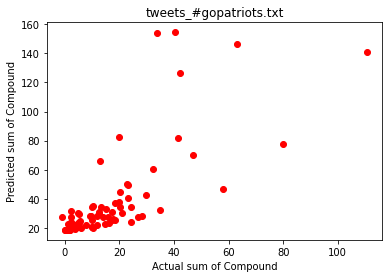

In [ ]:
sid = SentimentIntensityAnalyzer()

tweetfile = 'tweets_#gopatriots.txt'
file = []

with open(tweetfile,encoding="utf8") as f:
    for line in f:
        file.append(line)

pst_tz = pytz.timezone('America/Los_Angeles')

date, time, num_tweets, num_follow, num_retweets, num_mentions, rank_score, num_hashtags = [], [], [], [], [], [], [], []
time_5 = []
pos, neu, neg, imp = [], [], [], []

for n,line in enumerate(file):
    tw = json.loads(line)
    timestamp = tw['citation_date']
    timestamp = str(datetime.datetime.fromtimestamp(int(timestamp), pst_tz))
    time_split = ''.join(timestamp[0:10].split('-'))
    date.append(int(time_split))
    time.append(int(timestamp[11:13]))
    title = tw['title']
    pos.append(sid.polarity_scores(title)['compound'])
    #neu.append(sid.polarity_scores(title)['neu'])
    #neg.append(sid.polarity_scores(title)['neg'])
    imp.append(tw['metrics']['impressions'])
    a,b,c,_ = timestamp.split(':')
    rounded = str(int((int(b)/5))*5).zfill(2)
    time_mins = timestamp[11:13] + rounded
    time_5.append(int(time_mins))
    num_tweets.append(1)
    num_follow.append(tw['author']['followers'])
    num_retweets.append(tw['metrics']['citations']['total'])
    num_mentions.append(len(tw['tweet']['entities']['user_mentions']))
    rank_score.append(tw['metrics']['ranking_score'])
    num_hashtags.append(tw['title'].count('#'))

sp = pd.DataFrame({'date':date,'time':time_5,'tweets':num_tweets,'followers':num_follow,'retweets':num_retweets,'imp':imp,'pos':pos},
                  columns=['date','time','tweets', 'followers', 'retweets','imp','pos'])

sp = sp.groupby(['date', 'time']).agg({'time' : np.max, 'tweets' : np.sum,  'followers' : np.sum, 'retweets' : np.sum,'imp':np.sum,'pos':np.sum})
sp = sp.query('date == 20150201 and (time >= 1500 and time <= 2100)')

X_test = sp.loc[:,'tweets':'imp'].values
X_test = ss.transform(X_test)
y_test = sp['pos'].values
y_pred = clf2.best_estimator_.predict(X_test)
print("Test MSE for %s using Neural Network: %.6f" % (tweetfile, mean_squared_error(y_test,y_pred)))

plt.figure()
plt.tight_layout()
plt.plot(y_test,y_pred,'ro')
plt.xlabel('Actual sum of Compound');plt.ylabel('Predicted sum of Compound'); plt.title(tweetfile)
plt.show()

Test MSE for tweets_#gohawks.txt using Neural Network: 2165.264380


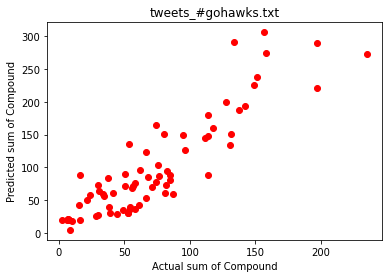

In [ ]:
sid = SentimentIntensityAnalyzer()

tweetfile = 'tweets_#gohawks.txt'

file = []

with open(tweetfile,encoding="utf8") as f:
    for line in f:
        file.append(line)

pst_tz = pytz.timezone('America/Los_Angeles')

date, time, num_tweets, num_follow, num_retweets, num_mentions, rank_score, num_hashtags = [], [], [], [], [], [], [], []
time_5 = []
pos, neu, neg, imp = [], [], [], []

for n,line in enumerate(file):
    tw = json.loads(line)
    timestamp = tw['citation_date']
    timestamp = str(datetime.datetime.fromtimestamp(int(timestamp), pst_tz))
    time_split = ''.join(timestamp[0:10].split('-'))
    date.append(int(time_split))
    time.append(int(timestamp[11:13]))
    title = tw['title']
    pos.append(sid.polarity_scores(title)['compound'])
    #neu.append(sid.polarity_scores(title)['neu'])
    #neg.append(sid.polarity_scores(title)['neg'])
    imp.append(tw['metrics']['impressions'])
    a,b,c,_ = timestamp.split(':')
    rounded = str(int((int(b)/5))*5).zfill(2)
    time_mins = timestamp[11:13] + rounded
    time_5.append(int(time_mins))
    num_tweets.append(1)
    num_follow.append(tw['author']['followers'])
    num_retweets.append(tw['metrics']['citations']['total'])
    num_mentions.append(len(tw['tweet']['entities']['user_mentions']))
    rank_score.append(tw['metrics']['ranking_score'])
    num_hashtags.append(tw['title'].count('#'))

sp = pd.DataFrame({'date':date,'time':time_5,'tweets':num_tweets,'followers':num_follow,'retweets':num_retweets,'imp':imp,'pos':pos},
                  columns=['date','time','tweets', 'followers', 'retweets','imp','pos'])

sp = sp.groupby(['date', 'time']).agg({'time' : np.max, 'tweets' : np.sum,  'followers' : np.sum, 'retweets' : np.sum,'imp':np.sum,'pos':np.sum})
sp = sp.query('date == 20150201 and (time >= 1500 and time <= 2100)')

X_test = sp.loc[:,'tweets':'imp'].values
X_test = ss.transform(X_test)
y_test = sp['pos'].values
y_pred = clf.best_estimator_.predict(X_test)
print("Test MSE for %s using Neural Network: %.6f" % (tweetfile, mean_squared_error(y_test,y_pred)))

plt.figure()
plt.tight_layout()
plt.plot(y_test,y_pred,'ro')
plt.xlabel('Actual sum of Compound');plt.ylabel('Predicted sum of Compound'); plt.title(tweetfile)
plt.show()

## Prediction of retweet number

In [ ]:
import json
import datetime,time
import pytz
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score
from statistics import mean
import statsmodels.api as sm
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from statistics import mean
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.datasets import make_regression
from sklearn.preprocessing import OneHotEncoder
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler  
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsRegressor

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
files = ["tweets_#gohawks.txt", "tweets_#gopatriots.txt", "tweets_#patriots.txt", "tweets_#sb49.txt", "tweets_#superbowl.txt"]

topics = ["gohawks", "gopatriots", "nfl", "patriots", "sb49", "superbowl"]

test_files_1 =["tweets_#nfl.txt"]

for i, fl in enumerate(files):
    print("files[" + str(i) + "] => " + fl)

files[0] => tweets_#gohawks.txt
files[1] => tweets_#gopatriots.txt
files[2] => tweets_#patriots.txt
files[3] => tweets_#sb49.txt
files[4] => tweets_#superbowl.txt


In [ ]:
def generate_df(pddata_raw):
    """
    Create a new dataframe with desired form
    """
    df = pd.DataFrame([],columns=['time unit','tweets','retweets','followers sum','followers max','hr_min'])
    
    col = pddata_raw.columns.get_loc('time')
    df['time unit'] = range(int(pddata_raw.iloc[len(pddata_raw.index)-1,col] - pddata_raw.iloc[0,col]+1))
    df['tweets'] = pddata_raw.groupby("time")['tweets'].sum()
    df['retweets'] = pddata_raw.groupby("time")['retweets'].sum()
    df['followers sum'] = pddata_raw.groupby("time")['followers'].sum()
    df['followers max'] = pddata_raw.groupby("time")["followers"].max()
    df['hr_min'] = pddata_raw.groupby("time")['hr_min'].mean()        
    # reset index of df
    df = df.fillna(0).reset_index(drop=True)
    
    return df

In [ ]:
def parse(files):
    """
    Parse x conponent of the dataset into pandas DataFrame including columns of:
    tweets, retweets, total_followers, max_followers, mentioned, media, active, author, favourites_count, title
    with lines of hours,
    where mentioned: number of @ in tweets per hour
          media: number of url in tweets per hour
          active: a measure of active state of author
          author: number of unique authors post tweet per hour
          favourites_count: the total number of likes by this user
          title: length of this tweet's title
    Parse y of dataset as number of tweets in the next hour.
    """
    start_time = time.mktime(time.strptime("2015-02-01 08:00:00",'%Y-%m-%d %H:%M:%S'))
    end_time = time.mktime(time.strptime("2015-02-01 20:00:00",'%Y-%m-%d %H:%M:%S'))   

    start_hour_idx = ((2-1)*31+1-14)*24+8
    end_hour_idx = ((2-1)*31+1-14)*24+20
    start_minute_idx = (((2-1)*31+1-14)*24 + (8-0))*12 + 0//5    
        
    # extract raw features
    data_raw = [[],[],[]]
    for file in files:
        for line in open(file, 'r', encoding="utf-8") :
            row_tmp = []
            a = json.loads(line)
            citation_date = a['citation_date']
            tweet = 1
            retweet = a['metrics']['citations']['total']
            foll = a['author']['followers']
            hr_min=1

            # append to row_tmp
            row_tmp.append(citation_date)        
            row_tmp.append(tweet)        
            row_tmp.append(retweet)
            row_tmp.append(foll)  
            row_tmp.append(hr_min) 
            
            data_raw[0].append(row_tmp)            

    # generate raw pandas dataframe
    pddata_raw_1 = transfer_time(data_raw[0],'hour')
    pddata_raw_1['time'] = pddata_raw_1['time'] - pddata_raw_1.loc[0,'time']
    
    
    # generate df and df_y for each time slot
    df_1 = generate_df(pddata_raw_1)  
    df_y_1 = df_1.iloc[1:,2].reset_index(drop=True)
    df_1 = df_1[:len(df_y_1)]
    #print('2',df_1)
    
    
    return (df_1.iloc[:,1:],df_y_1)

In [ ]:
def transfer_time(data_raw,time_type):
    
    pst_tz = pytz.timezone('America/Los_Angeles')
    
    # sort according to time
    pddata_raw = pd.DataFrame(data_raw,columns=['time','tweets','retweets','followers','hr_min'])
    pddata_raw = pddata_raw.sort_values(by = 'time')
    pddata_raw = pddata_raw.reset_index(drop=True)               

    # calculate hour index and minute index from time
    if time_type == 'hour':
        hour_accu = []
        hour_min = []
        for index, row in pddata_raw.iterrows():  
            p = datetime.datetime.fromtimestamp(row['time'], pst_tz)  
            hour_accu.append(((p.month-1)*31+p.day)*24+p.hour)  
            hour_min.append(p.hour)
        pddata_raw['time'] = hour_accu
        pddata_raw['hr_min'] = hour_min
    elif time_type == 'minute':
        minu_accu = []
        hour_min = []
        for index, row in pddata_raw.iterrows():  
            p = datetime.datetime.fromtimestamp(row['time'], pst_tz)                    
            minu_accu.append((((p.month-1)*31+p.day)*24 + (p.hour-0))*12 + p.minute//5)   
            hour_min.append(p.minute//5)
        pddata_raw['time'] = minu_accu    
        pddata_raw['hr_min'] = hour_min
    else:
        print("Invalid time type")
        
    return pddata_raw

In [ ]:
def plot_recipe(df_y, pred_y):
    """
    This function plots fitted values vs true values
    """
    plt.figure()
    area = np.pi * (4)**2/4
    plt.scatter(df_y, pred_y, s = area)
    plt.plot([df_y.min(), df_y.max()], [df_y.min(), df_y.max()], 'k--', lw = 1)
    plt.xlabel('true values')
    plt.ylabel('fitted values')
    plt.show()

In [ ]:
df,df_y = parse(files)

In [ ]:
df_test1,df_y_test1 = parse(test_files_1)

In [ ]:
param_grid={
'max_depth': [10, 20, 50, 100],
'max_features': ['auto', 'sqrt'],
'min_samples_leaf': [1, 2, 4],
'min_samples_split': [2, 5, 10],
'n_estimators': [5,10,50,100,200, 400, 600, 800]
}
kf = KFold(n_splits=5,random_state=42,shuffle=True)

In [ ]:
avg_RMSE1_train=np.zeros((4,2,3,3,8))
avg_RMSE1_test=np.zeros((4,2,3,3,8))
for n1,max_depth in enumerate(param_grid['max_depth']):
    for n2,max_features in enumerate(param_grid['max_features']):
        for n3,min_samples_leaf in enumerate(param_grid['min_samples_leaf']):
            for n4,min_samples_split in enumerate(param_grid['min_samples_split']):
                for n5,n_estimators in enumerate(param_grid['n_estimators']):
                    MSE_train=[]
                    MSE_test=[]
                    oob_error=[]
                    total_train=0
                    total_test=0
                    for train_index, test_index in kf.split(df):
                        X_train= df.iloc[train_index]
                        y_train= df_y.iloc[train_index]
                        X_test= df.iloc[test_index]
                        y_test= df_y.iloc[test_index]
                        reg = GradientBoostingRegressor(n_estimators=n_estimators,max_depth=max_depth,min_samples_leaf=min_samples_leaf,min_samples_split=min_samples_split, max_features=max_features,random_state=42)
                        reg.fit(X_train,y_train)
                        pred_train = reg.predict(X_train)
                        pred_test = reg.predict(X_test)
                        MSE_train.append(mean_squared_error(y_train, pred_train)*len(train_index))
                        MSE_test.append(mean_squared_error(y_test, pred_test)*len(test_index))
                        total_train=total_train+len(train_index)
                        total_test=total_test+len(test_index)

                    avg_RMSE1_test[n1,n2,n3,n4,n5]=np.sqrt(sum(MSE_test)/total_test)
                    avg_RMSE1_train[n1,n2,n3,n4,n5]=np.sqrt(sum(MSE_train)/total_train)
                    print("max_depth=",max_depth,"max_features=",max_features,"min_samples_leaf=",min_samples_leaf,"min_samples_split=",min_samples_split,"n_estimators=",n_estimators)
                    print("RMSE_train=",avg_RMSE1_train[n1,n2,n3,n4,n5],"RMSE_test=",avg_RMSE1_test[n1,n2,n3,n4,n5])
                    print("")

max_depth= 10 max_features= auto min_samples_leaf= 1 min_samples_split= 2 n_estimators= 5
RMSE_train= 39033.58335895909 RMSE_test= 52374.73118598099

max_depth= 10 max_features= auto min_samples_leaf= 1 min_samples_split= 2 n_estimators= 10
RMSE_train= 23053.993200111552 RMSE_test= 52612.8596120345

max_depth= 10 max_features= auto min_samples_leaf= 1 min_samples_split= 2 n_estimators= 50
RMSE_train= 380.80648970281646 RMSE_test= 66162.92632094541

max_depth= 10 max_features= auto min_samples_leaf= 1 min_samples_split= 2 n_estimators= 100
RMSE_train= 43.64660242446218 RMSE_test= 66444.24290703471

max_depth= 10 max_features= auto min_samples_leaf= 1 min_samples_split= 2 n_estimators= 200
RMSE_train= 2.061485142632795 RMSE_test= 66445.2558324734

max_depth= 10 max_features= auto min_samples_leaf= 1 min_samples_split= 2 n_estimators= 400
RMSE_train= 0.008243182482499858 RMSE_test= 66445.25663370553

max_depth= 10 max_features= auto min_samples_leaf= 1 min_samples_split= 2 n_estimators= 6

In [ ]:
print("min RMSE in testset=",np.min(avg_RMSE1_test))
print("parameters:")
n1,n2,n3,n4,n5= np.unravel_index(np.argmin(avg_RMSE1_test), avg_RMSE1_test.shape)
print("max_depth=",param_grid["max_depth"][n1],"max_features=",param_grid["max_features"][n2],"min_samples_leaf=",param_grid["min_samples_leaf"][n3],"min_samples_split=",param_grid["min_samples_split"][n4],"n_estimators=",param_grid["n_estimators"][n5])
print("")

min RMSE in testset= 39944.5684231106
parameters:
max_depth= 50 max_features= auto min_samples_leaf= 2 min_samples_split= 2 n_estimators= 10



In [ ]:
#reg = GradientBoostingRegressor(n_estimators=param_grid["n_estimators"][n5],max_depth=param_grid["max_depth"][n1],min_samples_leaf=param_grid["min_samples_leaf"][n3],min_samples_split=param_grid["min_samples_split"][n4], max_features=param_grid["max_features"][n2],random_state=42)
reg = GradientBoostingRegressor(n_estimators=10,max_depth=50,min_samples_leaf=2,min_samples_split=2, max_features='auto',random_state=42)

reg.fit(df,df_y)
pred = reg.predict(df)
pred1=reg.predict(df_test1)

print("train_MSE=",mean_squared_error(df_y, pred))
print("test_MSE=",mean_squared_error(df_y_test1, pred1)*len(pred1)/15)

train_MSE= 758978450.1592393
test_MSE= 565809203.3566786


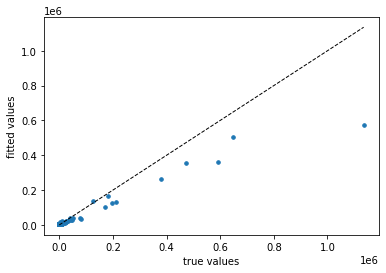

In [ ]:
plot_recipe(df_y, pred)

In [ ]:
hidden_units=[50,100,200,300,500,600]

In [ ]:
avg_RMSE2_train=np.zeros((len(hidden_units),len(hidden_units),len(hidden_units)))
avg_RMSE2_test=np.zeros((len(hidden_units),len(hidden_units),len(hidden_units)))
for n1,units1 in enumerate(hidden_units):
    for n2,units2 in enumerate(hidden_units):
        for n3,units3 in enumerate(hidden_units):
            MSE_train=[]
            MSE_test=[]
            total_train=0
            total_test=0
            for train_index, test_index in kf.split(df):
                X_train= df.iloc[train_index]
                y_train= df_y.iloc[train_index]
                X_test= df.iloc[test_index]
                y_test= df_y.iloc[test_index]
                reg = MLPRegressor(hidden_layer_sizes=(units1,units2,units3,),activation='relu', solver='adam', alpha=1e-5, random_state=42) 
                reg.fit(X_train,y_train)
                pred_train = reg.predict(X_train)
                pred_test = reg.predict(X_test)
                MSE_train.append(mean_squared_error(y_train, pred_train)*len(train_index))
                MSE_test.append(mean_squared_error(y_test, pred_test)*len(test_index))
                total_train=total_train+len(train_index)
                total_test=total_test+len(test_index)

            avg_RMSE2_test[n1,n2,n3]=np.sqrt(sum(MSE_test)/total_test)
            avg_RMSE2_train[n1,n2,n3]=np.sqrt(sum(MSE_train)/total_train)
            print("units1=",units1,"units2=",units2,"units3=",units3)
            print("RMSE_train=",avg_RMSE2_train[n1,n2,n3],"RMSE_test=",avg_RMSE2_test[n1,n2,n3])
            print("")

units1= 50 units2= 50 units3= 50
RMSE_train= 151379.83635768146 RMSE_test= 134652.8946208661

units1= 50 units2= 50 units3= 100
RMSE_train= 980296.8740774314 RMSE_test= 1125794.2096049942

units1= 50 units2= 50 units3= 200
RMSE_train= 626981.8824369379 RMSE_test= 610348.2247523033

units1= 50 units2= 50 units3= 300
RMSE_train= 1178941.9263749789 RMSE_test= 1216438.5701892679

units1= 50 units2= 50 units3= 500
RMSE_train= 46499.43693104494 RMSE_test= 71119.00394751428

units1= 50 units2= 50 units3= 600
RMSE_train= 109784.37756397892 RMSE_test= 115621.06126024987

units1= 50 units2= 100 units3= 50
RMSE_train= 167137.41882871283 RMSE_test= 179865.48607928574

units1= 50 units2= 100 units3= 100
RMSE_train= 531445.064453663 RMSE_test= 517088.2985820071

units1= 50 units2= 100 units3= 200
RMSE_train= 1951114.445265897 RMSE_test= 1707305.8482276504

units1= 50 units2= 100 units3= 300
RMSE_train= 98334.31213634915 RMSE_test= 137042.65783910954

units1= 50 units2= 100 units3= 500
RMSE_train= 28

In [ ]:
print("min RMSE in testset=",np.min(avg_RMSE2_test))
n1,n2,n3= np.unravel_index(np.argmin(avg_RMSE2_test), avg_RMSE2_test.shape)
print("hidden layer sizes=",hidden_units[n1],hidden_units[n2],hidden_units[n3])

min RMSE in testset= 34658.62675087835
hidden layer sizes= 500 500 500


In [ ]:
reg = MLPRegressor(hidden_layer_sizes=(500,500,500,),activation='relu', solver='adam', alpha=1e-5, random_state=42) 
reg.fit(df,df_y)
pred = reg.predict(df)
pred1=reg.predict(df_test1)

print("train_MSE=",mean_squared_error(df_y, pred))
print("test_MSE=",mean_squared_error(df_y_test1, pred1)*len(pred1)/15)

train_MSE= 1938963562.534945
test_MSE= 153632405.9747246


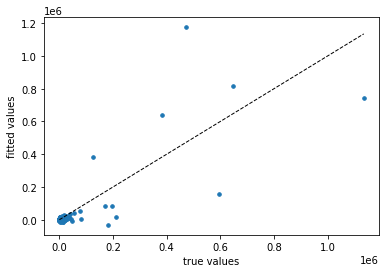

In [ ]:
plot_recipe(df_y, pred)

## Predict which team does the tweet belong to

In [ ]:
#!pip install pandas
#!pip install numpy
!pip install regex
!pip install nltk
!pip install sklearn
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
import sys
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import regex as re
import nltk
from sklearn.decomposition import TruncatedSVD, NMF
from sklearn.metrics import mean_squared_error
import multiprocessing
from joblib import Memory
from tempfile import mkdtemp
import warnings
warnings.filterwarnings("ignore") 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
import re
import string
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk import pos_tag, word_tokenize, sent_tokenize
from nltk.corpus import wordnet
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('punkt')
import datetime
import pytz
import json

def clean(text):
  text = re.sub(r'^https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)
  texter = re.sub(r"<br />", " ", text)
  texter = re.sub(r"&quot;", "\"",texter)
  texter = re.sub('&#39;', "\"", texter)
  texter = re.sub('\n', " ", texter)
  texter = re.sub(' u '," you ", texter)
  texter = re.sub('`',"", texter)
  texter = re.sub(' +', ' ', texter)
  texter = re.sub(r"(!)\1+", r"!", texter)
  texter = re.sub(r"(\?)\1+", r"?", texter)
  texter = re.sub('&amp;', 'and', texter)
  texter = re.sub('\r', ' ',texter)
  clean = re.compile('<.*?>')
  texter = texter.encode('ascii', 'ignore').decode('ascii')
  texter = re.sub(clean, '', texter)
  if texter == "":
    texter = ""
  return texter

def clean(title):
    title = nltk.word_tokenize(title)
    title = [i.lower() for i in title if i not in stopwords.words('english')]
    for n,i in enumerate(title):
        try:            
            if i == '#':
                title[n] = ""
                title[n+1] = ""
            elif i == 'https':
                title[n] = ""
                title[n+1] = ""
                title[n+2] = ""
        except IndexError:
            title[n] = ""
    title = " ".join(title)
    return title

def remove_numbers(text):
    text_nonum = re.sub(r'\b[0-9]+\b\s*', '', text)
    clean_text = []
    for word in word_tokenize(text):
        if (not any(char.isdigit() for char in word)):
            clean_text.append(word)
    return (" ").join(clean_text)

def penn2morphy(penntag): 
    morphy_tag = {'NN':'n', 'JJ':'a',
                  'VB':'v', 'RB':'r'}
    try:
        return morphy_tag[penntag[:2]]
    except:
        return 'n' 

def lemmatized(text):
    lemmatizer = WordNetLemmatizer()

    sent_pos_tags = [pos_tag(word_tokenize(sent)) for sent in sent_tokenize(text)]
    pos_tags = []
    for sentence_tags in sent_pos_tags:
        for tags in sentence_tags:
            pos_tags.append(tags)
    
    lemmatized_words = []
    lemm_text = [lemmatizer.lemmatize(word, pos = penn2morphy(tag)) for word, tag in pos_tags]
    for lemma in lemm_text:
        if (not any(char in lemma for char in string.punctuation)):
            lemmatized_words.append(lemma.lower())
    return lemmatized_words

def stem(text):
  stemmer = PorterStemmer()
  stem_text = [stemmer.stem(word) for word in word_tokenize(text)]
  return " ".join(stem_text)

def preprocess(text):
  text = clean(title)
  text = clean(text)
  text = remove_numbers(text)
  text = lemmatized(text)
  return ' '.join(text)

tweetfile = 'tweets_#superbowl.txt'

file = []

with open(tweetfile,encoding="utf8") as f:
    for line in f:
        file.append(line)

pst_tz = pytz.timezone('America/Los_Angeles')

title , hashtags, num_hashtags, label = [], [], [], []

for n,line in enumerate(file):
    tw = json.loads(line)
    title = tw['title']
    num_hashtags.append(tw['title'].count('#'))
    hashtags.append(tw['title'].partition('#')[1])
    if 'patriots' in title:
        label.append('patriots')
    elif 'hawks' in title:
        label.append('hawks')

sp_train = pd.DataFrame({'title':title[0:5000],'hashtags':hashtags[0:5000],'num_hashtags':num_hashtags[0:5000],'label':label[0:5000]},
                  columns=['title','hashtags','tweets', 'num_hashtags', 'label'])


sp_test = pd.DataFrame({'title':title[8000:9000],'hashtags':hashtags[8000:9000],'num_hashtags':num_hashtags[8000:9000],'label':label[8000:9000]},
                  columns=['title','hashtags','tweets', 'num_hashtags', 'label'])


train = sp_train['title'].apply(lambda x:preprocess(x))
test = sp_test['title'].apply(lambda x:preprocess(x))
#print('train',train)
#print(label)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
train 0       still celebrate win
1       still celebrate win
2       still celebrate win
3       still celebrate win
4       still celebrate win
               ...         
4995    still celebrate win
4996    still celebrate win
4997    still celebrate win
4998    still celebrate win
4999    still celebrate win
Name: title, Length: 5000, dtype: object
['hawks', 'hawks', 'hawks', 'hawks', 'hawks', 'hawks', 'hawks', 'hawks', 'hawks', 'hawks', 'hawks', 'hawks', 'hawks', 'hawks', 'hawks', 'hawks', 'hawks', 'hawks', 'hawks', 'hawks', 'hawks', 'hawks', 'hawks', 'hawks', 'hawks', 'hawks', 'hawks', 'hawks', 'patriots', 'hawks

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
count_vec = CountVectorizer(stop_words="english", min_df=3)
tfidf_tranformer = TfidfTransformer(use_idf=True)

word_count_vec_train = count_vec.fit_transform(train)
word_count_vec_train_tf = tfidf_tranformer.fit_transform(word_count_vec_train)
word_count_array_train = word_count_vec_train_tf.toarray()
word_counts_train = pd.DataFrame(data=word_count_array_train, columns = count_vec.get_feature_names())

print('TF-IDF Processed train matrix shape:', word_counts_train.shape)

word_count_vec_test = count_vec.transform(test)
word_count_vec_test_tf = tfidf_tranformer.transform(word_count_vec_test)
word_count_array_test = word_count_vec_test_tf.toarray()
word_counts_test = pd.DataFrame(data=word_count_array_test, columns = count_vec.get_feature_names())
print('TF-IDF Processed test matrix shape:', word_counts_test.shape)

TF-IDF Processed train matrix shape: (5000, 2)
TF-IDF Processed test matrix shape: (1000, 2)


In [ ]:
#Import for Classifier metrics Calculation- from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, roc_curve, auc
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, roc_curve, auc
def Classifier_Metrics(y_test,y_pred,name="",average='macro'):
    print("Accuracy score for %s: %f" %(name,accuracy_score(y_test,y_pred)))
    print("Recall score for %s: %f" % (name,recall_score(y_test,y_pred,average=average)))
    print("Precision score for %s: %f" % (name,precision_score(y_test,y_pred,average=average)))
    print("F-1 score for %s: %f" % (name,f1_score(y_test,y_pred,average=average)))

In [ ]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
      for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], fmt),horizontalalignment="center",color="white" if cm[i, j] > thresh else "black")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

def ROC_curve(y_test,decision_function,name=""):
    fpr = dict();tpr = dict();roc_auc = dict()
    fpr, tpr, thresholds = roc_curve(y_test, decision_function)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (area = %0.4f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0]); plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate'); plt.ylabel('True Positive Rate');
    plt.title('%s ROC curve' % name);plt.legend(loc="lower right")

In [ ]:
from sklearn.svm import LinearSVC
from sklearn import svm
from sklearn.linear_model import LogisticRegression

# Normalise Train dataset and Test dataset to make them compatible for Binary classification
True_labels_Train = label[0:5000]
True_labels_Test = label[8000:9000]
X_True_Train=[]

# Making True Train and Test labels compatible for Binary Classification
for label_tr in True_labels_Train:
  if label_tr =='hawks':
    X_True_Train.append(0)
  else:
    X_True_Train.append(1)
X_True_Test=[]

for label_te in True_labels_Test:
  if label_te =='hawks':
    X_True_Test.append(0)
  else:
    X_True_Test.append(1)

'''
hardMargin_SVM=svm.SVC(kernel='linear',C=1000)
X_hardSVM_pred = hardMargin_SVM.fit(word_counts_train,X_True_Train).predict(word_counts_test) # predicting labels for hard margin SVM
print("Test MSE for %s using Hard SVM: %.6f" % (tweetfile, mean_squared_error(X_True_Test,X_hardSVM_pred)))

LR = LogisticRegression(penalty = 'none')
pred_lr = LR.fit(word_counts_train,X_True_Train).predict(word_counts_test)
print("Test MSE for %s using Logistic Regression with penalty 'None': %.6f" % (tweetfile, mean_squared_error(X_True_Test,pred_lr)))
'''

LR2 = LogisticRegression(penalty = 'l2')
pred_lr2 = LR2.fit(word_counts_train,X_True_Train).predict(word_counts_test)
print("Test MSE for %s using Logistic Regression with penalty 'L2': %.6f" % (tweetfile, mean_squared_error(X_True_Test,pred_lr2)))

Test MSE for tweets_#superbowl.txt using Logistic Regression with penalty 'L2': 0.022000
